In [ ]:
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
from numpy import linalg as LA
from scipy.spatial import distance
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from copy import deepcopy
from matplotlib.pyplot import figure

In [ ]:
AD=pd.read_excel('/content/drive/MyDrive/Doctorado/2023/Junio/ReyZamuro_ch.xlsx')

In [ ]:
AD

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  31372.933333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  40403.816667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  36570.916667   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
...                                                  ...           ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  31054.866667   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

              MEANt      VARt     SKEWt        KURTt       LEQt       BGNt  \
0     -6.887912e-19  0.000193  0.177502     5.834632  55.877214 -28.298142   
1     -5.919069e-19  0.000172  0.221258    14.253758  55.379005 -28.342884   
2      1.142055e-18  0.000277  0.182959     6.675471  57.451929 -26.156468   
3      5.251972e-19  0.000259  0.217033    11.059525  57.146265 -26.752327   
4      1.970453e-18  0.004055  0.113164     7.852549  69.100988 -15.658711   
...             ...       ...       ...          ...        ...        ...   
52086 -3.340258e-19  0.000024  0.293895    63.263822  46.752417 -37.743231   
52087 -1.824929e-19  0.000327  0.249309     8.718704  58.170666 -29.269617   
52088  1.538507e-19  0.000184 -0.881932  1360.450964  55.657117 -34.952636   
52089  7.735421e-20  0.003032 -0.172413    25.499336  67.837515 -26.358539   
52090  2.541731e-19  0.000014  0.248200   472.819549  44.604796 -39.605826   

            SNRt       MED  ...      TFSD  H_Havrda   H_Renyi  \
0       1.478258  0.038467  ...  0.514598  0.332701  3.133724   
1       2.038076  0.038270  ...  0.372154  0.333292  4.492470   
2       1.277365  0.049224  ...  0.450293  0.333273  4.306934   
3       2.233526  0.045960  ...  0.445050  0.333270  4.281840   
4       1.498894  0.164841  ...  0.473060  0.333142  3.732607   
...          ...       ...  ...       ...       ...       ...   
52086   0.871930  0.012967  ...  0.536660  0.332189  2.837357   
52087   4.180969  0.034397  ...  0.315189  0.332793  3.212102   
52088   6.535912  0.017880  ...  0.270505  0.333140  3.725704   
52089  11.335550  0.048092  ...  0.237120  0.332979  3.423975   
52090   3.405888  0.010464  ...  0.389669  0.333302  4.639932   

       H_pairedShannon       H_gamma  H_GiniSimpson      RAOQ       AGI  \
0             5.518148  21751.811409       0.972104  0.309954  1.254270   
1             6.050323  27827.025409       0.990705  0.346173  1.249948   
2             5.873870  22433.577147       0.988887  0.324124  1.242176   
3             6.068535  26735.547136       0.990190  0.407788  1.291630   
4             5.424755  13444.077145       0.980831  0.221803  1.292969   
...                ...           ...            ...       ...       ...   
52086         5.581744  32595.486456       0.964435  0.513556  1.226161   
52087         4.861547   8821.773712       0.966599  0.106330  1.303232   
52088         5.368712  16719.467573       0.979979  0.255939  1.346266   
52089         4.997917   6687.242207       0.972817  0.116949  1.877558   
52090         6.390634  47047.529927       0.992592  0.501516  1.243373   

       ROItotal   ROIcover  
0          2203   2.307533  
1          2024   1.740025  
2          1783   1.611886  
3          2505   3.563665  
4          1002   2.655821  
...         ...        ...  
52086       662   0.290968  
52087       460   7.063804  
52088       962   5.464904  
52089       217  16.169182  
52090      1010   0.654612  

[52091 rows x 58 columns]

In [ ]:
AD.iloc[1,0]

'//home/vmartinezarias/Documents/Zamuro/Ultrasonido/paquete3//RZUH04/20220912_130000.WAV'

In [ ]:
AD.columns

Index(['file', 'ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt',
       'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'MEANf',
       'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf',
       'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI',
       'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC',
       'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract',
       'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi',
       'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI',
       'ROItotal', 'ROIcover'],
      dtype='object')

### Etapas file

In [ ]:
AD.file[1]

'//home/vmartinezarias/Documents/Zamuro/Ultrasonido/paquete3//RZUH04/20220912_130000.WAV'

In [ ]:
df=AD.copy()
df['fecha'] = df['file'].str.extract('(\d{8})').astype(int)

df['hora'] = df['file'].str.extract('_(\d{2})').astype(int)



In [ ]:
df['site'] = df['file'].str.split('/').str[-2]

In [ ]:
df=df[['file','ZCR', 'SNRt','Ht', 'EAS', 'ECU', 'ECV', 'EPS','BGNf','Hf','ACI', 'NDSI',
       'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ADI', 'AEI', 'LFC',
       'MFC', 'HFC','site','fecha','hora']]

In [ ]:
df

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  31372.933333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  40403.816667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  36570.916667   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
...                                                  ...           ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  31054.866667   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

              MEANt      VARt     SKEWt        KURTt       LEQt       BGNt  \
0     -6.887912e-19  0.000193  0.177502     5.834632  55.877214 -28.298142   
1     -5.919069e-19  0.000172  0.221258    14.253758  55.379005 -28.342884   
2      1.142055e-18  0.000277  0.182959     6.675471  57.451929 -26.156468   
3      5.251972e-19  0.000259  0.217033    11.059525  57.146265 -26.752327   
4      1.970453e-18  0.004055  0.113164     7.852549  69.100988 -15.658711   
...             ...       ...       ...          ...        ...        ...   
52086 -3.340258e-19  0.000024  0.293895    63.263822  46.752417 -37.743231   
52087 -1.824929e-19  0.000327  0.249309     8.718704  58.170666 -29.269617   
52088  1.538507e-19  0.000184 -0.881932  1360.450964  55.657117 -34.952636   
52089  7.735421e-20  0.003032 -0.172413    25.499336  67.837515 -26.358539   
52090  2.541731e-19  0.000014  0.248200   472.819549  44.604796 -39.605826   

            SNRt       MED  ...  H_pairedShannon       H_gamma  H_GiniSimpson  \
0       1.478258  0.038467  ...         5.518148  21751.811409       0.972104   
1       2.038076  0.038270  ...         6.050323  27827.025409       0.990705   
2       1.277365  0.049224  ...         5.873870  22433.577147       0.988887   
3       2.233526  0.045960  ...         6.068535  26735.547136       0.990190   
4       1.498894  0.164841  ...         5.424755  13444.077145       0.980831   
...          ...       ...  ...              ...           ...            ...   
52086   0.871930  0.012967  ...         5.581744  32595.486456       0.964435   
52087   4.180969  0.034397  ...         4.861547   8821.773712       0.966599   
52088   6.535912  0.017880  ...         5.368712  16719.467573       0.979979   
52089  11.335550  0.048092  ...         4.997917   6687.242207       0.972817   
52090   3.405888  0.010464  ...         6.390634  47047.529927       0.992592   

           RAOQ       AGI  ROItotal   ROIcover     fecha  hora    site  
0      0.309954  1.254270      2203   2.307533  20220907    15  RZUH04  
1      0.346173  1.249948      2024   1.740025  20220912    13  RZUH04  
2      0.324124  1.242176      1783   1.611886  20220912     4  RZUH04  
3      0.407788  1.291630      2505   3.563665  20220904    12  RZUH04  
4      0.221803  1.292969      1002   2.655821  20220904     0  RZUH04  
...         ...       ...       ...        ...       ...   ...     ...  
52086  0.513556  1.226161       662   0.290968  20220909    20  RZUG09  
52087  0.106330  1.303232       460   7.063804  20220907     2  RZUG09  
52088  0.255939  1.346266       962   5.464904  20220909     1  RZUG09  
52089  0.116949  1.877558       217  16.169182  20220909    19  RZUG09  
52090  0.501516  1.243373      1010   0.654612  20220911     6  RZUG09  

[52091 rows x 61 columns]

VAriables usadas en estudio anterior: ’ACIft’, ’ACItf’, ’BETA’, ’NDSI’, ’P’, ’M’, ’NP’, ’MID’, ’BNF’, ’MD’, ’FM’, ’SF’, ’RMS’, ’ SC’,

In [ ]:
AD.columns

Index(['file', 'ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt',
       'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'MEANf',
       'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf',
       'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI',
       'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC',
       'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract',
       'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi',
       'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI',
       'ROItotal', 'ROIcover'],
      dtype='object')

In [ ]:
AD=AD[['file','ZCR', 'SNRt','Ht', 'EAS', 'ECU', 'ECV', 'EPS','BGNf','Hf','ACI', 'NDSI',
       'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ADI', 'AEI', 'LFC',
       'MFC', 'HFC','site','fecha','hora']]

KeyError: ignored

# DGUFS

In [ ]:
!git clone https://github.com/gsel9/dgufs.git

Cloning into 'dgufs'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 28.08 KiB | 4.01 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
ls

dgufs/  drive/  sample_data/


In [ ]:
cd dgufs

/content/dgufs


In [ ]:
cd dgufs

/content/dgufs/dgufs


In [ ]:
pwd

'/content/dgufs/dgufs'

In [ ]:
import utils

In [ ]:
import numpy as np
import pandas as pd

import utils
#from dgufs import utils

from scipy import linalg
from sklearn.base import BaseEstimator, TransformerMixin


class DGUFS(BaseEstimator, TransformerMixin):
    """The Dependence Guided Unsupervised Feature Selection (DGUFS) algorithm
    developed by Jun Guo and Wenwu Zhu.

    num_features (int): The number of features to select.
    num_clusters (int):
    alpha (): Regularization parameter from the range ().
    beta (): Regularization parameter > 0.
    tol (float): Tolerance used to determine optimization convergance. Defaults
        to 10e-6 as suggested in the paper.
    max_iter (): The maximum number of iterations of the
    mu ():
    max_mu ():
    rho ():

    """

    NAME = 'DGUFSSelection'

    def __init__(
        self,
        num_features=2,
        num_clusters=2,
        alpha=0.5,
        beta=0.9,
        tol=1e-6,
        max_iter=1e2,
        mu=1e-6,
        max_mu=1e10,
        rho=1.1
    ):

        self.num_features = num_features
        self.num_clusters = num_clusters
        self.alpha = alpha
        self.beta = beta
        self.tol = tol
        self.max_iter = max_iter
        self.mu = mu
        self.max_mu = max_mu
        self.rho = rho

        # NOTE: Attributes set with instance.
        self.S = None
        self.H = None
        self.Y = None
        self.Z = None
        self.M = None
        self.L = None
        self.V = None
        self.Lamda1 = None
        self.Lamda2 = None

    def _setup_matrices(self, nrows, ncols):
        # Setup.
        self.Y = np.zeros((ncols, nrows), dtype=float)
        self.Z = np.zeros((ncols, nrows), dtype=float)

        self.M = np.zeros((nrows, nrows), dtype=float)
        self.L = np.zeros((nrows, nrows), dtype=float)

        self.Lamda1 = np.zeros((ncols, nrows), dtype=float)
        self.Lamda2 = np.zeros((nrows, nrows), dtype=float)

        return self

    def __name__(self):

        return self.NAME

    def _check_X(self, X):
        # Type checking and formatting of feature matrix.
        nrows, ncols = np.shape(X)
        if self.num_features > ncols:
            raise ValueError('Number of features to select exceeds the number '
                             'of columns in X ({})'.format(ncols))
        if nrows < 2:
            raise RuntimeError('Feature selection requires more than two '
                               'samples')
        # NB: From nrows x ncols to ncols x nrows as algorithm given in the
        # paper.
        X_trans = np.transpose(X)

        return X_trans, nrows, ncols

    @property
    def support(self):
        """Returns the column indicators of selected features."""

        # Select features based on where the transformed feature matrix has
        # column sums != 0.
        selected_cols = np.squeeze(np.where(np.sum(self.Y.T, axis=0) != 0))
        # Sanity check.
        assert len(selected_cols) <= self.num_features

        return selected_cols

    @property
    def memberships(self):
        """Return the cluster indicator labels for each obeservation."""

        # NOTE: Alternatively use scipy.sparse.linalg.eigs with
        # k=self.num_clusters.
        eigD, eigV = linalg.eig(np.maximum(self.L, np.transpose(self.L)))
        # Discard imaginary parts and truncate assuming comps are sorted.
        eigD = np.real(np.diag(eigD)[:self.num_clusters, :self.num_clusters])
        eigV = np.real(eigV[:, :self.num_clusters])
        self.V = np.dot(eigV, np.sqrt(eigD))
        # The final cluster labels can be obtained by determining the position
        # of the largest element at each cluster indicator in V.
        return np.argmax(self.V, axis=1)

    def fit(self, X, **kwargs):
        """Select features from X.

        Args:
            X (array-like): The feature matrix with shape
                (n samples x n features).

        """
        X_trans, nrows, ncols = self._check_X(X)

        self.S = utils.similarity_matrix(X)
        # Experimental version where H := H / (n - 1).
        self.H = utils.centering_matrix(nrows)

        self._setup_matrices(nrows, ncols)

        i = 1
        while i <= self.max_iter:

            # Alternate optimization of matrices.
            self._update_Z(X_trans, ncols)
            self._update_Y()
            self._update_L()
            self._update_M(nrows)

            # Check if stop criterion is satisfied.
            leq1 = self.Z - self.Y
            leq2 = self.L - self.M
            stopC1 = np.max(np.abs(leq1))
            stopC2 = np.max(np.abs(leq2))
            if (stopC1 < self.tol) and (stopC2 < self.tol):
                i = self.max_iter
            else:
                # Update Lagrange multipliers.
                self.Lamda1 = self.Lamda1 + self.mu * leq1
                self.Lamda2 = self.Lamda2 + self.mu * leq2
                self.mu = min(self.max_mu, self.mu * self.rho);
                # Update counter.
                i = i + 1

        return self

    def _update_Z(self, X, ncols):
        # Updates the Z matrix.
        YHLH = self.Y.dot(self.H).dot(self.L).dot(self.H)
        U = X - self.Y - (((1 - self.beta) * YHLH - self.Lamda1) / self.mu)
        self.Z = X - utils.solve_l20(U, (ncols - self.num_features))

        return self

    def _update_Y(self):
        # Updates the Y matrix.
        ZHLH = self.Z.dot(self.H).dot(self.L).dot(self.H)
        U = self.Z + (((1 - self.beta) * ZHLH + self.Lamda1) / self.mu)
        self.Y = utils.solve_l20(U, self.num_features)

        return self

    def _update_L(self):
        # Updates the L matrix.
        speed_up = utils.speed_up(
            self.H.dot(np.transpose(self.Y)).dot(self.Z).dot(self.H)
        )
        U = ((1 - self.beta) * speed_up + self.beta * self.S - self.Lamda2)
        self.L = utils.solve_rank_lagrange(
            utils.speed_up(U / self.mu + self.M), 2 * self.alpha / self.mu
        )
        return self

    def _update_M(self, nrows, gamma=5e-3):
        # Updates the M matrix.
        _M = self.L + self.Lamda2 / self.mu
        _M = utils.solve_l0_binary(_M, 2 * gamma / self.mu)

        self.M = _M - np.diag(np.diag(_M)) + np.eye(nrows)

        return self

    def transform(self, X, **kwargs):
        """Retain selected features from X.

        Args:
            X (array-like): The feature matrix with shape
                (n samples x n features).

        Returns:
            (array-like): The feature matrix containing only the selected
                features.

        """

        if isinstance(X, pd.DataFrame):
            data = X.values
            output = pd.DataFrame(
                data[:, self.support],
                columns=X.columns[self.support],
                index=X.index
            )
        elif isinstance(X, np.ndarray):
            output = X[:, self.support]
        else:
            raise TypeError('Cannot transform data of type {}'.format(type(X)))

        return output



In [ ]:
df

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  31372.933333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  40403.816667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  36570.916667   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
...                                                  ...           ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  31054.866667   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

            SNRt        Ht       EAS       ECU       ECV       EPS       BGNf  \
0       1.478258  0.966446  0.027799  0.733934  0.482235  0.025347 -40.057560   
1       2.038076  0.941284  0.000387  0.099109  0.088895  0.020651 -40.754314   
2       1.277365  0.966482  0.000889  0.038550  0.033844  0.031900 -38.471417   
3       2.233526  0.944808  0.003402  0.231869  0.185379  0.036750 -39.504981   
4       1.498894  0.966647  0.061449  0.376995  0.206193  0.104367 -28.099873   
...          ...       ...       ...       ...       ...       ...        ...   
52086   0.871930  0.967775  0.001037  0.437499  0.393243  0.030626 -48.961563   
52087   4.180969  0.932413  0.030292  0.221346  0.140499  0.042632 -41.139586   
52088   6.535912  0.815638  0.135693  0.735801  0.439601  0.079335 -47.531303   
52089  11.335550  0.840306  0.097381  0.225851  0.161753  0.057021 -38.127653   
52090   3.405888  0.821587  0.005209  0.244187  0.232039  0.020140 -51.417252   

             Hf  ...  BioEnergy        BI       ADI       AEI       LFC  \
0      0.726545  ...   2.104335  1.052789  2.077815  0.032237  0.203703   
1      0.810312  ...   0.539157  0.569122  2.079384  0.005904  0.193663   
2      0.782174  ...   1.716608  1.255454  2.079333  0.007561  0.194073   
3      0.813275  ...   1.471705  1.006282  2.078823  0.019998  0.221901   
4      0.710838  ...  10.274050  2.025042  2.068692  0.074571  0.234662   
...         ...  ...        ...       ...       ...       ...       ...   
52086  0.737399  ...   0.216613  1.136749  1.843449  0.368089  0.139374   
52087  0.621726  ...   0.351927  1.165580  2.073459  0.060390  0.141937   
52088  0.701923  ...   0.490552  0.491730  1.014936  0.690311  0.155997   
52089  0.643072  ...   0.286414  1.003013  1.850777  0.370420  0.142974   
52090  0.864712  ...   0.056161  0.617991  2.078010  0.030318  0.140530   

            MFC       HFC    site     fecha  hora  
0      0.171340  0.179906  RZUH04  20220907    15  
1      0.180196  0.175477  RZUH04  20220912    13  
2      0.174788  0.172665  RZUH04  20220912     4  
3      0.177935  0.184025  RZUH04  20220904    12  
4      0.167151  0.185659  RZUH04  20220904     0  
...         ...       ...     ...       ...   ...  
52086  0.143138  0.137873  RZUG09  20220909    20  
52087  0.147289  0.277142  RZUG09  20220907     2  
52088  0.151729  0.252417  RZUG09  20220909     1  
52089  0.157179  0.339880  RZUG09  20220909    19  
52090  0.138348  0.147812  RZUG09  20220911     6  

[52091 rows x 24 columns]

In [ ]:
dfsample=df.iloc[:,1:-3].sample(n=2500, random_state=42)

In [ ]:
dfsample

ZCR      SNRt        Ht       EAS       ECU       ECV  \
27004  15880.500000  0.605498  0.986167  0.000507  0.118684  0.116265   
21829  38734.683333  2.984707  0.939344  0.069393  0.304538  0.214924   
926    54618.900000  0.335312  0.995276  0.000062  0.006920  0.005019   
39667  40059.883333  4.421643  0.837947  0.052556  0.390517  0.233980   
29653  40601.733333  3.865100  0.848424  0.046980  0.243247  0.186643   
...             ...       ...       ...       ...       ...       ...   
25565  49873.566667  0.659893  0.988208  0.001348  0.090254  0.089260   
47785  24193.883333  6.204372  0.745444  0.031986  0.183646  0.109511   
28895  40164.300000  4.112725  0.836688  0.539820  0.825780  0.516227   
24633  35664.416667  0.588582  0.975839  0.030933  0.572315  0.546261   
9645   46394.483333  1.728167  0.963017  0.163794  0.803943  0.559025   

            EPS       BGNf        Hf         ACI      NDSI        rBA  \
27004  0.021881 -37.498811  0.347878  299.388239  0.950341  39.274655   
21829  0.073165 -45.365403  0.692972  298.747682  0.954193  42.661444   
926    0.004744 -51.804344  0.879205  296.713236 -0.286961   0.554048   
39667  0.165044 -47.703625  0.755803  299.295035  0.833680  11.024979   
29653  0.003393 -50.168355  0.772067  302.366393  0.063577   1.135787   
...         ...        ...       ...         ...       ...        ...   
25565  0.018454 -31.818164  0.778861  301.619319  0.215839   1.550498   
47785  0.021003 -40.007199  0.656087  334.304088  0.524233   3.203736   
28895  0.137087 -48.315694  0.474411  296.763553  0.636010   4.494659   
24633  0.060666 -29.907679  0.724928  298.294924  0.974800  78.365866   
9645   0.096032 -34.476528  0.748641  313.667506 -0.262004   0.584781   

       AnthroEnergy  BioEnergy        BI       ADI       AEI       LFC  \
27004      0.149611   5.875922  1.349802  2.077151  0.037484  0.150619   
21829      0.023851   1.017521  1.122122  2.077477  0.034869  0.145266   
926        0.054911   0.030423  0.305795  2.079441  0.000706  0.156965   
39667      0.028679   0.316187  1.159799  2.071687  0.070735  0.146258   
29653      0.090546   0.102841  0.491055  2.075015  0.052249  0.157232   
...             ...        ...       ...       ...       ...       ...   
25565      0.029663   0.045992  0.246017  2.075520  0.049699  0.145043   
47785      0.990004   3.171710  0.494584  2.033274  0.170778  0.226850   
28895      0.059933   0.269378  1.087355  1.894760  0.333537  0.146081   
24633      0.053074   4.159175  2.516272  2.004937  0.202441  0.150659   
9645       0.321137   0.187795  0.736044  2.072475  0.066511  0.180457   

            MFC       HFC  
27004  0.142317  0.131716  
21829  0.154809  0.211719  
926    0.130690  0.125924  
39667  0.159737  0.184827  
29653  0.131819  0.141553  
...         ...       ...  
25565  0.131270  0.159187  
47785  0.199994  0.182322  
28895  0.164602  0.156697  
24633  0.192251  0.210828  
9645   0.171458  0.189382  

[2500 rows x 20 columns]

In [ ]:
dfsample

ZCR      SNRt        Ht       EAS       ECU       ECV  \
27004  15880.500000  0.605498  0.986167  0.000507  0.118684  0.116265   
21829  38734.683333  2.984707  0.939344  0.069393  0.304538  0.214924   
926    54618.900000  0.335312  0.995276  0.000062  0.006920  0.005019   
39667  40059.883333  4.421643  0.837947  0.052556  0.390517  0.233980   
29653  40601.733333  3.865100  0.848424  0.046980  0.243247  0.186643   
...             ...       ...       ...       ...       ...       ...   
25565  49873.566667  0.659893  0.988208  0.001348  0.090254  0.089260   
47785  24193.883333  6.204372  0.745444  0.031986  0.183646  0.109511   
28895  40164.300000  4.112725  0.836688  0.539820  0.825780  0.516227   
24633  35664.416667  0.588582  0.975839  0.030933  0.572315  0.546261   
9645   46394.483333  1.728167  0.963017  0.163794  0.803943  0.559025   

            EPS       BGNf        Hf         ACI      NDSI        rBA  \
27004  0.021881 -37.498811  0.347878  299.388239  0.950341  39.274655   
21829  0.073165 -45.365403  0.692972  298.747682  0.954193  42.661444   
926    0.004744 -51.804344  0.879205  296.713236 -0.286961   0.554048   
39667  0.165044 -47.703625  0.755803  299.295035  0.833680  11.024979   
29653  0.003393 -50.168355  0.772067  302.366393  0.063577   1.135787   
...         ...        ...       ...         ...       ...        ...   
25565  0.018454 -31.818164  0.778861  301.619319  0.215839   1.550498   
47785  0.021003 -40.007199  0.656087  334.304088  0.524233   3.203736   
28895  0.137087 -48.315694  0.474411  296.763553  0.636010   4.494659   
24633  0.060666 -29.907679  0.724928  298.294924  0.974800  78.365866   
9645   0.096032 -34.476528  0.748641  313.667506 -0.262004   0.584781   

       AnthroEnergy  BioEnergy        BI       ADI       AEI       LFC  \
27004      0.149611   5.875922  1.349802  2.077151  0.037484  0.150619   
21829      0.023851   1.017521  1.122122  2.077477  0.034869  0.145266   
926        0.054911   0.030423  0.305795  2.079441  0.000706  0.156965   
39667      0.028679   0.316187  1.159799  2.071687  0.070735  0.146258   
29653      0.090546   0.102841  0.491055  2.075015  0.052249  0.157232   
...             ...        ...       ...       ...       ...       ...   
25565      0.029663   0.045992  0.246017  2.075520  0.049699  0.145043   
47785      0.990004   3.171710  0.494584  2.033274  0.170778  0.226850   
28895      0.059933   0.269378  1.087355  1.894760  0.333537  0.146081   
24633      0.053074   4.159175  2.516272  2.004937  0.202441  0.150659   
9645       0.321137   0.187795  0.736044  2.072475  0.066511  0.180457   

            MFC       HFC  
27004  0.142317  0.131716  
21829  0.154809  0.211719  
926    0.130690  0.125924  
39667  0.159737  0.184827  
29653  0.131819  0.141553  
...         ...       ...  
25565  0.131270  0.159187  
47785  0.199994  0.182322  
28895  0.164602  0.156697  
24633  0.192251  0.210828  
9645   0.171458  0.189382  

[2500 rows x 20 columns]

In [ ]:
dfsample = dfsample.dropna()

In [ ]:
dfsample

ZCR      SNRt        Ht       EAS       ECU       ECV  \
27004  15880.500000  0.605498  0.986167  0.000507  0.118684  0.116265   
21829  38734.683333  2.984707  0.939344  0.069393  0.304538  0.214924   
926    54618.900000  0.335312  0.995276  0.000062  0.006920  0.005019   
39667  40059.883333  4.421643  0.837947  0.052556  0.390517  0.233980   
29653  40601.733333  3.865100  0.848424  0.046980  0.243247  0.186643   
...             ...       ...       ...       ...       ...       ...   
25565  49873.566667  0.659893  0.988208  0.001348  0.090254  0.089260   
47785  24193.883333  6.204372  0.745444  0.031986  0.183646  0.109511   
28895  40164.300000  4.112725  0.836688  0.539820  0.825780  0.516227   
24633  35664.416667  0.588582  0.975839  0.030933  0.572315  0.546261   
9645   46394.483333  1.728167  0.963017  0.163794  0.803943  0.559025   

            EPS       BGNf        Hf         ACI      NDSI        rBA  \
27004  0.021881 -37.498811  0.347878  299.388239  0.950341  39.274655   
21829  0.073165 -45.365403  0.692972  298.747682  0.954193  42.661444   
926    0.004744 -51.804344  0.879205  296.713236 -0.286961   0.554048   
39667  0.165044 -47.703625  0.755803  299.295035  0.833680  11.024979   
29653  0.003393 -50.168355  0.772067  302.366393  0.063577   1.135787   
...         ...        ...       ...         ...       ...        ...   
25565  0.018454 -31.818164  0.778861  301.619319  0.215839   1.550498   
47785  0.021003 -40.007199  0.656087  334.304088  0.524233   3.203736   
28895  0.137087 -48.315694  0.474411  296.763553  0.636010   4.494659   
24633  0.060666 -29.907679  0.724928  298.294924  0.974800  78.365866   
9645   0.096032 -34.476528  0.748641  313.667506 -0.262004   0.584781   

       AnthroEnergy  BioEnergy        BI       ADI       AEI       LFC  \
27004      0.149611   5.875922  1.349802  2.077151  0.037484  0.150619   
21829      0.023851   1.017521  1.122122  2.077477  0.034869  0.145266   
926        0.054911   0.030423  0.305795  2.079441  0.000706  0.156965   
39667      0.028679   0.316187  1.159799  2.071687  0.070735  0.146258   
29653      0.090546   0.102841  0.491055  2.075015  0.052249  0.157232   
...             ...        ...       ...       ...       ...       ...   
25565      0.029663   0.045992  0.246017  2.075520  0.049699  0.145043   
47785      0.990004   3.171710  0.494584  2.033274  0.170778  0.226850   
28895      0.059933   0.269378  1.087355  1.894760  0.333537  0.146081   
24633      0.053074   4.159175  2.516272  2.004937  0.202441  0.150659   
9645       0.321137   0.187795  0.736044  2.072475  0.066511  0.180457   

            MFC       HFC  
27004  0.142317  0.131716  
21829  0.154809  0.211719  
926    0.130690  0.125924  
39667  0.159737  0.184827  
29653  0.131819  0.141553  
...         ...       ...  
25565  0.131270  0.159187  
47785  0.199994  0.182322  
28895  0.164602  0.156697  
24633  0.192251  0.210828  
9645   0.171458  0.189382  

[2500 rows x 20 columns]

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_std = scaler.fit_transform(dfsample)

dgufs = DGUFS(num_features=7)
dgufs.fit(X_std)





DGUFS(mu=0.013780612339822387, num_features=7)

In [ ]:
dgufs.support

array([ 7,  8,  9, 11, 12, 16, 17])

In [ ]:
dfsample.iloc[:,dgufs.support]

BGNf        Hf         ACI        rBA  AnthroEnergy       AEI  \
27004 -37.498811  0.347878  299.388239  39.274655      0.149611  0.037484   
21829 -45.365403  0.692972  298.747682  42.661444      0.023851  0.034869   
926   -51.804344  0.879205  296.713236   0.554048      0.054911  0.000706   
39667 -47.703625  0.755803  299.295035  11.024979      0.028679  0.070735   
29653 -50.168355  0.772067  302.366393   1.135787      0.090546  0.052249   
...          ...       ...         ...        ...           ...       ...   
25565 -31.818164  0.778861  301.619319   1.550498      0.029663  0.049699   
47785 -40.007199  0.656087  334.304088   3.203736      0.990004  0.170778   
28895 -48.315694  0.474411  296.763553   4.494659      0.059933  0.333537   
24633 -29.907679  0.724928  298.294924  78.365866      0.053074  0.202441   
9645  -34.476528  0.748641  313.667506   0.584781      0.321137  0.066511   

            LFC  
27004  0.150619  
21829  0.145266  
926    0.156965  
39667  0.146258  
29653  0.157232  
...         ...  
25565  0.145043  
47785  0.226850  
28895  0.146081  
24633  0.150659  
9645   0.180457  

[2500 rows x 7 columns]

In [ ]:
scaler = StandardScaler()

X_std = scaler.fit_transform(AD.iloc[:,dgufs.support])

In [ ]:
df.iloc[:,dgufs.support]=X_std

In [ ]:
df

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571
...         ...        ...       ...       ...        ...       ...       ...
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318

[52091 rows x 7 columns]

In [ ]:

#df=df.iloc[:,[ 7,  8,  9, 11, 12, 16, 17]]

In [ ]:
df=df[['file', 'EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI','site','fecha','hora']]

In [ ]:
df=df.dropna()

In [ ]:
df

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora  
0        15  
1        13  
2         4  
3        12  
4         0  
...     ...  
52086    20  
52087     2  
52088     1  
52089    19  
52090     6  

[52091 rows x 11 columns]

### Comportamientos por hora

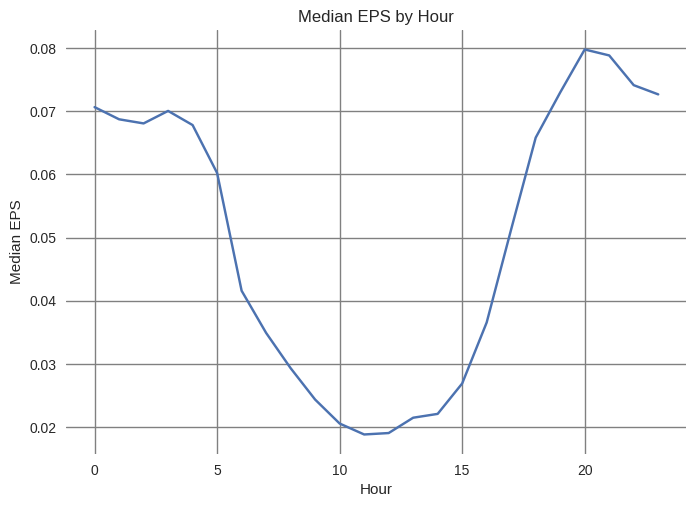

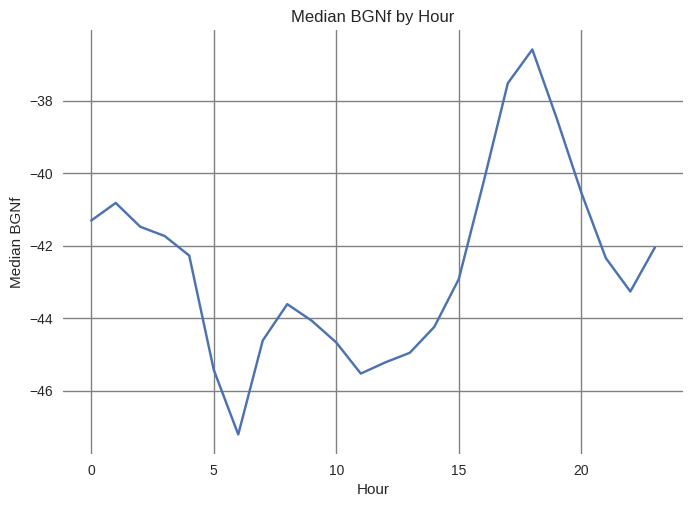

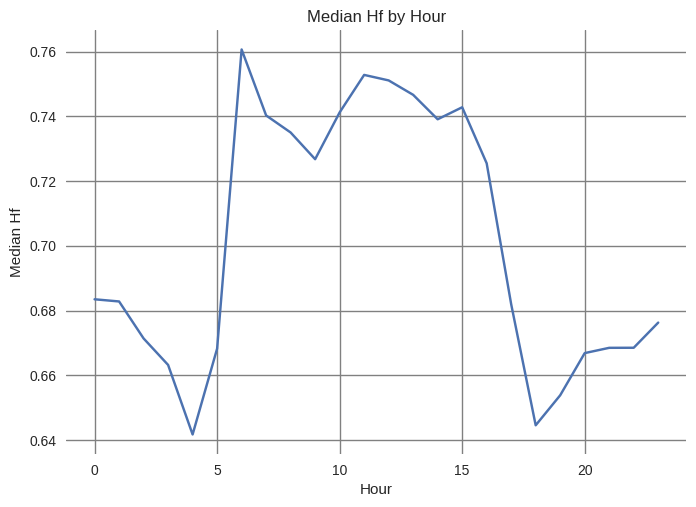

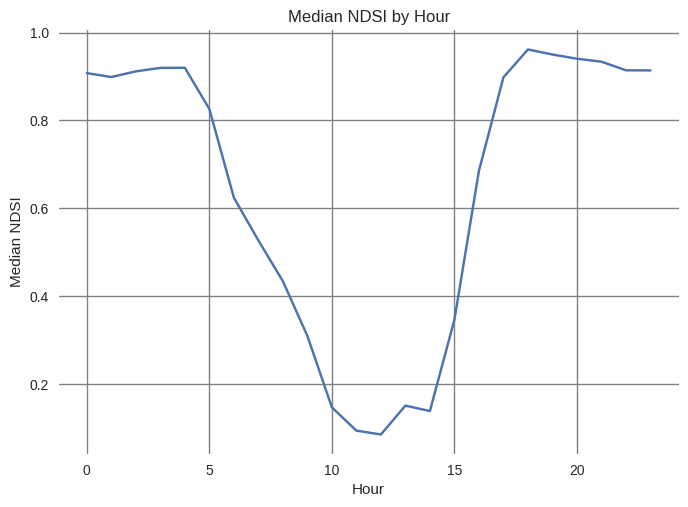

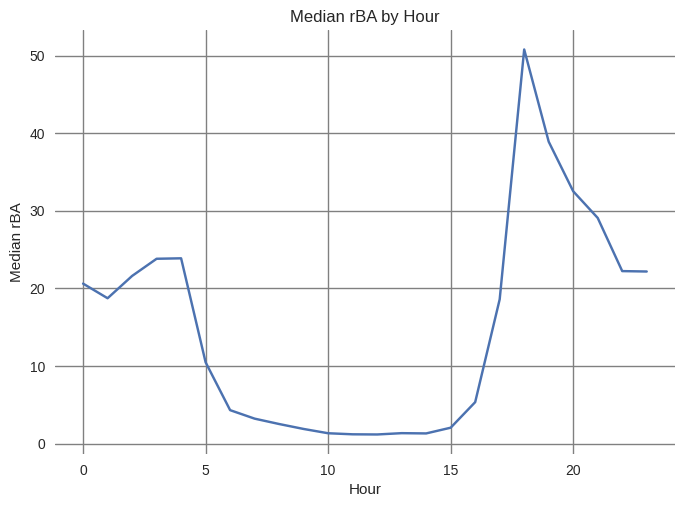

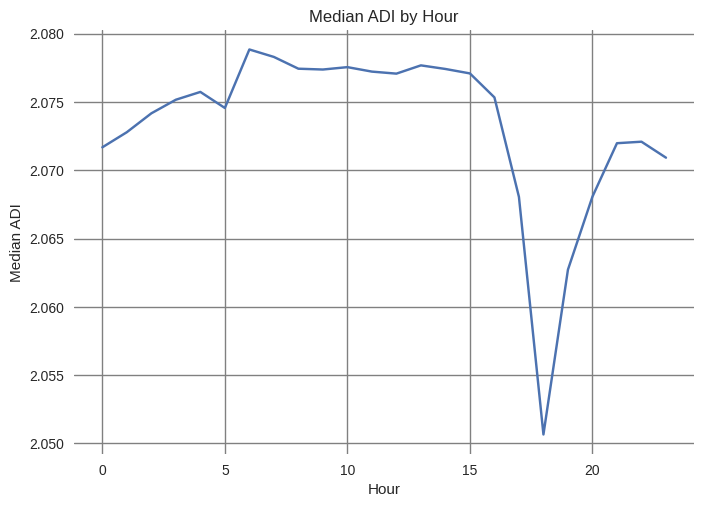

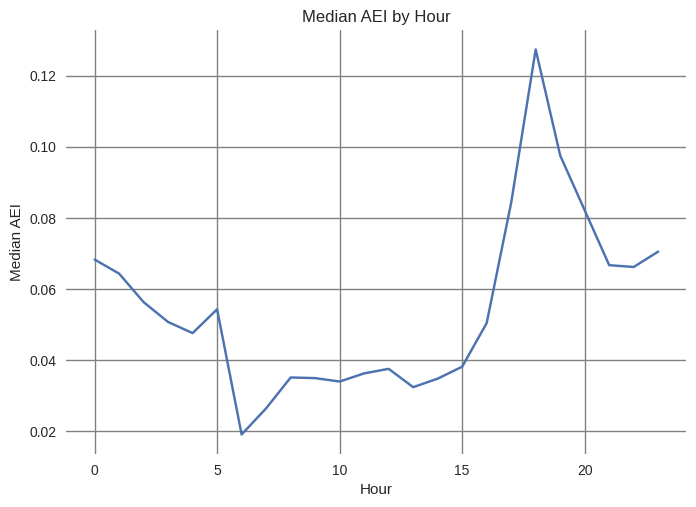

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataframe 'df'

# Group the dataframe by 'hora' and calculate the median for each acoustic index
grouped_df = df.groupby('hora')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()

# Get the list of acoustic indices
acoustic_indices = grouped_df.columns.tolist()

# Plot each graph separately
for index in acoustic_indices:
    plt.figure(facecolor="white")
    ax = plt.axes()
    # Setting the background color
    ax.set_facecolor("white")
    ax.grid(True, axis='y')

    plt.plot(grouped_df.index, grouped_df[index])
    plt.xlabel('Hour')
    plt.ylabel('Median ' + index)
    plt.title('Median ' + index + ' by Hour')
    plt.grid(True, c='gray')

    plt.show()


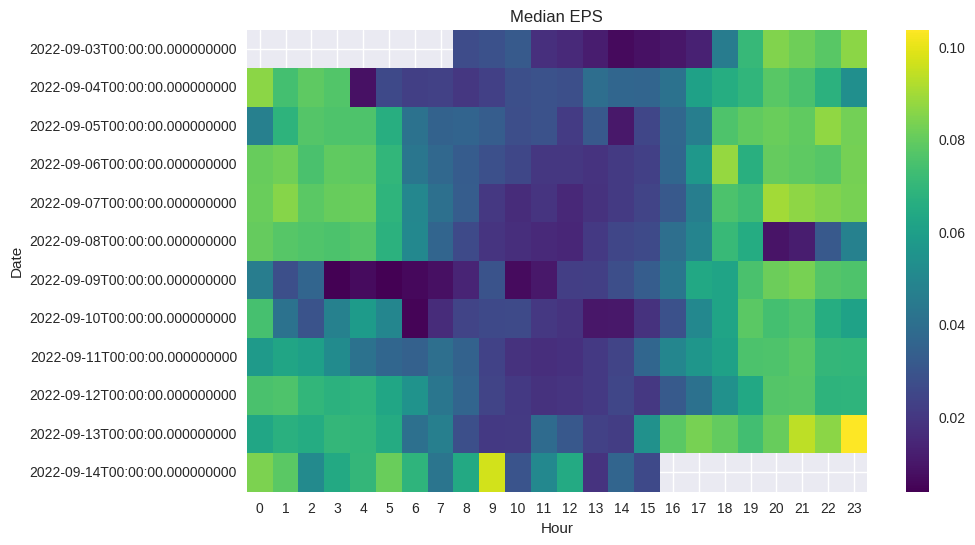

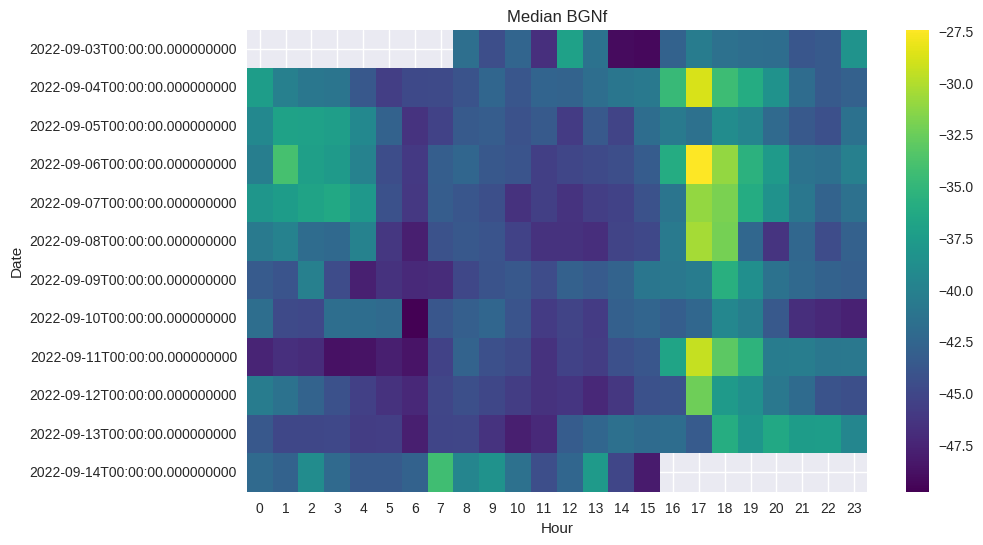

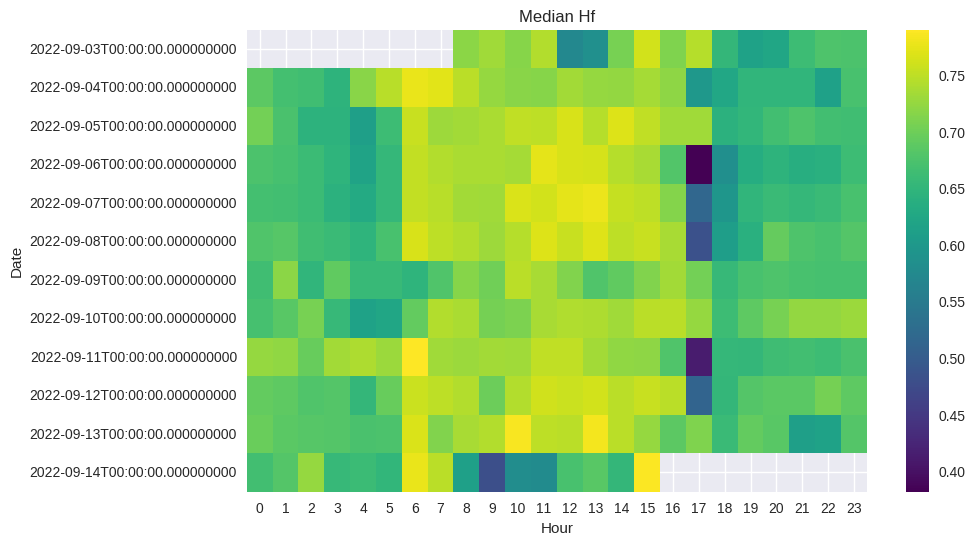

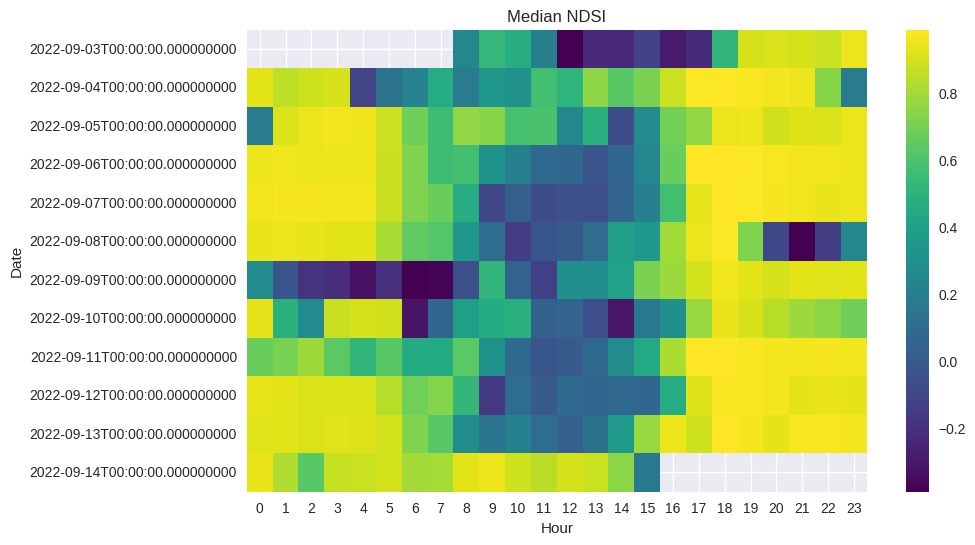

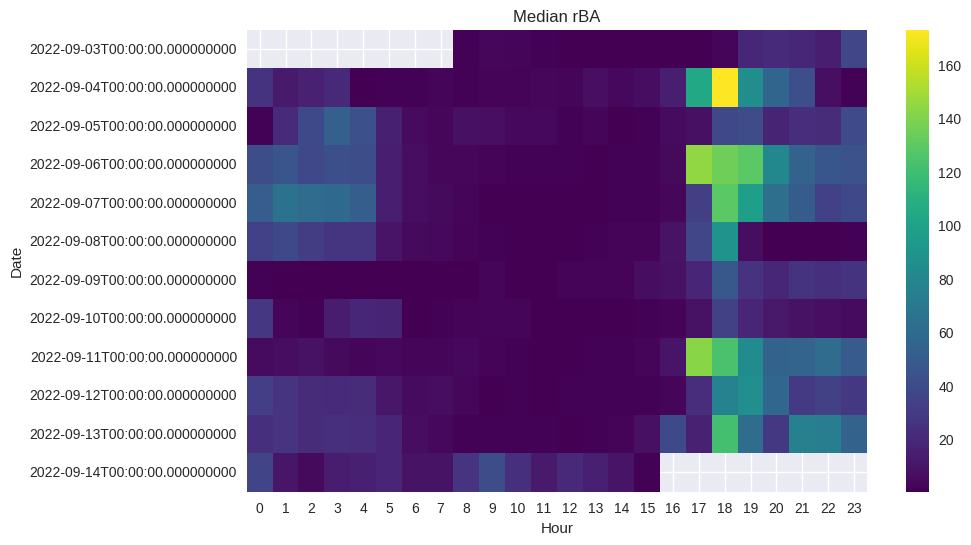

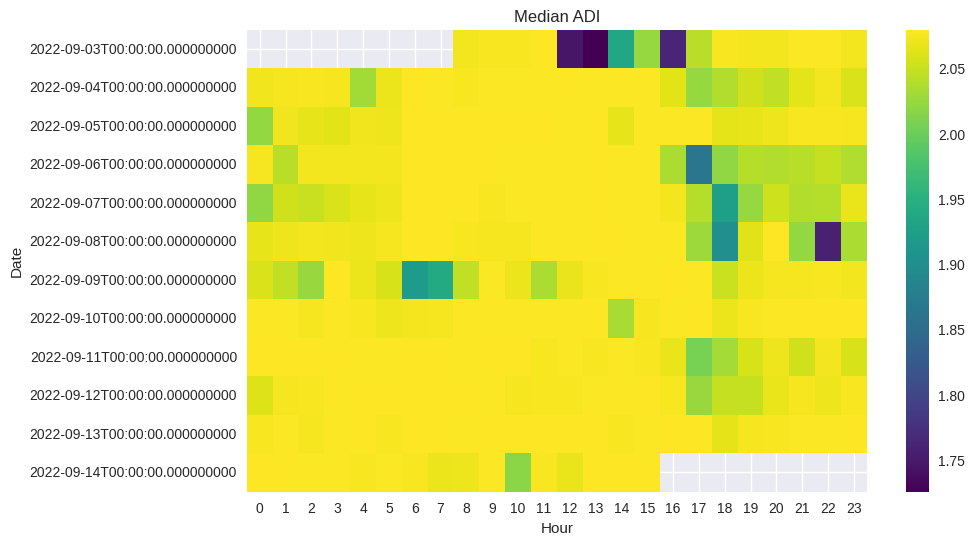

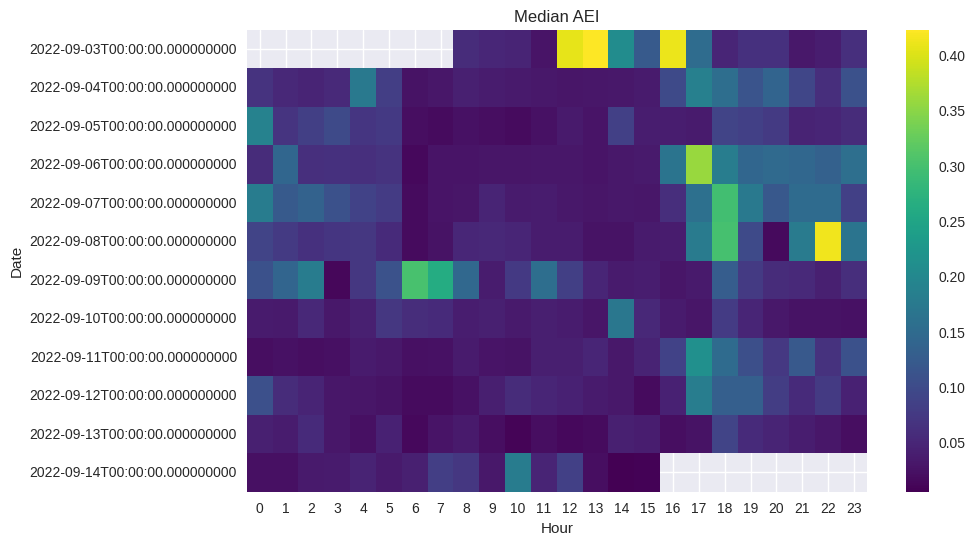

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataframe 'df'

# Convert the 'fecha' column to a datetime object for better handling
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')

# Group the dataframe by 'hora' and 'fecha' and calculate the median for each acoustic index
grouped_df = df.groupby(['hora', 'fecha'])[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median().reset_index()

# Get the list of acoustic indices
acoustic_indices = grouped_df.columns.tolist()[2:]

# Create a 2D heatmap plot for each acoustic index
for index in acoustic_indices:
    pivot_table = grouped_df.pivot_table(values=index, index='fecha', columns='hora')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='viridis', annot=False)
    plt.title('Median ' + index)
    plt.xlabel('Hour')
    plt.ylabel('Date')

    plt.show()







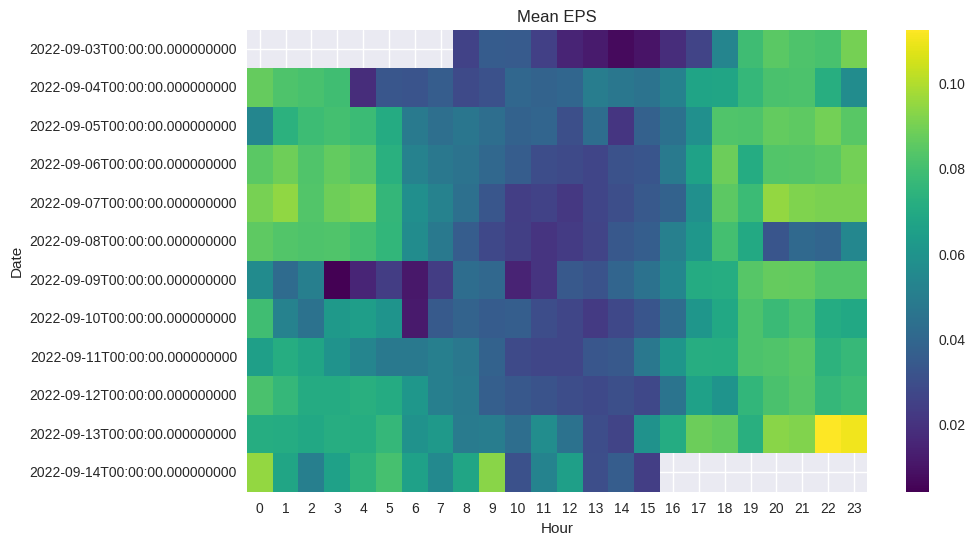

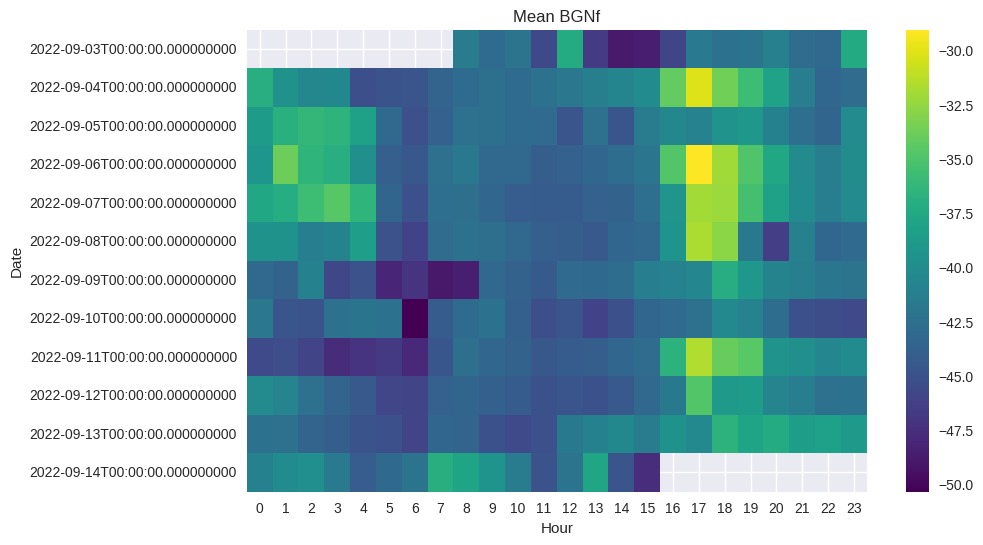

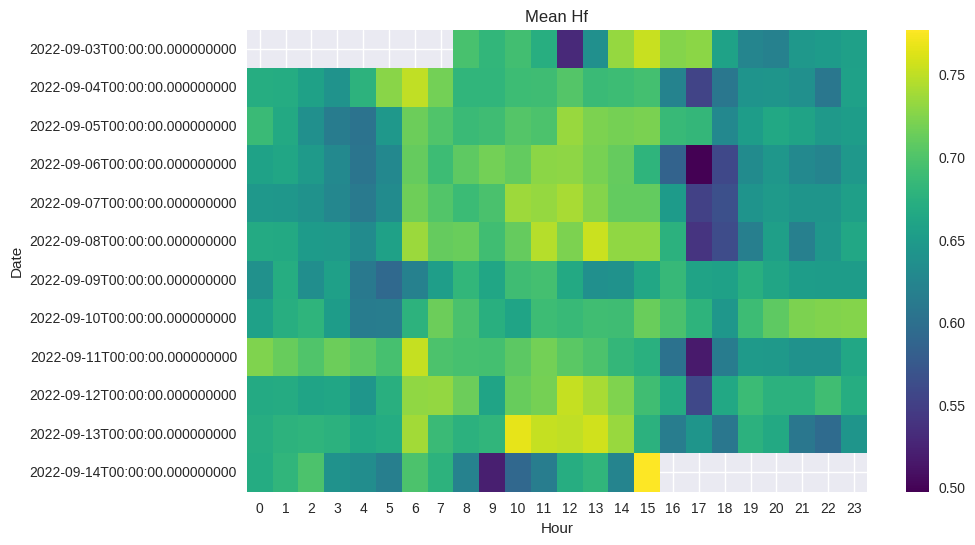

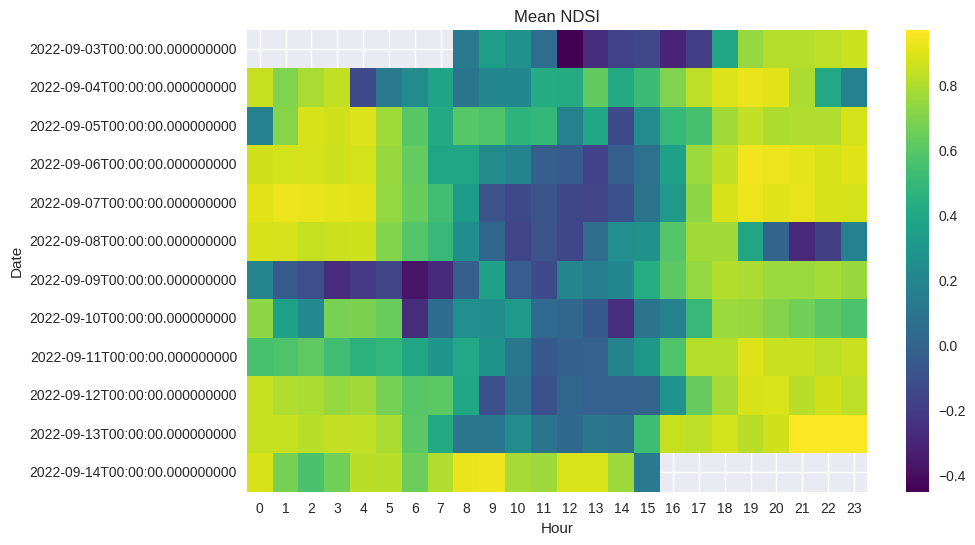

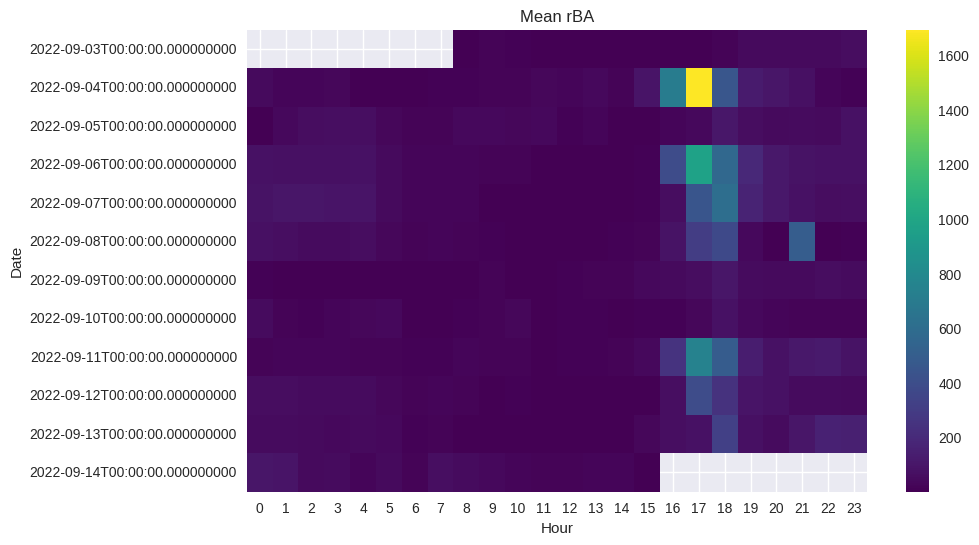

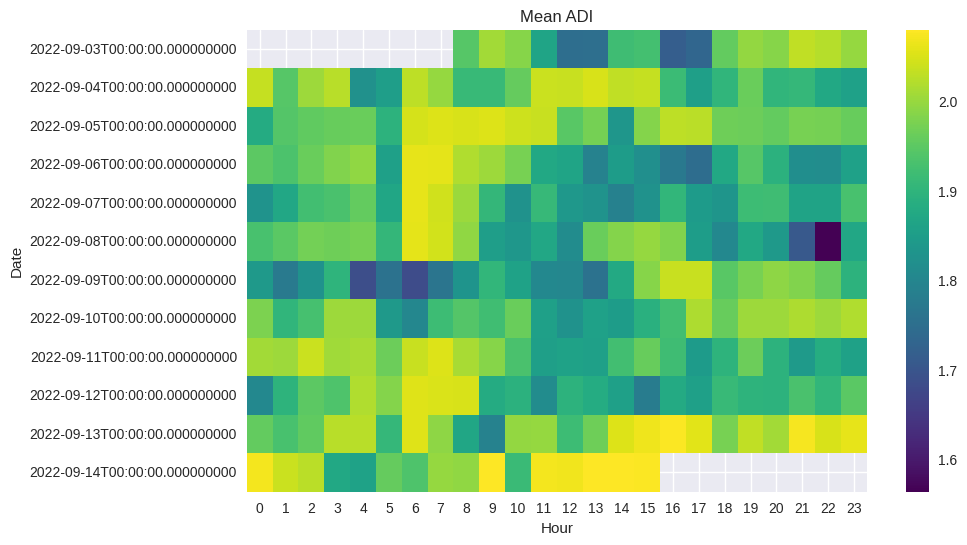

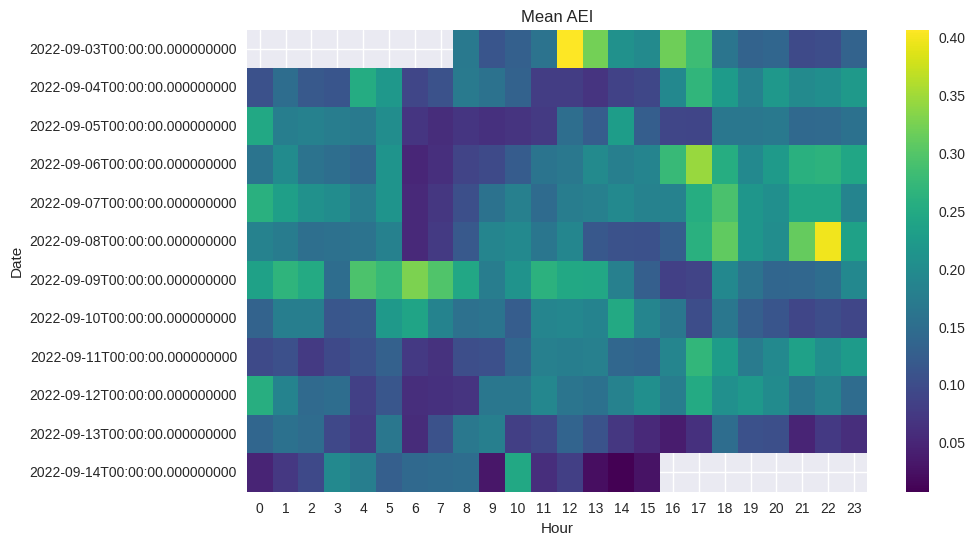

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataframe 'df'

# Convert the 'fecha' column to a datetime object for better handling
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')

# Group the dataframe by 'hora' and 'fecha' and calculate the median for each acoustic index
grouped_df = df.groupby(['hora', 'fecha'])[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].mean().reset_index()

# Get the list of acoustic indices
acoustic_indices = grouped_df.columns.tolist()[2:]

# Create a 2D heatmap plot for each acoustic index
for index in acoustic_indices:
    pivot_table = grouped_df.pivot_table(values=index, index='fecha', columns='hora')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='viridis', annot=False)
    plt.title('Mean ' + index)
    plt.xlabel('Hour')
    plt.ylabel('Date')

    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_interpolation_map(df, acoustic_index):
    # Calculate the mean of the acoustic index for each location and hour
    grouped_df = df.groupby(['YCOORD.y', 'XCOORD.y', 'hora'])[acoustic_index].mean().reset_index()

    # Extract unique hours and locations
    hours = df['hora'].unique()
    unique_locations = df[['YCOORD.y', 'XCOORD.y']].drop_duplicates()

    # Define grid of points for interpolation
    x_grid = np.linspace(unique_locations['XCOORD.y'].min(), unique_locations['XCOORD.y'].max(), 100)
    y_grid = np.linspace(unique_locations['YCOORD.y'].min(), unique_locations['YCOORD.y'].max(), 100)
    xx, yy = np.meshgrid(x_grid, y_grid)

    # Create a plot for each hour
    for hour in hours:
        plt.figure(figsize=(8, 6))

        # Filter data for the current hour
        data = grouped_df[grouped_df['hora'] == hour]

        # Perform interpolation using griddata
        points = data[['XCOORD.y', 'YCOORD.y']].values
        values = data[acoustic_index].values
        interpolated_values = griddata(points, values, (xx, yy), method='linear')

        # Plot the interpolation map
        plt.imshow(interpolated_values, extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
                   origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label=acoustic_index)

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Interpolation of {acoustic_index} at Hour {hour}')

        plt.show()

# Example usage
# Assuming you have already loaded your DataFrame 'df' with the new columns 'YCOORD.y' and 'XCOORD.y'



In [ ]:
plot_interpolation_map(df_merged, 'EPS')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import Image

def plot_interpolation_map(df, acoustic_index, output_path):
    # Calculate the mean of the acoustic index for each location and hour
    grouped_df = df.groupby(['YCOORD.y', 'XCOORD.y', 'hora'])[acoustic_index].mean().reset_index()

    # Extract unique hours and locations
    hours = df['hora'].unique()
    unique_locations = df[['YCOORD.y', 'XCOORD.y']].drop_duplicates()

    # Define grid of points for interpolation
    x_grid = np.linspace(unique_locations['XCOORD.y'].min(), unique_locations['XCOORD.y'].max(), 100)
    y_grid = np.linspace(unique_locations['YCOORD.y'].min(), unique_locations['YCOORD.y'].max(), 100)
    xx, yy = np.meshgrid(x_grid, y_grid)

    # Create and save GIF frames for each hour
    frames = []
    for hour in hours:
        plt.figure(figsize=(8, 6))

        # Filter data for the current hour
        data = grouped_df[grouped_df['hora'] == hour]

        # Perform interpolation using griddata
        points = data[['XCOORD.y', 'YCOORD.y']].values
        values = data[acoustic_index].values
        interpolated_values = griddata(points, values, (xx, yy), method='linear')

        # Plot the interpolation map
        plt.imshow(interpolated_values, extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
                   origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label=acoustic_index)

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Interpolation of {acoustic_index} at Hour {hour}')

        # Save the plot as an image
        plt.savefig(f"frame_{hour}.png", dpi=100, bbox_inches='tight')
        plt.close()

        # Append the image to the list of frames
        frames.append(Image.open(f"frame_{hour}.png"))

    # Save the frames as a GIF
    frames[0].save(output_path, format='GIF', append_images=frames[1:], save_all=True, duration=300, loop=0)

    # Remove the temporary image files
    for hour in hours:
        file_path = f"frame_{hour}.png"
        if os.path.exists(file_path):
            os.remove(file_path)


# Example usage
# Assuming you have already loaded your DataFrame 'df' with the new columns 'YCOORD.y' and 'XCOORD.y'


In [ ]:
plot_interpolation_map(df_merged, 'EPS', 'interpolation.gif')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation

def plot_interpolation_map(df, acoustic_index, output_path):
    # Calculate the mean of the acoustic index for each location and hour
    grouped_df = df.groupby(['YCOORD.y', 'XCOORD.y', 'hora'])[acoustic_index].mean().reset_index()

    # Extract unique hours and locations
    hours = df['hora'].unique()
    unique_locations = df[['YCOORD.y', 'XCOORD.y']].drop_duplicates()

    # Define grid of points for interpolation
    x_grid = np.linspace(unique_locations['XCOORD.y'].min(), unique_locations['XCOORD.y'].max(), 100)
    y_grid = np.linspace(unique_locations['YCOORD.y'].min(), unique_locations['YCOORD.y'].max(), 100)
    xx, yy = np.meshgrid(x_grid, y_grid)

    # Create a plot for each hour and animate to create GIF
    fig, ax = plt.subplots(figsize=(8, 6))

    def update(hour):
        ax.clear()

        # Filter data for the current hour
        data = grouped_df[grouped_df['hora'] == hour]

        # Perform interpolation using griddata
        points = data[['XCOORD.y', 'YCOORD.y']].values
        values = data[acoustic_index].values
        interpolated_values = griddata(points, values, (xx, yy), method='linear')

        # Plot the interpolation map
        im = ax.imshow(interpolated_values, extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
                       origin='lower', aspect='auto', cmap='viridis', animated=True)

        # Scatter plot for data points
        ax.scatter(data['XCOORD.y'], data['YCOORD.y'], c='white', label='Data Points')

        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_title(f'Interpolation of {acoustic_index} at Hour {hour}')
        ax.legend()

        return im

    anim = FuncAnimation(fig, update, frames=hours, interval=300)
    anim.save(output_path, writer='imagemagick')


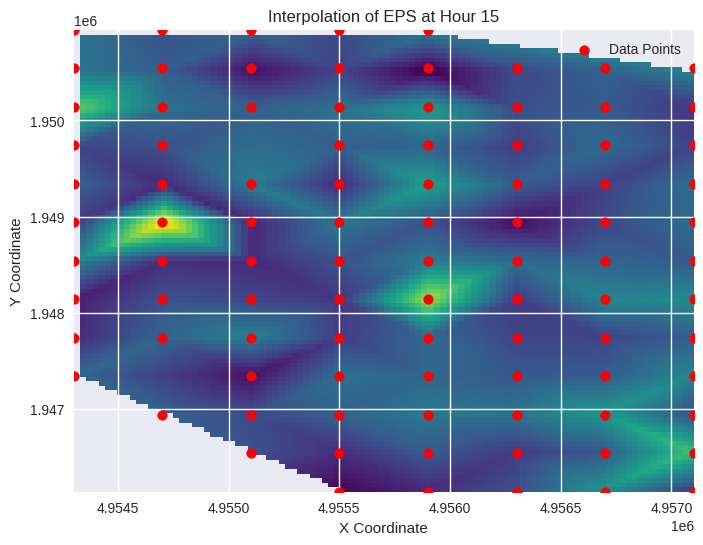

In [ ]:
plot_interpolation_map(df_merged, 'EPS', 'interpolation.gif')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation

def plot_interpolation_map(df, acoustic_index, output_path):
    # Calculate the mean of the acoustic index for each location and hour
    grouped_df = df.groupby(['YCOORD.y', 'XCOORD.y', 'hora', 'site'])[acoustic_index].mean().reset_index()

    # Extract unique hours and locations
    hours = df['hora'].unique()
    unique_locations = df[['YCOORD.y', 'XCOORD.y', 'site']].drop_duplicates()

    # Define grid of points for interpolation
    x_grid = np.linspace(unique_locations['XCOORD.y'].min(), unique_locations['XCOORD.y'].max(), 100)
    y_grid = np.linspace(unique_locations['YCOORD.y'].min(), unique_locations['YCOORD.y'].max(), 100)
    xx, yy = np.meshgrid(x_grid, y_grid)

    # Sort hours in ascending order
    unique_hours = np.sort(hours)

    # Create a plot for each hour and animate to create GIF
    fig, ax = plt.subplots(figsize=(8, 6))

    def update(hour):
        ax.clear()

        # Filter data for the current hour
        data = grouped_df[grouped_df['hora'] == hour]

        # Perform interpolation using griddata
        points = data[['XCOORD.y', 'YCOORD.y']].values
        values = data[acoustic_index].values
        interpolated_values = griddata(points, values, (xx, yy), method='linear')

        # Plot the interpolation map
        im = ax.imshow(interpolated_values, extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
                       origin='lower', aspect='auto', cmap='viridis', animated=True)

        # Scatter plot for data points
        ax.scatter(data['XCOORD.y'], data['YCOORD.y'], c='red', label='Data Points')

        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_title(f'Interpolation of {acoustic_index} at Hour {hour}',fontsize=18)
        ax.legend()

        # Annotate the sites
        for _, site in data.iterrows():
            ax.annotate(site['site'], (site['XCOORD.y'], site['YCOORD.y']),
                        fontsize=6, color='white', ha='center', va='center')

        return im

    anim = FuncAnimation(fig, update, frames=unique_hours, interval=300)
    anim.save(output_path, writer='imagemagick')




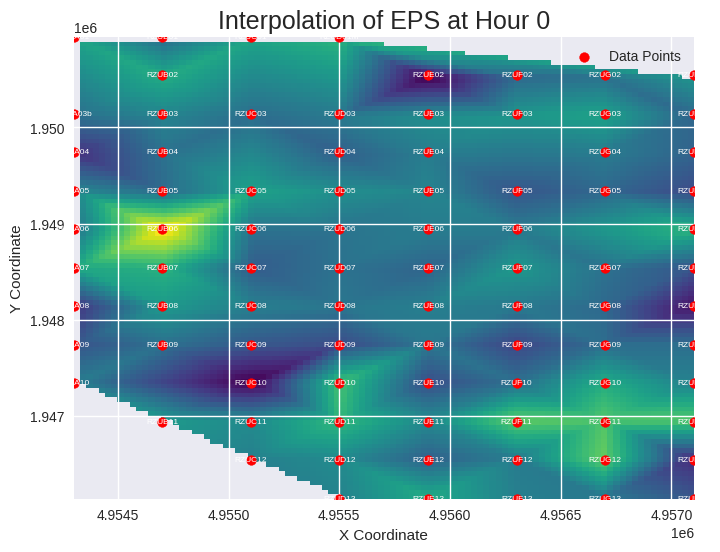

In [ ]:
plot_interpolation_map(df_merged, 'EPS', 'EPS.gif')


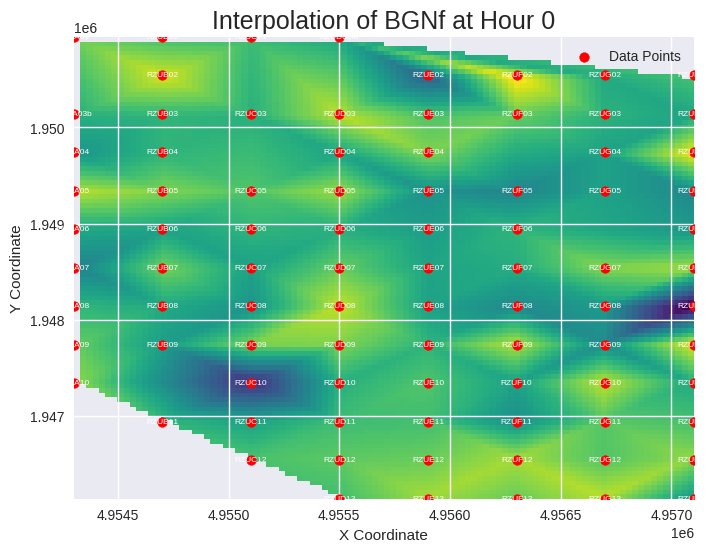

In [ ]:
plot_interpolation_map(df_merged, 'BGNf', 'BGNf.gif')


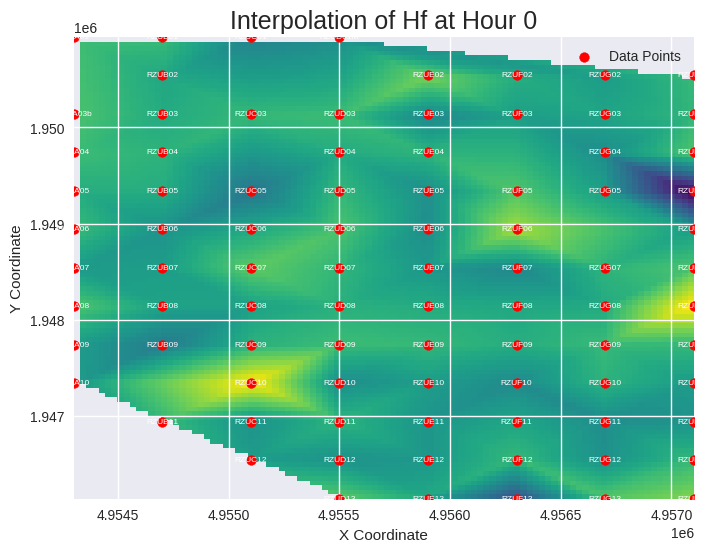

In [ ]:
plot_interpolation_map(df_merged, 'Hf', 'Hf.gif')


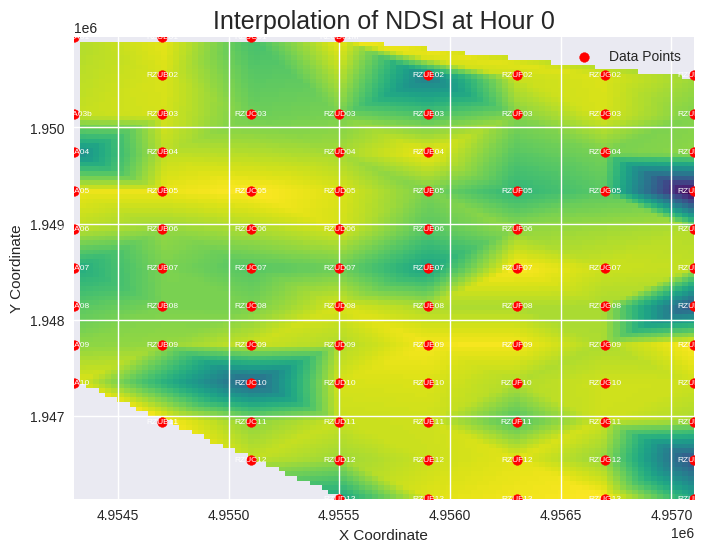

In [ ]:
plot_interpolation_map(df_merged, 'NDSI', 'NDSI.gif')


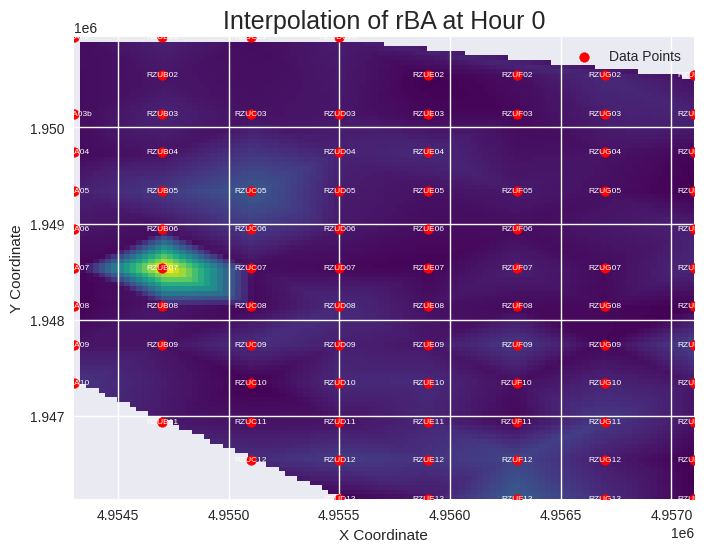

In [ ]:
plot_interpolation_map(df_merged, 'rBA', 'rBA.gif')


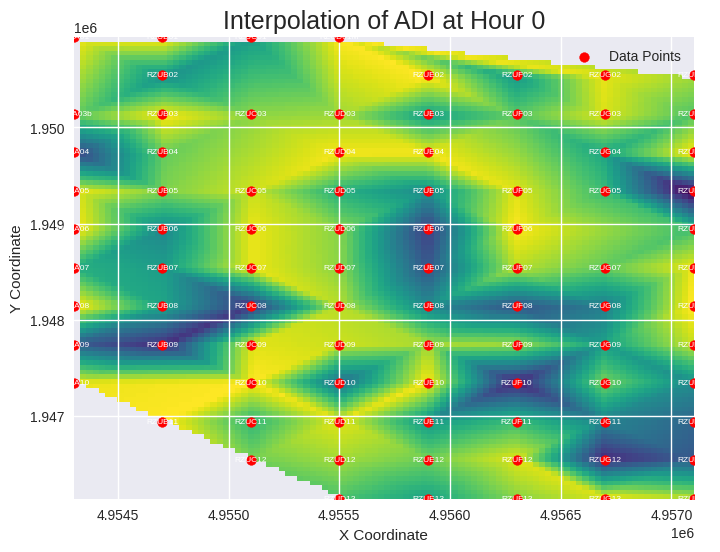

In [ ]:
plot_interpolation_map(df_merged, 'ADI', 'ADI.gif')


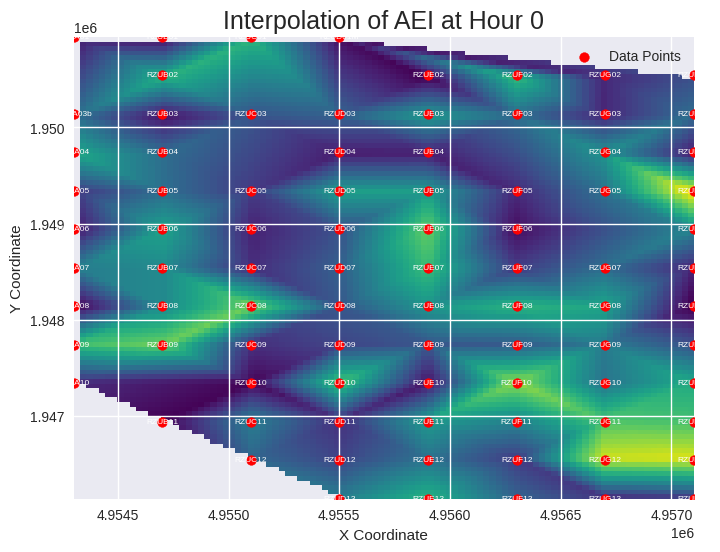

In [ ]:
plot_interpolation_map(df_merged, 'AEI', 'AEI.gif')


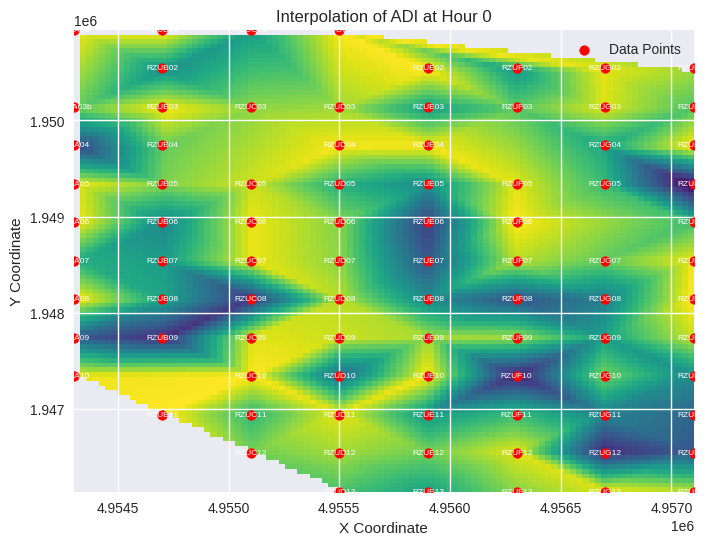

In [ ]:
plot_interpolation_map(df_merged, 'ADI', 'ADI.gif')


In [ ]:
df=df[['file', 'EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI','site','fecha','hora']]

### put the longitud and latitude in the dataframe

In [ ]:
ls /content/drive/MyDrive/Doctorado/2023/Junio/


 Certificates/              'Indices layers e intrpolacion.gsheet'
 grab_17_5.csv              'layers and interpolation methods.gslides'
 grab_17_5entropysites.csv   Metadatos.csv
 grab_17_5meansites.csv      Metadatos.gsheet
 grab_5_8.csv                Resultados/
 grab_5_8entropysites.csv    ReyZamuro_ch.xlsx
 grab_5_8meansites.csv       Reyzamuronormalizado_conindicesecologicos.csv
 grab_8_17.csv               Reyzamuronormalizado.csv
 grab_8_17entropysites.csv   Reyzamuronormalizado.gsheet
 grab_8_17meansites.csv      ReyZamuro_Varunsupselection.ipynb


In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/SLAVI.csv")

In [ ]:
metadatos

field_numb     XCOORD.y     YCOORD.y    SLAVI1
0      RZUH04  4957101.251  1949742.623  0.481383
1      RZUH13  4957101.251  1946142.623  0.277975
2      RZUH07  4957101.251  1948542.623  0.750030
3      RZUH03  4957101.251  1950142.623  0.171789
4      RZUH05  4957101.251  1949342.623  0.113393
..        ...          ...          ...       ...
89     RZUG11  4956701.251  1946942.623  0.214765
90     RZUG06  4956701.251  1948942.623  0.066939
91     RZUG04  4956701.251  1949742.623  0.093513
92     RZUG02  4956701.251  1950542.623  0.657344
93     RZUG09  4956701.251  1947742.623  0.032421

[94 rows x 4 columns]

In [ ]:
metadatos=metadatos.rename(columns={'field_numb': 'site'})
metadatos

site     XCOORD.y     YCOORD.y    SLAVI1
0   RZUH04  4957101.251  1949742.623  0.481383
1   RZUH13  4957101.251  1946142.623  0.277975
2   RZUH07  4957101.251  1948542.623  0.750030
3   RZUH03  4957101.251  1950142.623  0.171789
4   RZUH05  4957101.251  1949342.623  0.113393
..     ...          ...          ...       ...
89  RZUG11  4956701.251  1946942.623  0.214765
90  RZUG06  4956701.251  1948942.623  0.066939
91  RZUG04  4956701.251  1949742.623  0.093513
92  RZUG02  4956701.251  1950542.623  0.657344
93  RZUG09  4956701.251  1947742.623  0.032421

[94 rows x 4 columns]

In [ ]:

df_merged = pd.merge(df, metadatos[['site', 'YCOORD.y', 'XCOORD.y',"SLAVI1"]], on='site', how='left')
df_merged

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  31372.933333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  40403.816667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  36570.916667   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
...                                                  ...           ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  31054.866667   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

              MEANt      VARt     SKEWt        KURTt       LEQt       BGNt  \
0     -6.887912e-19  0.000193  0.177502     5.834632  55.877214 -28.298142   
1     -5.919069e-19  0.000172  0.221258    14.253758  55.379005 -28.342884   
2      1.142055e-18  0.000277  0.182959     6.675471  57.451929 -26.156468   
3      5.251972e-19  0.000259  0.217033    11.059525  57.146265 -26.752327   
4      1.970453e-18  0.004055  0.113164     7.852549  69.100988 -15.658711   
...             ...       ...       ...          ...        ...        ...   
52086 -3.340258e-19  0.000024  0.293895    63.263822  46.752417 -37.743231   
52087 -1.824929e-19  0.000327  0.249309     8.718704  58.170666 -29.269617   
52088  1.538507e-19  0.000184 -0.881932  1360.450964  55.657117 -34.952636   
52089  7.735421e-20  0.003032 -0.172413    25.499336  67.837515 -26.358539   
52090  2.541731e-19  0.000014  0.248200   472.819549  44.604796 -39.605826   

            SNRt       MED  ...      RAOQ       AGI  ROItotal   ROIcover  \
0       1.478258  0.038467  ...  0.309954  1.254270      2203   2.307533   
1       2.038076  0.038270  ...  0.346173  1.249948      2024   1.740025   
2       1.277365  0.049224  ...  0.324124  1.242176      1783   1.611886   
3       2.233526  0.045960  ...  0.407788  1.291630      2505   3.563665   
4       1.498894  0.164841  ...  0.221803  1.292969      1002   2.655821   
...          ...       ...  ...       ...       ...       ...        ...   
52086   0.871930  0.012967  ...  0.513556  1.226161       662   0.290968   
52087   4.180969  0.034397  ...  0.106330  1.303232       460   7.063804   
52088   6.535912  0.017880  ...  0.255939  1.346266       962   5.464904   
52089  11.335550  0.048092  ...  0.116949  1.877558       217  16.169182   
52090   3.405888  0.010464  ...  0.501516  1.243373      1010   0.654612   

          fecha  hora    site     YCOORD.y     XCOORD.y    SLAVI1  
0      20220907    15  RZUH04  1949742.623  4957101.251  0.481383  
1      20220912    13  RZUH04  1949742.623  4957101.251  0.481383  
2      20220912     4  RZUH04  1949742.623  4957101.251  0.481383  
3      20220904    12  RZUH04  1949742.623  4957101.251  0.481383  
4      20220904     0  RZUH04  1949742.623  4957101.251  0.481383  
...         ...   ...     ...          ...          ...       ...  
52086  20220909    20  RZUG09  1947742.623  4956701.251  0.032421  
52087  20220907     2  RZUG09  1947742.623  4956701.251  0.032421  
52088  20220909     1  RZUG09  1947742.623  4956701.251  0.032421  
52089  20220909    19  RZUG09  1947742.623  4956701.251  0.032421  
52090  20220911     6  RZUG09  1947742.623  4956701.251  0.032421  

[52091 rows x 64 columns]

In [ ]:
df_merged.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado.csv",index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado.csv')

### Put the information of the ecological layers in df

In [ ]:
ls /content/drive/MyDrive/Doctorado/2023/marzo/capas/

AD.csv           COB.csv             DN.csv    NDMI.csv    SL.csv
briloesri.csv    Cverdor_llanos.csv  FM.csv    prueba.csv
CLlanosNDVI.csv  DI.csv              ICHN.csv  SLAVI.csv


In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/AD.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df, metadatos[['site', 'YCOORD.y', 'XCOORD.y',"AD1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora   YCOORD.y_x   XCOORD.y_x    SLAVI1   YCOORD.y_y   XCOORD.y_y  AD1  
0        15  1949742.623  4957101.251  0.481383  1949742.623  4957101.251  0.2  
1        13  1949742.623  4957101.251  0.481383  1949742.623  4957101.251  0.2  
2         4  1949742.623  4957101.251  0.481383  1949742.623  4957101.251  0.2  
3        12  1949742.623  4957101.251  0.481383  1949742.623  4957101.251  0.2  
4         0  1949742.623  4957101.251  0.481383  1949742.623  4957101.251  0.2  
...     ...          ...          ...       ...          ...          ...  ...  
52086    20  1947742.623  4956701.251  0.032421  1947742.623  4956701.251  0.0  
52087     2  1947742.623  4956701.251  0.032421  1947742.623  4956701.251  0.0  
52088     1  1947742.623  4956701.251  0.032421  1947742.623  4956701.251  0.0  
52089    19  1947742.623  4956701.251  0.032421  1947742.623  4956701.251  0.0  
52090     6  1947742.623  4956701.251  0.032421  1947742.623  4956701.251  0.0  

[52091 rows x 17 columns]

In [ ]:
metadatos

site     XCOORD.y     YCOORD.y       SL1
0   RZUH04  4957101.251  1949742.623  0.825996
1   RZUH13  4957101.251  1946142.623  0.925968
2   RZUH07  4957101.251  1948542.623  0.825996
3   RZUH03  4957101.251  1950142.623  1.000000
4   RZUH05  4957101.251  1949342.623  0.834868
..     ...          ...          ...       ...
89  RZUG11  4956701.251  1946942.623  0.921965
90  RZUG06  4956701.251  1948942.623  0.777620
91  RZUG04  4956701.251  1949742.623  0.876756
92  RZUG02  4956701.251  1950542.623  0.697652
93  RZUG09  4956701.251  1947742.623  0.898303

[94 rows x 4 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/SL.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "SL1"]], on='site', how='left')
df_merged

KeyError: ignored

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/NDMI.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "NDMI1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1       SL1     NDMI1  
0        15  1949742.623  4957101.251  0.481383  0.825996  0.624169  
1        13  1949742.623  4957101.251  0.481383  0.825996  0.624169  
2         4  1949742.623  4957101.251  0.481383  0.825996  0.624169  
3        12  1949742.623  4957101.251  0.481383  0.825996  0.624169  
4         0  1949742.623  4957101.251  0.481383  0.825996  0.624169  
...     ...          ...          ...       ...       ...       ...  
52086    20  1947742.623  4956701.251  0.032421  0.898303  0.175586  
52087     2  1947742.623  4956701.251  0.032421  0.898303  0.175586  
52088     1  1947742.623  4956701.251  0.032421  0.898303  0.175586  
52089    19  1947742.623  4956701.251  0.032421  0.898303  0.175586  
52090     6  1947742.623  4956701.251  0.032421  0.898303  0.175586  

[52091 rows x 16 columns]

In [ ]:

import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/ICHN.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "ICHN1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1       SL1     NDMI1     ICHN1  
0        15  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658  
1        13  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658  
2         4  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658  
3        12  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658  
4         0  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658  
...     ...          ...          ...       ...       ...       ...       ...  
52086    20  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698  
52087     2  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698  
52088     1  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698  
52089    19  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698  
52090     6  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698  

[52091 rows x 17 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/FM.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "FM1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1       SL1     NDMI1     ICHN1  \
0        15  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
1        13  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
2         4  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
3        12  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
4         0  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
...     ...          ...          ...       ...       ...       ...       ...   
52086    20  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52087     2  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52088     1  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52089    19  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52090     6  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   

            FM1  
0      0.428571  
1      0.428571  
2      0.428571  
3      0.428571  
4      0.428571  
...         ...  
52086  0.000000  
52087  0.000000  
52088  0.000000  
52089  0.000000  
52090  0.000000  

[52091 rows x 18 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/DN.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "DN1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1       SL1     NDMI1     ICHN1  \
0        15  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
1        13  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
2         4  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
3        12  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
4         0  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
...     ...          ...          ...       ...       ...       ...       ...   
52086    20  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52087     2  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52088     1  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52089    19  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52090     6  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   

            FM1  DN1  
0      0.428571  1.0  
1      0.428571  1.0  
2      0.428571  1.0  
3      0.428571  1.0  
4      0.428571  1.0  
...         ...  ...  
52086  0.000000  1.0  
52087  0.000000  1.0  
52088  0.000000  1.0  
52089  0.000000  1.0  
52090  0.000000  1.0  

[52091 rows x 19 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/DI.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "DI1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1       SL1     NDMI1     ICHN1  \
0        15  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
1        13  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
2         4  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
3        12  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
4         0  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
...     ...          ...          ...       ...       ...       ...       ...   
52086    20  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52087     2  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52088     1  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52089    19  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52090     6  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   

            FM1  DN1       DI1  
0      0.428571  1.0  0.027956  
1      0.428571  1.0  0.027956  
2      0.428571  1.0  0.027956  
3      0.428571  1.0  0.027956  
4      0.428571  1.0  0.027956  
...         ...  ...       ...  
52086  0.000000  1.0  0.077389  
52087  0.000000  1.0  0.077389  
52088  0.000000  1.0  0.077389  
52089  0.000000  1.0  0.077389  
52090  0.000000  1.0  0.077389  

[52091 rows x 20 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/Cverdor_llanos.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "vllanos1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       ...     YCOORD.y     XCOORD.y    SLAVI1       SL1     NDMI1     ICHN1  \
0      ...  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
1      ...  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
2      ...  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
3      ...  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
4      ...  1949742.623  4957101.251  0.481383  0.825996  0.624169  3.964658   
...    ...          ...          ...       ...       ...       ...       ...   
52086  ...  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52087  ...  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52088  ...  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52089  ...  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   
52090  ...  1947742.623  4956701.251  0.032421  0.898303  0.175586  2.683698   

            FM1  DN1       DI1  vllanos1  
0      0.428571  1.0  0.027956  0.079419  
1      0.428571  1.0  0.027956  0.079419  
2      0.428571  1.0  0.027956  0.079419  
3      0.428571  1.0  0.027956  0.079419  
4      0.428571  1.0  0.027956  0.079419  
...         ...  ...       ...       ...  
52086  0.000000  1.0  0.077389 -0.047291  
52087  0.000000  1.0  0.077389 -0.047291  
52088  0.000000  1.0  0.077389 -0.047291  
52089  0.000000  1.0  0.077389 -0.047291  
52090  0.000000  1.0  0.077389 -0.047291  

[52091 rows x 21 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/COB.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "COB1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       ...     XCOORD.y    SLAVI1       SL1     NDMI1     ICHN1       FM1  \
0      ...  4957101.251  0.481383  0.825996  0.624169  3.964658  0.428571   
1      ...  4957101.251  0.481383  0.825996  0.624169  3.964658  0.428571   
2      ...  4957101.251  0.481383  0.825996  0.624169  3.964658  0.428571   
3      ...  4957101.251  0.481383  0.825996  0.624169  3.964658  0.428571   
4      ...  4957101.251  0.481383  0.825996  0.624169  3.964658  0.428571   
...    ...          ...       ...       ...       ...       ...       ...   
52086  ...  4956701.251  0.032421  0.898303  0.175586  2.683698  0.000000   
52087  ...  4956701.251  0.032421  0.898303  0.175586  2.683698  0.000000   
52088  ...  4956701.251  0.032421  0.898303  0.175586  2.683698  0.000000   
52089  ...  4956701.251  0.032421  0.898303  0.175586  2.683698  0.000000   
52090  ...  4956701.251  0.032421  0.898303  0.175586  2.683698  0.000000   

       DN1       DI1  vllanos1  COB1  
0      1.0  0.027956  0.079419   1.0  
1      1.0  0.027956  0.079419   1.0  
2      1.0  0.027956  0.079419   1.0  
3      1.0  0.027956  0.079419   1.0  
4      1.0  0.027956  0.079419   1.0  
...    ...       ...       ...   ...  
52086  1.0  0.077389 -0.047291   0.5  
52087  1.0  0.077389 -0.047291   0.5  
52088  1.0  0.077389 -0.047291   0.5  
52089  1.0  0.077389 -0.047291   0.5  
52090  1.0  0.077389 -0.047291   0.5  

[52091 rows x 22 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/CLlanosNDVI.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "CLlanosNDVI1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       ...    SLAVI1       SL1     NDMI1     ICHN1       FM1  DN1       DI1  \
0      ...  0.481383  0.825996  0.624169  3.964658  0.428571  1.0  0.027956   
1      ...  0.481383  0.825996  0.624169  3.964658  0.428571  1.0  0.027956   
2      ...  0.481383  0.825996  0.624169  3.964658  0.428571  1.0  0.027956   
3      ...  0.481383  0.825996  0.624169  3.964658  0.428571  1.0  0.027956   
4      ...  0.481383  0.825996  0.624169  3.964658  0.428571  1.0  0.027956   
...    ...       ...       ...       ...       ...       ...  ...       ...   
52086  ...  0.032421  0.898303  0.175586  2.683698  0.000000  1.0  0.077389   
52087  ...  0.032421  0.898303  0.175586  2.683698  0.000000  1.0  0.077389   
52088  ...  0.032421  0.898303  0.175586  2.683698  0.000000  1.0  0.077389   
52089  ...  0.032421  0.898303  0.175586  2.683698  0.000000  1.0  0.077389   
52090  ...  0.032421  0.898303  0.175586  2.683698  0.000000  1.0  0.077389   

       vllanos1  COB1  CLlanosNDVI1  
0      0.079419   1.0      0.803468  
1      0.079419   1.0      0.803468  
2      0.079419   1.0      0.803468  
3      0.079419   1.0      0.803468  
4      0.079419   1.0      0.803468  
...         ...   ...           ...  
52086 -0.047291   0.5      0.232877  
52087 -0.047291   0.5      0.232877  
52088 -0.047291   0.5      0.232877  
52089 -0.047291   0.5      0.232877  
52090 -0.047291   0.5      0.232877  

[52091 rows x 23 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/briloesri.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "briloesri1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       ...       SL1     NDMI1     ICHN1       FM1  DN1       DI1  vllanos1  \
0      ...  0.825996  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
1      ...  0.825996  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
2      ...  0.825996  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
3      ...  0.825996  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
4      ...  0.825996  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
...    ...       ...       ...       ...       ...  ...       ...       ...   
52086  ...  0.898303  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52087  ...  0.898303  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52088  ...  0.898303  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52089  ...  0.898303  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52090  ...  0.898303  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   

       COB1  CLlanosNDVI1  briloesri1  
0       1.0      0.803468    0.410660  
1       1.0      0.803468    0.410660  
2       1.0      0.803468    0.410660  
3       1.0      0.803468    0.410660  
4       1.0      0.803468    0.410660  
...     ...           ...         ...  
52086   0.5      0.232877    0.472942  
52087   0.5      0.232877    0.472942  
52088   0.5      0.232877    0.472942  
52089   0.5      0.232877    0.472942  
52090   0.5      0.232877    0.472942  

[52091 rows x 24 columns]

In [ ]:
import pandas as pd
metadatos=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/marzo/capas/AD.csv")
metadatos=metadatos.rename(columns={'field_numb': 'site'})
df_merged = pd.merge(df_merged, metadatos[['site', "AD1"]], on='site', how='left')
df_merged

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       ...     NDMI1     ICHN1       FM1  DN1       DI1  vllanos1  COB1  \
0      ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   1.0   
1      ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   1.0   
2      ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   1.0   
3      ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   1.0   
4      ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   1.0   
...    ...       ...       ...       ...  ...       ...       ...   ...   
52086  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   0.5   
52087  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   0.5   
52088  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   0.5   
52089  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   0.5   
52090  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   0.5   

       CLlanosNDVI1  briloesri1  AD1  
0          0.803468    0.410660  0.2  
1          0.803468    0.410660  0.2  
2          0.803468    0.410660  0.2  
3          0.803468    0.410660  0.2  
4          0.803468    0.410660  0.2  
...             ...         ...  ...  
52086      0.232877    0.472942  0.0  
52087      0.232877    0.472942  0.0  
52088      0.232877    0.472942  0.0  
52089      0.232877    0.472942  0.0  
52090      0.232877    0.472942  0.0  

[52091 rows x 25 columns]

In [ ]:
df_merged.to_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado_conindicesecologicos.csv')

### IA coorrelation analysis and krustal wallis test

In [ ]:
df_merged=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado_conindicesecologicos.csv')

In [ ]:
df_merged=df_merged.dropna()
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
columns_to_correlate_with = ['SLAVI1', 'SL1', 'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1', 'COB1', 'CLlanosNDVI1', 'briloesri1', 'AD1']


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Tu DataFrame df_merged y las listas de columnas a estandarizar
# df_merged = ...
# columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
# columns_to_correlate_with = ['SLAVI1', 'SL1', 'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1', 'COB1', 'CLlanosNDVI1', 'briloesri1', 'AD1']

# Estandarizar las columnas usando MinMaxScaler
scaler = MinMaxScaler()
df_merged[columns_to_correlate] = scaler.fit_transform(df_merged[columns_to_correlate])
df_merged[columns_to_correlate_with] = scaler.fit_transform(df_merged[columns_to_correlate_with])


In [ ]:
df_merged[columns_to_correlate]

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI
0      0.022811  0.907289  0.673933  0.871313  0.000526  0.999214  0.036645
1      0.018103  0.905420  0.773855  0.458078  0.000066  0.999972  0.006525
2      0.029381  0.911544  0.740290  0.676059  0.000162  0.999948  0.008420
3      0.034244  0.908771  0.777389  0.625605  0.000130  0.999701  0.022646
4      0.102037  0.939365  0.655196  0.905807  0.000747  0.994801  0.085066
...         ...       ...       ...       ...       ...       ...       ...
52086  0.028104  0.883404  0.686880  0.909556  0.000781  0.885862  0.420795
52087  0.040141  0.904387  0.548897  0.947585  0.001404  0.997107  0.068846
52088  0.076939  0.887241  0.644561  0.310679  0.000035  0.485151  0.789354
52089  0.054567  0.912466  0.574360  0.926575  0.000980  0.889406  0.423460
52090  0.017590  0.876817  0.838746  0.708703  0.000189  0.999308  0.034450

[52082 rows x 7 columns]

In [ ]:
(df_merged[columns_to_correlate_with])

SLAVI1       SL1     NDMI1     ICHN1       FM1  DN1       DI1  \
0      0.623388  0.538878  0.748904  0.488526  0.428571  1.0  0.065214   
1      0.623388  0.538878  0.748904  0.488526  0.428571  1.0  0.065214   
2      0.623388  0.538878  0.748904  0.488526  0.428571  1.0  0.065214   
3      0.623388  0.538878  0.748904  0.488526  0.428571  1.0  0.065214   
4      0.623388  0.538878  0.748904  0.488526  0.428571  1.0  0.065214   
...         ...       ...       ...       ...       ...  ...       ...   
52086  0.001417  0.730496  0.064730  0.196451  0.000000  1.0  0.180530   
52087  0.001417  0.730496  0.064730  0.196451  0.000000  1.0  0.180530   
52088  0.001417  0.730496  0.064730  0.196451  0.000000  1.0  0.180530   
52089  0.001417  0.730496  0.064730  0.196451  0.000000  1.0  0.180530   
52090  0.001417  0.730496  0.064730  0.196451  0.000000  1.0  0.180530   

       vllanos1  COB1  CLlanosNDVI1  briloesri1   AD1  
0      0.810557   1.0      0.869837    0.423356  0.25  
1      0.810557   1.0      0.869837    0.423356  0.25  
2      0.810557   1.0      0.869837    0.423356  0.25  
3      0.810557   1.0      0.869837    0.423356  0.25  
4      0.810557   1.0      0.869837    0.423356  0.25  
...         ...   ...           ...         ...   ...  
52086  0.000000   0.5      0.016032    0.753038  0.00  
52087  0.000000   0.5      0.016032    0.753038  0.00  
52088  0.000000   0.5      0.016032    0.753038  0.00  
52089  0.000000   0.5      0.016032    0.753038  0.00  
52090  0.000000   0.5      0.016032    0.753038  0.00  

[52082 rows x 12 columns]

In [ ]:
df_merged

Unnamed: 0                                               file  \
0               0  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
1               1  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
2               2  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
3               3  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
4               4  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
...           ...                                                ...   
52086       52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52087       52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52088       52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52089       52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52090       52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...   

            EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
0      0.022811  0.907289  0.673933  0.871313  0.000526  0.999214  0.036645   
1      0.018103  0.905420  0.773855  0.458078  0.000066  0.999972  0.006525   
2      0.029381  0.911544  0.740290  0.676059  0.000162  0.999948  0.008420   
3      0.034244  0.908771  0.777389  0.625605  0.000130  0.999701  0.022646   
4      0.102037  0.939365  0.655196  0.905807  0.000747  0.994801  0.085066   
...         ...       ...       ...       ...       ...       ...       ...   
52086  0.028104  0.883404  0.686880  0.909556  0.000781  0.885862  0.420795   
52087  0.040141  0.904387  0.548897  0.947585  0.001404  0.997107  0.068846   
52088  0.076939  0.887241  0.644561  0.310679  0.000035  0.485151  0.789354   
52089  0.054567  0.912466  0.574360  0.926575  0.000980  0.889406  0.423460   
52090  0.017590  0.876817  0.838746  0.708703  0.000189  0.999308  0.034450   

         site  ...     NDMI1     ICHN1       FM1  DN1       DI1  vllanos1  \
0      RZUH04  ...  0.748904  0.488526  0.428571  1.0  0.065214  0.810557   
1      RZUH04  ...  0.748904  0.488526  0.428571  1.0  0.065214  0.810557   
2      RZUH04  ...  0.748904  0.488526  0.428571  1.0  0.065214  0.810557   
3      RZUH04  ...  0.748904  0.488526  0.428571  1.0  0.065214  0.810557   
4      RZUH04  ...  0.748904  0.488526  0.428571  1.0  0.065214  0.810557   
...       ...  ...       ...       ...       ...  ...       ...       ...   
52086  RZUG09  ...  0.064730  0.196451  0.000000  1.0  0.180530  0.000000   
52087  RZUG09  ...  0.064730  0.196451  0.000000  1.0  0.180530  0.000000   
52088  RZUG09  ...  0.064730  0.196451  0.000000  1.0  0.180530  0.000000   
52089  RZUG09  ...  0.064730  0.196451  0.000000  1.0  0.180530  0.000000   
52090  RZUG09  ...  0.064730  0.196451  0.000000  1.0  0.180530  0.000000   

       COB1  CLlanosNDVI1  briloesri1   AD1  
0       1.0      0.869837    0.423356  0.25  
1       1.0      0.869837    0.423356  0.25  
2       1.0      0.869837    0.423356  0.25  
3       1.0      0.869837    0.423356  0.25  
4       1.0      0.869837    0.423356  0.25  
...     ...           ...         ...   ...  
52086   0.5      0.016032    0.753038  0.00  
52087   0.5      0.016032    0.753038  0.00  
52088   0.5      0.016032    0.753038  0.00  
52089   0.5      0.016032    0.753038  0.00  
52090   0.5      0.016032    0.753038  0.00  

[52082 rows x 26 columns]

In [ ]:
import pandas as pd
import numpy as np

# Tu DataFrame con las columnas
# df = ...

# Columnas a incluir en la matriz de correlación
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
columns_to_correlate_with = ['SLAVI1', 'SL1', 'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1', 'COB1', 'CLlanosNDVI1', 'briloesri1', 'AD1']

# Seleccionar las columnas específicas en cada DataFrame y obtener los valores
df_to_correlate = df[columns_to_correlate]
df_to_correlate_with = df[columns_to_correlate_with]

# Eliminar filas con NaN para que ambos DataFrames tengan la misma longitud
df_to_correlate.dropna(inplace=True)
df_to_correlate_with.dropna(inplace=True)

# Calcular la matriz de correlación
correlation_matrix = np.corrcoef(df_to_correlate.T, df_to_correlate_with.T)

# Convertir la matriz de correlación a un DataFrame
correlation_df = pd.DataFrame(correlation_matrix, columns=columns_to_correlate, index=columns_to_correlate_with)

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_df)

In [ ]:
df_merged[columns_to_correlate_with[0]]

0        0.623388
1        0.623388
2        0.623388
3        0.623388
4        0.623388
           ...   
52086    0.001417
52087    0.001417
52088    0.001417
52089    0.001417
52090    0.001417
Name: SLAVI1, Length: 52082, dtype: float64

In [ ]:
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
columns_to_correlate_with = ['SLAVI1', 'SL1', 'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1', 'COB1', 'CLlanosNDVI1', 'briloesri1', 'AD1']
liss=[]
for i in columns_to_correlate:
  for j in columns_to_correlate_with:

    liss.append(np.corrcoef(df_merged[i],df_merged[j])[0, 1])

print(liss)

[-0.08570498320374391, 0.07751639115975836, -0.0877947413002199, -0.10587896090545837, -0.10727302204718822, -0.0840783318590736, -0.03815402710564079, -0.0832845678274573, -0.11349420869648823, -0.09001043566428754, 0.1213025870147628, -0.08345100731924786, 0.08887301427937323, -0.006620653174505722, 0.0805950399331429, 0.05560656714117852, 0.03616411012637248, 0.042268976941282795, 0.049992488576564374, 0.07156759546810651, 0.07739704847440149, 0.0944839509389484, -0.07245864839874049, 0.004376837037353123, -0.11703507511066576, 0.0821181165977216, -0.09743578233841123, -0.08558515476253352, -0.10190994142930253, 0.016575388646935113, -0.024477304734356557, -0.07913882006561394, -0.028729424812669456, -0.07085701839081233, 0.050255829755322126, -0.10138425627488701, 0.31944384162190786, -0.07086217751360072, 0.30461336209257966, 0.33068210125084146, 0.32463905195517817, 0.1792589643387777, 0.14151519181613614, 0.30304456526793216, 0.29733102108298265, 0.2968670122380954, -0.297063826

In [ ]:
len(liss)

84

In [ ]:
len(columns_to_correlate)

7

In [ ]:
correlation_matrix=np.array(liss).reshape(len(columns_to_correlate),len(columns_to_correlate_with))

In [ ]:
correlation_matrix.shape

(7, 12)

In [ ]:
correlation_df = pd.DataFrame(correlation_matrix, columns=columns_to_correlate_with, index=columns_to_correlate)


In [ ]:
correlation_df

SLAVI1       SL1     NDMI1     ICHN1       FM1       DN1       DI1  \
EPS  -0.085705  0.077516 -0.087795 -0.105879 -0.107273 -0.084078 -0.038154   
BGNf  0.088873 -0.006621  0.080595  0.055607  0.036164  0.042269  0.049992   
Hf   -0.117035  0.082118 -0.097436 -0.085585 -0.101910  0.016575 -0.024477   
NDSI  0.319444 -0.070862  0.304613  0.330682  0.324639  0.179259  0.141515   
rBA   0.103760  0.002306  0.106471  0.104689  0.107356  0.025122  0.049291   
ADI   0.232360  0.008618  0.230449  0.241448  0.236035  0.080756  0.075412   
AEI  -0.256977 -0.005335 -0.253639 -0.267458 -0.268436 -0.086588 -0.083820   

      vllanos1      COB1  CLlanosNDVI1  briloesri1       AD1  
EPS  -0.083285 -0.113494     -0.090010    0.121303 -0.083451  
BGNf  0.071568  0.077397      0.094484   -0.072459  0.004377  
Hf   -0.079139 -0.028729     -0.070857    0.050256 -0.101384  
NDSI  0.303045  0.297331      0.296867   -0.297064  0.266977  
rBA   0.092261  0.076685      0.093267   -0.078975  0.101861  
ADI   0.238026  0.206892      0.236283   -0.217378  0.215883  
AEI  -0.254457 -0.223298     -0.257244    0.235426 -0.247781

#### kruskal wallis

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal, spearmanr

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
columns_to_correlate_with = ['SLAVI1', 'SL1', 'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1', 'COB1', 'CLlanosNDVI1', 'briloesri1', 'AD1']

correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

for i in columns_to_correlate:
    for j in columns_to_correlate_with:
        # Calculate Spearman rank correlation coefficient
        correlation_coefficient, _ = spearmanr(df_merged[i], df_merged[j])
        correlation_df.at[i, j] = correlation_coefficient

        # Perform Kruskal-Wallis test
        h_value, p_value = kruskal(df_merged[i], df_merged[j])
        h_value_df.at[i, j] = h_value
        p_value_df.at[i, j] = p_value




In [ ]:
correlation_df

SLAVI1       SL1     NDMI1     ICHN1       FM1       DN1       DI1  \
EPS  -0.073014  0.045895 -0.091514 -0.100291 -0.113174 -0.059466 -0.064840   
BGNf  0.147271 -0.021504  0.097769  0.090397  0.085121  0.122316  0.068205   
Hf   -0.112329  0.087800 -0.086413 -0.083811 -0.087115 -0.019137 -0.049681   
NDSI  0.307218 -0.067553  0.283569  0.308198  0.324435  0.206442  0.200159   
rBA   0.307218 -0.067553  0.283569  0.308198  0.324435  0.206442  0.200159   
ADI   0.196309  0.005608  0.201398  0.247775  0.256724  0.117092  0.137024   
AEI  -0.197271 -0.006765 -0.202167 -0.248187 -0.257103 -0.116850 -0.136508   

      vllanos1      COB1  CLlanosNDVI1  briloesri1       AD1  
EPS  -0.082582 -0.107496     -0.095373    0.115763 -0.085488  
BGNf  0.095402  0.098474      0.088112   -0.091217  0.073499  
Hf   -0.079882 -0.032431     -0.080265    0.063830 -0.100335  
NDSI  0.295426  0.288449      0.277486   -0.280372  0.294098  
rBA   0.295426  0.288449      0.277486   -0.280372  0.294098  
ADI   0.201505  0.221936      0.232563   -0.226697  0.245756  
AEI  -0.202181 -0.221965     -0.233558    0.227089 -0.246444

In [ ]:
h_value_df

SLAVI1           SL1         NDMI1         ICHN1          FM1  \
EPS   55233.201457  70240.055258  63807.893427  64480.909140  7833.503349   
BGNf  64623.595139  58675.898108  39913.648783  38578.482392  4163.483603   
Hf     3494.067485    188.672711    199.636398    750.807132  2512.986772   
NDSI  20029.325223  10510.814695  12551.884702  12245.069552  1833.928940   
rBA   70549.990806  74478.925876  73900.901146  75172.142020  8064.450583   
ADI   57197.227499  45838.016680  53090.995763  50662.580391  3750.937551   
AEI   25309.539959  42496.090512  34132.703700  33748.518929  3306.963011   

               DN1           DI1      vllanos1          COB1  CLlanosNDVI1  \
EPS   81197.625399  13545.907954  71267.213148  31576.081332  68094.117090   
BGNf  63592.197697  74860.660745  48460.568031   2511.360048   9371.102543   
Hf    75159.886942  65255.876032     53.276532   5858.515490   1450.068552   
NDSI  57385.111291  55060.560244  10145.647687   5915.945051   5041.464248   
rBA   81203.299524  62012.814796  73893.474777  31554.002791  74020.776438   
ADI   40392.492033  72302.101579  50481.380245   3040.431797  44633.600516   
AEI   79498.346339   1322.456058  41960.474336  25612.453292  44694.062973   

        briloesri1           AD1  
EPS   57537.934664    213.477481  
BGNf  74481.157955  70908.108476  
Hf    18739.587343  33760.340087  
NDSI  29832.556378  43355.516341  
rBA   71943.719343    238.305996  
ADI   63365.564005  67282.055903  
AEI   22231.597964    902.796794

In [ ]:
p_value_df

NameError: ignored

#### buffers dataframe: https://colab.research.google.com/drive/1zwTcGm7BbPHJL9de0sRErsGkthmxOPqI#scrollTo=eleZZsHfdkZv

In [ ]:
ls /content/drive/MyDrive/Doctorado/2023/Julio/capaszamuro/

 AD.tif               CLlanosNDVI.tif.aux.xml   NDMI.tif
 AD.tif.aux.xml       COB.tif                   NDMI.tif.aux.xml
 Brillo.tif           COB.tif.aux.xml           points/
 Brillo.tif.aux.xml   DI.tif                   'Puntos grabadoras.zip'
 buffer               DI.tif.aux.xml            SLAVI.tif
 buffer.csv           DN.tif                    SLAVI.tif.aux.xml
 buffer.gpkg          DN.tif.aux.xml            SL.tif
 buffer.gpkg-shm      FM.tif                    SL.tif.aux.xml
 buffer.gpkg-wal      FM.tif.aux.xml            zamuro.qgz
 buffer.qmd           ICHN.tif
 CLlanosNDVI.tif      ICHN.tif.aux.xml


In [ ]:
buffer=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/buffer.csv")
buffer.iloc[:,4:]

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
0             0.566359              0.428571            0.994023   
1             0.374368              0.285714            0.989796   
2             0.860328              1.000000            1.000000   
3             0.000000              0.000000            0.962053   
4             0.000000              0.000000            0.904278   
..                 ...                   ...                 ...   
89            0.000000              0.000000            0.923325   
90            0.041330              0.000000            0.996210   
91            0.006452              0.000000            0.994832   
92            0.698113              1.000000            0.999567   
93            0.008590              0.000000            1.000000   

    DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
0               1.000000            0.021562              0.017169   
1               1.000000            0.048132              0.038085   
2               1.000000            0.122280              0.117288   
3               0.966667            0.025790              0.021935   
4               0.905719            0.016334              0.011035   
..                   ...                 ...                   ...   
89              0.952860            0.017890              0.004604   
90              1.000000            0.048203              0.045054   
91              1.000000            0.051862              0.036262   
92              1.000000            0.067338              0.064962   
93              1.000000            0.082559              0.087151   

    COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
0              0.509957                    0.5            0.960237   
1              0.710854                    0.5            0.996483   
2              0.740491                    0.5            0.999983   
3              0.507646                    0.5            0.974978   
4              0.355132                    0.5            0.940552   
..                  ...                    ...                 ...   
89             0.236289                    0.0            0.887982   
90             0.519737                    0.5            0.992642   
91             0.623578                    0.5            0.996756   
92             0.866323                    1.0            0.999829   
93             0.741011                    0.5            0.999744   

    DN250_b250median_250  ...  llanos200_b200mean_200  \
0               1.000000  ...                0.633902   
1               1.000000  ...                0.708133   
2               1.000000  ...                0.634595   
3               1.000000  ...                0.539273   
4               0.966667  ...                0.473106   
..                   ...  ...                     ...   
89              0.933333  ...                0.593373   
90              1.000000  ...                0.368798   
91              1.000000  ...                0.503615   
92              1.000000  ...                0.774556   
93              1.000000  ...                0.420991   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.674904              3.695705                2.964900   
1                   0.677419              4.064086                3.610703   
2                   0.804584              4.178706                4.112499   
3                   0.524573              3.133335                2.844066   
4                   0.470548              2.665966                2.546518   
..                       ...                   ...                     ...   
89                  0.594655              2.725623                2.543377   
90                  0.331849              2.741621                2.661483   
91                  0.440694              3.401347                2.831349   
92                  0.835862            

In [ ]:
buffer.columns

Index(['Unnamed: 0', 'field_numb', 'XCOORD.y_x', 'YCOORD.y_x',
       'FM100_b100mean_100', 'FM100_b100median_100', 'DN100_b100mean_100',
       'DN100_b100median_100', 'DI300_b300mean_300', 'DI300_b300median_300',
       'COB300_b300mean_300', 'COB300_b300median_300', 'DN250_b250mean_250',
       'DN250_b250median_250', 'DN200_b200mean_200', 'DN200_b200median_200',
       'DN300_b300mean_300', 'DN300_b300median_300', 'DI250_b250mean_250',
       'DI250_b250median_250', 'DI100_b100mean_100', 'DI100_b100median_100',
       'DI200_b200mean_200', 'DI200_b200median_200', 'COB200_b200mean_200',
       'COB200_b200median_200', 'Brillo300_b300mean_300',
       'Brillo300_b300median_300', 'COB250_b250mean_250',
       'COB250_b250median_250', 'brillo200_b200mean_200',
       'brillo200_b200median_200', 'AD300_b300mean_300',
       'AD300_b300median_300', 'AD200_b200mean_200', 'AD200_b200median_200',
       'AD100_b100mean_100', 'AD100_b100median_100', 'COB100_b100mean_100',
       'COB100_b100

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

In [ ]:
columns_to_correlate_with= buffer.iloc[:,4:].columns

In [ ]:
dfmerg=df_merged.groupby('site').median()

In [ ]:

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(dfmerg,buffer.iloc[:,2:], columns_to_correlate, columns_to_correlate_with)


In [ ]:
correlation_df

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
EPS            -0.031563             -0.019862            0.010639   
BGNf            0.139213              0.161563            0.182465   
Hf             -0.205182             -0.259865           -0.124051   
NDSI            0.144536              0.168596            0.071923   
rBA             0.144536              0.168596            0.071923   
ADI             0.088961              0.049197            0.079110   
AEI            -0.086741             -0.047152           -0.077149   

      DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
EPS              -0.055515           -0.080042             -0.057024   
BGNf              0.061767            0.096514              0.095019   
Hf               -0.055621           -0.069162             -0.092237   
NDSI              0.001884            0.038442              0.061092   
rBA               0.001884            0.038442              0.061092   
ADI               0.063335            0.157534              0.170307   
AEI              -0.062051           -0.152823             -0.166269   

      COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
EPS             -0.064119               0.046243           -0.058957   
BGNf             0.112698               0.090143            0.134990   
Hf              -0.172756              -0.258741           -0.050812   
NDSI             0.109295               0.160171            0.059976   
rBA              0.109295               0.160171            0.059976   
ADI              0.089333               0.020163            0.140179   
AEI             -0.087151              -0.019125           -0.137585   

      DN250_b250median_250  ...  llanos200_b200mean_200  \
EPS              -0.004094  ...                0.016436   
BGNf              0.156432  ...                0.084825   
Hf                0.096301  ...               -0.293949   
NDSI              0.028235  ...                0.212484   
rBA               0.028235  ...                0.212484   
ADI               0.127426  ...                0.002059   
AEI              -0.126042  ...                0.002059   

      llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
EPS                   0.026117             -0.038211               -0.018228   
BGNf                  0.138301              0.109172                0.137709   
Hf                   -0.290525             -0.222339               -0.239056   
NDSI                  0.243637              0.156132                0.180219   
rBA                   0.243637              0.156132                0.180219   
ADI                   0.018430              0.059278                0.055449   
AEI                  -0.014731             -0.055767               -0.052328   

      FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
EPS            -0.043789              0.019225             -0.016552   
BGNf            0.130716              0.162418              0.122884   
Hf             -0.223422             -0.336216             -0.232135   
NDSI            0.156074              0.219905              0.165018   
rBA             0.156074              0.219905              0.165018   
ADI             0.080129              0.036244              0.056750   
AEI            -0.076661             -0.034030             -0.052805   

      ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
EPS                -0.002435             -0.022274               -0.039439  
BGNf                0.153849              0.127970                0.154282  
Hf                 -0.249966             -0.222945               -0.217975  
NDSI                0.191692              0.163270                0.155698  
rBA                 0.191692              0.163270                0.155698  
ADI                 0.055608              0.067529                0.044757  
AEI                -0.052010             -0.064437           

In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(correlation_df > 0.5)

# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": indices,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})

print(result_df)


Empty DataFrame
Columns: [Row_Index, Column_Name, Value]
Index: []


In [ ]:
correlation_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/CorrelationAIvsEcologicallayers.csv")

In [ ]:
h_value_df

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
EPS            55.868693              7.752473          141.330718   
BGNf          140.292480            142.079787          141.330718   
Hf             28.064470             14.471685          129.619754   
NDSI            5.180818              0.953889          118.942852   
rBA           122.894939            124.159793           93.163950   
ADI           140.292480            142.079787          141.330718   
AEI            38.586469              7.396086          141.266745   

      DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
EPS             150.179030            6.677560              0.163839   
BGNf            150.179030          140.253968            140.254095   
Hf              137.669777          140.253968            140.254095   
NDSI            131.173963           77.305683             78.964373   
rBA              98.996679          140.253968            140.254095   
ADI             150.179030          140.253968            140.254095   
AEI             150.111053            0.009837              2.157870   

      COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
EPS            135.096057              89.084985          140.264608   
BGNf           140.254095             143.746334          140.264608   
Hf               1.507284               0.260292          132.872036   
NDSI             0.885275              16.636552          118.862545   
rBA            111.320284             112.417048           92.358102   
ADI            140.254095             143.746334          140.264608   
AEI            134.784668              89.084985          140.264608   

      DN250_b250median_250  ...  llanos200_b200mean_200  \
EPS             152.448302  ...              140.253968   
BGNf            152.448302  ...              140.253968   
Hf              145.220749  ...                6.349206   
NDSI            140.809238  ...                0.007825   
rBA             100.212600  ...              112.852681   
ADI             152.448302  ...              140.253968   
AEI             152.448302  ...              140.127013   

      llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
EPS                 140.253968            140.253968              140.253968   
BGNf                140.253968            140.253968              140.253968   
Hf                    0.105205            140.253968              140.253968   
NDSI                  0.301975            140.253968              140.253968   
rBA                 112.113504              1.690235                2.408912   
ADI                 140.253968            134.411355              134.411355   
AEI                 139.873275            140.253968              140.253968   

      FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
EPS            88.779847             10.670024            140.253968   
BGNf          140.253968            141.778898            140.253968   
Hf             48.015873             20.795094            140.253968   
NDSI            7.667687              2.711706            140.253968   
rBA           124.830053            125.522107              1.928072   
ADI           140.253968            141.778898            134.411355   
AEI            79.345887              9.111633            140.253968   

      ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
EPS               140.253968            140.253968              140.253968  
BGNf              140.253968            140.253968              140.253968  
Hf                140.253968            140.253968              140.253968  
NDSI              140.253968            140.253968              140.253968  
rBA                 2.604094              2.351017                2.293827  
ADI               134.349206            134.349206              134.349206  
AEI               140.253968            140.253968           

In [ ]:
p_value_df

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
EPS         7.747656e-14          5.363904e-03        1.362154e-32   
BGNf        2.297500e-32          9.341905e-33        1.362154e-32   
Hf          1.173404e-07          1.422823e-04        4.963001e-30   
NDSI        2.283757e-02          3.287313e-01        1.077907e-27   
rBA         1.470318e-28          7.772542e-29        4.813696e-22   
ADI         2.297500e-32          9.341905e-33        1.362154e-32   
AEI         5.238081e-10          6.536596e-03        1.406742e-32   

      DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
EPS           1.584266e-34        9.763418e-03          6.856461e-01   
BGNf          1.584266e-34        2.342487e-32          2.342337e-32   
Hf            8.606158e-32        2.342487e-32          2.342337e-32   
NDSI          2.268309e-30        1.464440e-18          6.324016e-19   
rBA           2.529255e-23        2.342487e-32          2.342337e-32   
ADI           1.584266e-34        2.342487e-32          2.342337e-32   
AEI           1.639405e-34        9.209936e-01          1.418412e-01   

      COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
EPS          3.145759e-31           3.782107e-21        2.329971e-32   
BGNf         2.342337e-32           4.036931e-33        2.329971e-32   
Hf           2.195540e-01           6.099195e-01        9.643131e-31   
NDSI         3.467609e-01           4.527013e-05        1.122442e-27   
rBA          5.034345e-26           2.895284e-26        7.232930e-22   
ADI          2.342337e-32           4.036931e-33        2.329971e-32   
AEI          3.679904e-31           3.782107e-21        2.329971e-32   

      DN250_b250median_250  ...  llanos200_b200mean_200  \
EPS           5.056467e-35  ...            2.342487e-32   
BGNf          5.056467e-35  ...            2.342487e-32   
Hf            1.921764e-33  ...            1.174338e-02   
NDSI          1.771152e-32  ...            9.295113e-01   
rBA           1.368859e-23  ...            2.324178e-26   
ADI           5.056467e-35  ...            2.342487e-32   
AEI           5.056467e-35  ...            2.497118e-32   

      llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
EPS               2.342487e-32          2.342487e-32            2.342487e-32   
BGNf              2.342487e-32          2.342487e-32            2.342487e-32   
Hf                7.456712e-01          2.342487e-32            2.342487e-32   
NDSI              5.826467e-01          2.342487e-32            2.342487e-32   
rBA               3.374288e-26          1.935699e-01            1.206462e-01   
ADI               2.342487e-32          4.441137e-31            4.441137e-31   
AEI               2.837434e-32          2.342487e-32            2.342487e-32   

      FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
EPS         4.412887e-21          1.088857e-03          2.342487e-32   
BGNf        2.342487e-32          1.086993e-32          2.342487e-32   
Hf          4.227826e-12          5.111373e-06          2.342487e-32   
NDSI        5.621848e-03          9.961441e-02          2.342487e-32   
rBA         5.544557e-29          3.912074e-29          1.649695e-01   
ADI         2.342487e-32          1.086993e-32          4.441137e-31   
AEI         5.213467e-19          2.539890e-03          2.342487e-32   

      ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
EPS             2.342487e-32          2.342487e-32            2.342487e-32  
BGNf            2.342487e-32          2.342487e-32            2.342487e-32  
Hf              2.342487e-32          2.342487e-32            2.342487e-32  
NDSI            2.342487e-32          2.342487e-32            2.342487e-32  
rBA             1.065880e-01          1.252013e-01            1.298893e-01  
ADI             4.582353e-31          4.582353e-31            4.582353e-31  
AEI             2.342487e-32          2.342487e-32           

### Correlacion entre indices ecologicos e grados de pertenencia

In [ ]:
df_merged=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado_conindicesecologicos.csv')

In [ ]:
df_merged



Unnamed: 0                                               file  \
0               0  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
1               1  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
2               2  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
3               3  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
4               4  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
...           ...                                                ...   
52086       52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52087       52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52088       52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52089       52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52090       52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...   

            EPS       BGNf        Hf      NDSI        rBA       ADI       AEI  \
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237   
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904   
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561   
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998   
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571   
...         ...        ...       ...       ...        ...       ...       ...   
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089   
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390   
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311   
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420   
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318   

         site  ...     NDMI1     ICHN1       FM1  DN1       DI1  vllanos1  \
0      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
1      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
2      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
3      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
4      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
...       ...  ...       ...       ...       ...  ...       ...       ...   
52086  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52087  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52088  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52089  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52090  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   

       COB1  CLlanosNDVI1  briloesri1  AD1  
0       1.0      0.803468    0.410660  0.2  
1       1.0      0.803468    0.410660  0.2  
2       1.0      0.803468    0.410660  0.2  
3       1.0      0.803468    0.410660  0.2  
4       1.0      0.803468    0.410660  0.2  
...     ...           ...         ...  ...  
52086   0.5      0.232877    0.472942  0.0  
52087   0.5      0.232877    0.472942  0.0  
52088   0.5      0.232877    0.472942  0.0  
52089   0.5      0.232877    0.472942  0.0  
52090   0.5      0.232877    0.472942  0.0  

[52091 rows x 26 columns]

In [ ]:
df_merged.columns

Index(['Unnamed: 0', 'file', 'EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI',
       'site', 'fecha', 'hora', 'YCOORD.y', 'XCOORD.y', 'SLAVI1', 'SL1',
       'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1', 'COB1',
       'CLlanosNDVI1', 'briloesri1', 'AD1'],
      dtype='object')

In [ ]:
X_train11=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/8_17.csv")
X_train11

site       EPS       BGNf        Hf      NDSI       rBA       ADI  \
0    RZUA01  0.037349 -41.294131  0.681023  0.733510  6.504961  2.079019   
1    RZUA02  0.041921 -50.266909  0.743658  0.346930  2.062458  2.079167   
2   RZUA03a  0.022219 -35.134349  0.777714  0.288152  1.809588  2.077133   
3   RZUA03b  0.029519 -27.768921  0.765016  0.242314  1.639616  2.047040   
4    RZUA04  0.009434 -44.448175  0.791702  0.252978  1.677297  2.079138   
..      ...       ...        ...       ...       ...       ...       ...   
91   RZUH09  0.030847 -41.043499  0.740730  0.384188  2.247744  2.063734   
92   RZUH10  0.036735 -48.410575  0.794041  0.234831  1.613803  2.078353   
93   RZUH11  0.026938 -31.980851  0.791526 -0.288497  0.552196  2.037583   
94   RZUH12  0.049309 -40.251008  0.719019 -0.071629  0.866324  2.067278   
95   RZUH13  0.012559 -49.888363  0.820303 -0.296791  0.542269  2.079218   

         AEI  pred  component1_prob  component2_prob  component3_prob  
0   0.016325     2     0.000000e+00              0.0     1.000000e+00  
1   0.013361     2     2.238115e-13              0.0     1.000000e+00  
2   0.038356     2     1.017417e-07              0.0     9.999999e-01  
3   0.139949     0     1.000000e+00              0.0     9.668182e-18  
4   0.013630     2     6.678233e-09              0.0     1.000000e+00  
..       ...   ...              ...              ...              ...  
91  0.097676     2     2.687258e-11              0.0     1.000000e+00  
92  0.026114     2     1.156382e-05              0.0     9.999884e-01  
93  0.156149     0     1.000000e+00              0.0     2.075249e-42  
94  0.085463     0     9.999062e-01              0.0     9.378859e-05  
95  0.011791     2     2.040361e-03              0.0     9.979596e-01  

[96 rows x 12 columns]

In [ ]:
combined_df = pd.merge(df_merged, X_train11[['site']], on='site', how='left')
combined_df

Unnamed: 0                                               file  \
0               0  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
1               1  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
2               2  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
3               3  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
4               4  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
...           ...                                                ...   
52086       52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52087       52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52088       52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52089       52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52090       52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...   

            EPS       BGNf        Hf      NDSI        rBA       ADI       AEI  \
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237   
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904   
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561   
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998   
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571   
...         ...        ...       ...       ...        ...       ...       ...   
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089   
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390   
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311   
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420   
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318   

         site  ...     NDMI1     ICHN1       FM1  DN1       DI1  vllanos1  \
0      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
1      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
2      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
3      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
4      RZUH04  ...  0.624169  3.964658  0.428571  1.0  0.027956  0.079419   
...       ...  ...       ...       ...       ...  ...       ...       ...   
52086  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52087  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52088  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52089  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   
52090  RZUG09  ...  0.175586  2.683698  0.000000  1.0  0.077389 -0.047291   

       COB1  CLlanosNDVI1  briloesri1  AD1  
0       1.0      0.803468    0.410660  0.2  
1       1.0      0.803468    0.410660  0.2  
2       1.0      0.803468    0.410660  0.2  
3       1.0      0.803468    0.410660  0.2  
4       1.0      0.803468    0.410660  0.2  
...     ...           ...         ...  ...  
52086   0.5      0.232877    0.472942  0.0  
52087   0.5      0.232877    0.472942  0.0  
52088   0.5      0.232877    0.472942  0.0  
52089   0.5      0.232877    0.472942  0.0  
52090   0.5      0.232877    0.472942  0.0  

[52091 rows x 26 columns]

In [ ]:
columns_to_correlate_with= combined_df.iloc[:,14:].columns
columns_to_correlate_with

Index(['SLAVI1', 'SL1', 'NDMI1', 'ICHN1', 'FM1', 'DN1', 'DI1', 'vllanos1',
       'COB1', 'CLlanosNDVI1', 'briloesri1', 'AD1'],
      dtype='object')

In [ ]:
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(dfmerg,buffer.iloc[:,2:], columns_to_correlate, columns_to_correlate_with)


Uncertainty Index

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado.csv')
df

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1  
0        15  1949742.623  4957101.251  0.481383  
1        13  1949742.623  4957101.251  0.481383  
2         4  1949742.623  4957101.251  0.481383  
3        12  1949742.623  4957101.251  0.481383  
4         0  1949742.623  4957101.251  0.481383  
...     ...          ...          ...       ...  
52086    20  1947742.623  4956701.251  0.032421  
52087     2  1947742.623  4956701.251  0.032421  
52088     1  1947742.623  4956701.251  0.032421  
52089    19  1947742.623  4956701.251  0.032421  
52090     6  1947742.623  4956701.251  0.032421  

[52091 rows x 14 columns]

In [ ]:
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
from numpy import linalg as LA
from scipy.spatial import distance
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from copy import deepcopy
from matplotlib.pyplot import figure

In [ ]:
def uncertainity_mean(X_train1,pred,means,covariances,weights,km,numberofdimens):
  X_train1["pred"]=pred
  meanss=means
  weiths=weights
  variances=[]
  covariancematrix=covariances
  for i in covariancematrix: #The diagonal of cov is the variance of each gmm
    diag=np.diag(i)
    variances.append(diag)
  variances=np.array(variances)
  countiterations=0
  unc=[]
  un=[]

  sep=[]
  for g in range(0,len(meanss)):  ##Frechet distance
    for t in range(0,len(meanss)):
      if (t==g):
        continue
      else:
        sep.append(frechetDistance(meanss[t],meanss[g],covariancematrix[t],covariancematrix[g]))
  separation=np.array(sep)
  Dmin=np.array(separation).min()
  Dmax=np.array(separation).max()
  Sep=(Dmax/Dmin)*(1/separation.sum())

  for i in range(0,len(meanss)):  #Uncertainty  ##i run each cluster
    cweight=weiths[i]
    cmean=meanss[i]
    cvar=variances[i]
    lim_inf=cmean-(km*cvar)
    lim_sup=cmean+(km*cvar)
    unc=[]
    o=X_train1[X_train1["pred"]==i].iloc[:,:numberofdimens].copy()

    for j in range(len(o)): # j run each data
      DM=distance.mahalanobis(np.array(o.iloc[j]), cmean, np.linalg.inv(covariancematrix[i]))
      varbool=(DM>=km)
      varunc=[]
      #print("varbool",varbool)
      if (varbool):
        varunc.append(2*km*DM)
      else:
        vs=((DM**2)+(km*DM)+(km**2)/2)
        varunc.append(vs)
    un.append(np.array(varunc))
  return np.sum(un)/Sep

In [ ]:
def merguncertain (xtrain,y,Means,covariances,weights,numberofdimens):
  X_train11=xtrain
  X_train11["pred"]=y
  UNIndex=[]
  len(Means)
  Pairwise=np.ones((len(Means), len(Means)))
  labels=[]
  for i in range(len(Means)):
    labels.append(i)
    for j in range(len(Means)):
        if (i==j):
          continue
        Pairwise[j,i]=(frechetDistance(Means[i],Means[j],covariances[i],covariances[j]))

  while len(Pairwise) > 2 :
      UNIndex.append(uncertainity_mean(X_train11.iloc[:,:numberofdimens],X_train11["pred"],Means,covariances,weights,1,numberofdimens))

      Similar_clusters=np.unravel_index(Pairwise.argmin(),Pairwise.shape)
      Similar_clusters_labels=( labels[Similar_clusters[0]],labels[Similar_clusters[1]])

      #update Mean
      data_size_1=len(X_train11[X_train11["pred"]==Similar_clusters_labels[0]])
      data_size_2=len(X_train11[X_train11["pred"]==Similar_clusters_labels[1]])
      mean_1=Means[Similar_clusters[0]]
      mean_2=Means[Similar_clusters[1]]
      new_mean = (data_size_1* mean_1 + data_size_2*mean_2)/(data_size_1 + data_size_2)
      Means[Similar_clusters[0]]=new_mean

      #Update labels
      X_train11["pred"]=X_train11["pred"].replace(Similar_clusters_labels[1], Similar_clusters_labels[0])
      #print(X_train11["pred"].unique())
      NewCovariance=X_train11[X_train11["pred"]==Similar_clusters_labels[0]].iloc[:,:numberofdimens].cov()
      covariances[Similar_clusters[0]]=NewCovariance
      weights[Similar_clusters[0]]=weights[Similar_clusters[0]]+weights[Similar_clusters[1]]

      updpairwisecolum=[]
      for j in range(0,len(Means)):
          updpairwisecolum.append((frechetDistance(Means[Similar_clusters[0]],Means[j],covariances[Similar_clusters[0]],covariances[j])))
      #print(updpairwisecolum)
      Pairwise[:,Similar_clusters[0]]=updpairwisecolum
      Pairwise[Similar_clusters[0],:]=updpairwisecolum

      Means= np.delete(Means, (Similar_clusters[1]), axis=0)
      weights= np.delete(weights, (Similar_clusters[1]), axis=0)
      covariances=np.delete(covariances, (Similar_clusters[1]), axis=0)
      labels.remove(Similar_clusters_labels[1])
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=0)
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=1)
      np.fill_diagonal(Pairwise, 1)
  return UNIndex

In [ ]:
def frechetDistance(u1,u2,E1,E2):
  return (LA.norm(np.absolute(u1-u2)**2))+np.trace(E1+E2-(2*(E1*E2)**(0.5)))


In [ ]:
def uncertainity_mean(X_train1,pred,means,covariances,weights,km,numberofdimens):
  X_train1["pred"]=pred
  meanss=means
  weiths=weights
  variances=[]
  covariancematrix=covariances
  for i in covariancematrix: #The diagonal of cov is the variance of each gmm
    diag=np.diag(i)
    variances.append(diag)
  variances=np.array(variances)
  countiterations=0
  unc=[]
  un=[]

  sep=[]
  for g in range(0,len(meanss)):  ##Frechet distance
    for t in range(0,len(meanss)):
      if (t==g):
        continue
      else:
        sep.append(frechetDistance(meanss[t],meanss[g],covariancematrix[t],covariancematrix[g]))
  separation=np.array(sep)
  Dmin=np.array(separation).min()
  Dmax=np.array(separation).max()
  Sep=(Dmax/Dmin)*(1/separation.sum())

  for i in range(0,len(meanss)):  #Uncertainty  ##i run each cluster
    cweight=weiths[i]
    cmean=meanss[i]
    cvar=variances[i]
    lim_inf=cmean-(km*cvar)
    lim_sup=cmean+(km*cvar)
    unc=[]
    o=X_train1[X_train1["pred"]==i].iloc[:,:numberofdimens].copy()

    for j in range(len(o)): # j run each data
      DM=distance.mahalanobis(np.array(o.iloc[j]), cmean, np.linalg.inv(covariancematrix[i]))
      varbool=(DM>=km)
      varunc=[]
      #print("varbool",varbool)
      if (varbool):
        varunc.append(2*km*DM)
      else:
        vs=((DM**2)+(km*DM)+(km**2)/2)
        varunc.append(vs)
    un.append(np.array(varunc))
  return np.sum(un)/Sep


def merguncertain (xtrain,y,Means,covariances,weights,numberofdimens):
  X_train11=xtrain
  X_train11["pred"]=y
  UNIndex=[]
  len(Means)
  Pairwise=np.ones((len(Means), len(Means)))
  labels=[]
  for i in range(len(Means)):
    labels.append(i)
    for j in range(len(Means)):
        if (i==j):
          continue
        Pairwise[j,i]=(frechetDistance(Means[i],Means[j],covariances[i],covariances[j]))


  while len(Pairwise) > 2 :
      UNIndex.append(uncertainity_mean(X_train11.iloc[:,:numberofdimens],X_train11["pred"],Means,covariances,weights,1,numberofdimens))

      Similar_clusters=np.unravel_index(Pairwise.argmin(),Pairwise.shape)
      Similar_clusters_labels=( labels[Similar_clusters[0]],labels[Similar_clusters[1]])

      data_size_1=len(X_train11[X_train11["pred"]==Similar_clusters_labels[0]])
      data_size_2=len(X_train11[X_train11["pred"]==Similar_clusters_labels[1]])
      mean_1=Means[Similar_clusters[0]]
      mean_2=Means[Similar_clusters[1]]
      new_mean = (data_size_1* mean_1 + data_size_2*mean_2)/(data_size_1 + data_size_2)
      Means[Similar_clusters[0]]=new_mean

      X_train11["pred"]=X_train11["pred"].replace(Similar_clusters_labels[1], Similar_clusters_labels[0])
      #print(X_train11["pred"].unique())
      NewCovariance=X_train11[X_train11["pred"]==Similar_clusters_labels[0]].iloc[:,:numberofdimens].cov()
      covariances[Similar_clusters[0]]=NewCovariance
      weights[Similar_clusters[0]]=weights[Similar_clusters[0]]+weights[Similar_clusters[1]]

      updpairwisecolum=[]
      for j in range(0,len(Means)):
          updpairwisecolum.append((frechetDistance(Means[Similar_clusters[0]],Means[j],covariances[Similar_clusters[0]],covariances[j])))
      #print(updpairwisecolum)
      Pairwise[:,Similar_clusters[0]]=updpairwisecolum
      Pairwise[Similar_clusters[0],:]=updpairwisecolum

      Means= np.delete(Means, (Similar_clusters[1]), axis=0)
      weights= np.delete(weights, (Similar_clusters[1]), axis=0)
      covariances=np.delete(covariances, (Similar_clusters[1]), axis=0)
      labels.remove(Similar_clusters_labels[1])
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=0)
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=1)
      np.fill_diagonal(Pairwise, 1)
  return UNIndex

def frechetDistance(u1,u2,E1,E2):
  return (LA.norm(np.absolute(u1-u2)**2))+np.trace(E1+E2-(2*(E1*E2)**(0.5)))

def genData(n_samples,n_featuress, n_components,cl_std,randomstate):
  X, y_true = make_blobs(
        n_samples, n_features, centers=n_components, cluster_std=cl_std, random_state=randomstate
    )
  X = X[:, ::-1]
  dataFrame=pd.DataFrame(X)
  dataFrame["y"]=y_true
  return dataFrame

def UW_index(X,lim):
  cpred=[]
  admis=[]

  dataFrame= pd.DataFrame(X).round(4)
  dim=dataFrame.shape[1]
  kgmm=lim

  X_train111=dataFrame
  GM = GaussianMixture(n_components=kgmm, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  y=X_train111["pred"]

  index=merguncertain (dataFrame,y,Means,covariances,weights,dim)
  index.reverse()
  change=pd.DataFrame(index,columns=["a"])
  recomended=change["a"].argmin()+2
  print('number of recommended clusters',recomended)
  return recomended


In [ ]:
df

Unnamed: 0                                               file  \
0               0  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
1               1  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
2               2  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
3               3  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
4               4  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
...           ...                                                ...   
52083       52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52084       52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52085       52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52086       52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52087       52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...   

          SKEWt     KURTt  ACTtFraction  ACTtCount     SKEWf  EPS_SKEW  \
0      0.070549 -0.211764     -0.064844  -0.064844 -0.271830 -0.395867   
1      0.100172 -0.194916      0.058415   0.058415 -0.986871 -0.706752   
2      0.074244 -0.210081     -0.373443  -0.373443 -0.902187 -0.333524   
3      0.097311 -0.201308      0.284241   0.284241 -0.994661 -0.137181   
4      0.026994 -0.207726     -0.359948  -0.359948 -0.594237  0.085817   
...         ...       ...           ...        ...       ...       ...   
52083  0.149347 -0.096841     -0.989742  -0.989742  0.267450 -0.357945   
52084  0.119162 -0.205993      2.117841   2.117841 -0.178947  0.076378   
52085 -0.646677  2.498988      2.041366   2.041366 -0.503996 -0.175929   
52086 -0.166340 -0.172413      2.251897   2.251897 -0.375586 -0.890147   
52087  0.118411  0.722730     -0.438672  -0.438672 -0.921763 -0.339255   

            ACI       rBA  ...       ADI       AEI       LFC  ACTspMean  hora  \
0      0.533129 -0.153738  ...  0.432765 -0.572304  1.808989  -0.429312    15   
1      0.533088 -0.172235  ...  0.437488 -0.693327  1.407235  -0.539970    13   
2      0.325901 -0.168358  ...  0.437333 -0.685713  1.423638  -0.594588     4   
3      0.807133 -0.169657  ...  0.435799 -0.628553  2.537205  -0.048898    12   
4     -0.078225 -0.144862  ...  0.405304 -0.377744  3.047846  -0.206897     0   
...         ...       ...  ...       ...       ...       ...        ...   ...   
52083 -0.153559 -0.143489  ... -0.272662  0.971227 -0.765160  -0.150504    20   
52084 -0.352250 -0.118488  ...  0.419653 -0.442917 -0.662598  -0.107443     2   
52085  0.674497 -0.173467  ... -2.766426  2.452114 -0.099984   1.316124     1   
52086  0.257029 -0.135499  ... -0.250605  0.981936 -0.621098   2.035873    19   
52087  0.246799 -0.167278  ...  0.433350 -0.581121 -0.718918  -0.528768     6   

         site  latitude_IG  longitud_IG     YCOORD.y     XCOORD.y  
0      RZUH04    3,5448817   -73,386605  1949742.623  4957101.251  
1      RZUH04    3,5448817   -73,386605  1949742.623  4957101.251  
2      RZUH04    3,5448817   -73,386605  1949742.623  4957101.251  
3      RZUH04    3,5448817   -73,386605  1949742.623  4957101.251  
4      RZUH04    3,5448817   -73,386605  1949742.623  4957101.251  
...       ...          ...          ...          ...          ...  
52083  RZUG09    3,5269582  -73,3900327  1947742.623  4956701.251  
52084  RZUG09    3,5269582  -73,3900327  1947742.623  4956701.251  
52085  RZUG09    3,5269582  -73,3900327  1947742.623  4956701.251  
52086  RZUG09    3,5269582  -73,3900327  1947742.623  4956701.251  
52087  RZUG09    3,5269582  -73,3900327  1947742.623  4956701.251  

[52088 rows x 23 columns]

In [ ]:
df.iloc[:,1:16].isna().sum()

EPS         0
BGNf        0
Hf          0
NDSI        0
rBA         0
ADI         0
AEI         0
site        0
fecha       0
hora        0
YCOORD.y    9
XCOORD.y    9
SLAVI1      9
dtype: int64

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571
...         ...        ...       ...       ...        ...       ...       ...
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318

[52091 rows x 7 columns]

In [ ]:
DFperiods=dfp.iloc[:,1:8].dropna()

In [ ]:
dfp=df.dropna()
dfp

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1  
0        15  1949742.623  4957101.251  0.481383  
1        13  1949742.623  4957101.251  0.481383  
2         4  1949742.623  4957101.251  0.481383  
3        12  1949742.623  4957101.251  0.481383  
4         0  1949742.623  4957101.251  0.481383  
...     ...          ...          ...       ...  
52086    20  1947742.623  4956701.251  0.032421  
52087     2  1947742.623  4956701.251  0.032421  
52088     1  1947742.623  4956701.251  0.032421  
52089    19  1947742.623  4956701.251  0.032421  
52090     6  1947742.623  4956701.251  0.032421  

[52082 rows x 14 columns]

In [ ]:
DFperiods

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571
...         ...        ...       ...       ...        ...       ...       ...
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318

[52091 rows x 7 columns]

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 20)

number of recommended clusters 19


In [ ]:
df

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  31372.933333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  40403.816667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  36570.916667   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
...                                                  ...           ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  31054.866667   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

              MEANt      VARt     SKEWt        KURTt       LEQt       BGNt  \
0     -6.887912e-19  0.000193  0.177502     5.834632  55.877214 -28.298142   
1     -5.919069e-19  0.000172  0.221258    14.253758  55.379005 -28.342884   
2      1.142055e-18  0.000277  0.182959     6.675471  57.451929 -26.156468   
3      5.251972e-19  0.000259  0.217033    11.059525  57.146265 -26.752327   
4      1.970453e-18  0.004055  0.113164     7.852549  69.100988 -15.658711   
...             ...       ...       ...          ...        ...        ...   
52086 -3.340258e-19  0.000024  0.293895    63.263822  46.752417 -37.743231   
52087 -1.824929e-19  0.000327  0.249309     8.718704  58.170666 -29.269617   
52088  1.538507e-19  0.000184 -0.881932  1360.450964  55.657117 -34.952636   
52089  7.735421e-20  0.003032 -0.172413    25.499336  67.837515 -26.358539   
52090  2.541731e-19  0.000014  0.248200   472.819549  44.604796 -39.605826   

            SNRt       MED  ...  H_pairedShannon       H_gamma  H_GiniSimpson  \
0       1.478258  0.038467  ...         5.518148  21751.811409       0.972104   
1       2.038076  0.038270  ...         6.050323  27827.025409       0.990705   
2       1.277365  0.049224  ...         5.873870  22433.577147       0.988887   
3       2.233526  0.045960  ...         6.068535  26735.547136       0.990190   
4       1.498894  0.164841  ...         5.424755  13444.077145       0.980831   
...          ...       ...  ...              ...           ...            ...   
52086   0.871930  0.012967  ...         5.581744  32595.486456       0.964435   
52087   4.180969  0.034397  ...         4.861547   8821.773712       0.966599   
52088   6.535912  0.017880  ...         5.368712  16719.467573       0.979979   
52089  11.335550  0.048092  ...         4.997917   6687.242207       0.972817   
52090   3.405888  0.010464  ...         6.390634  47047.529927       0.992592   

           RAOQ       AGI  ROItotal   ROIcover     fecha  hora    site  
0      0.309954  1.254270      2203   2.307533  20220907    15  RZUH04  
1      0.346173  1.249948      2024   1.740025  20220912    13  RZUH04  
2      0.324124  1.242176      1783   1.611886  20220912     4  RZUH04  
3      0.407788  1.291630      2505   3.563665  20220904    12  RZUH04  
4      0.221803  1.292969      1002   2.655821  20220904     0  RZUH04  
...         ...       ...       ...        ...       ...   ...     ...  
52086  0.513556  1.226161       662   0.290968  20220909    20  RZUG09  
52087  0.106330  1.303232       460   7.063804  20220907     2  RZUG09  
52088  0.255939  1.346266       962   5.464904  20220909     1  RZUG09  
52089  0.116949  1.877558       217  16.169182  20220909    19  RZUG09  
52090  0.501516  1.243373      1010   0.654612  20220911     6  RZUG09  

[52091 rows x 61 columns]

In [ ]:

grab_5_8 = df[(df['hora']>=5) & (df['hora']<=7)].copy() # Se obtiene el numero de grabaciones entre las horas 5-8am
grab_8_17 = df[(df['hora']>=8) & (df['hora']<=16)].copy() # Se obtiene el numero de grabaciones entre las horas 8-17
grab_17_20 = df[(df['hora']>=17) | (df['hora']<=20)].copy()
grab_20_5 = df[(df['hora']>=20) | (df['hora']<=4)].copy()

In [ ]:
grab_5_8

file           ZCR  \
5      //home/vmartinezarias/Documents/Zamuro/Ultraso...  38808.966667   
14     //home/vmartinezarias/Documents/Zamuro/Ultraso...  35579.666667   
17     //home/vmartinezarias/Documents/Zamuro/Ultraso...  38407.383333   
21     //home/vmartinezarias/Documents/Zamuro/Ultraso...  34937.200000   
23     //home/vmartinezarias/Documents/Zamuro/Ultraso...  39280.733333   
...                                                  ...           ...   
52010  //home/vmartinezarias/Documents/Zamuro/Ultraso...  54348.850000   
52032  //home/vmartinezarias/Documents/Zamuro/Ultraso...  50102.083333   
52038  //home/vmartinezarias/Documents/Zamuro/Ultraso...  38994.850000   
52044  //home/vmartinezarias/Documents/Zamuro/Ultraso...  50832.750000   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

              MEANt      VARt     SKEWt       KURTt       LEQt       BGNt  \
5      4.496403e-19  0.000357  0.228705   11.683475  58.546287 -26.183550   
14    -3.499034e-19  0.000291  0.148119   15.317759  57.654888 -26.189017   
17    -5.191256e-19  0.000199  0.273856   13.249774  56.005022 -28.010401   
21    -1.042019e-18  0.000581  0.150584   13.264824  60.660149 -23.284460   
23    -3.976131e-19  0.000172  0.244686   12.831158  55.365975 -28.315691   
...             ...       ...       ...         ...        ...        ...   
52010 -1.139521e-19  0.000017  0.921414  331.085587  45.360286 -39.530704   
52032  4.836987e-20  0.000014  0.031864    3.951545  44.416571 -39.326817   
52038 -1.095574e-19  0.000212  0.232472    4.822552  56.288219 -26.368904   
52044 -2.054298e-19  0.000032  0.478260   52.228224  48.080979 -39.681289   
52090  2.541731e-19  0.000014  0.248200  472.819549  44.604796 -39.605826   

           SNRt       MED  ...  H_pairedShannon       H_gamma  H_GiniSimpson  \
5      1.984048  0.049071  ...         5.969656  24945.045424       0.987994   
14     1.879045  0.049040  ...         5.965549  23493.194492       0.990363   
17     2.470468  0.039763  ...         6.075086  26916.142072       0.991327   
21     1.761097  0.068514  ...         5.866976  20834.129454       0.986606   
23     2.245790  0.038390  ...         6.093958  28291.213927       0.991371   
...         ...       ...  ...              ...           ...            ...   
52010  6.172533  0.010555  ...         6.345676  44623.288123       0.992585   
52032  0.960251  0.010806  ...         6.439681  48672.388162       0.993015   
52038  1.083154  0.048035  ...         5.564284  17146.542846       0.984745   
52044  5.916577  0.010374  ...         5.447866  29817.855458       0.956033   
52090  3.405888  0.010464  ...         6.390634  47047.529927       0.992592   

           RAOQ       AGI  ROItotal  ROIcover     fecha  hora    site  
5      0.443800  1.391314      2636  8.310691  20220907     5  RZUH04  
14     0.328033  1.255820      1879  3.847879  20220911     7  RZUH04  
17     0.312294  1.278482      2305  3.913420  20220906     6  RZUH04  
21     0.331916  1.312727      2251  5.596342  20220904     5  RZUH04  
23     0.324372  1.267968      2045  3.765688  20220905     6  RZUH04  
...         ...       ...       ...       ...       ...   ...     ...  
52010  0.445491  1.286313      1217  1.110327  20220911     5  RZUG09  
52032  0.527749  1.228048       588  2.732621  20220911     7  RZUG09  
52038  0.263694  1.254089       493  0.561744  20220906     7  RZUG09  
52044  0.440870  1.272078       686  6.097953  20220907     6  RZUG09  
52090  0.501516  1.243373      1010  0.654612  20220911     6  RZUG09  

[6488 rows x 61 columns]

### Save hours

In [ ]:
grab_5_8.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_5_8.csv",index=False)
grab_8_17.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_8_17.csv",index=False)
grab_17_20.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_17_20.csv",index=False)
grab_20_5.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_20_5.csv",index=False)

## Only With the index

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,20):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

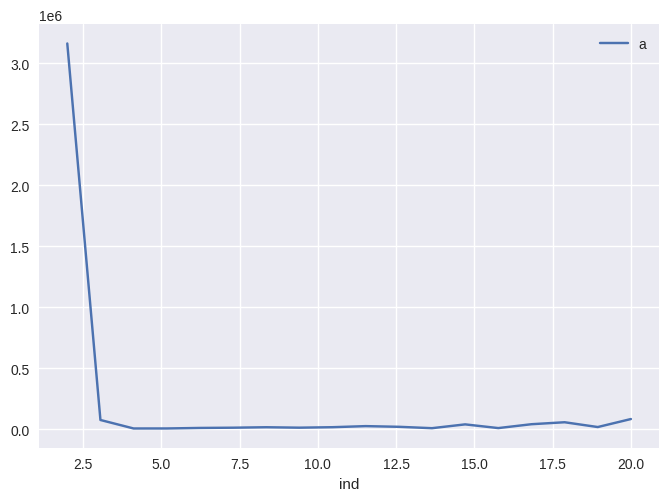

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

In [ ]:
df

file     SKEWt     KURTt  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.070549 -0.211764   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.100172 -0.194916   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.074244 -0.210081   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.097311 -0.201308   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.026994 -0.207726   
...                                                  ...       ...       ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.149347 -0.096841   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.119162 -0.205993   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso... -0.646677  2.498988   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso... -0.166340 -0.172413   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.118411  0.722730   

       ACTtFraction  ACTtCount     SKEWf  EPS_SKEW       ACI       rBA  \
0         -0.064844  -0.064844 -0.271830 -0.395867  0.533129 -0.153738   
1          0.058415   0.058415 -0.986871 -0.706752  0.533088 -0.172235   
2         -0.373443  -0.373443 -0.902187 -0.333524  0.325901 -0.168358   
3          0.284241   0.284241 -0.994661 -0.137181  0.807133 -0.169657   
4         -0.359948  -0.359948 -0.594237  0.085817 -0.078225 -0.144862   
...             ...        ...       ...       ...       ...       ...   
52086     -0.989742  -0.989742  0.267450 -0.357945 -0.153559 -0.143489   
52087      2.117841   2.117841 -0.178947  0.076378 -0.352250 -0.118488   
52088      2.041366   2.041366 -0.503996 -0.175929  0.674497 -0.173467   
52089      2.251897   2.251897 -0.375586 -0.890147  0.257029 -0.135499   
52090     -0.438672  -0.438672 -0.921763 -0.339255  0.246799 -0.167278   

       AnthroEnergy  BioEnergy        BI       ADI       AEI       LFC  \
0         -0.092716  -0.029981 -0.078429  0.432765 -0.572304  1.808989   
1         -0.028375  -0.062458 -0.755410  0.437488 -0.693327  1.407235   
2          0.008055  -0.038026  0.205239  0.437333 -0.685713  1.423638   
3          0.019508  -0.043108 -0.143523  0.435799 -0.628553  2.537205   
4          0.056639   0.139538  1.282420  0.405304 -0.377744  3.047846   
...             ...        ...       ...       ...       ...       ...   
52086     -0.149721  -0.069150  0.039089 -0.272662  0.971227 -0.765160   
52087     -0.150128  -0.066343  0.079444  0.419653 -0.442917 -0.662598   
52088      0.060244  -0.063466 -0.863735 -2.766426  2.452114 -0.099984   
52089     -0.149492  -0.067702 -0.148099 -0.250605  0.981936 -0.621098   
52090     -0.149420  -0.072480 -0.687009  0.433350 -0.581121 -0.718918   

       ACTspMean  hora    site  
0      -0.429312    15  RZUH04  
1      -0.539970    13  RZUH04  
2      -0.594588     4  RZUH04  
3      -0.048898    12  RZUH04  
4      -0.206897     0  RZUH04  
...          ...   ...     ...  
52086  -0.150504    20  RZUG09  
52087  -0.107443     2  RZUG09  
52088   1.316124     1  RZUG09  
52089   2.035873    19  RZUG09  
52090  -0.528768     6  RZUG09  

[52091 rows x 18 columns]

## Periods

In [ ]:
DFperiods

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571
...         ...        ...       ...       ...        ...       ...       ...
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318

[52091 rows x 7 columns]

In [ ]:
dfp

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1  
0        15  1949742.623  4957101.251  0.481383  
1        13  1949742.623  4957101.251  0.481383  
2         4  1949742.623  4957101.251  0.481383  
3        12  1949742.623  4957101.251  0.481383  
4         0  1949742.623  4957101.251  0.481383  
...     ...          ...          ...       ...  
52086    20  1947742.623  4956701.251  0.032421  
52087     2  1947742.623  4956701.251  0.032421  
52088     1  1947742.623  4956701.251  0.032421  
52089    19  1947742.623  4956701.251  0.032421  
52090     6  1947742.623  4956701.251  0.032421  

[52082 rows x 14 columns]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=3, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels



In [ ]:
dfp

file       EPS       BGNf  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.025347 -40.057560   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020651 -40.754314   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.031900 -38.471417   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.036750 -39.504981   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.104367 -28.099873   
...                                                  ...       ...        ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.030626 -48.961563   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042632 -41.139586   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.079335 -47.531303   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.057021 -38.127653   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

             Hf      NDSI        rBA       ADI       AEI    site     fecha  \
0      0.726545  0.742598   6.769961  2.077815  0.032237  RZUH04  20220907   
1      0.810312 -0.083457   0.845943  2.079384  0.005904  RZUH04  20220912   
2      0.782174  0.352287   2.087787  2.079333  0.007561  RZUH04  20220912   
3      0.813275  0.251428   1.671755  2.078823  0.019998  RZUH04  20220904   
4      0.710838  0.811552   9.613030  2.068692  0.074571  RZUH04  20220904   
...         ...       ...        ...       ...       ...     ...       ...   
52086  0.737399  0.819047  10.052567  1.843449  0.368089  RZUG09  20220909   
52087  0.621726  0.895068  18.059950  2.073459  0.060390  RZUG09  20220907   
52088  0.701923 -0.378107   0.451266  1.014936  0.690311  RZUG09  20220909   
52089  0.643072  0.853067  12.611658  1.850777  0.370420  RZUG09  20220909   
52090  0.864712  0.417542   2.433724  2.078010  0.030318  RZUG09  20220911   

       hora     YCOORD.y     XCOORD.y    SLAVI1  cluster  
0        15  1949742.623  4957101.251  0.481383        2  
1        13  1949742.623  4957101.251  0.481383        2  
2         4  1949742.623  4957101.251  0.481383        2  
3        12  1949742.623  4957101.251  0.481383        2  
4         0  1949742.623  4957101.251  0.481383        2  
...     ...          ...          ...       ...      ...  
52086    20  1947742.623  4956701.251  0.032421        2  
52087     2  1947742.623  4956701.251  0.032421        2  
52088     1  1947742.623  4956701.251  0.032421        2  
52089    19  1947742.623  4956701.251  0.032421        2  
52090     6  1947742.623  4956701.251  0.032421        2  

[52082 rows x 15 columns]

In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]

In [ ]:
df_cluster1

file       EPS       BGNf  \
41     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.065418 -29.822156   
44     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.055976 -20.343453   
58     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.072854 -29.423060   
62     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.085129 -29.905800   
84     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.120374 -31.001788   
...                                                  ...       ...        ...   
52018  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.058153 -35.942317   
52030  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.052393 -44.998831   
52048  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.122084 -44.635156   
52057  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.035857 -35.258814   
52064  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.105166 -42.738509   

             Hf      NDSI         rBA       ADI       AEI    site     fecha  \
41     0.712006  0.932670   28.704437  2.073844  0.056205  RZUH04  20220904   
44     0.395013  0.986727  149.679872  2.061711  0.104011  RZUH04  20220911   
58     0.605822  0.964291   55.007763  2.073621  0.054208  RZUH04  20220906   
62     0.560656  0.923823   25.254639  2.051778  0.129345  RZUH04  20220906   
84     0.555249  0.945680   35.819185  2.058390  0.109833  RZUH04  20220906   
...         ...       ...         ...       ...       ...     ...       ...   
52018  0.660458  0.966794   59.229875  1.494489  0.557853  RZUG09  20220907   
52030  0.650111  0.956952   45.459541  2.063806  0.095607  RZUG09  20220911   
52048  0.693866  0.954997   43.441119  1.552764  0.541683  RZUG09  20220907   
52057  0.601203  0.982726  114.778954  1.994053  0.210644  RZUG09  20220912   
52064  0.654311  0.932690   28.713248  1.863672  0.363096  RZUG09  20220913   

       hora     YCOORD.y     XCOORD.y    SLAVI1  cluster  
41       20  1949742.623  4957101.251  0.481383        0  
44       17  1949742.623  4957101.251  0.481383        0  
58       19  1949742.623  4957101.251  0.481383        0  
62       21  1949742.623  4957101.251  0.481383        0  
84       20  1949742.623  4957101.251  0.481383        0  
...     ...          ...          ...       ...      ...  
52018    19  1947742.623  4956701.251  0.032421        0  
52030    20  1947742.623  4956701.251  0.032421        0  
52048     1  1947742.623  4956701.251  0.032421        0  
52057    18  1947742.623  4956701.251  0.032421        0  
52064     3  1947742.623  4956701.251  0.032421        0  

[12488 rows x 15 columns]

In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')

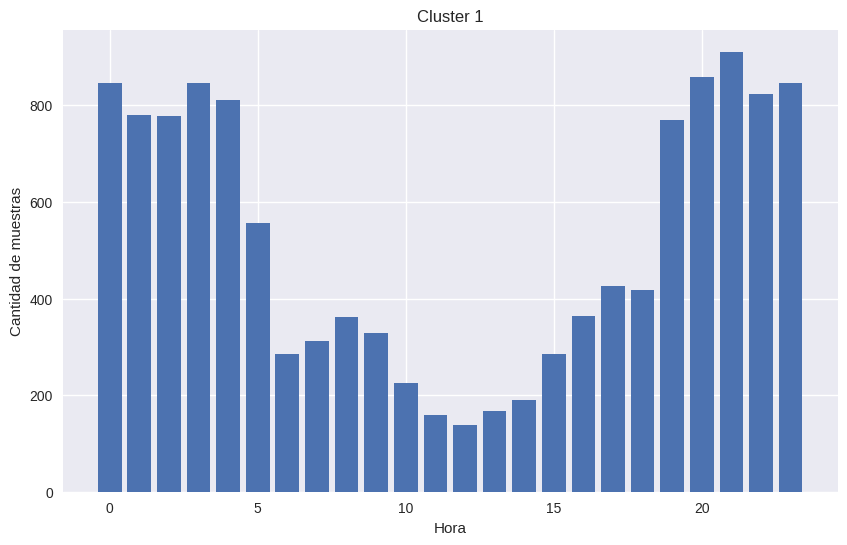

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

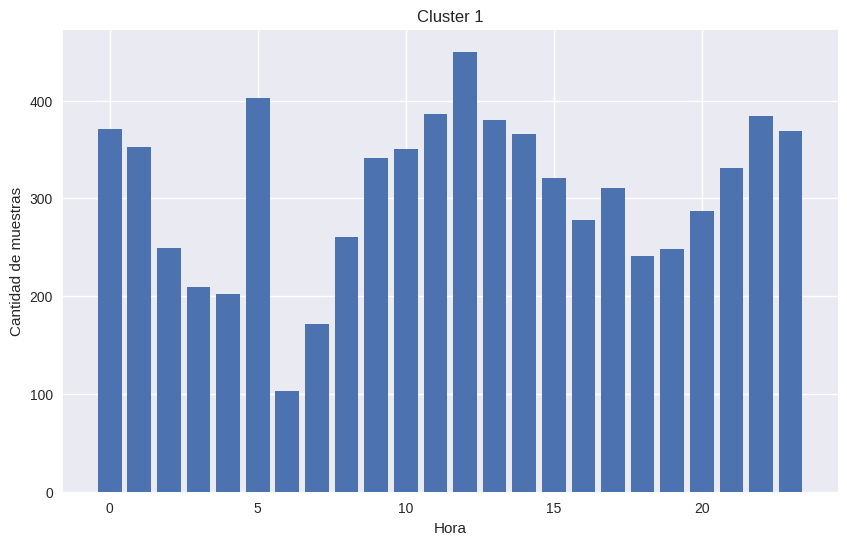

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

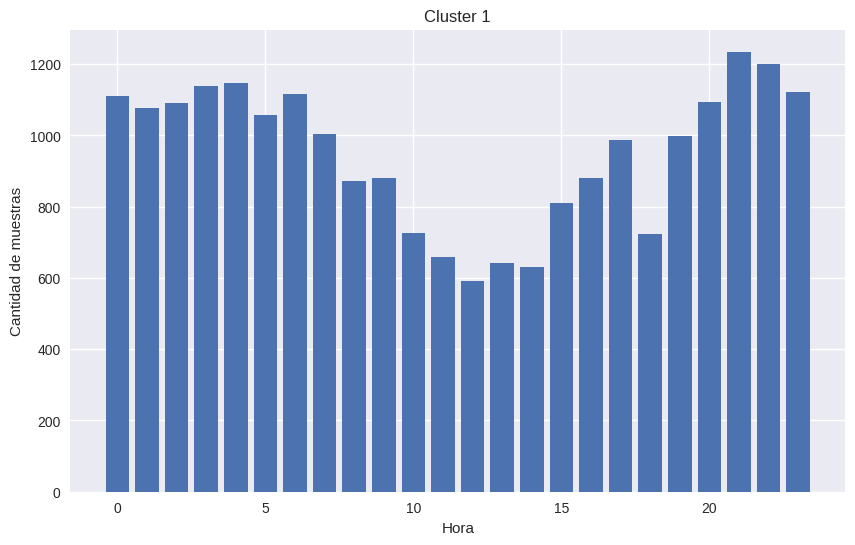

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

## OTROS INDICESS

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd ..

/


In [ ]:
!git clone https://github.com/Simon-Bertrand/Clusters-Features.git


Cloning into 'Clusters-Features'...
remote: Enumerating objects: 1150, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1150 (delta 44), reused 38 (delta 38), pack-reused 1104
Receiving objects: 100% (1150/1150), 24.47 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (720/720), done.


In [ ]:
cd Clusters-Features

/Clusters-Features


In [ ]:
pip  install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
from ClustersFeatures import *

In [ ]:
pwd

'/Clusters-Features'

In [ ]:
df

Unnamed: 0                                               file  \
0               0  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
1               1  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
2               2  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
3               3  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
4               4  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
...           ...                                                ...   
52086       52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52087       52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52088       52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52089       52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52090       52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...   

          SKEWt     KURTt  ACTtFraction  ACTtCount     SKEWf  EPS_SKEW  \
0      0.070549 -0.211764     -0.064844  -0.064844 -0.271830 -0.395867   
1      0.100172 -0.194916      0.058415   0.058415 -0.986871 -0.706752   
2      0.074244 -0.210081     -0.373443  -0.373443 -0.902187 -0.333524   
3      0.097311 -0.201308      0.284241   0.284241 -0.994661 -0.137181   
4      0.026994 -0.207726     -0.359948  -0.359948 -0.594237  0.085817   
...         ...       ...           ...        ...       ...       ...   
52086  0.149347 -0.096841     -0.989742  -0.989742  0.267450 -0.357945   
52087  0.119162 -0.205993      2.117841   2.117841 -0.178947  0.076378   
52088 -0.646677  2.498988      2.041366   2.041366 -0.503996 -0.175929   
52089 -0.166340 -0.172413      2.251897   2.251897 -0.375586 -0.890147   
52090  0.118411  0.722730     -0.438672  -0.438672 -0.921763 -0.339255   

            ACI       rBA  AnthroEnergy  BioEnergy        BI       ADI  \
0      0.533129 -0.153738     -0.092716  -0.029981 -0.078429  0.432765   
1      0.533088 -0.172235     -0.028375  -0.062458 -0.755410  0.437488   
2      0.325901 -0.168358      0.008055  -0.038026  0.205239  0.437333   
3      0.807133 -0.169657      0.019508  -0.043108 -0.143523  0.435799   
4     -0.078225 -0.144862      0.056639   0.139538  1.282420  0.405304   
...         ...       ...           ...        ...       ...       ...   
52086 -0.153559 -0.143489     -0.149721  -0.069150  0.039089 -0.272662   
52087 -0.352250 -0.118488     -0.150128  -0.066343  0.079444  0.419653   
52088  0.674497 -0.173467      0.060244  -0.063466 -0.863735 -2.766426   
52089  0.257029 -0.135499     -0.149492  -0.067702 -0.148099 -0.250605   
52090  0.246799 -0.167278     -0.149420  -0.072480 -0.687009  0.433350   

            AEI       LFC  ACTspMean  hora    site  
0     -0.572304  1.808989  -0.429312    15  RZUH04  
1     -0.693327  1.407235  -0.539970    13  RZUH04  
2     -0.685713  1.423638  -0.594588     4  RZUH04  
3     -0.628553  2.537205  -0.048898    12  RZUH04  
4     -0.377744  3.047846  -0.206897     0  RZUH04  
...         ...       ...        ...   ...     ...  
52086  0.971227 -0.765160  -0.150504    20  RZUG09  
52087 -0.442917 -0.662598  -0.107443     2  RZUG09  
52088  2.452114 -0.099984   1.316124     1  RZUG09  
52089  0.981936 -0.621098   2.035873    19  RZUG09  
52090 -0.581121 -0.718918  -0.528768     6  RZUG09  

[52091 rows x 19 columns]

In [ ]:
df

Unnamed: 0                                               file  \
0               0  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
1               1  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
2               2  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
3               3  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
4               4  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
...           ...                                                ...   
52086       52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52087       52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52088       52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52089       52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...   
52090       52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...   

          SKEWt     KURTt  ACTtFraction  ACTtCount     SKEWf  EPS_SKEW  \
0      0.070549 -0.211764     -0.064844  -0.064844 -0.271830 -0.395867   
1      0.100172 -0.194916      0.058415   0.058415 -0.986871 -0.706752   
2      0.074244 -0.210081     -0.373443  -0.373443 -0.902187 -0.333524   
3      0.097311 -0.201308      0.284241   0.284241 -0.994661 -0.137181   
4      0.026994 -0.207726     -0.359948  -0.359948 -0.594237  0.085817   
...         ...       ...           ...        ...       ...       ...   
52086  0.149347 -0.096841     -0.989742  -0.989742  0.267450 -0.357945   
52087  0.119162 -0.205993      2.117841   2.117841 -0.178947  0.076378   
52088 -0.646677  2.498988      2.041366   2.041366 -0.503996 -0.175929   
52089 -0.166340 -0.172413      2.251897   2.251897 -0.375586 -0.890147   
52090  0.118411  0.722730     -0.438672  -0.438672 -0.921763 -0.339255   

            ACI       rBA  AnthroEnergy  BioEnergy        BI       ADI  \
0      0.533129 -0.153738     -0.092716  -0.029981 -0.078429  0.432765   
1      0.533088 -0.172235     -0.028375  -0.062458 -0.755410  0.437488   
2      0.325901 -0.168358      0.008055  -0.038026  0.205239  0.437333   
3      0.807133 -0.169657      0.019508  -0.043108 -0.143523  0.435799   
4     -0.078225 -0.144862      0.056639   0.139538  1.282420  0.405304   
...         ...       ...           ...        ...       ...       ...   
52086 -0.153559 -0.143489     -0.149721  -0.069150  0.039089 -0.272662   
52087 -0.352250 -0.118488     -0.150128  -0.066343  0.079444  0.419653   
52088  0.674497 -0.173467      0.060244  -0.063466 -0.863735 -2.766426   
52089  0.257029 -0.135499     -0.149492  -0.067702 -0.148099 -0.250605   
52090  0.246799 -0.167278     -0.149420  -0.072480 -0.687009  0.433350   

            AEI       LFC  ACTspMean  hora    site  
0     -0.572304  1.808989  -0.429312    15  RZUH04  
1     -0.693327  1.407235  -0.539970    13  RZUH04  
2     -0.685713  1.423638  -0.594588     4  RZUH04  
3     -0.628553  2.537205  -0.048898    12  RZUH04  
4     -0.377744  3.047846  -0.206897     0  RZUH04  
...         ...       ...        ...   ...     ...  
52086  0.971227 -0.765160  -0.150504    20  RZUG09  
52087 -0.442917 -0.662598  -0.107443     2  RZUG09  
52088  2.452114 -0.099984   1.316124     1  RZUG09  
52089  0.981936 -0.621098   2.035873    19  RZUG09  
52090 -0.581121 -0.718918  -0.528768     6  RZUG09  

[52088 rows x 19 columns]

In [ ]:
cpred=[]
admis=[]

ncreal=[]
ncpred_slope=[]
ncpred_min=[]
sil=[]
silluette=[]
bh=[]
rtl=[]
sd=[]
db=[]
xb=[]
ch=[]
dnn=[]
mr=[]
pb=[]
rt=[]
wg=[]
dr=[]
c=[]
kgmm=20

varuncer=[]
separation=[]
sil=[]
g1=[]
g2=[]
g3=[]
g4=[]
g5=[]

g6=[]
g7=[]
g8=[]
g9=[]
g10=[]
g11=[]
g12=[]
g13=[]

X_train11=df.iloc[:,2:16].sample(n=6000, random_state=42)
for l in range(2,kgmm):
  rand=1

  #unce, sep,pred=uncertainity_mean(X_train11,n_components=l)
  GM = GaussianMixture(n_components=l, random_state=rand, covariance_type="full").fit(X_train11)
  pred=GM.predict(X_train11)
  sil.append(metrics.silhouette_score(X_train11, pred, metric='euclidean'))
  X_train11["target"]=pred

  CC=ClustersCharacteristics(X_train11, label_target="target")
  g1.append(CC.score_index_ball_hall())
  g2.append(CC.score_index_ratkowsky_lance())
  g3.append(CC.score_index_SD())
  g5.append(CC.score_index_xie_beni())
  g6.append(CC.score_index_calinski_harabasz())
  g7.append(CC.score_index_dunn())
  g8.append(CC.score_index_mclain_rao())
  g9.append(CC.score_index_point_biserial())
  g10.append(CC.score_index_ray_turi())
  g11.append(CC.score_index_wemmert_gancarski())
  g13.append(CC.score_index_c())

  try:
      g4.append(CC.score_index_davies_bouldin())
  except:
      print("An exception occurred")
      g4.append(0)


silluette.append(np.array(sil).argmax()+2)
bh.append(np.diff(np.array(g1)).argmax()+2)
rtl.append(np.array(g2).argmax()+2)
sd.append(np.array(g3).argmin()+2)
#db.append(np.array(g4).argmin()+2)
xb.append(np.array(g5).argmin()+2)
#ch.append(np.array(g6).argmax()+2)
#dnn.append(np.array(g7).argmax()+2)
mr.append(np.array(g8).argmin()+2)
wg.append(np.array(g11).argmax()+2)
pb.append(np.array(g9).argmax()+2)
#rt.append(np.array(g10).argmin()+2)
#c.append(np.array(g13).argmin()+2)

ncrecomended=[silluette,bh,rtl,sd,xb,mr,wg,pb]
adm=[]

print(ncrecomended)
cpred.append(ncrecomended)

IndexError: ignored

In [ ]:
CC=ClustersCharacteristics(X_train11, label_target="target")

IndexError: ignored

## Agregacion

In [ ]:
grab_5_8=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_5_8.csv")
grab_8_17=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_8_17.csv")
grab_17_5=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_17_5.csv")

In [ ]:
grab_5_8

file       EPS       BGNf  \
0     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.076196 -39.157774   
1     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.047774 -38.799811   
2     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.021135 -40.784344   
3     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.093793 -36.656186   
4     //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.042805 -41.142693   
...                                                 ...       ...        ...   
6483  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.018332 -51.402470   
6484  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.018906 -51.221470   
6485  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.044751 -39.722672   
6486  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.037348 -51.356045   
6487  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.020140 -51.417252   

            Hf      NDSI       rBA       ADI       AEI    site     fecha  \
0     0.797604  0.633115  4.451298  2.063625  0.099010  RZUH04  20220907   
1     0.796751  0.140633  1.327293  2.078742  0.019793  RZUH04  20220911   
2     0.814231  0.157531  1.373976  2.079410  0.004346  RZUH04  20220906   
3     0.781258  0.161270  1.384557  2.079396  0.005306  RZUH04  20220904   
4     0.817253  0.131122  1.301819  2.079387  0.005949  RZUH04  20220905   
...        ...       ...       ...       ...       ...     ...       ...   
6483  0.857505  0.212072  1.538303  2.079168  0.013238  RZUG09  20220911   
6484  0.872540  0.485317  2.885889  2.079438  0.001588  RZUG09  20220911   
6485  0.732885 -0.707792  0.171103  2.079199  0.012390  RZUG09  20220906   
6486  0.716655  0.106950  1.239515  2.014955  0.203340  RZUG09  20220907   
6487  0.864712  0.417542  2.433724  2.078010  0.030318  RZUG09  20220911   

      hora     YCOORD.y     XCOORD.y    SLAVI1  
0        5  1949742.623  4957101.251  0.481383  
1        7  1949742.623  4957101.251  0.481383  
2        6  1949742.623  4957101.251  0.481383  
3        5  1949742.623  4957101.251  0.481383  
4        6  1949742.623  4957101.251  0.481383  
...    ...          ...          ...       ...  
6483     5  1947742.623  4956701.251  0.032421  
6484     7  1947742.623  4956701.251  0.032421  
6485     7  1947742.623  4956701.251  0.032421  
6486     6  1947742.623  4956701.251  0.032421  
6487     6  1947742.623  4956701.251  0.032421  

[6488 rows x 14 columns]

In [ ]:
df_agregado = grab_5_8.iloc[:,1:].groupby('site').median()
# Resetear el índice para obtener una columna 'lugar' en el dataframe resultante
df_agregado = df_agregado.reset_index()
# Mostrar el dataframe resultante
df_agregado.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_5_8meansites.csv")

In [ ]:
df_agregado = grab_8_17.iloc[:,1:].groupby('site').median()
# Resetear el índice para obtener una columna 'lugar' en el dataframe resultante
df_agregado = df_agregado.reset_index()
# Mostrar el dataframe resultante
df_agregado.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_8_17meansites.csv")

In [ ]:
df_agregado = grab_17_5.iloc[:,1:].groupby('site').median()
# Resetear el índice para obtener una columna 'lugar' en el dataframe resultante
df_agregado = df_agregado.reset_index()
# Mostrar el dataframe resultante
df_agregado.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_17_5meansites.csv")

### 3ntropia

In [ ]:
from scipy.stats import entropy
agregacion_entropia = grab_5_8.groupby('site').agg(lambda x: np.nan if x.isnull().all() else entropy(x.dropna()))

# Eliminar filas que contienen valores nulos
agregacion_entropia = agregacion_entropia.dropna()

# Ordenar los resultados por entropía en orden descendente
agregacion_entropia = agregacion_entropia.sort_values(by='site', ascending=False)

agregacion_entropia.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_5_8entropysites.csv")

In [ ]:
agregacion_entropia = grab_8_17.groupby('site').agg(lambda x: np.nan if x.isnull().all() else entropy(x.dropna()))

# Eliminar filas que contienen valores nulos
agregacion_entropia = agregacion_entropia.dropna()

# Ordenar los resultados por entropía en orden descendente
agregacion_entropia = agregacion_entropia.sort_values(by='site', ascending=False)

agregacion_entropia.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_8_17entropysites.csv")

In [ ]:
agregacion_entropia = grab_17_5.groupby('site').agg(lambda x: np.nan if x.isnull().all() else entropy(x.dropna()))

# Eliminar filas que contienen valores nulos
agregacion_entropia = agregacion_entropia.dropna()

# Ordenar los resultados por entropía en orden descendente
agregacion_entropia = agregacion_entropia.sort_values(by='site', ascending=False)

agregacion_entropia.to_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_17_5entropysites.csv")

# UF y Clustering en sitios

In [ ]:
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
from numpy import linalg as LA
from scipy.spatial import distance
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from copy import deepcopy
from matplotlib.pyplot import figure

In [ ]:
def uncertainity_mean(X_train1,pred,means,covariances,weights,km,numberofdimens):
  X_train1["pred"]=pred
  meanss=means
  weiths=weights
  variances=[]
  covariancematrix=covariances
  for i in covariancematrix: #The diagonal of cov is the variance of each gmm
    diag=np.diag(i)
    variances.append(diag)
  variances=np.array(variances)
  countiterations=0
  unc=[]
  un=[]

  sep=[]
  for g in range(0,len(meanss)):  ##Frechet distance
    for t in range(0,len(meanss)):
      if (t==g):
        continue
      else:
        sep.append(frechetDistance(meanss[t],meanss[g],covariancematrix[t],covariancematrix[g]))
  separation=np.array(sep)
  Dmin=np.array(separation).min()
  Dmax=np.array(separation).max()
  Sep=(Dmax/Dmin)*(1/separation.sum())

  for i in range(0,len(meanss)):  #Uncertainty  ##i run each cluster
    cweight=weiths[i]
    cmean=meanss[i]
    cvar=variances[i]
    lim_inf=cmean-(km*cvar)
    lim_sup=cmean+(km*cvar)
    unc=[]
    o=X_train1[X_train1["pred"]==i].iloc[:,:numberofdimens].copy()

    for j in range(len(o)): # j run each data
      DM=distance.mahalanobis(np.array(o.iloc[j]), cmean, np.linalg.inv(covariancematrix[i]))
      varbool=(DM>=km)
      varunc=[]
      #print("varbool",varbool)
      if (varbool):
        varunc.append(2*km*DM)
      else:
        vs=((DM**2)+(km*DM)+(km**2)/2)
        varunc.append(vs)
    un.append(np.array(varunc))
  return np.sum(un)/Sep

In [ ]:
def merguncertain (xtrain,y,Means,covariances,weights,numberofdimens):
  X_train11=xtrain
  X_train11["pred"]=y
  UNIndex=[]
  len(Means)
  Pairwise=np.ones((len(Means), len(Means)))
  labels=[]
  for i in range(len(Means)):
    labels.append(i)
    for j in range(len(Means)):
        if (i==j):
          continue
        Pairwise[j,i]=(frechetDistance(Means[i],Means[j],covariances[i],covariances[j]))

  while len(Pairwise) > 2 :
      UNIndex.append(uncertainity_mean(X_train11.iloc[:,:numberofdimens],X_train11["pred"],Means,covariances,weights,1,numberofdimens))

      Similar_clusters=np.unravel_index(Pairwise.argmin(),Pairwise.shape)
      Similar_clusters_labels=( labels[Similar_clusters[0]],labels[Similar_clusters[1]])

      #update Mean
      data_size_1=len(X_train11[X_train11["pred"]==Similar_clusters_labels[0]])
      data_size_2=len(X_train11[X_train11["pred"]==Similar_clusters_labels[1]])
      mean_1=Means[Similar_clusters[0]]
      mean_2=Means[Similar_clusters[1]]
      new_mean = (data_size_1* mean_1 + data_size_2*mean_2)/(data_size_1 + data_size_2)
      Means[Similar_clusters[0]]=new_mean

      #Update labels
      X_train11["pred"]=X_train11["pred"].replace(Similar_clusters_labels[1], Similar_clusters_labels[0])
      #print(X_train11["pred"].unique())
      NewCovariance=X_train11[X_train11["pred"]==Similar_clusters_labels[0]].iloc[:,:numberofdimens].cov()
      covariances[Similar_clusters[0]]=NewCovariance
      weights[Similar_clusters[0]]=weights[Similar_clusters[0]]+weights[Similar_clusters[1]]

      updpairwisecolum=[]
      for j in range(0,len(Means)):
          updpairwisecolum.append((frechetDistance(Means[Similar_clusters[0]],Means[j],covariances[Similar_clusters[0]],covariances[j])))
      #print(updpairwisecolum)
      Pairwise[:,Similar_clusters[0]]=updpairwisecolum
      Pairwise[Similar_clusters[0],:]=updpairwisecolum

      Means= np.delete(Means, (Similar_clusters[1]), axis=0)
      weights= np.delete(weights, (Similar_clusters[1]), axis=0)
      covariances=np.delete(covariances, (Similar_clusters[1]), axis=0)
      labels.remove(Similar_clusters_labels[1])
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=0)
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=1)
      np.fill_diagonal(Pairwise, 1)
  return UNIndex

In [ ]:
def frechetDistance(u1,u2,E1,E2):
  return (LA.norm(np.absolute(u1-u2)**2))+np.trace(E1+E2-(2*(E1*E2)**(0.5)))


In [ ]:
def uncertainity_mean(X_train1,pred,means,covariances,weights,km,numberofdimens):
  X_train1["pred"]=pred
  meanss=means
  weiths=weights
  variances=[]
  covariancematrix=covariances
  for i in covariancematrix: #The diagonal of cov is the variance of each gmm
    diag=np.diag(i)
    variances.append(diag)
  variances=np.array(variances)
  countiterations=0
  unc=[]
  un=[]

  sep=[]
  for g in range(0,len(meanss)):  ##Frechet distance
    for t in range(0,len(meanss)):
      if (t==g):
        continue
      else:
        sep.append(frechetDistance(meanss[t],meanss[g],covariancematrix[t],covariancematrix[g]))
  separation=np.array(sep)
  Dmin=np.array(separation).min()
  Dmax=np.array(separation).max()
  Sep=(Dmax/Dmin)*(1/separation.sum())

  for i in range(0,len(meanss)):  #Uncertainty  ##i run each cluster
    cweight=weiths[i]
    cmean=meanss[i]
    cvar=variances[i]
    lim_inf=cmean-(km*cvar)
    lim_sup=cmean+(km*cvar)
    unc=[]
    o=X_train1[X_train1["pred"]==i].iloc[:,:numberofdimens].copy()

    for j in range(len(o)): # j run each data
      DM=distance.mahalanobis(np.array(o.iloc[j]), cmean, np.linalg.inv(covariancematrix[i]))
      varbool=(DM>=km)
      varunc=[]
      #print("varbool",varbool)
      if (varbool):
        varunc.append(2*km*DM)
      else:
        vs=((DM**2)+(km*DM)+(km**2)/2)
        varunc.append(vs)
    un.append(np.array(varunc))
  return np.sum(un)/Sep


def merguncertain (xtrain,y,Means,covariances,weights,numberofdimens):
  X_train11=xtrain
  X_train11["pred"]=y
  UNIndex=[]
  len(Means)
  Pairwise=np.ones((len(Means), len(Means)))
  labels=[]
  for i in range(len(Means)):
    labels.append(i)
    for j in range(len(Means)):
        if (i==j):
          continue
        Pairwise[j,i]=(frechetDistance(Means[i],Means[j],covariances[i],covariances[j]))


  while len(Pairwise) > 2 :
      UNIndex.append(uncertainity_mean(X_train11.iloc[:,:numberofdimens],X_train11["pred"],Means,covariances,weights,1,numberofdimens))

      Similar_clusters=np.unravel_index(Pairwise.argmin(),Pairwise.shape)
      Similar_clusters_labels=( labels[Similar_clusters[0]],labels[Similar_clusters[1]])

      data_size_1=len(X_train11[X_train11["pred"]==Similar_clusters_labels[0]])
      data_size_2=len(X_train11[X_train11["pred"]==Similar_clusters_labels[1]])
      mean_1=Means[Similar_clusters[0]]
      mean_2=Means[Similar_clusters[1]]
      new_mean = (data_size_1* mean_1 + data_size_2*mean_2)/(data_size_1 + data_size_2)
      Means[Similar_clusters[0]]=new_mean

      X_train11["pred"]=X_train11["pred"].replace(Similar_clusters_labels[1], Similar_clusters_labels[0])
      #print(X_train11["pred"].unique())
      NewCovariance=X_train11[X_train11["pred"]==Similar_clusters_labels[0]].iloc[:,:numberofdimens].cov()
      covariances[Similar_clusters[0]]=NewCovariance
      weights[Similar_clusters[0]]=weights[Similar_clusters[0]]+weights[Similar_clusters[1]]

      updpairwisecolum=[]
      for j in range(0,len(Means)):
          updpairwisecolum.append((frechetDistance(Means[Similar_clusters[0]],Means[j],covariances[Similar_clusters[0]],covariances[j])))
      #print(updpairwisecolum)
      Pairwise[:,Similar_clusters[0]]=updpairwisecolum
      Pairwise[Similar_clusters[0],:]=updpairwisecolum

      Means= np.delete(Means, (Similar_clusters[1]), axis=0)
      weights= np.delete(weights, (Similar_clusters[1]), axis=0)
      covariances=np.delete(covariances, (Similar_clusters[1]), axis=0)
      labels.remove(Similar_clusters_labels[1])
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=0)
      Pairwise= np.delete(Pairwise, (Similar_clusters[1]), axis=1)
      np.fill_diagonal(Pairwise, 1)
  return UNIndex

def frechetDistance(u1,u2,E1,E2):
  return (LA.norm(np.absolute(u1-u2)**2))+np.trace(E1+E2-(2*(E1*E2)**(0.5)))

def genData(n_samples,n_featuress, n_components,cl_std,randomstate):
  X, y_true = make_blobs(
        n_samples, n_features, centers=n_components, cluster_std=cl_std, random_state=randomstate
    )
  X = X[:, ::-1]
  dataFrame=pd.DataFrame(X)
  dataFrame["y"]=y_true
  return dataFrame

def UW_index(X,lim):
  cpred=[]
  admis=[]

  dataFrame= pd.DataFrame(X).round(4)
  dim=dataFrame.shape[1]
  kgmm=lim

  X_train111=dataFrame
  GM = GaussianMixture(n_components=kgmm, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  y=X_train111["pred"]

  index=merguncertain (dataFrame,y,Means,covariances,weights,dim)
  index.reverse()
  change=pd.DataFrame(index,columns=["a"])
  recomended=change["a"].argmin()+2
  print('number of recommended clusters',recomended)
  return recomended


## All the periods mean

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado.csv')

In [ ]:
df_agregado = df.iloc[:,1:].groupby('site').median()
# Resetear el índice para obtener una columna 'lugar' en el dataframe resultante
df_agregado = df_agregado.reset_index()
# Mostrar el dataframe resultante


In [ ]:
df_agregado

site       EPS       BGNf        Hf      NDSI        rBA       ADI  \
0    RZUA01  0.059852 -40.981600  0.685051  0.860387  13.325362  2.078581   
1    RZUA02  0.029937 -50.702227  0.781285  0.355152   2.101800  2.079115   
2   RZUA03a  0.022219 -35.134349  0.777714  0.288152   1.809588  2.077133   
3   RZUA03b  0.050461 -33.436352  0.760843  0.774186   7.856887  2.047844   
4    RZUA04  0.015040 -45.102790  0.749793  0.188624   1.464947  2.076644   
..      ...       ...        ...       ...       ...        ...       ...   
91   RZUH09  0.044738 -37.740521  0.710368  0.924978  25.658802  2.065958   
92   RZUH10  0.059937 -46.374092  0.712973  0.706383   5.811607  2.073579   
93   RZUH11  0.050190 -33.368819  0.773104  0.535485   3.305589  2.047469   
94   RZUH12  0.051028 -40.095325  0.716840 -0.063968   0.879756  2.065090   
95   RZUH13  0.014551 -50.050742  0.815904 -0.245535   0.605736  2.079083   

         AEI       fecha  hora     YCOORD.y     XCOORD.y    SLAVI1  
0   0.022630  20220908.0  11.0  1950942.625  4954301.250  0.634330  
1   0.014463  20220907.0  11.0  1950542.624  4954301.249  0.590880  
2   0.038356  20220903.0  10.0          NaN          NaN       NaN  
3   0.139374  20220911.0  12.0  1950142.624  4954301.247  0.370052  
4   0.040968  20220908.0  12.0  1949742.624  4954301.246  0.179750  
..       ...         ...   ...          ...          ...       ...  
91  0.088051  20220908.0  11.0  1947742.623  4957101.251  0.636108  
92  0.057597  20220908.0  11.0  1947342.623  4957101.251  0.134615  
93  0.139961  20220908.0  10.0  1946942.623  4957101.251  0.247195  
94  0.091367  20220907.0  12.0  1946542.623  4957101.251  0.262742  
95  0.014670  20220908.0  10.0  1946142.623  4957101.251  0.277975  

[96 rows x 13 columns]

In [ ]:
DFperiods=df_agregado.iloc[:,1:8]
DFperiods

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0   0.059852 -40.981600  0.685051  0.860387  13.325362  2.078581  0.022630
1   0.029937 -50.702227  0.781285  0.355152   2.101800  2.079115  0.014463
2   0.022219 -35.134349  0.777714  0.288152   1.809588  2.077133  0.038356
3   0.050461 -33.436352  0.760843  0.774186   7.856887  2.047844  0.139374
4   0.015040 -45.102790  0.749793  0.188624   1.464947  2.076644  0.040968
..       ...        ...       ...       ...        ...       ...       ...
91  0.044738 -37.740521  0.710368  0.924978  25.658802  2.065958  0.088051
92  0.059937 -46.374092  0.712973  0.706383   5.811607  2.073579  0.057597
93  0.050190 -33.368819  0.773104  0.535485   3.305589  2.047469  0.139961
94  0.051028 -40.095325  0.716840 -0.063968   0.879756  2.065090  0.091367
95  0.014551 -50.050742  0.815904 -0.245535   0.605736  2.079083  0.014670

[96 rows x 7 columns]

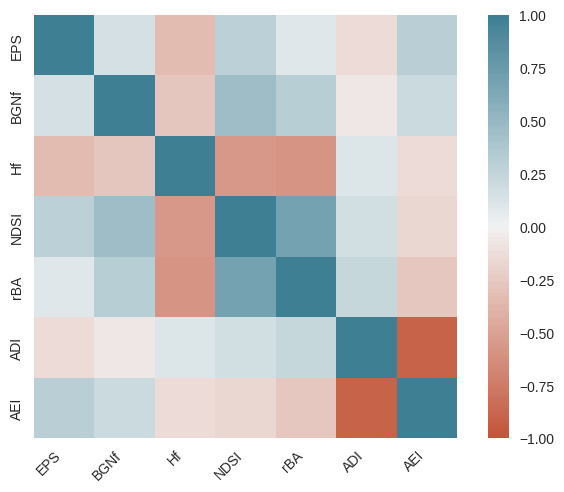

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 15)

number of recommended clusters 14


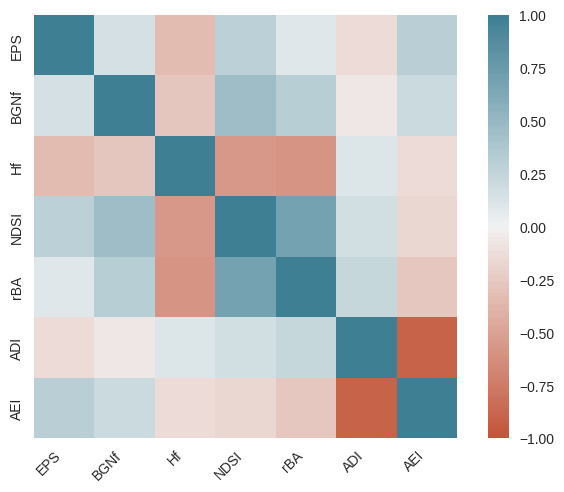

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Only With the index

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,50):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

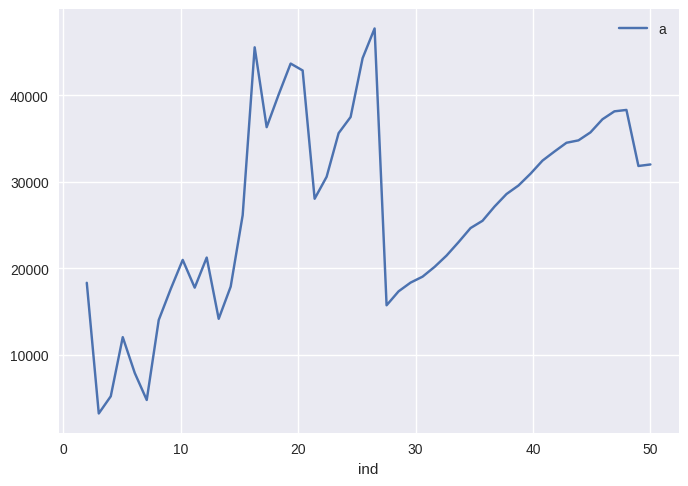

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,10):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

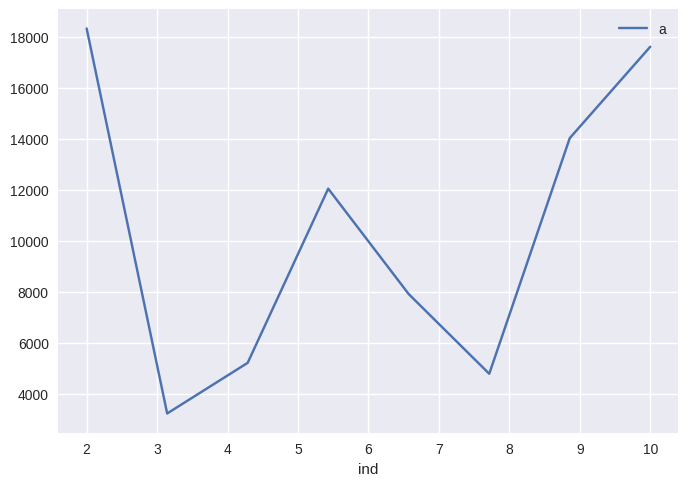

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

### OTROS INDICESS

In [ ]:
ls

drive/  sample_data/


In [ ]:
!git clone https://github.com/Simon-Bertrand/Clusters-Features.git


Cloning into 'Clusters-Features'...
remote: Enumerating objects: 1150, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1150 (delta 44), reused 38 (delta 38), pack-reused 1104
Receiving objects: 100% (1150/1150), 24.47 MiB | 6.72 MiB/s, done.
Resolving deltas: 100% (720/720), done.


In [ ]:
cd Clusters-Features

/content/Clusters-Features


In [ ]:
pip  install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.4 MB/s eta 0:00:00


In [ ]:

from ClustersFeatures import *

In [ ]:
cpred=[]
admis=[]

ncreal=[]
ncpred_slope=[]
ncpred_min=[]
sil=[]
silluette=[]
bh=[]
rtl=[]
sd=[]
db=[]
xb=[]
ch=[]
dnn=[]
mr=[]
pb=[]
rt=[]
wg=[]
dr=[]
c=[]
kgmm=50

varuncer=[]
separation=[]
sil=[]
g1=[]
g2=[]
g3=[]
g4=[]
g5=[]

g6=[]
g7=[]
g8=[]
g9=[]
g10=[]
g11=[]
g12=[]
g13=[]

X_train11=DFperiods.copy()
for l in range(2,kgmm):
  rand=1

  #unce, sep,pred=uncertainity_mean(X_train11,n_components=l)
  GM = GaussianMixture(n_components=l, random_state=rand, covariance_type="full").fit(X_train11)
  pred=GM.predict(X_train11)
  sil.append(metrics.silhouette_score(X_train11, pred, metric='euclidean'))
  X_train11["target"]=pred

  CC=ClustersCharacteristics(X_train11, label_target="target")
  g1.append(CC.score_index_ball_hall())
  g2.append(CC.score_index_ratkowsky_lance())
  g3.append(CC.score_index_SD())
  g5.append(CC.score_index_xie_beni())
  g6.append(CC.score_index_calinski_harabasz())
  g7.append(CC.score_index_dunn())
  g8.append(CC.score_index_mclain_rao())
  g9.append(CC.score_index_point_biserial())
  g10.append(CC.score_index_ray_turi())
  g11.append(CC.score_index_wemmert_gancarski())
  g13.append(CC.score_index_c())

  try:
      g4.append(CC.score_index_davies_bouldin())
  except:
      print("An exception occurred")
      g4.append(0)


silluette.append(np.array(sil).argmax()+2)
bh.append(np.diff(np.array(g1)).argmax()+2)
rtl.append(np.array(g2).argmax()+2)
sd.append(np.array(g3).argmin()+2)
db.append(np.array(g4).argmin()+2)
xb.append(np.array(g5).argmin()+2)
ch.append(np.array(g6).argmax()+2)
dnn.append(np.array(g7).argmax()+2)
mr.append(np.array(g8).argmin()+2)
wg.append(np.array(g11).argmax()+2)
pb.append(np.array(g9).argmax()+2)
rt.append(np.array(g10).argmin()+2)
c.append(np.array(g13).argmin()+2)

ncrecomended=[silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, rt, c]

adm=[]

print(ncrecomended)
cpred.append(ncrecomended)
print("silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, r, c")

[[48], [10], [49], [96], [49], [42], [49], [40], [49], [2], [49], [2], [49]]
silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, r, c


# Load the data

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [95]:
grab_17_20=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_17_20.csv")
grab_20_5=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_20_5.csv")
grab_5_8=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_5_8.csv")
grab_8_17=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_8_17.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Separated periods

In [ ]:
ls /content/drive/MyDrive/Doctorado/2023/Agosto/

'Agoust Interpretability of Acoustic indices clustering.gslides'
 aves/
 buffer.csv
 BUFFERSQGIS/
 capaszamurocliped/
 CorrelationAIvsEcologicallayers_5_8.csv
 CorrelationAIvsEcologicallayers_8_17.csv
'Daniel Nieto'/
 EspeciesMurcielagosVictor/
'Espectrogramas promedio'/
 grab_17_20.csv
 grab_20_5.csv
 grab_5_8.csv
 grab_8_17.csv
 Interpolationlayers/
 Resultados_clusteringMembership/
 rowACINDvsECologicallayerrelationship_8_17.csv


<ipython-input-3-b38d80ea8dca>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)


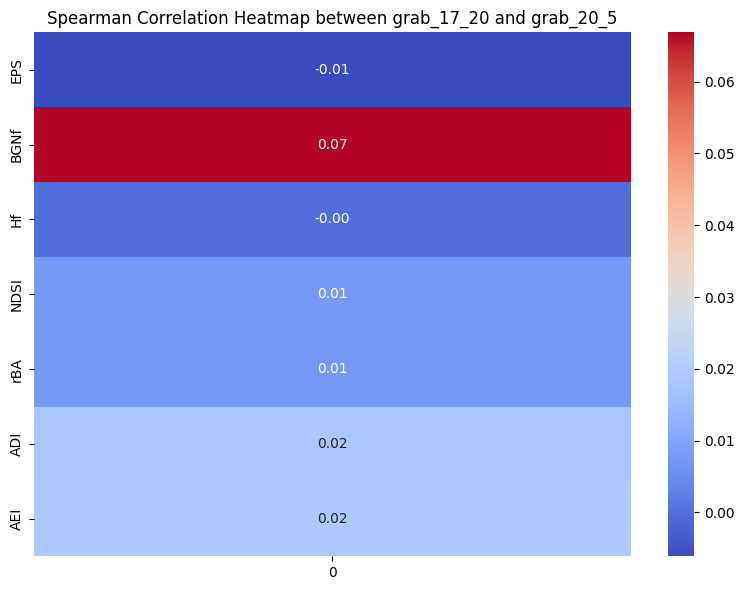

<ipython-input-3-b38d80ea8dca>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)


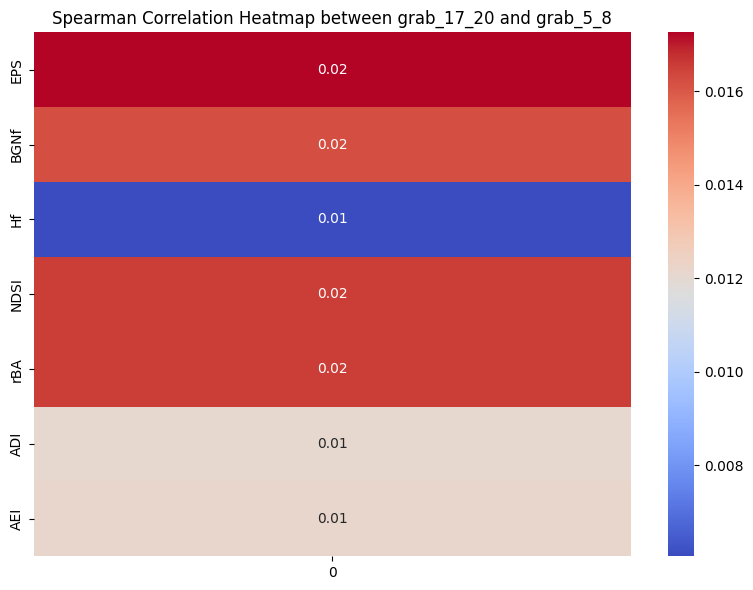

<ipython-input-3-b38d80ea8dca>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)


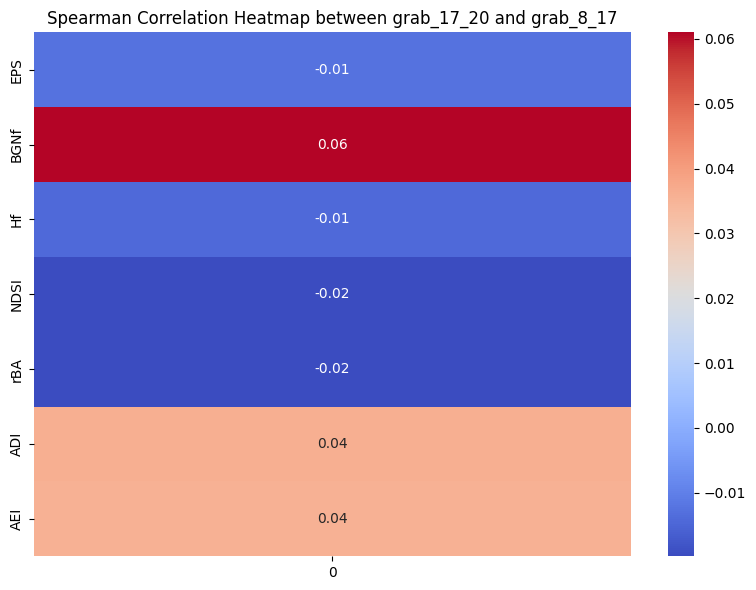

<ipython-input-3-b38d80ea8dca>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)


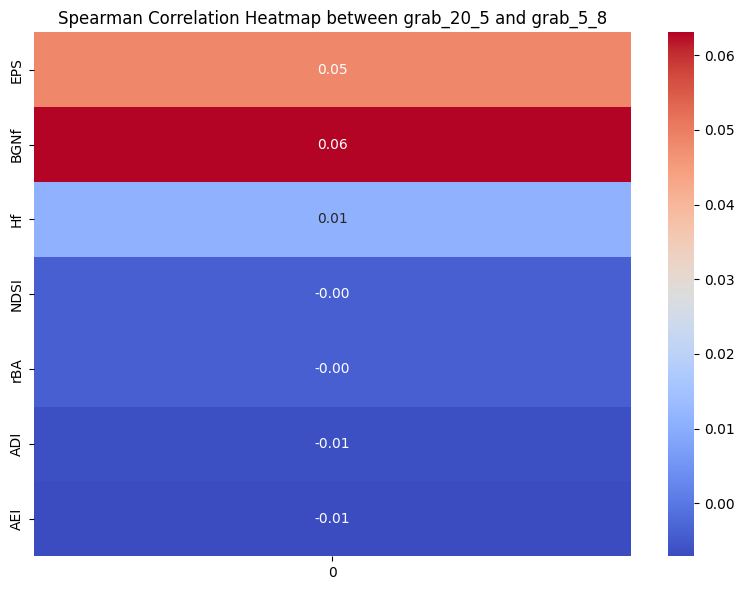

<ipython-input-3-b38d80ea8dca>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)


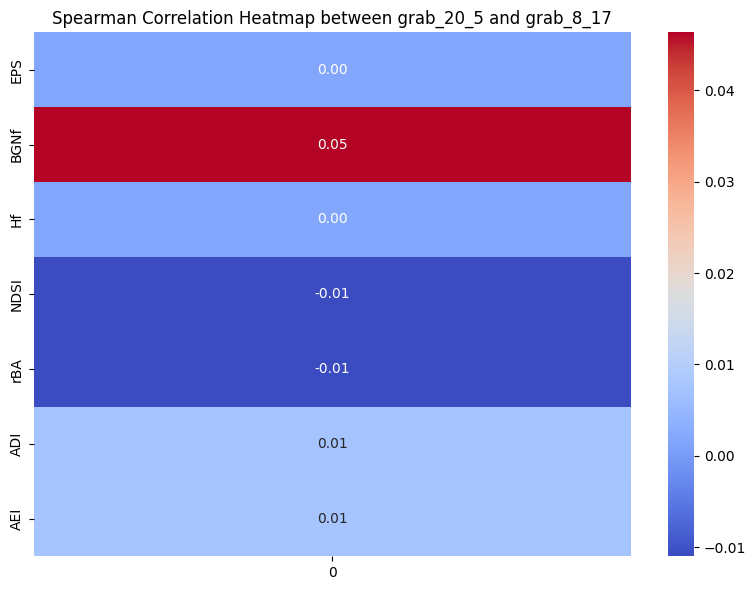

<ipython-input-3-b38d80ea8dca>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)


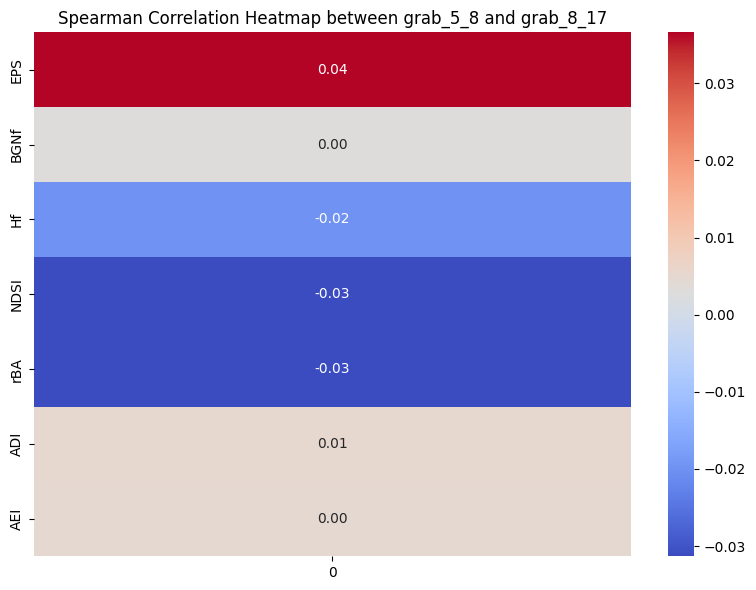

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframes
grab_17_20 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_17_20.csv")
grab_20_5 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_20_5.csv")
grab_5_8 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_5_8.csv")
grab_8_17 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_8_17.csv")

# List of dataframes
dataframes = [grab_17_20, grab_20_5, grab_5_8, grab_8_17]
df_names = ['grab_17_20', 'grab_20_5', 'grab_5_8', 'grab_8_17']

# Select columns for correlation calculation
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Create a DataFrame to store the correlation results
correlation_results = pd.DataFrame(columns=['DataFrame1', 'DataFrame2'] + columns_to_correlate)

# Calculate and save pairwise correlations
num_dataframes = len(dataframes)
for i in range(num_dataframes):
    for j in range(i+1, num_dataframes):
        df1 = dataframes[i]
        df2 = dataframes[j]
        df_name1 = df_names[i]
        df_name2 = df_names[j]

        correlation_matrix = df1[columns_to_correlate].corrwith(df2[columns_to_correlate], method='spearman')
        correlation_results = correlation_results.append({'DataFrame1': df_name1, 'DataFrame2': df_name2, **correlation_matrix}, ignore_index=True)

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Spearman Correlation Heatmap between {df_name1} and {df_name2}")
        plt.tight_layout()
        plt.show()

# Save correlation results to a CSV file
correlation_results.to_csv("correlation_results.csv", index=False)


In [ ]:
correlation_results

DataFrame1 DataFrame2       EPS      BGNf        Hf      NDSI       rBA  \
0  grab_17_20  grab_20_5 -0.006098  0.066855 -0.000560  0.007372  0.007372   
1  grab_17_20   grab_5_8  0.017263  0.016237  0.006054  0.016537  0.016537   
2  grab_17_20  grab_8_17 -0.012629  0.061026 -0.014310 -0.019799 -0.019799   
3   grab_20_5   grab_5_8  0.048343  0.063079  0.010733 -0.003833 -0.003833   
4   grab_20_5  grab_8_17  0.001707  0.046364  0.001774 -0.010996 -0.010996   
5    grab_5_8  grab_8_17  0.036596  0.003015 -0.020140 -0.031313 -0.031313   

        ADI       AEI  
0  0.018380  0.018856  
1  0.012061  0.012183  
2  0.036182  0.035456  
3 -0.006338 -0.007091  
4  0.007369  0.007428  
5  0.005279  0.004807

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframes
grab_17_20 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_17_20.csv")
grab_20_5 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_20_5.csv")
grab_5_8 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_5_8.csv")
grab_8_17 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_8_17.csv")


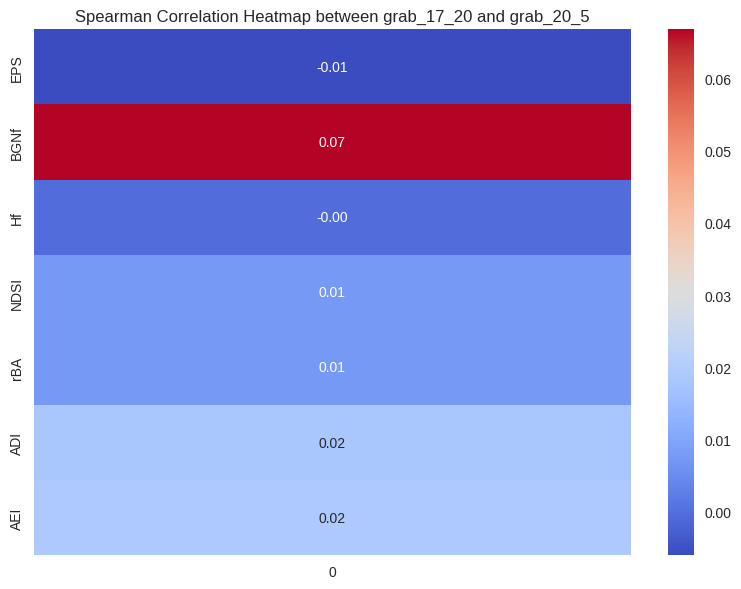

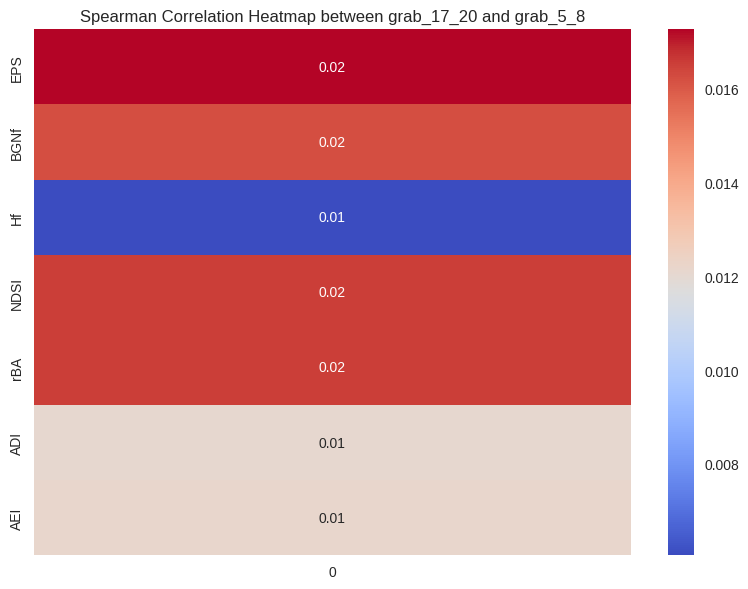

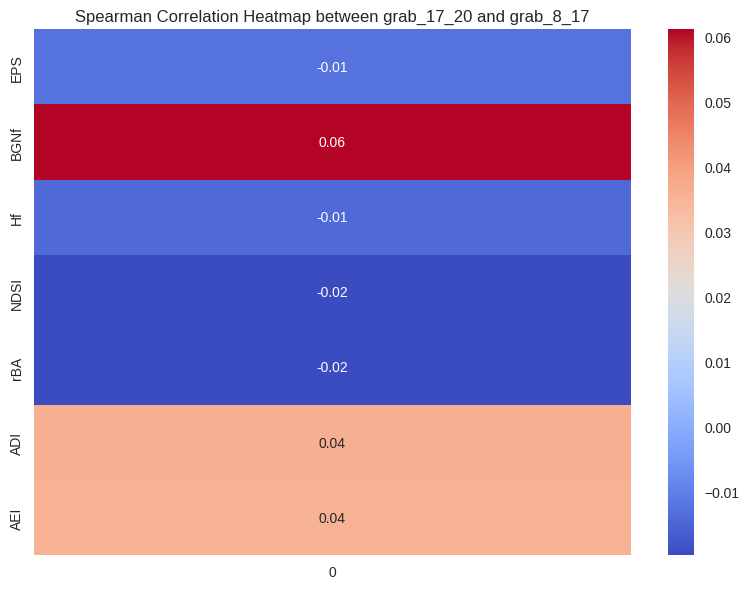

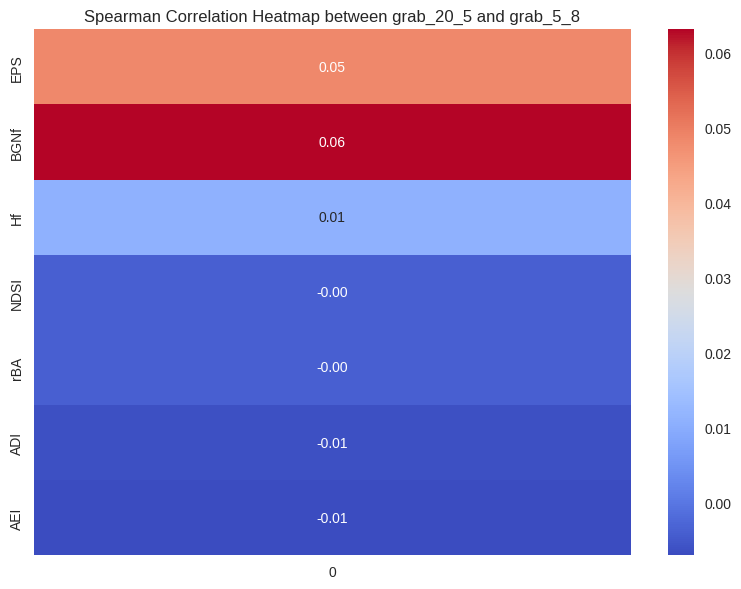

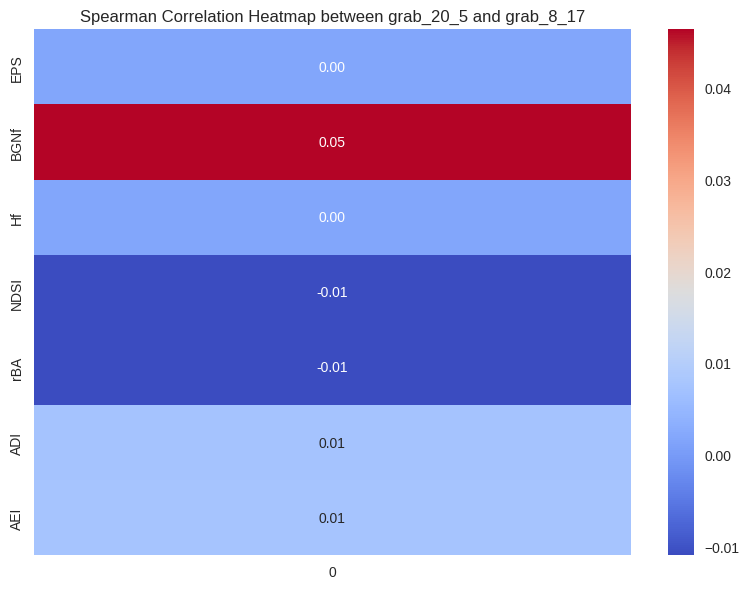

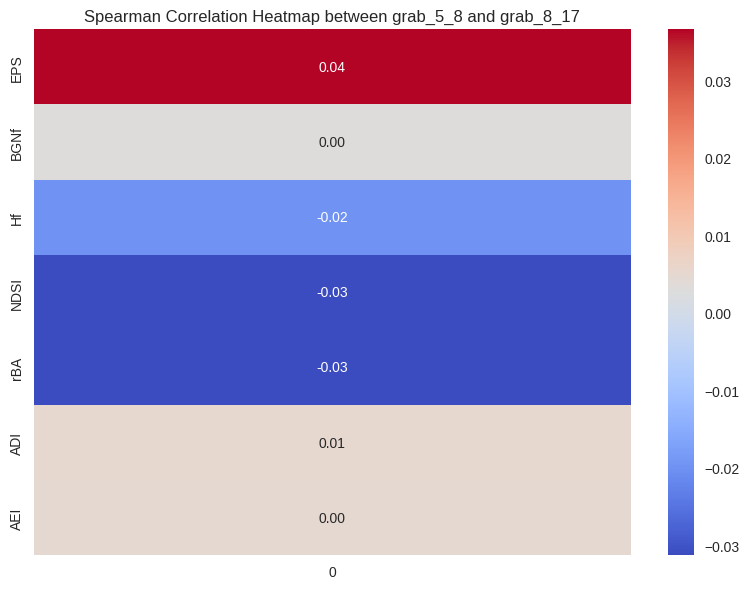

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframes
grab_17_20 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_17_20.csv")
grab_20_5 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_20_5.csv")
grab_5_8 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_5_8.csv")
grab_8_17 = pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_8_17.csv")

# List of dataframes
dataframes = [grab_17_20, grab_20_5, grab_5_8, grab_8_17]
df_names = ['grab_17_20', 'grab_20_5', 'grab_5_8', 'grab_8_17']

# Select columns for correlation calculation
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Create pairwise correlation heatmaps
num_dataframes = len(dataframes)
for i in range(num_dataframes):
    for j in range(i+1, num_dataframes):
        df1 = dataframes[i]
        df2 = dataframes[j]
        df_name1 = df_names[i]
        df_name2 = df_names[j]

        correlation_matrix = df1[columns_to_correlate].corrwith(df2[columns_to_correlate], method='spearman')
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Spearman Correlation Heatmap between {df_name1} and {df_name2}")
        plt.tight_layout()
        plt.show()


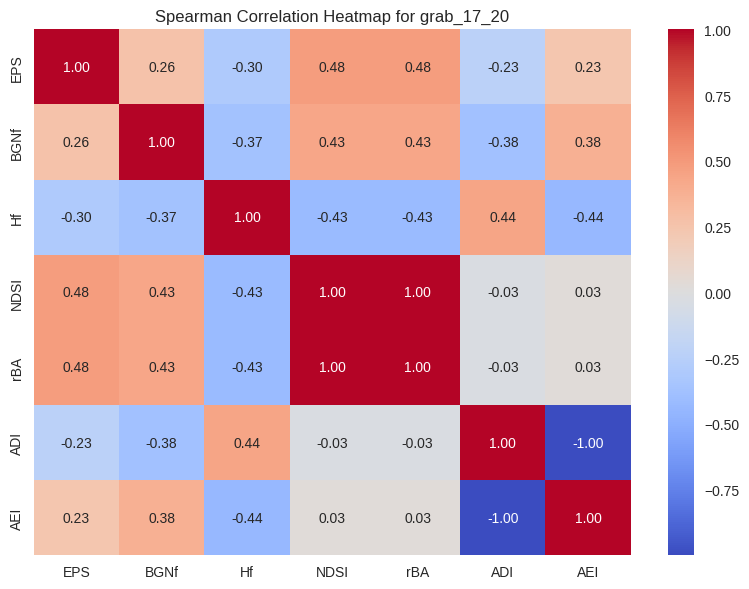

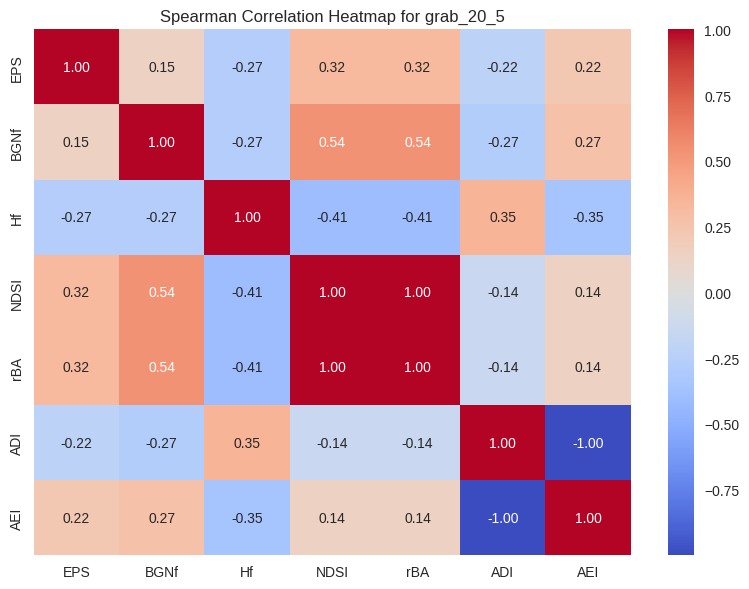

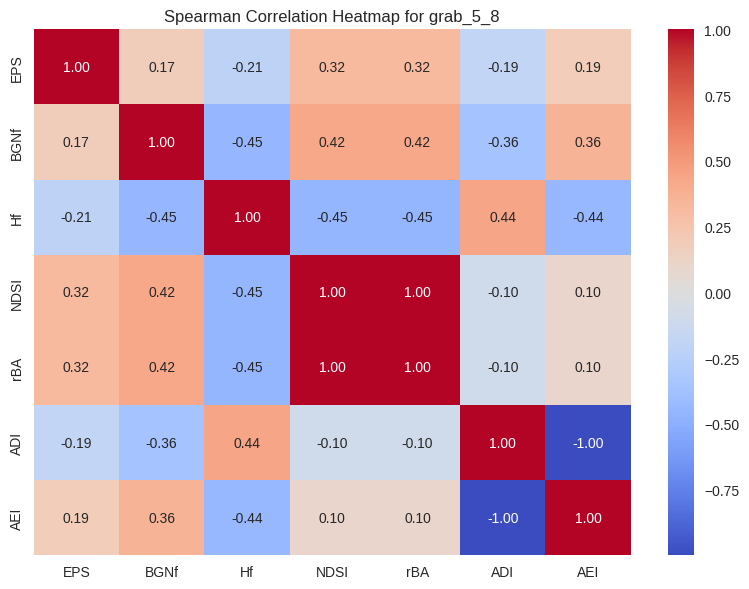

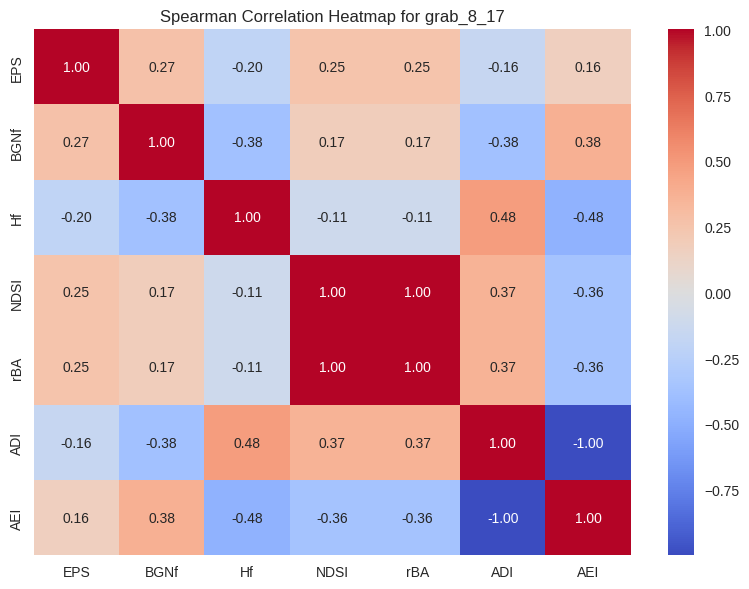

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select columns for correlation calculation
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# List of dataframe pairs
dataframe_pairs = [('grab_17_20', grab_17_20), ('grab_20_5', grab_20_5), ('grab_5_8', grab_5_8), ('grab_8_17', grab_8_17)]

# Create heatmap for each pair of dataframes
for df_name, df in dataframe_pairs:
    correlation_matrix = df[columns_to_correlate].corr(method='spearman')
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Spearman Correlation Heatmap for {df_name}")
    plt.tight_layout()
    plt.show()


## 5 a 8 am

In [ ]:
grab_5_8.columns

Index(['file', 'ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt',
       'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'MEANf',
       'VARf', 'SKEWf', 'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf',
       'Hf', 'EAS', 'ECU', 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI',
       'rBA', 'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC',
       'MFC', 'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract',
       'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi',
       'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI',
       'ROItotal', 'ROIcover', 'fecha', 'hora', 'site'],
      dtype='object')

In [ ]:
DFperiods=grab_5_8[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]
DFperiods

EPS       BGNf        Hf      NDSI       rBA       ADI       AEI
0     0.076196 -39.157774  0.797604  0.633115  4.451298  2.063625  0.099010
1     0.047774 -38.799811  0.796751  0.140633  1.327293  2.078742  0.019793
2     0.021135 -40.784344  0.814231  0.157531  1.373976  2.079410  0.004346
3     0.093793 -36.656186  0.781258  0.161270  1.384557  2.079396  0.005306
4     0.042805 -41.142693  0.817253  0.131122  1.301819  2.079387  0.005949
...        ...        ...       ...       ...       ...       ...       ...
6483  0.018332 -51.402470  0.857505  0.212072  1.538303  2.079168  0.013238
6484  0.018906 -51.221470  0.872540  0.485317  2.885889  2.079438  0.001588
6485  0.044751 -39.722672  0.732885 -0.707792  0.171103  2.079199  0.012390
6486  0.037348 -51.356045  0.716655  0.106950  1.239515  2.014955  0.203340
6487  0.020140 -51.417252  0.864712  0.417542  2.433724  2.078010  0.030318

[6488 rows x 7 columns]

#### acoustic indices correlation vs ecological layers

In [ ]:
buffer=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/buffer.csv")
buffer

Unnamed: 0 field_numb   XCOORD.y_x   YCOORD.y_x  FM100_b100mean_100  \
0            0     RZUH04  4957101.251  1949742.623            0.566359   
1            1     RZUH13  4957101.251  1946142.623            0.374368   
2            2     RZUH07  4957101.251  1948542.623            0.860328   
3            3     RZUH03  4957101.251  1950142.623            0.000000   
4            4     RZUH05  4957101.251  1949342.623            0.000000   
..         ...        ...          ...          ...                 ...   
89          89     RZUG11  4956701.251  1946942.623            0.000000   
90          90     RZUG06  4956701.251  1948942.623            0.041330   
91          91     RZUG04  4956701.251  1949742.623            0.006452   
92          92     RZUG02  4956701.251  1950542.623            0.698113   
93          93     RZUG09  4956701.251  1947742.623            0.008590   

    FM100_b100median_100  DN100_b100mean_100  DN100_b100median_100  \
0               0.428571            0.994023              1.000000   
1               0.285714            0.989796              1.000000   
2               1.000000            1.000000              1.000000   
3               0.000000            0.962053              0.966667   
4               0.000000            0.904278              0.905719   
..                   ...                 ...                   ...   
89              0.000000            0.923325              0.952860   
90              0.000000            0.996210              1.000000   
91              0.000000            0.994832              1.000000   
92              1.000000            0.999567              1.000000   
93              0.000000            1.000000              1.000000   

    DI300_b300mean_300  DI300_b300median_300  ...  llanos200_b200mean_200  \
0             0.021562              0.017169  ...                0.633902   
1             0.048132              0.038085  ...                0.708133   
2             0.122280              0.117288  ...                0.634595   
3             0.025790              0.021935  ...                0.539273   
4             0.016334              0.011035  ...                0.473106   
..                 ...                   ...  ...                     ...   
89            0.017890              0.004604  ...                0.593373   
90            0.048203              0.045054  ...                0.368798   
91            0.051862              0.036262  ...                0.503615   
92            0.067338              0.064962  ...                0.774556   
93            0.082559              0.087151  ...                0.420991   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.674904              3.695705                2.964900   
1                   0.677419              4.064086                3.610703   
2                   0.804584              4.178706                4.112499   
3                   0.524573              3.133335                2.844066   
4                   0.470548              2.665966                2.546518   
..                       ...                   ...                     ...   
89                  0.594655              2.725623                2.543377   
90                  0.331849              2.741621                2.661483   
91                  0.440694              3.401347                2.831349   
92                  0.835862              4.935268                5.585879   
93                  0.297308              3.729539                2.966485   

    FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
0             0.406593              0.285714              3.897863   
1             0.351490              0.142857              3.963771   
2             0.537534              0.428571              4.528694   
3             0.074912              0.000000              2.915847   
4             0.006852              0.000000      

In [ ]:
buffer[['FM100_b100mean_100',  'DN100_b100mean_100',
        'DI100_b100mean_100', 'AD100_b100mean_100',  'COB100_b100mean_100','brillo100_b100mean_100',
        'SLAVI100_b100mean_100', 'SL100_b100mean_100', 'NDMI100_b100mean_100','llanos100_b100mean_100','ICHN100_b100mean_100']]

FM100_b100mean_100  DN100_b100mean_100  DI100_b100mean_100  \
0             0.566359            0.994023            0.030299   
1             0.374368            0.989796            0.022922   
2             0.860328            1.000000            0.117624   
3             0.000000            0.962053            0.011966   
4             0.000000            0.904278            0.004138   
..                 ...                 ...                 ...   
89            0.000000            0.923325            0.010533   
90            0.041330            0.996210            0.030693   
91            0.006452            0.994832            0.027392   
92            0.698113            0.999567            0.061417   
93            0.008590            1.000000            0.085597   

    AD100_b100mean_100  COB100_b100mean_100  brillo100_b100mean_100  \
0             0.216585             0.792994                0.401402   
1             0.066341             0.633441                0.422823   
2             0.424000             0.980645                0.362136   
3             0.000000             0.241935                0.449139   
4             0.000000             0.148089                0.467862   
..                 ...                  ...                     ...   
89            0.000000             0.194805                0.459146   
90            0.005000             0.506452                0.405789   
91            0.000000             0.437097                0.446580   
92            0.341463             0.918831                0.379233   
93            0.000000             0.503236                0.459234   

    SLAVI100_b100mean_100  SL100_b100mean_100  NDMI100_b100mean_100  \
0                0.401977            0.895383              0.532574   
1                0.358134            0.889820              0.528705   
2                0.618776            0.874386              0.734998   
3                0.174748            0.911903              0.350997   
4                0.140578            0.806802              0.288170   
..                    ...                 ...                   ...   
89               0.225032            0.886437              0.417470   
90               0.077245            0.826408              0.232432   
91               0.115074            0.915093              0.235651   
92               0.557820            0.869507              0.679418   
93               0.062099            0.803971              0.213879   

    llanos100_b100mean_100  ICHN100_b100mean_100  
0                 0.685609              4.403582  
1                 0.685065              3.844683  
2                 0.823169              5.599637  
3                 0.529697              2.655582  
4                 0.473884              2.283471  
..                     ...                   ...  
89                0.584231              2.663043  
90                0.394573              2.722365  
91                0.427697              2.732733  
92                0.800127              5.114465  
93                0.307665              2.676905  

[94 rows x 11 columns]

In [ ]:
buffer.columns

Index(['Unnamed: 0', 'field_numb', 'XCOORD.y_x', 'YCOORD.y_x',
       'FM100_b100mean_100', 'FM100_b100median_100', 'DN100_b100mean_100',
       'DN100_b100median_100', 'DI300_b300mean_300', 'DI300_b300median_300',
       'COB300_b300mean_300', 'COB300_b300median_300', 'DN250_b250mean_250',
       'DN250_b250median_250', 'DN200_b200mean_200', 'DN200_b200median_200',
       'DN300_b300mean_300', 'DN300_b300median_300', 'DI250_b250mean_250',
       'DI250_b250median_250', 'DI100_b100mean_100', 'DI100_b100median_100',
       'DI200_b200mean_200', 'DI200_b200median_200', 'COB200_b200mean_200',
       'COB200_b200median_200', 'Brillo300_b300mean_300',
       'Brillo300_b300median_300', 'COB250_b250mean_250',
       'COB250_b250median_250', 'brillo200_b200mean_200',
       'brillo200_b200median_200', 'AD300_b300mean_300',
       'AD300_b300median_300', 'AD200_b200mean_200', 'AD200_b200median_200',
       'AD100_b100mean_100', 'AD100_b100median_100', 'COB100_b100mean_100',
       'COB100_b100

In [ ]:
buffer = buffer.rename(columns={'field_numb': 'site'})

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

In [ ]:
columns_to_correlate_with= buffer.iloc[:,4:].columns

In [ ]:
dfmerg=grab_5_8.groupby('site').median()

TypeError: could not convert string to float: '//run/media/vmartinezarias/DBackVMMA/REYZAMURO/DATOS/Pasivo/Ultrasonido//RZUA01/20220913_054500.WAV'

In [ ]:
merged_df = pd.merge(dfmerg, buffer, on="site")
merged_df

NameError: name 'dfmerg' is not defined

In [ ]:

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)


In [ ]:
correlation_df

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
EPS            -0.369653             -0.319009           -0.242683   
BGNf            0.010848              0.044910            0.053437   
Hf             -0.228798             -0.273418           -0.113335   
NDSI            0.206033              0.251901            0.062383   
rBA             0.191351              0.227659            0.094894   
ADI            -0.056960             -0.100792           -0.067179   
AEI             0.055661              0.100010            0.066491   

      DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
EPS              -0.312881           -0.139194             -0.130117   
BGNf              0.038391            0.028938              0.056657   
Hf               -0.136156           -0.105909             -0.129472   
NDSI              0.138030            0.135181              0.143495   
rBA               0.153916            0.137331              0.149626   
ADI              -0.029581           -0.065775             -0.083151   
AEI               0.026863            0.065313              0.082920   

      COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
EPS             -0.129599              -0.218405           -0.092147   
BGNf             0.047683               0.050517            0.050192   
Hf              -0.211499              -0.154943           -0.147852   
NDSI             0.236934               0.131807            0.172960   
rBA              0.208378               0.113038            0.173995   
ADI             -0.197676              -0.158992           -0.102001   
AEI              0.196354               0.155245            0.102136   

      DN250_b250median_250  ...  llanos200_b200mean_200  \
EPS              -0.294723  ...               -0.188087   
BGNf             -0.049328  ...                0.067033   
Hf               -0.034132  ...               -0.267240   
NDSI              0.092196  ...                0.208186   
rBA               0.103261  ...                0.202437   
ADI               0.021102  ...               -0.275920   
AEI              -0.027183  ...                0.274216   

      llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
EPS                  -0.193168             -0.203026               -0.233270   
BGNf                  0.097293              0.036598                0.033524   
Hf                   -0.306577             -0.228826               -0.254993   
NDSI                  0.228412              0.223921                0.214891   
rBA                   0.226405              0.199204                0.209524   
ADI                  -0.267686             -0.213362               -0.230849   
AEI                   0.266364              0.211467                0.228906   

      FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
EPS            -0.250772             -0.256136             -0.240930   
BGNf           -0.006211              0.047430              0.038732   
Hf             -0.201529             -0.233517             -0.240835   
NDSI            0.198997              0.188677              0.225291   
rBA             0.165281              0.162793              0.205176   
ADI            -0.141265             -0.178875             -0.191352   
AEI             0.139560              0.178034              0.189791   

      ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
EPS                -0.276222             -0.335372               -0.350183  
BGNf                0.032601              0.065138                0.046074  
Hf                 -0.252413             -0.278898               -0.268052  
NDSI                0.204842              0.245931                0.223889  
rBA                 0.200589              0.240866                0.218920  
ADI                -0.198535             -0.124208               -0.105940  
AEI                 0.196847              0.122631           

In [ ]:
columns_to_correlate_with=['FM100_b100mean_100',  'DN100_b100mean_100',
        'DI100_b100mean_100', 'AD100_b100mean_100',  'COB100_b100mean_100','brillo100_b100mean_100',
        'SLAVI100_b100mean_100', 'SL100_b100mean_100', 'NDMI100_b100mean_100','llanos100_b100mean_100','ICHN100_b100mean_100']

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)
correlation_df.round(2)


In [ ]:
correlation_df.round(2)

FM100_b100mean_100  DN100_b100mean_100  DI100_b100mean_100  \
EPS                -0.37               -0.24               -0.25   
BGNf                0.01                0.05                0.07   
Hf                 -0.23               -0.11               -0.16   
NDSI                0.21                0.06                0.10   
rBA                 0.19                0.09                0.12   
ADI                -0.06               -0.07               -0.10   
AEI                 0.06                0.07                0.10   

      AD100_b100mean_100  COB100_b100mean_100  brillo100_b100mean_100  \
EPS                -0.33                -0.35                    0.35   
BGNf                0.00                 0.04                   -0.13   
Hf                 -0.25                -0.26                    0.30   
NDSI                0.21                 0.22                   -0.22   
rBA                 0.18                 0.22                   -0.24   
ADI                -0.07                -0.08                    0.21   
AEI                 0.07                 0.08                   -0.21   

      SLAVI100_b100mean_100  SL100_b100mean_100  NDMI100_b100mean_100  \
EPS                   -0.25                0.10                 -0.25   
BGNf                   0.12                0.10                  0.11   
Hf                    -0.34                0.04                 -0.37   
NDSI                   0.29               -0.03                  0.30   
rBA                    0.29               -0.00                  0.30   
ADI                   -0.22               -0.02                 -0.21   
AEI                    0.21                0.02                  0.21   

      llanos100_b100mean_100  ICHN100_b100mean_100  
EPS                    -0.27                 -0.34  
BGNf                    0.10                  0.07  
Hf                     -0.34                 -0.28  
NDSI                    0.27                  0.25  
rBA                     0.27                  0.24  
ADI                    -0.20                 -0.12  
AEI                     0.20                  0.12

In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(correlation_df > 0.5)

# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": indices,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})

print(result_df)


Empty DataFrame
Columns: [Row_Index, Column_Name, Value]
Index: []


In [ ]:
correlation_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/CorrelationAIvsEcologicallayers_5_8.csv")

### Correlation between variables

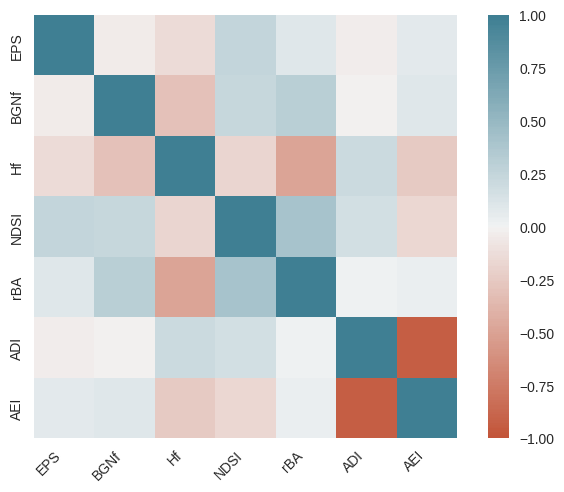

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 15)

number of recommended clusters 14


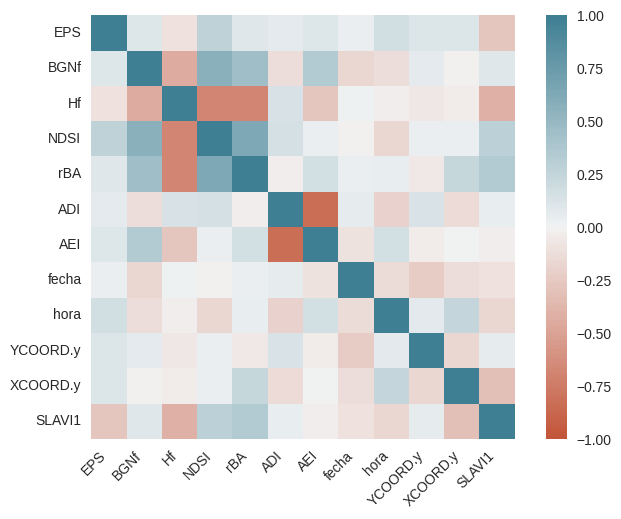

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 25)

number of recommended clusters 24


In [ ]:
Recomended_Clusters=UW_index(df, 95)

NameError: ignored

### Only With the index

In [ ]:
X_train11 = grab_5_8.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


NameError: name 'grab_5_8' is not defined

In [ ]:
DFperiods=X_train11[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]


NameError: name 'X_train11' is not defined

In [ ]:
DFperiods = DFperiods.reset_index(drop=True)


In [ ]:
DFperiods

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0   0.048559 -45.471078  0.711557  0.750643   7.020645  2.077673  0.032649
1   0.025267 -53.136285  0.839792  0.469892   2.772819  2.078374  0.025594
2   0.052683 -34.534564  0.767569  0.807440   9.386393  2.069168  0.080584
3   0.007867 -46.160062  0.697057 -0.033231   0.940370  2.052742  0.128506
4   0.048219 -49.332475  0.757915  0.767798   7.613177  2.078548  0.023427
..       ...        ...       ...       ...        ...       ...       ...
86  0.058115 -36.161900  0.582793  0.977940  89.660210  2.076854  0.040457
87  0.061226 -48.733445  0.776877  0.601040   4.013067  2.079036  0.015356
88  0.058751 -40.215545  0.741187  0.902846  19.602341  2.073696  0.058918
89  0.020770 -40.709773  0.622734  0.124657  12.449673  1.558275  0.388136
90  0.034026 -50.570700  0.829227  0.220669   1.566304  2.079275  0.010104

[91 rows x 7 columns]

In [ ]:
pip install scikit-learn clusteval


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from clusteval import clusteval
import matplotlib.pyplot as plt
import numpy as np

# Sample data
df = DFperiods

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to perform clustering and calculate indices
def perform_clustering_and_evaluate(data, clustering_algorithms, cluster_range):
    results = {}
    for name, algo in clustering_algorithms.items():
        print(f"Evaluating {name}...")
        sil_scores = []
        db_scores = []
        ch_scores = []

        for k in cluster_range:
            if name == 'DBSCAN':
                # DBSCAN does not require a fixed number of clusters
                labels = algo.fit_predict(data)
            else:
                if name == 'GaussianMixture':
                    algo.set_params(n_components=k)
                else:
                    algo.set_params(n_clusters=k)
                labels = algo.fit_predict(data)

            if len(set(labels)) > 1:  # Check if there is more than one cluster
                sil_scores.append(silhouette_score(data, labels))
                db_scores.append(davies_bouldin_score(data, labels))
                ch_scores.append(calinski_harabasz_score(data, labels))
            else:
                sil_scores.append(-1)
                db_scores.append(-1)
                ch_scores.append(-1)

        # Determine the best k based on the highest silhouette score, lowest DB score, and highest CH score
        best_k_sil = cluster_range[np.argmax(sil_scores)]
        best_k_db = cluster_range[np.argmin(db_scores)]
        best_k_ch = cluster_range[np.argmax(ch_scores)]

        results[name] = {
            'Silhouette Score Best k': best_k_sil,
            'Davies-Bouldin Index Best k': best_k_db,
            'Calinski-Harabasz Index Best k': best_k_ch
        }

    return results

# Define clustering algorithms
cluster_range = range(2, 11)  # Range of k for KMeans, Agglomerative Clustering, and GMM
clustering_algorithms = {
    'KMeans': KMeans(random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'GaussianMixture': GaussianMixture(random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=2)
}

# Perform clustering and evaluate
results = perform_clustering_and_evaluate(df_scaled, clustering_algorithms, cluster_range)

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Silhouette Score Best k: {result['Silhouette Score Best k']}")
    print(f"Davies-Bouldin Index Best k: {result['Davies-Bouldin Index Best k']}")
    print(f"Calinski-Harabasz Index Best k: {result['Calinski-Harabasz Index Best k']}")

# Using clusteval for automatic evaluation
ce = clusteval(cluster='kmeans')
ce.fit(df_scaled)
print("\nClusteval Results:", ce.results)


Evaluating KMeans...
Evaluating AgglomerativeClustering...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Evaluating GaussianMixture...
Evaluating DBSCAN...

KMeans Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 3
Calinski-Harabasz Index Best k: 4

AgglomerativeClustering Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 3
Calinski-Harabasz Index Best k: 4

GaussianMixture Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 6
Calinski-Harabasz Index Best k: 4

DBSCAN Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 2
Calinski-Harabasz Index Best k: 2


[clusteval] >INFO:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/


Clusteval Results: {'evaluate': 'silhouette', 'score':     cluster_threshold  clusters     score
0                   2         2  0.342375
1                   3         3  0.329662
2                   4         4  0.264315
3                   5         5  0.253026
4                   6         6  0.224117
5                   7         7  0.230026
6                   8         8  0.246436
7                   9         9  0.218571
8                  10        10  0.226604
9                  11        11  0.230308
10                 12        12  0.207905
11                 13        13  0.229800
12                 14        14  0.201230
13                 15        15  0.215710
14                 16        16  0.221075
15                 17        17  0.207721
16                 18        18  0.206285
17                 19        19  0.195552
18                 20        20  0.199690
19                 21        21  0.210752
20                 22        22  0.186112
21                 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Assuming grab_5_8 is defined and contains the required columns
DFperiods = grab_5_8[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']]

# Initialize lists for collecting results
cpred = []

sil = []
bh = []
rtl = []
sd = []
db = []
xb = []
ch = []
dnn = []
mr = []
pb = []
rt = []
wg = []
c = []
kgmm = 50

# Initialize lists to collect clustering scores
g1 = []
g2 = []
g3 = []
g4 = []
g5 = []
g6 = []
g7 = []
g8 = []
g9 = []
g10 = []
g11 = []
g13 = []

X_train11 = DFperiods.copy()

# Loop through different numbers of components for GaussianMixture
for l in range(2, kgmm):
    rand = 1

    # Fit Gaussian Mixture model and predict clusters
    GM = GaussianMixture(n_components=l, random_state=rand, covariance_type="full").fit(X_train11)
    pred = GM.predict(X_train11)
    sil.append(metrics.silhouette_score(X_train11, pred, metric='euclidean'))
    X_train11["target"] = pred

    # Assuming ClustersCharacteristics is defined and takes X_train11 with target
    CC = ClustersCharacteristics(X_train11, label_target="target")
    g1.append(CC.score_index_ball_hall())
  #g2.append(CC.score_index_ratkowsky_lance())
    g3.append(CC.score_index_SD())
    g5.append(CC.score_index_xie_beni())
    g6.append(CC.score_index_calinski_harabasz())
    g7.append(CC.score_index_dunn())
    g8.append(CC.score_index_mclain_rao())
    g9.append(CC.score_index_point_biserial())
    g10.append(CC.score_index_ray_turi())
    g11.append(CC.score_index_wemmert_gancarski())
    g13.append(CC.score_index_c())

    try:
        g4.append(CC.score_index_davies_bouldin())
    except:
        print("An exception occurred")
        g4.append(0)

# Find the optimal number of clusters based on different indices
silluette.append(np.array(sil).argmax() + 2)
bh.append(np.diff(np.array(g1)).argmax() + 2)
#rtl.append(np.array(g2).argmax() + 2)
sd.append(np.array(g3).argmin() + 2)
db.append(np.array(g4).argmin() + 2)
xb.append(np.array(g5).argmin() + 2)
ch.append(np.array(g6).argmax() + 2)
dnn.append(np.array(g7).argmax() + 2)
mr.append(np.array(g8).argmin() + 2)
wg.append(np.array(g11).argmax() + 2)
pb.append(np.array(g9).argmax() + 2)
rt.append(np.array(g10).argmin() + 2)
c.append(np.array(g13).argmin() + 2)

ncrecomended = [silluette, bh, rtl, sd, db, xb, ch, dnn, mr, wg, pb, rt, c]

print(ncrecomended)
cpred.append(ncrecomended)
print("silluette, bh, rtl, sd, db, xb, ch, dnn, mr, wg, pb, rt, c")


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
DFperiods=grab_5_8[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]

cpred=[]
admis=[]

ncreal=[]
ncpred_slope=[]
ncpred_min=[]
sil=[]
silluette=[]
bh=[]
rtl=[]
sd=[]
db=[]
xb=[]
ch=[]
dnn=[]
mr=[]
pb=[]
rt=[]
wg=[]
dr=[]
c=[]
kgmm=50

varuncer=[]
separation=[]
sil=[]
g1=[]
g2=[]
g3=[]
g4=[]
g5=[]

g6=[]
g7=[]
g8=[]
g9=[]
g10=[]
g11=[]
g12=[]
g13=[]

X_train11=DFperiods.copy()
for l in range(2,kgmm):
  rand=1

  #unce, sep,pred=uncertainity_mean(X_train11,n_components=l)
  GM = GaussianMixture(n_components=l, random_state=rand, covariance_type="full").fit(X_train11)
  pred=GM.predict(X_train11)
  sil.append(metrics.silhouette_score(X_train11, pred, metric='euclidean'))
  X_train11["target"]=pred

  CC=ClustersCharacteristics(X_train11, label_target="target")
  g1.append(CC.score_index_ball_hall())
  g2.append(CC.score_index_ratkowsky_lance())
  g3.append(CC.score_index_SD())
  g5.append(CC.score_index_xie_beni())
  g6.append(CC.score_index_calinski_harabasz())
  g7.append(CC.score_index_dunn())
  g8.append(CC.score_index_mclain_rao())
  g9.append(CC.score_index_point_biserial())
  g10.append(CC.score_index_ray_turi())
  g11.append(CC.score_index_wemmert_gancarski())
  g13.append(CC.score_index_c())

  try:
      g4.append(CC.score_index_davies_bouldin())
  except:
      print("An exception occurred")
      g4.append(0)


silluette.append(np.array(sil).argmax()+2)
bh.append(np.diff(np.array(g1)).argmax()+2)
rtl.append(np.array(g2).argmax()+2)
sd.append(np.array(g3).argmin()+2)
db.append(np.array(g4).argmin()+2)
xb.append(np.array(g5).argmin()+2)
ch.append(np.array(g6).argmax()+2)
dnn.append(np.array(g7).argmax()+2)
mr.append(np.array(g8).argmin()+2)
wg.append(np.array(g11).argmax()+2)
pb.append(np.array(g9).argmax()+2)
rt.append(np.array(g10).argmin()+2)
c.append(np.array(g13).argmin()+2)

ncrecomended=[silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, rt, c]

adm=[]

print(ncrecomended)
cpred.append(ncrecomended)
print("silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, r, c")

In [ ]:

Index=[]
liminfierior=2
limsuperior=20
for i in range(2,50):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

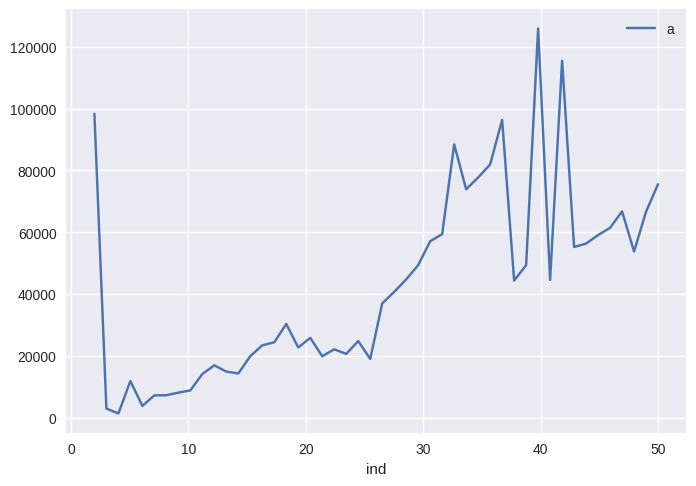

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

In [ ]:
change["a"].argmin()

2

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,10):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

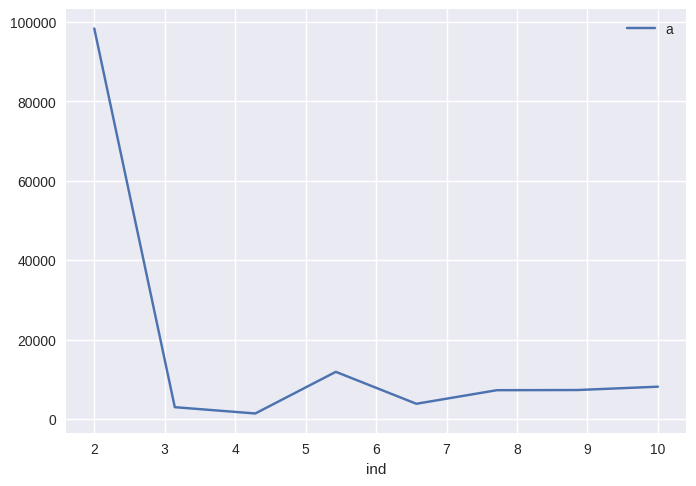

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

### Clustering With the recomended number of clusters

In [ ]:
grab_5_8

file           ZCR  \
0     //home/vmartinezarias/Documents/Zamuro/Ultraso...  38808.966667   
1     //home/vmartinezarias/Documents/Zamuro/Ultraso...  35579.666667   
2     //home/vmartinezarias/Documents/Zamuro/Ultraso...  38407.383333   
3     //home/vmartinezarias/Documents/Zamuro/Ultraso...  34937.200000   
4     //home/vmartinezarias/Documents/Zamuro/Ultraso...  39280.733333   
...                                                 ...           ...   
6483  //home/vmartinezarias/Documents/Zamuro/Ultraso...  54348.850000   
6484  //home/vmartinezarias/Documents/Zamuro/Ultraso...  50102.083333   
6485  //home/vmartinezarias/Documents/Zamuro/Ultraso...  38994.850000   
6486  //home/vmartinezarias/Documents/Zamuro/Ultraso...  50832.750000   
6487  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

             MEANt      VARt     SKEWt       KURTt       LEQt       BGNt  \
0     4.496403e-19  0.000357  0.228705   11.683475  58.546287 -26.183550   
1    -3.499034e-19  0.000291  0.148119   15.317759  57.654888 -26.189017   
2    -5.191256e-19  0.000199  0.273856   13.249774  56.005022 -28.010401   
3    -1.042019e-18  0.000581  0.150584   13.264824  60.660149 -23.284460   
4    -3.976131e-19  0.000172  0.244686   12.831158  55.365975 -28.315691   
...            ...       ...       ...         ...        ...        ...   
6483 -1.139521e-19  0.000017  0.921414  331.085587  45.360286 -39.530704   
6484  4.836987e-20  0.000014  0.031864    3.951545  44.416571 -39.326817   
6485 -1.095574e-19  0.000212  0.232472    4.822552  56.288219 -26.368904   
6486 -2.054298e-19  0.000032  0.478260   52.228224  48.080979 -39.681289   
6487  2.541731e-19  0.000014  0.248200  472.819549  44.604796 -39.605826   

          SNRt       MED  ...  H_pairedShannon       H_gamma  H_GiniSimpson  \
0     1.984048  0.049071  ...         5.969656  24945.045424       0.987994   
1     1.879045  0.049040  ...         5.965549  23493.194492       0.990363   
2     2.470468  0.039763  ...         6.075086  26916.142072       0.991327   
3     1.761097  0.068514  ...         5.866976  20834.129454       0.986606   
4     2.245790  0.038390  ...         6.093958  28291.213927       0.991371   
...        ...       ...  ...              ...           ...            ...   
6483  6.172533  0.010555  ...         6.345676  44623.288123       0.992585   
6484  0.960251  0.010806  ...         6.439681  48672.388162       0.993015   
6485  1.083154  0.048035  ...         5.564284  17146.542846       0.984745   
6486  5.916577  0.010374  ...         5.447866  29817.855458       0.956033   
6487  3.405888  0.010464  ...         6.390634  47047.529927       0.992592   

          RAOQ       AGI  ROItotal  ROIcover     fecha  hora    site  
0     0.443800  1.391314      2636  8.310691  20220907     5  RZUH04  
1     0.328033  1.255820      1879  3.847879  20220911     7  RZUH04  
2     0.312294  1.278482      2305  3.913420  20220906     6  RZUH04  
3     0.331916  1.312727      2251  5.596342  20220904     5  RZUH04  
4     0.324372  1.267968      2045  3.765688  20220905     6  RZUH04  
...        ...       ...       ...       ...       ...   ...     ...  
6483  0.445491  1.286313      1217  1.110327  20220911     5  RZUG09  
6484  0.527749  1.228048       588  2.732621  20220911     7  RZUG09  
6485  0.263694  1.254089       493  0.561744  20220906     7  RZUG09  
6486  0.440870  1.272078       686  6.097953  20220907     6  RZUG09  
6487  0.501516  1.243373      1010  0.654612  20220911     6  RZUG09  

[6488 rows x 61 columns]

In [ ]:
X_train11 = grab_5_8.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [ ]:
X_train11

EPS       BGNf        Hf      NDSI        rBA       ADI  \
site                                                                    
RZUA01   0.048559 -45.471078  0.711557  0.750643   7.020645  2.077673   
RZUA02   0.025267 -53.136285  0.839792  0.469892   2.772819  2.078374   
RZUA03b  0.052683 -34.534564  0.767569  0.807440   9.386393  2.069168   
RZUA04   0.007867 -46.160062  0.697057 -0.033231   0.940370  2.052742   
RZUA05   0.048219 -49.332475  0.757915  0.767798   7.613177  2.078548   
...           ...        ...       ...       ...        ...       ...   
RZUH09   0.058115 -36.161900  0.582793  0.977940  89.660210  2.076854   
RZUH10   0.061226 -48.733445  0.776877  0.601040   4.013067  2.079036   
RZUH11   0.058751 -40.215545  0.741187  0.902846  19.602341  2.073696   
RZUH12   0.020770 -40.709773  0.622734  0.124657  12.449673  1.558275   
RZUH13   0.034026 -50.570700  0.829227  0.220669   1.566304  2.079275   

              AEI  
site               
RZUA01   0.032649  
RZUA02   0.025594  
RZUA03b  0.080584  
RZUA04   0.128506  
RZUA05   0.023427  
...           ...  
RZUH09   0.040457  
RZUH10   0.015356  
RZUH11   0.058918  
RZUH12   0.388136  
RZUH13   0.010104  

[91 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train11.values)
X_train11 = pd.DataFrame(scaled_features, index=X_train11.index, columns=X_train11.columns)

In [ ]:
rand=1
GM = GaussianMixture(n_components=3, random_state=rand, covariance_type="full").fit(X_train11)
pred=GM.predict(X_train11)

In [ ]:
GM.means_

array([[0.26159306, 0.64200987, 0.57252452, 0.80126962, 0.0783395 ,
        0.95166619, 0.14658697],
       [0.23218031, 0.7304085 , 0.30374072, 0.96311641, 0.35552068,
        0.98933631, 0.12293172],
       [0.18186098, 0.55206346, 0.72996306, 0.52698391, 0.02272766,
        0.99552775, 0.07142283]])

In [ ]:
predproba=GM.predict_proba(X_train11)

In [ ]:
X_train11["pred"]=pred

In [ ]:
predproba.shape

(91, 3)

In [ ]:
X_train11['component1_prob'] = predproba[:, 0]
X_train11['component2_prob'] = predproba[:, 1]
X_train11['component3_prob'] = predproba[:, 2]


In [ ]:
X_train11=X_train11.sort_values(by='pred')

In [ ]:


X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                           
RZUA01  0.231659  0.614171  0.569808  0.825036  0.072990  0.996608  0.083011   
RZUD08  0.137503  0.788824  0.693483  0.708759  0.039048  0.932082  0.383901   
RZUD11  0.214478  0.676920  0.638546  0.837261  0.079111  0.985194  0.174108   
RZUG04  0.258724  0.504670  0.561625  0.824334  0.072663  0.996844  0.082583   
RZUC12  0.081868  0.567261  0.434242  0.822225  0.071692  0.998586  0.053594   
...          ...       ...       ...       ...       ...       ...       ...   
RZUE12  0.159469  0.558379  0.631342  0.524740  0.018127  0.995299  0.099691   
RZUE13  0.181683  0.495523  0.731841  0.714409  0.040095  0.998979  0.044698   
RZUF03  0.294819  0.573600  0.775736  0.581090  0.022638  0.999655  0.025803   
RZUD03  0.181214  0.702491  0.583878  0.679464  0.034259  0.985052  0.180684   
RZUH13  0.158004  0.463207  0.858034  0.417082  0.011806  0.999681  0.024856   

        pred  component1_prob  component2_prob  component3_prob  
site                                                             
RZUA01     0     1.000000e+00     1.230200e-43     1.855422e-08  
RZUD08     0     1.000000e+00    2.387653e-245     2.530119e-24  
RZUD11     0     1.000000e+00     1.872938e-42     2.414132e-11  
RZUG04     0     9.999999e-01     8.971395e-45     9.084941e-08  
RZUC12     0     1.000000e+00     5.453838e-52     4.460260e-09  
...      ...              ...              ...              ...  
RZUE12     2     6.856710e-99     0.000000e+00     1.000000e+00  
RZUE13     2     3.621062e-10    9.387422e-172     1.000000e+00  
RZUF03     2     6.697800e-66     0.000000e+00     1.000000e+00  
RZUD03     2     3.906489e-09    6.158707e-261     1.000000e+00  
RZUH13     2    4.461107e-258     0.000000e+00     1.000000e+00  

[91 rows x 11 columns]

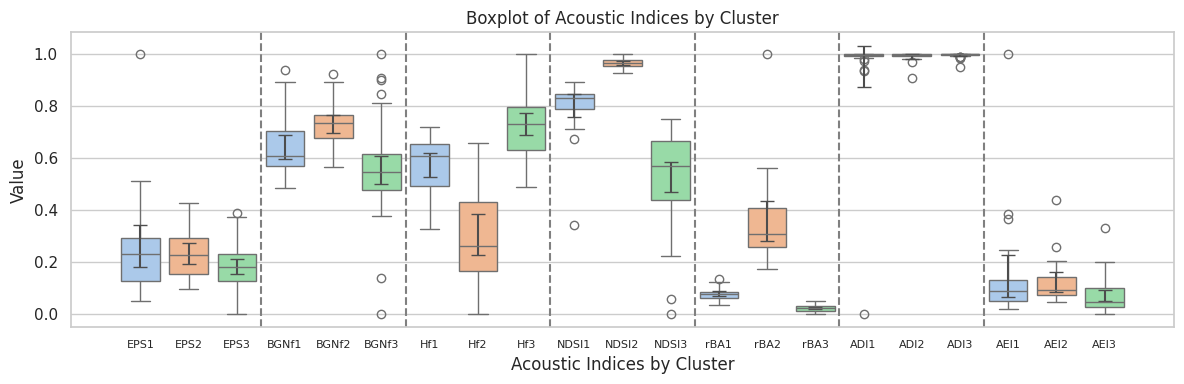

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
palette = sns.color_palette("pastel", 3)

ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='#4d4d4d', capsize=5)

plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_red0508.svg', format='svg')

# Show the plot
plt.show()


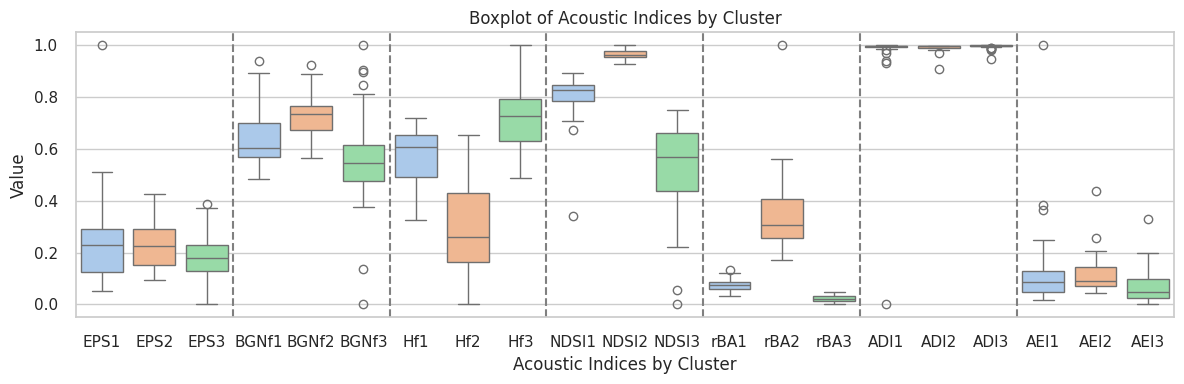

In [ ]:
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0508.svg', format='svg')

# Show the plot
plt.show()

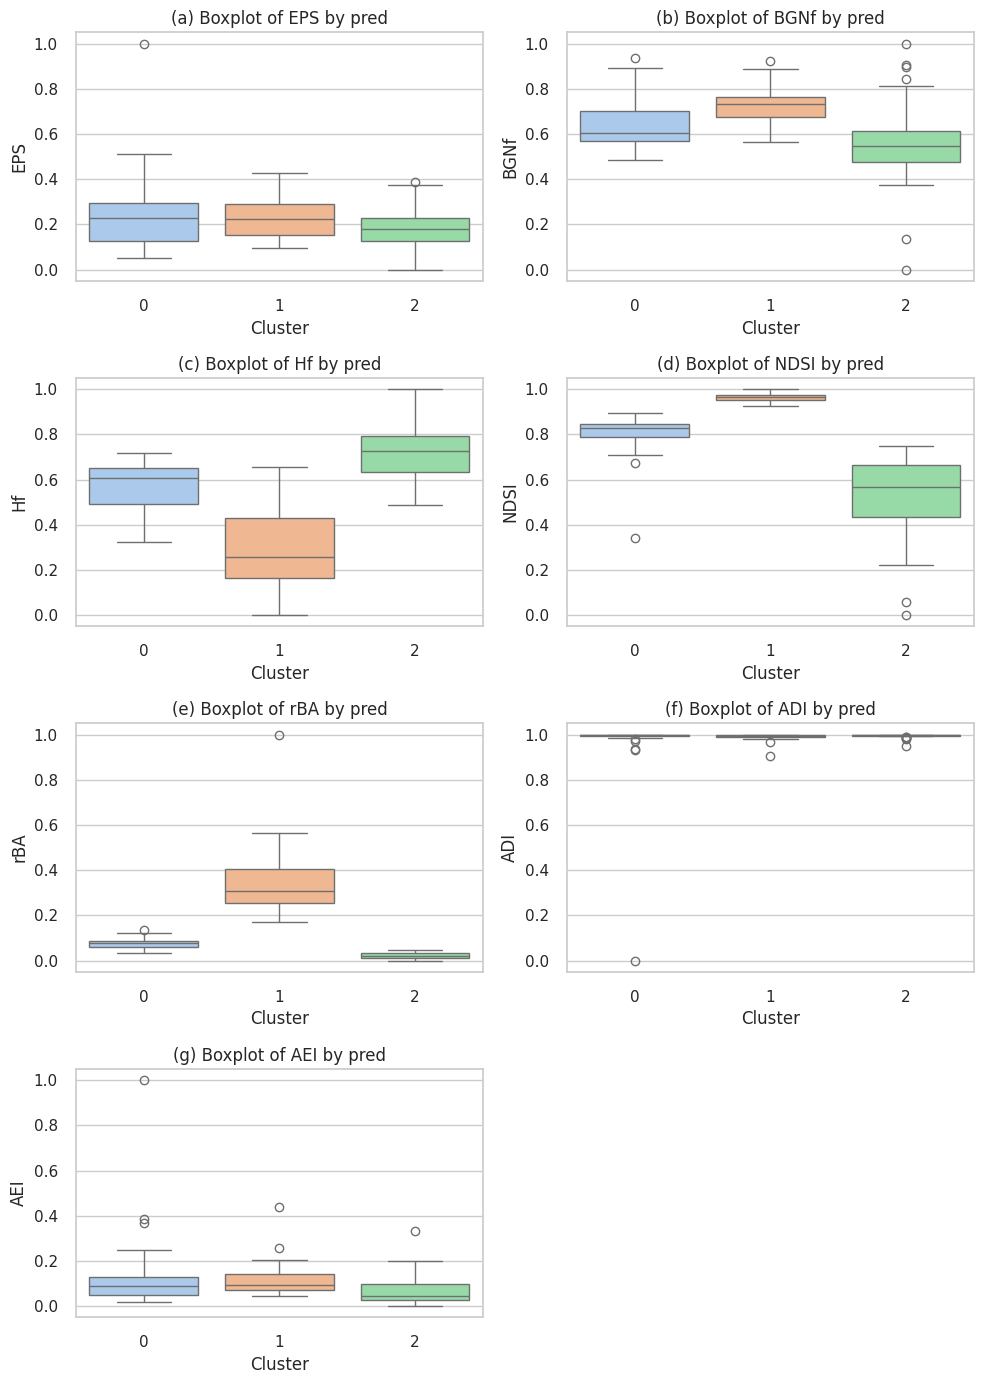

In [ ]:
# Create boxplots

df=  X_train11
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette("pastel")

# Create boxplots
plt.figure(figsize=(10, 14))
subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='pred', y=var, data=df, palette=palette)
    plt.title(f'({subplot_labels[i]}) Boxplot of {var} by pred')
    plt.xlabel('Cluster')
    plt.ylabel(var)

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0508.svg', format='svg')

# Show the plot
plt.show()

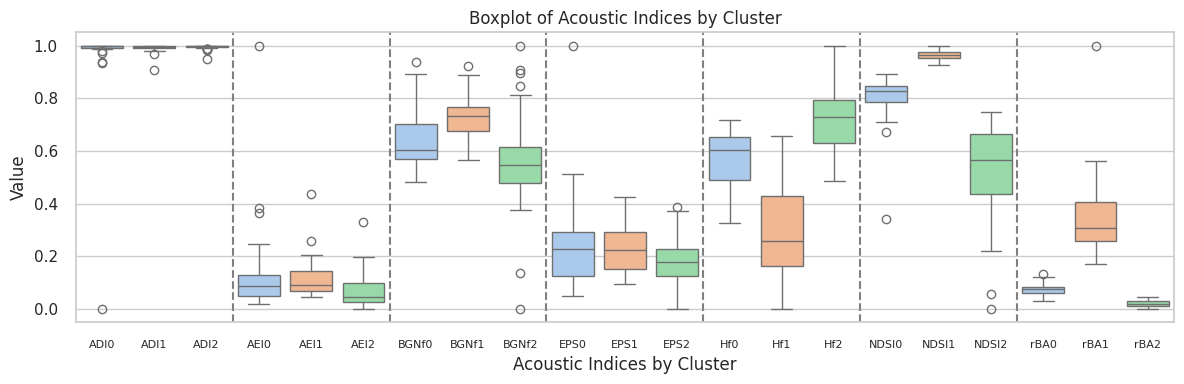

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train11 is your DataFrame
df = X_train11.copy()
df['pred'] = df['pred']

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Remove the legend
ax.legend_.remove()

# Reduce font size of x-ticks
plt.xticks(fontsize=8)

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0508.svg', format='svg')

# Show the plot
plt.show()


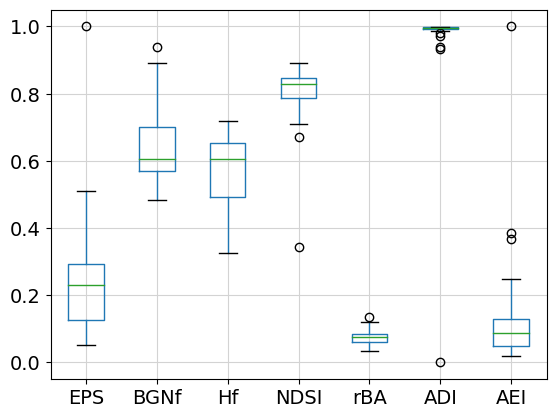

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==0].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


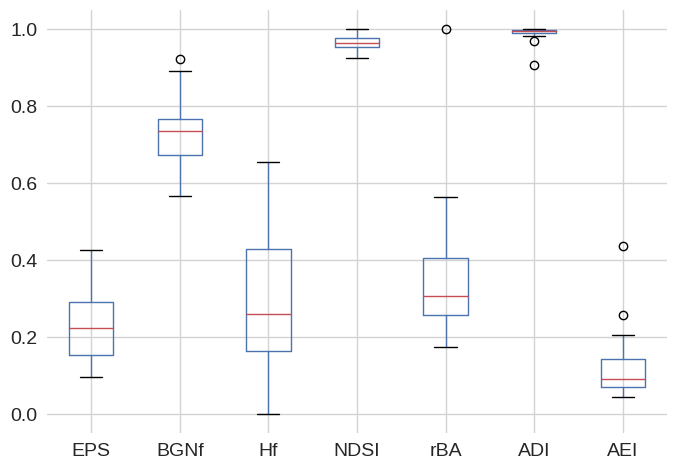

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==1].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


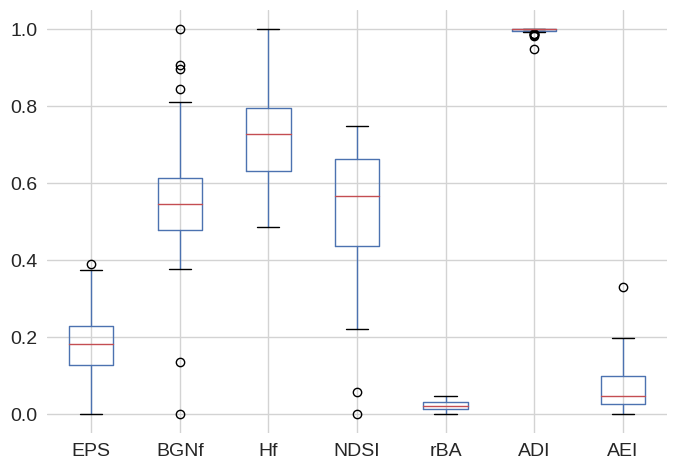

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==2].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


In [ ]:
X_train11.loc[X_train11["pred"]==0].iloc[:,1:7].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000
mean    0.640780   0.572699   0.801410   0.078339   0.951788   0.146284
std     0.113018   0.115813   0.106777   0.025080   0.194917   0.198595
min     0.483207   0.325342   0.343175   0.032962   0.000000   0.018258
25%     0.570027   0.491775   0.786719   0.059920   0.992046   0.049466
50%     0.604839   0.605632   0.829173   0.076585   0.996312   0.087726
75%     0.702013   0.652991   0.846331   0.085311   0.998799   0.130480
max     0.937926   0.719403   0.892422   0.133890   0.999830   1.000000

In [ ]:
X_train11.loc[X_train11["pred"]==1].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  23.000000  23.000000  23.000000  23.000000  23.000000  23.000000  23.0
mean    0.730409   0.303741   0.963116   0.355521   0.989336   0.122932   1.0
std     0.081436   0.183405   0.019123   0.177042   0.019379   0.087011   0.0
min     0.565080   0.000000   0.926038   0.172914   0.906769   0.045522   1.0
25%     0.674042   0.162969   0.953897   0.256927   0.990198   0.070866   1.0
50%     0.734590   0.259220   0.963701   0.307147   0.996040   0.091502   1.0
75%     0.765921   0.429674   0.976049   0.406165   0.997662   0.143508   1.0
max     0.922125   0.655166   1.000000   1.000000   0.999014   0.437520   1.0

In [ ]:
X_train11.loc[X_train11["pred"]==2].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000  42.0
mean    0.552697   0.730078   0.526510   0.022649   0.995514   0.071504   2.0
std     0.177339   0.136598   0.182502   0.013037   0.008736   0.066962   0.0
min     0.000000   0.486992   0.000000   0.000000   0.948771   0.000000   2.0
25%     0.477069   0.631364   0.436315   0.012765   0.995445   0.026329   2.0
50%     0.545373   0.727931   0.567413   0.021467   0.998946   0.046431   2.0
75%     0.613467   0.794393   0.663085   0.031837   0.999644   0.098189   2.0
max     1.000000   1.000000   0.749317   0.047538   1.000000   0.330278   2.0

In [ ]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.231659  0.614171  0.569808  0.825036  0.072990  0.996608  0.083011   
RZUA02   0.113615  0.387257  0.883914  0.608924  0.025340  0.997952  0.064812   
RZUA03b  0.252562  0.937926  0.707006  0.868756  0.099528  0.980288  0.206662   
RZUA04   0.025425  0.593775  0.534289  0.221639  0.004785  0.948771  0.330278   
RZUA05   0.229935  0.499862  0.683358  0.838241  0.079637  0.998287  0.059222   
...           ...       ...       ...       ...       ...       ...       ...   
RZUH09   0.280089  0.889752  0.254405  1.000000  1.000000  0.995036  0.103153   
RZUH10   0.295856  0.517595  0.729806  0.709877  0.039253  0.999222  0.038404   
RZUH11   0.283315  0.769751  0.642386  0.942196  0.214126  0.988976  0.150773   
RZUH12   0.090820  0.755121  0.352238  0.343175  0.133890  0.000000  1.000000   
RZUH13   0.158004  0.463207  0.858034  0.417082  0.011806  0.999681  0.024856   

         pred  component1_prob  component2_prob  component3_prob  
site                                                              
RZUA01      0     1.000000e+00     1.228446e-43     1.331129e-08  
RZUA02      2     2.806835e-57     0.000000e+00     1.000000e+00  
RZUA03b     0     1.000000e+00     6.046409e-26     1.812800e-29  
RZUA04      2     0.000000e+00     0.000000e+00     1.000000e+00  
RZUA05      0     1.000000e+00     2.107558e-34     5.169896e-12  
...       ...              ...              ...              ...  
RZUH09      1     0.000000e+00     1.000000e+00     0.000000e+00  
RZUH10      2     4.684065e-10    2.654101e-165     1.000000e+00  
RZUH11      1     6.970563e-89     1.000000e+00    1.047546e-272  
RZUH12      0     1.000000e+00     0.000000e+00     0.000000e+00  
RZUH13      2    1.846945e-257     0.000000e+00     1.000000e+00  

[91 rows x 11 columns]

In [ ]:
X_train11

AttributeError: ignored

In [ ]:
X_train11.to_csv()

### Multiacoustic index

In [ ]:
import pandas as pd

# Assuming X_train11 is your DataFrame
# Standarize columns from 0 to 1
X_train11_std = (X_train11 - X_train11.min()) / (X_train11.max() - X_train11.min())

# Create the 'multiacoustic' column
X_train11_std['multiacoustic'] = (X_train11_std['EPS'] + X_train11_std['BGNf'] + X_train11_std['Hf'] +
                                  X_train11_std['NDSI'] + X_train11_std['rBA'] + X_train11_std['ADI']
                                )

# Create a new DataFrame with 'pred' and 'multiacoustic' columns
new_df = X_train11_std[['pred', 'multiacoustic']]

# Group by 'pred' and calculate the sum of 'multiacoustic'
sum_multiacoustic_by_pred = new_df.groupby('pred')['multiacoustic'].sum()

# Display the sum of multiacoustic for each value of 'pred'
print(sum_multiacoustic_by_pred)


pred
0.0    212.358095
0.5     23.128989
1.0     59.079979
Name: multiacoustic, dtype: float64


In [ ]:
X_train11.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/5_8.csv")

In [ ]:
X_train11=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/5_8.csv")

## grab_8_17

In [ ]:
DFperiods=grab_8_17[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]
DFperiods

EPS       BGNf        Hf      NDSI       rBA       ADI       AEI
0      0.025347 -40.057560  0.726545  0.742598  6.769961  2.077815  0.032237
1      0.020651 -40.754314  0.810312 -0.083457  0.845943  2.079384  0.005904
2      0.036750 -39.504981  0.813275  0.251428  1.671755  2.078823  0.019998
3      0.041856 -42.166452  0.715250 -0.524116  0.312236  2.077973  0.030064
4      0.020920 -40.392194  0.806780 -0.065705  0.876691  2.079386  0.005760
...         ...        ...       ...       ...       ...       ...       ...
21952  0.028924 -46.280344  0.723974 -0.634734  0.223441  2.057848  0.113178
21953  0.019581 -43.610050  0.707276 -0.884061  0.061537  1.554021  0.525173
21954  0.024065 -46.263116  0.786797 -0.230674  0.625126  1.046860  0.705009
21955  0.028575 -48.535450  0.783244  0.104063  1.232300  2.079318  0.008823
21956  0.026031 -38.742159  0.724986  0.252502  1.675593  2.078570  0.023316

[21957 rows x 7 columns]

#### acoustic indices correlation vs ecological layers

In [ ]:
buffer=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/buffer.csv")
buffer

Unnamed: 0 field_numb   XCOORD.y_x   YCOORD.y_x  FM100_b100mean_100  \
0            0     RZUH04  4957101.251  1949742.623            0.566359   
1            1     RZUH13  4957101.251  1946142.623            0.374368   
2            2     RZUH07  4957101.251  1948542.623            0.860328   
3            3     RZUH03  4957101.251  1950142.623            0.000000   
4            4     RZUH05  4957101.251  1949342.623            0.000000   
..         ...        ...          ...          ...                 ...   
89          89     RZUG11  4956701.251  1946942.623            0.000000   
90          90     RZUG06  4956701.251  1948942.623            0.041330   
91          91     RZUG04  4956701.251  1949742.623            0.006452   
92          92     RZUG02  4956701.251  1950542.623            0.698113   
93          93     RZUG09  4956701.251  1947742.623            0.008590   

    FM100_b100median_100  DN100_b100mean_100  DN100_b100median_100  \
0               0.428571            0.994023              1.000000   
1               0.285714            0.989796              1.000000   
2               1.000000            1.000000              1.000000   
3               0.000000            0.962053              0.966667   
4               0.000000            0.904278              0.905719   
..                   ...                 ...                   ...   
89              0.000000            0.923325              0.952860   
90              0.000000            0.996210              1.000000   
91              0.000000            0.994832              1.000000   
92              1.000000            0.999567              1.000000   
93              0.000000            1.000000              1.000000   

    DI300_b300mean_300  DI300_b300median_300  ...  llanos200_b200mean_200  \
0             0.021562              0.017169  ...                0.633902   
1             0.048132              0.038085  ...                0.708133   
2             0.122280              0.117288  ...                0.634595   
3             0.025790              0.021935  ...                0.539273   
4             0.016334              0.011035  ...                0.473106   
..                 ...                   ...  ...                     ...   
89            0.017890              0.004604  ...                0.593373   
90            0.048203              0.045054  ...                0.368798   
91            0.051862              0.036262  ...                0.503615   
92            0.067338              0.064962  ...                0.774556   
93            0.082559              0.087151  ...                0.420991   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.674904              3.695705                2.964900   
1                   0.677419              4.064086                3.610703   
2                   0.804584              4.178706                4.112499   
3                   0.524573              3.133335                2.844066   
4                   0.470548              2.665966                2.546518   
..                       ...                   ...                     ...   
89                  0.594655              2.725623                2.543377   
90                  0.331849              2.741621                2.661483   
91                  0.440694              3.401347                2.831349   
92                  0.835862              4.935268                5.585879   
93                  0.297308              3.729539                2.966485   

    FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
0             0.406593              0.285714              3.897863   
1             0.351490              0.142857              3.963771   
2             0.537534              0.428571              4.528694   
3             0.074912              0.000000              2.915847   
4             0.006852              0.000000      

In [ ]:
buffer = buffer.rename(columns={'field_numb': 'site'})

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

In [ ]:
columns_to_correlate_with= buffer.iloc[:,4:].columns

In [ ]:
dfmerg=grab_8_17.groupby('site').median()

TypeError: could not convert string to float: '//run/media/vmartinezarias/DBackVMMA/REYZAMURO/DATOS/Pasivo/Ultrasonido//RZUA01/20220907_151500.WAV'

In [ ]:
merged_df = pd.merge(dfmerg, buffer, on="site")
merged_df

NameError: name 'dfmerg' is not defined

In [ ]:
columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)

NameError: name 'merged_df' is not defined

In [ ]:

correlation_df

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
EPS            -0.040720             -0.011731            0.054402   
BGNf           -0.142070             -0.112672           -0.026750   
Hf             -0.062540             -0.060607           -0.015724   
NDSI            0.697801              0.701582            0.367419   
rBA             0.697801              0.701582            0.367419   
ADI             0.467725              0.447834            0.219332   
AEI            -0.463074             -0.443807           -0.212480   

      DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
EPS              -0.143940            0.092122              0.102482   
BGNf             -0.090814           -0.065997             -0.047618   
Hf                0.042265           -0.060405             -0.068223   
NDSI              0.442345            0.384315              0.376839   
rBA               0.442345            0.384315              0.376839   
ADI               0.343827            0.189784              0.175654   
AEI              -0.340165           -0.183470             -0.169881   

      COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
EPS              0.082513              -0.023375            0.115550   
BGNf            -0.084529              -0.093234           -0.070158   
Hf              -0.013568               0.096349           -0.086549   
NDSI             0.535645               0.518279            0.349880   
rBA              0.535645               0.518279            0.349880   
ADI              0.264748               0.365811            0.153686   
AEI             -0.260067              -0.363420           -0.148201   

      DN250_b250median_250  ...  llanos200_b200mean_200  \
EPS              -0.125704  ...                0.070664   
BGNf             -0.172928  ...               -0.054929   
Hf                0.104766  ...                0.008171   
NDSI              0.371093  ...                0.587993   
rBA               0.371093  ...                0.587993   
ADI               0.341292  ...                0.344479   
AEI              -0.338595  ...               -0.340505   

      llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
EPS                   0.089708              0.052213                0.053455   
BGNf                 -0.051114             -0.109172               -0.122956   
Hf                   -0.021898              0.015743                0.006538   
NDSI                  0.590767              0.616328                0.611993   
rBA                   0.590767              0.616328                0.611993   
ADI                   0.350302              0.364549                0.377264   
AEI                  -0.345562             -0.360445               -0.372033   

      FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
EPS            -0.002883             -0.006635              0.038110   
BGNf           -0.146191             -0.104817             -0.116888   
Hf              0.012246              0.017986              0.011177   
NDSI            0.629925              0.606625              0.642943   
rBA             0.629925              0.606625              0.642943   
ADI             0.407131              0.404298              0.397551   
AEI            -0.403215             -0.399991             -0.392855   

      ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
EPS                 0.032186              0.004299               -0.012752  
BGNf               -0.128274             -0.100488               -0.112177  
Hf                  0.001654             -0.058614               -0.039526  
NDSI                0.632352              0.711158                0.695120  
rBA                 0.632352              0.711158                0.695120  
ADI                 0.415295              0.462269                0.469451  
AEI                -0.409992             -0.456475           

In [ ]:
columns_to_correlate_with=['FM100_b100mean_100',  'DN100_b100mean_100',
        'DI100_b100mean_100', 'AD100_b100mean_100',  'COB100_b100mean_100','brillo100_b100mean_100',
        'SLAVI100_b100mean_100', 'SL100_b100mean_100', 'NDMI100_b100mean_100','llanos100_b100mean_100','ICHN100_b100mean_100']

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)
correlation_df.round(2)

FM100_b100mean_100  DN100_b100mean_100  DI100_b100mean_100  \
EPS                -0.04                0.05                0.06   
BGNf               -0.14               -0.03               -0.03   
Hf                 -0.06               -0.02               -0.06   
NDSI                0.70                0.37                0.44   
rBA                 0.70                0.37                0.44   
ADI                 0.47                0.22                0.26   
AEI                -0.46               -0.21               -0.25   

      AD100_b100mean_100  COB100_b100mean_100  brillo100_b100mean_100  \
EPS                -0.01                -0.01                   -0.01   
BGNf               -0.17                -0.12                    0.03   
Hf                 -0.07                -0.07                    0.05   
NDSI                0.73                 0.68                   -0.66   
rBA                 0.73                 0.68                   -0.66   
ADI                 0.51                 0.44                   -0.42   
AEI                -0.51                -0.43                    0.41   

      SLAVI100_b100mean_100  SL100_b100mean_100  NDMI100_b100mean_100  \
EPS                    0.07                0.08                  0.07   
BGNf                  -0.03                0.12                 -0.05   
Hf                    -0.11                0.06                 -0.11   
NDSI                   0.71               -0.13                  0.71   
rBA                    0.71               -0.13                  0.71   
ADI                    0.39               -0.13                  0.39   
AEI                   -0.38                0.13                 -0.39   

      llanos100_b100mean_100  ICHN100_b100mean_100  
EPS                     0.05                  0.00  
BGNf                   -0.05                 -0.10  
Hf                     -0.09                 -0.06  
NDSI                    0.69                  0.71  
rBA                     0.69                  0.71  
ADI                     0.40                  0.46  
AEI                    -0.39                 -0.46

In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(correlation_df > 0.5)
row_index_names = correlation_df.index[indices]
# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": row_index_names,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})

print(result_df)


    Row_Index             Column_Name     Value
0        NDSI      FM100_b100mean_100  0.697801
1        NDSI    FM100_b100median_100  0.701582
2        NDSI     COB300_b300mean_300  0.535645
3        NDSI   COB300_b300median_300  0.518279
4        NDSI     COB200_b200mean_200  0.576674
..        ...                     ...       ...
108       rBA    ICHN200_b200mean_200  0.642943
109       rBA  ICHN200_b200median_200  0.632352
110       rBA    ICHN100_b100mean_100  0.711158
111       rBA  ICHN100_b100median_100  0.695120
112       ADI      AD100_b100mean_100  0.514369

[113 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(np.abs(correlation_df) > 0.69)
row_index_names = correlation_df.index[indices]
# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": row_index_names,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})

result_df


Row_Index              Column_Name     Value
0       NDSI       FM100_b100mean_100  0.697801
1       NDSI     FM100_b100median_100  0.701582
2       NDSI       AD100_b100mean_100  0.725136
3       NDSI    COB100_b100median_100  0.695610
4       NDSI    SLAVI100_b100mean_100  0.707662
5       NDSI  SLAVI100_b100median_100  0.692100
6       NDSI     NDMI100_b100mean_100  0.708731
7       NDSI   NDMI100_b100median_100  0.701535
8       NDSI   llanos100_b100mean_100  0.690467
9       NDSI     ICHN100_b100mean_100  0.711158
10      NDSI   ICHN100_b100median_100  0.695120
11       rBA       FM100_b100mean_100  0.697801
12       rBA     FM100_b100median_100  0.701582
13       rBA       AD100_b100mean_100  0.725136
14       rBA    COB100_b100median_100  0.695610
15       rBA    SLAVI100_b100mean_100  0.707662
16       rBA  SLAVI100_b100median_100  0.692100
17       rBA     NDMI100_b100mean_100  0.708731
18       rBA   NDMI100_b100median_100  0.701535
19       rBA   llanos100_b100mean_100  0.690467
20       rBA     ICHN100_b100mean_100  0.711158
21       rBA   ICHN100_b100median_100  0.695120

In [ ]:
result_df

Row_Index             Column_Name     Value
0        NDSI      FM100_b100mean_100  0.697801
1        NDSI    FM100_b100median_100  0.701582
2        NDSI     COB300_b300mean_300  0.535645
3        NDSI   COB300_b300median_300  0.518279
4        NDSI     COB200_b200mean_200  0.576674
..        ...                     ...       ...
108       rBA    ICHN200_b200mean_200  0.642943
109       rBA  ICHN200_b200median_200  0.632352
110       rBA    ICHN100_b100mean_100  0.711158
111       rBA  ICHN100_b100median_100  0.695120
112       ADI      AD100_b100mean_100  0.514369

[113 rows x 3 columns]

In [ ]:
result_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/rowACINDvsECologicallayerrelationship_8_17.csv")

In [ ]:
correlation_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/CorrelationAIvsEcologicallayers_8_17.csv")

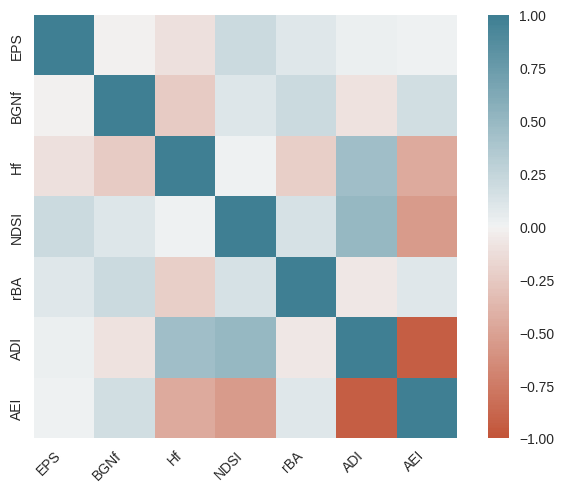

In [ ]:

corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 15)

number of recommended clusters 14


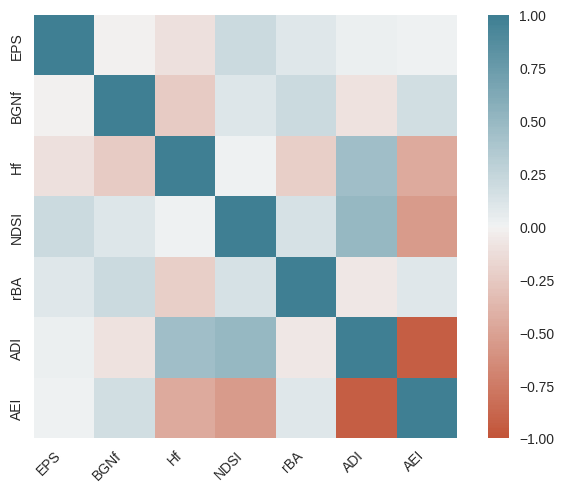

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 25)

number of recommended clusters 24


### Only With the index

In [ ]:
import pandas as pd

In [ ]:
grab_8_17=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/grab_8_17.csv")

In [ ]:
X_train11 = grab_8_17.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [ ]:
DFperiods=X_train11[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]


In [ ]:
DFperiods = DFperiods.reset_index(drop=True)


In [ ]:
DFperiods

EPS       BGNf        Hf      NDSI       rBA       ADI       AEI
0   0.037349 -41.294131  0.681023  0.733510  6.504961  2.079019  0.016325
1   0.041921 -50.266909  0.743658  0.346930  2.062458  2.079167  0.013361
2   0.022219 -35.134349  0.777714  0.288152  1.809588  2.077133  0.038356
3   0.029519 -27.768921  0.765016  0.242314  1.639616  2.047040  0.139949
4   0.009434 -44.448175  0.791702  0.252978  1.677297  2.079138  0.013630
..       ...        ...       ...       ...       ...       ...       ...
91  0.030847 -41.043499  0.740730  0.384188  2.247744  2.063734  0.097676
92  0.036735 -48.410575  0.794041  0.234831  1.613803  2.078353  0.026114
93  0.026938 -31.980851  0.791526 -0.288497  0.552196  2.037583  0.156149
94  0.049309 -40.251008  0.719019 -0.071629  0.866324  2.067278  0.085463
95  0.012559 -49.888363  0.820303 -0.296791  0.542269  2.079218  0.011791

[96 rows x 7 columns]

In [ ]:
pip install scikit-learn clusteval


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from clusteval import clusteval
import matplotlib.pyplot as plt
import numpy as np

# Sample data
df = DFperiods

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to perform clustering and calculate indices
def perform_clustering_and_evaluate(data, clustering_algorithms, cluster_range):
    results = {}
    for name, algo in clustering_algorithms.items():
        print(f"Evaluating {name}...")
        sil_scores = []
        db_scores = []
        ch_scores = []

        for k in cluster_range:
            if name == 'DBSCAN':
                # DBSCAN does not require a fixed number of clusters
                labels = algo.fit_predict(data)
            else:
                if name == 'GaussianMixture':
                    algo.set_params(n_components=k)
                else:
                    algo.set_params(n_clusters=k)
                labels = algo.fit_predict(data)

            if len(set(labels)) > 1:  # Check if there is more than one cluster
                sil_scores.append(silhouette_score(data, labels))
                db_scores.append(davies_bouldin_score(data, labels))
                ch_scores.append(calinski_harabasz_score(data, labels))
            else:
                sil_scores.append(-1)
                db_scores.append(-1)
                ch_scores.append(-1)

        # Determine the best k based on the highest silhouette score, lowest DB score, and highest CH score
        best_k_sil = cluster_range[np.argmax(sil_scores)]
        best_k_db = cluster_range[np.argmin(db_scores)]
        best_k_ch = cluster_range[np.argmax(ch_scores)]

        results[name] = {
            'Silhouette Score Best k': best_k_sil,
            'Davies-Bouldin Index Best k': best_k_db,
            'Calinski-Harabasz Index Best k': best_k_ch
        }

    return results

# Define clustering algorithms
cluster_range = range(2, 11)  # Range of k for KMeans, Agglomerative Clustering, and GMM
clustering_algorithms = {
    'KMeans': KMeans(random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'GaussianMixture': GaussianMixture(random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=2)
}

# Perform clustering and evaluate
results = perform_clustering_and_evaluate(df_scaled, clustering_algorithms, cluster_range)

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Silhouette Score Best k: {result['Silhouette Score Best k']}")
    print(f"Davies-Bouldin Index Best k: {result['Davies-Bouldin Index Best k']}")
    print(f"Calinski-Harabasz Index Best k: {result['Calinski-Harabasz Index Best k']}")

# Using clusteval for automatic evaluation
ce = clusteval(cluster='kmeans')
ce.fit(df_scaled)
print("\nClusteval Results:", ce.results)


Evaluating KMeans...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Evaluating AgglomerativeClustering...
Evaluating GaussianMixture...


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.


Evaluating DBSCAN...

KMeans Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 6
Calinski-Harabasz Index Best k: 7

AgglomerativeClustering Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 2
Calinski-Harabasz Index Best k: 6

GaussianMixture Results:
Silhouette Score Best k: 8
Davies-Bouldin Index Best k: 7
Calinski-Harabasz Index Best k: 7

DBSCAN Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 2
Calinski-Harabasz Index Best k: 2


[clusteval] >INFO:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[clusteval] >INFO:  13%|█▎        | 3/23 [00:00<00:00, 29.77it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init


Clusteval Results: {'evaluate': 'silhouette', 'score':     cluster_threshold  clusters     score
0                   2         2  0.459438
1                   3         3  0.313943
2                   4         4  0.297866
3                   5         5  0.318830
4                   6         6  0.318463
5                   7         7  0.330137
6                   8         8  0.283724
7                   9         9  0.312385
8                  10        10  0.277204
9                  11        11  0.253156
10                 12        12  0.285966
11                 13        13  0.249404
12                 14        14  0.254930
13                 15        15  0.241020
14                 16        16  0.239635
15                 17        17  0.254462
16                 18        18  0.238006
17                 19        19  0.259782
18                 20        20  0.241470
19                 21        21  0.235352
20                 22        22  0.238628
21                 2

In [ ]:
DFperiods.columns

Index(['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI'], dtype='object')

In [ ]:
cd /content/drive/MyDrive/Doctorado/2023/Enero/mdcgenpy/mdcgenpy/Clusters-Features

/content/drive/MyDrive/Doctorado/2023/Enero/mdcgenpy/mdcgenpy/Clusters-Features


In [ ]:
from ClustersFeatures import *

In [ ]:
pip  install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import ClustersFeatures

In [ ]:
!pip install --upgrade pandas
# pandas was likely out of date. Update to the latest version.

import pandas as pd # import pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
from sklearn import metrics

from sklearn.mixture import GaussianMixture

cpred=[]
admis=[]

ncreal=[]
ncpred_slope=[]
ncpred_min=[]
sil=[]
silluette=[]
bh=[]
rtl=[]
sd=[]
db=[]
xb=[]
ch=[]
dnn=[]
mr=[]
pb=[]
rt=[]
wg=[]
dr=[]
c=[]
kgmm=50

varuncer=[]
separation=[]
sil=[]
g1=[]
g2=[]
g3=[]
g4=[]
g5=[]

g6=[]
g7=[]
g8=[]
g9=[]
g10=[]
g11=[]
g12=[]
g13=[]

X_train11=DFperiods.copy()
for l in range(2,kgmm):
  rand=1

  #unce, sep,pred=uncertainity_mean(X_train11,n_components=l)
  GM = GaussianMixture(n_components=l, random_state=rand, covariance_type="full").fit(X_train11)
  pred=GM.predict(X_train11)
  sil.append(metrics.silhouette_score(X_train11, pred, metric='euclidean'))
  X_train11["target"]=pred

  CC=ClustersCharacteristics(X_train11, label_target="target")
  g1.append(CC.score_index_ball_hall())
  g2.append(CC.score_index_ratkowsky_lance())
  g3.append(CC.score_index_SD())
  g5.append(CC.score_index_xie_beni())
  g6.append(CC.score_index_calinski_harabasz())
  g7.append(CC.score_index_dunn())
  g8.append(CC.score_index_mclain_rao())
  g9.append(CC.score_index_point_biserial())
  g10.append(CC.score_index_ray_turi())
  g11.append(CC.score_index_wemmert_gancarski())
  g13.append(CC.score_index_c())

  try:
      g4.append(CC.score_index_davies_bouldin())
  except:
      print("An exception occurred")
      g4.append(0)


silluette.append(np.array(sil).argmax()+2)
bh.append(np.diff(np.array(g1)).argmax()+2)
rtl.append(np.array(g2).argmax()+2)
sd.append(np.array(g3).argmin()+2)
db.append(np.array(g4).argmin()+2)
xb.append(np.array(g5).argmin()+2)
ch.append(np.array(g6).argmax()+2)
dnn.append(np.array(g7).argmax()+2)
mr.append(np.array(g8).argmin()+2)
wg.append(np.array(g11).argmax()+2)
pb.append(np.array(g9).argmax()+2)
rt.append(np.array(g10).argmin()+2)
c.append(np.array(g13).argmin()+2)

ncrecomended=[silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, rt, c]

adm=[]

print(ncrecomended)
cpred.append(ncrecomended)
print("silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, r, c")

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,50):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

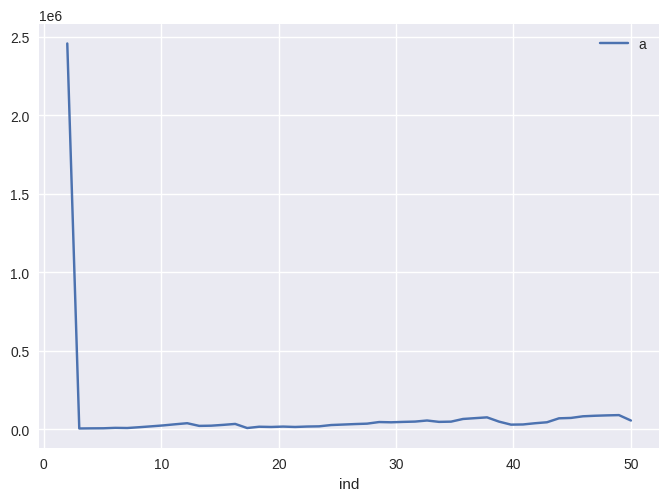

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,10):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

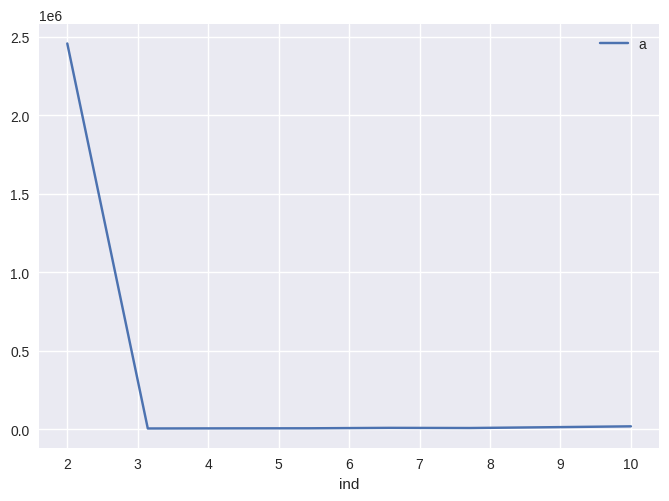

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

### Clustering With the recomended number of clusters

In [ ]:
X_train11 = grab_8_17.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [ ]:
X_train11

EPS       BGNf        Hf      NDSI       rBA       ADI       AEI
site                                                                          
RZUA01   0.037349 -41.294131  0.681023  0.733510  6.504961  2.079019  0.016325
RZUA02   0.041921 -50.266909  0.743658  0.346930  2.062458  2.079167  0.013361
RZUA03a  0.022219 -35.134349  0.777714  0.288152  1.809588  2.077133  0.038356
RZUA03b  0.029519 -27.768921  0.765016  0.242314  1.639616  2.047040  0.139949
RZUA04   0.009434 -44.448175  0.791702  0.252978  1.677297  2.079138  0.013630
...           ...        ...       ...       ...       ...       ...       ...
RZUH09   0.030847 -41.043499  0.740730  0.384188  2.247744  2.063734  0.097676
RZUH10   0.036735 -48.410575  0.794041  0.234831  1.613803  2.078353  0.026114
RZUH11   0.026938 -31.980851  0.791526 -0.288497  0.552196  2.037583  0.156149
RZUH12   0.049309 -40.251008  0.719019 -0.071629  0.866324  2.067278  0.085463
RZUH13   0.012559 -49.888363  0.820303 -0.296791  0.542269  2.079218  0.011791

[96 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train11.values)
X_train11 = pd.DataFrame(scaled_features, index=X_train11.index, columns=X_train11.columns)

In [ ]:
rand=4
GM = GaussianMixture(n_components=3, random_state=rand, covariance_type="full").fit(X_train11)
pred=GM.predict(X_train11)

In [ ]:
GM.means_

array([[0.1299838 , 0.57410428, 0.71732992, 0.43713872, 0.02391842,
        0.93671999, 0.18284047],
       [0.18635531, 0.5297681 , 0.47879993, 0.1265869 , 0.00489722,
        0.17787531, 0.87234309],
       [0.13532909, 0.5477339 , 0.49839272, 0.8807176 , 0.26254098,
        0.99255031, 0.06512143]])

In [ ]:
predproba=GM.predict_proba(X_train11)

In [ ]:
X_train11["pred"]=pred

In [ ]:
predproba.shape

(96, 3)

In [ ]:
X_train11['component1_prob'] = predproba[:, 0]
X_train11['component2_prob'] = predproba[:, 1]
X_train11['component3_prob'] = predproba[:, 2]


In [ ]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.194328  0.623490  0.496349  0.875996  0.154405  0.998286  0.041303   
RZUA02   0.220095  0.373709  0.652204  0.657621  0.047299  0.998886  0.033636   
RZUA03a  0.109055  0.794964  0.736946  0.624418  0.041203  0.990642  0.098289   
RZUA03b  0.150198  1.000000  0.705350  0.598525  0.037105  0.868612  0.361077   
RZUA04   0.037002  0.535689  0.771754  0.604549  0.038013  0.998769  0.034331   
...           ...       ...       ...       ...       ...       ...       ...   
RZUH09   0.157683  0.630467  0.644919  0.678668  0.051767  0.936308  0.251731   
RZUH10   0.190863  0.425385  0.777574  0.594298  0.036483  0.995589  0.066622   
RZUH11   0.135651  0.882750  0.771316  0.298675  0.010888  0.830265  0.402980   
RZUH12   0.261732  0.652528  0.590895  0.421182  0.018462  0.950676  0.220139   
RZUH13   0.054611  0.384247  0.842921  0.293990  0.010649  0.999096  0.029573   

         pred  component1_prob  component2_prob  component3_prob  
site                                                              
RZUA01      2    6.254258e-125              0.0     1.000000e+00  
RZUA02      0     8.790142e-01              0.0     1.209858e-01  
RZUA03a     0     1.000000e+00              0.0     5.723335e-09  
RZUA03b     0     1.000000e+00              0.0     4.762532e-74  
RZUA04      0     9.999986e-01              0.0     1.358428e-06  
...       ...              ...              ...              ...  
RZUH09      0     9.999992e-01              0.0     7.556402e-07  
RZUH10      0     9.999427e-01              0.0     5.728187e-05  
RZUH11      0     1.000000e+00              0.0    1.718495e-160  
RZUH12      0     1.000000e+00              0.0     1.190511e-22  
RZUH13      0     1.000000e+00              0.0     3.567421e-27  

[96 rows x 11 columns]

In [ ]:
X_train11.columns

Index(['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI', 'pred',
       'component1_prob', 'component2_prob', 'component3_prob'],
      dtype='object')

In [ ]:
X_train11.dropna()

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.194328  0.623490  0.496349  0.875996  0.154405  0.998286  0.041303   
RZUA02   0.220095  0.373709  0.652204  0.657621  0.047299  0.998886  0.033636   
RZUA03a  0.109055  0.794964  0.736946  0.624418  0.041203  0.990642  0.098289   
RZUA03b  0.150198  1.000000  0.705350  0.598525  0.037105  0.868612  0.361077   
RZUA04   0.037002  0.535689  0.771754  0.604549  0.038013  0.998769  0.034331   
...           ...       ...       ...       ...       ...       ...       ...   
RZUH09   0.157683  0.630467  0.644919  0.678668  0.051767  0.936308  0.251731   
RZUH10   0.190863  0.425385  0.777574  0.594298  0.036483  0.995589  0.066622   
RZUH11   0.135651  0.882750  0.771316  0.298675  0.010888  0.830265  0.402980   
RZUH12   0.261732  0.652528  0.590895  0.421182  0.018462  0.950676  0.220139   
RZUH13   0.054611  0.384247  0.842921  0.293990  0.010649  0.999096  0.029573   

         pred  component1_prob  component2_prob  component3_prob  
site                                                              
RZUA01      2    6.254258e-125              0.0     1.000000e+00  
RZUA02      0     8.790142e-01              0.0     1.209858e-01  
RZUA03a     0     1.000000e+00              0.0     5.723335e-09  
RZUA03b     0     1.000000e+00              0.0     4.762532e-74  
RZUA04      0     9.999986e-01              0.0     1.358428e-06  
...       ...              ...              ...              ...  
RZUH09      0     9.999992e-01              0.0     7.556402e-07  
RZUH10      0     9.999427e-01              0.0     5.728187e-05  
RZUH11      0     1.000000e+00              0.0    1.718495e-160  
RZUH12      0     1.000000e+00              0.0     1.190511e-22  
RZUH13      0     1.000000e+00              0.0     3.567421e-27  

[96 rows x 11 columns]

In [ ]:
X_train11=X_train11.sort_values(by='pred')
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

In [ ]:

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)


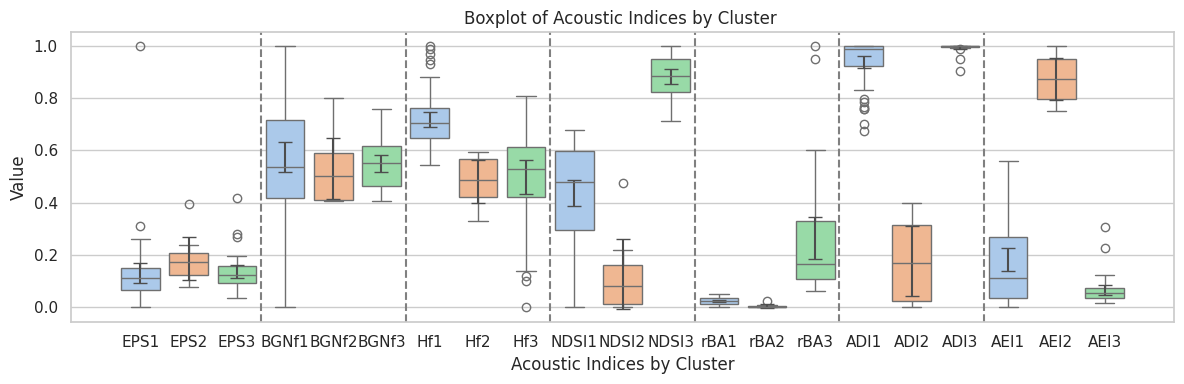

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='#4d4d4d', capsize=5)

plt.title('Boxplot of Acoustic Indices by Cluster ')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_0817.svg', format='svg')

# Show the plot
plt.show()


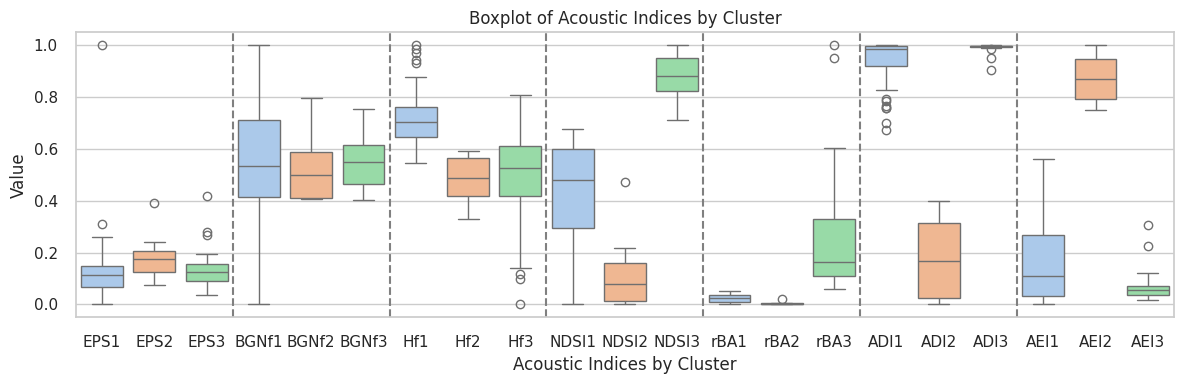

In [ ]:
X_train11=X_train11.sort_values(by='pred')
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

# Show the plot
plt.show()

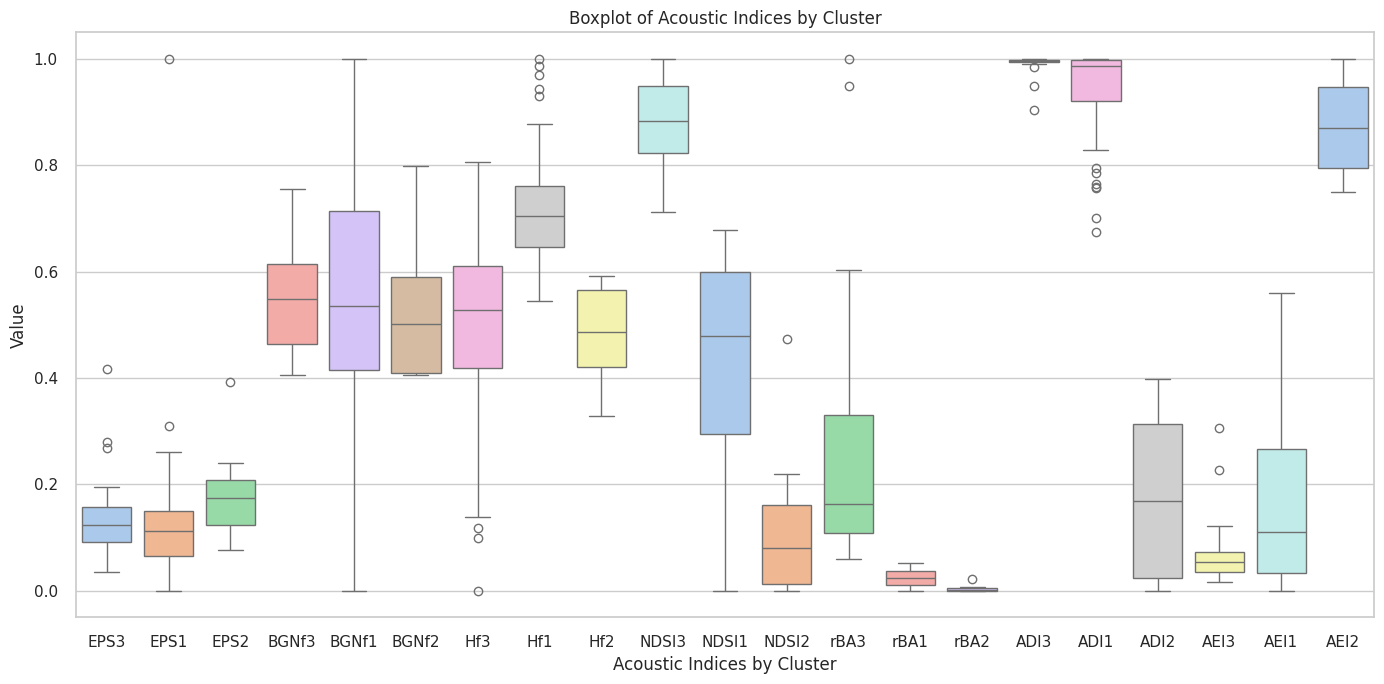

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=  X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette("pastel")

# Create a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Variable_Cluster', y='Value', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Adjust layout
plt.tight_layout()

## Save the plot as an SVG file
#plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

# Show the plot
plt.show()


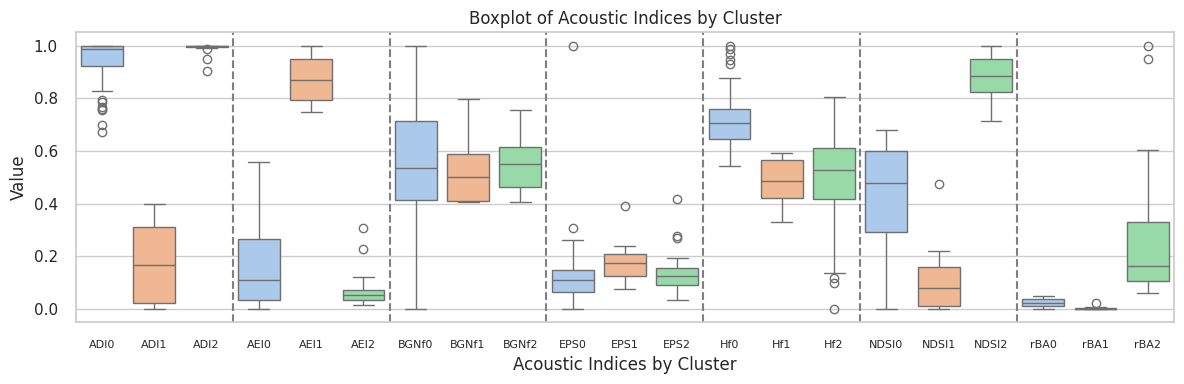

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train11 is your DataFrame
df = X_train11.copy()
df['pred'] = df['pred']

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Remove the legend
ax.legend_.remove()

# Reduce font size of x-ticks
plt.xticks(fontsize=8)

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

# Show the plot
plt.show()

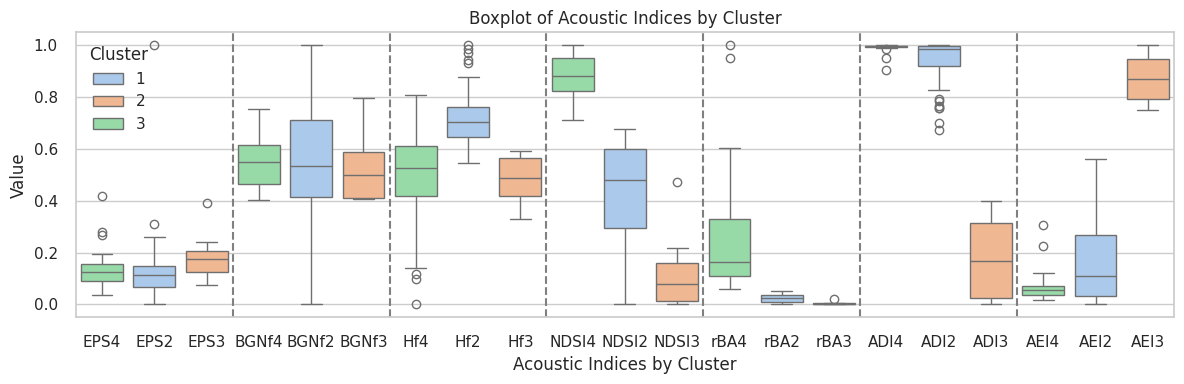

In [ ]:
df=  X_train11

df['pred'] = df['pred'] + 1

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='best')
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

# Show the plot
plt.show()


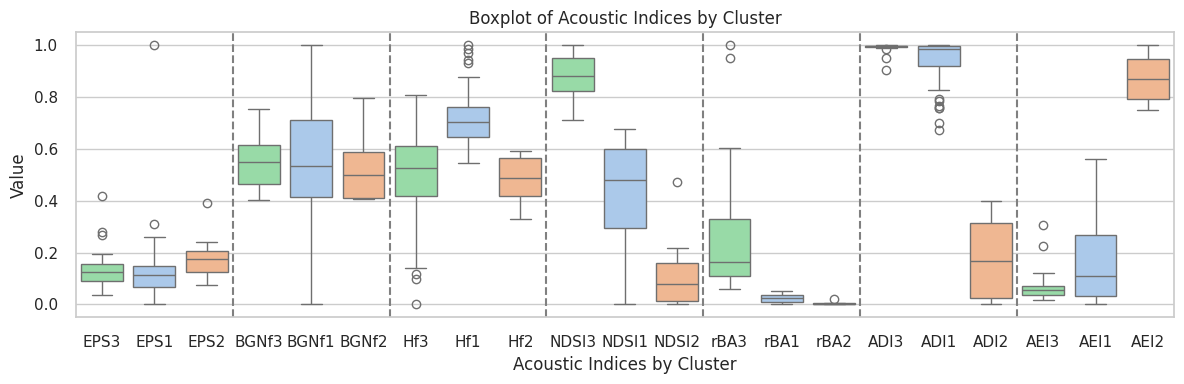

In [ ]:
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Remove the legend
ax.legend_.remove()

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
#plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

# Show the plot
plt.show()

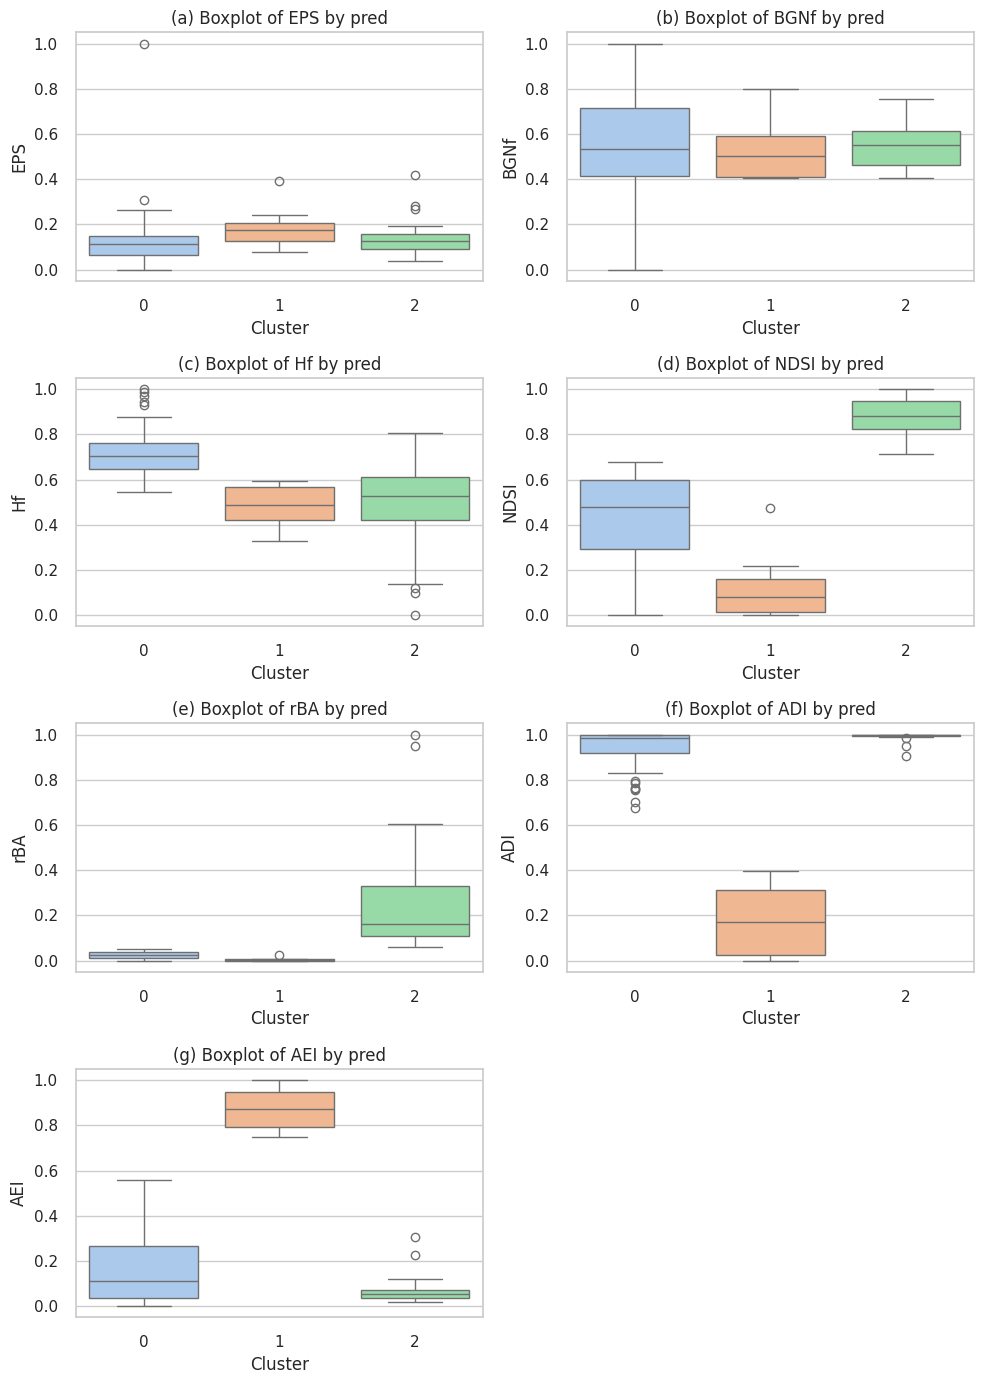

In [ ]:
# Create boxplots

df=  X_train11
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette("pastel")

# Create boxplots
plt.figure(figsize=(10, 14))
subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='pred', y=var, data=df, palette=palette)
    plt.title(f'({subplot_labels[i]}) Boxplot of {var} by pred')
    plt.xlabel('Cluster')
    plt.ylabel(var)


plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

plt.show()

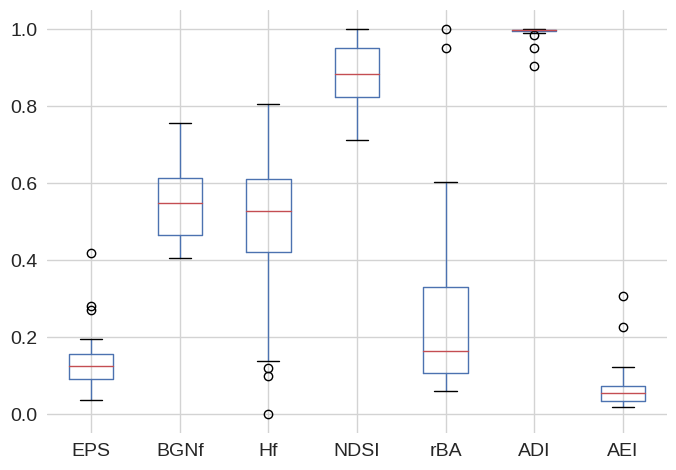

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==0].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


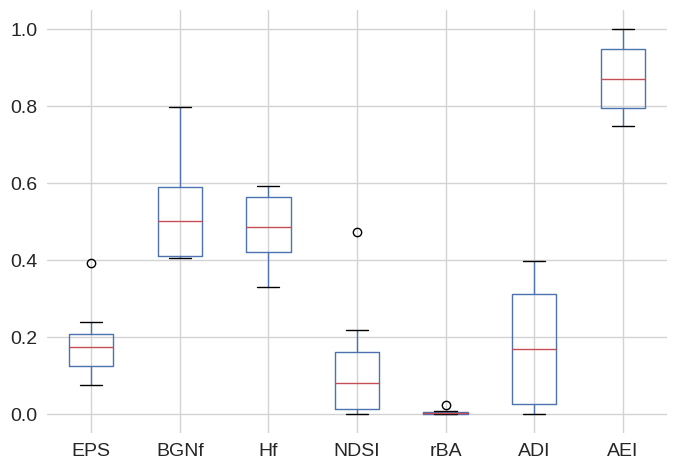

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==1].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


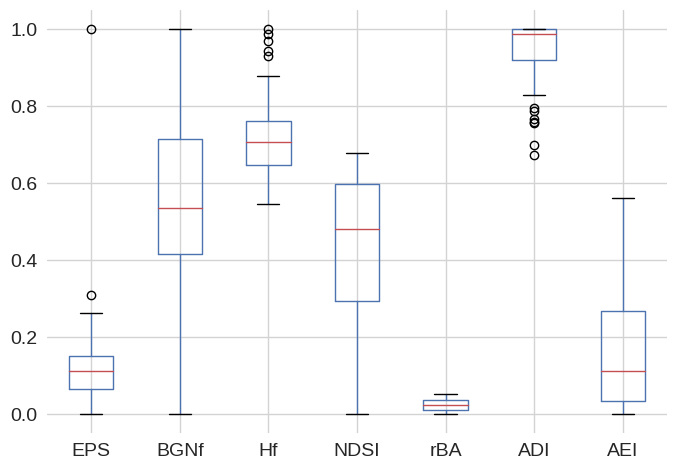

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==2].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


In [ ]:
X_train11.loc[X_train11["pred"]==0].iloc[:,1:7].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI
count  35.000000  35.000000  35.000000  35.000000  35.000000  35.000000
mean    0.548404   0.497900   0.881291   0.263053   0.992530   0.065243
std     0.091691   0.189548   0.082405   0.232269   0.017569   0.056755
min     0.404808   0.000000   0.712752   0.060272   0.903987   0.017006
25%     0.464418   0.419743   0.823468   0.107805   0.994682   0.034829
50%     0.549348   0.528267   0.883272   0.163595   0.996867   0.054348
75%     0.614316   0.610742   0.949609   0.330017   0.998716   0.072056
max     0.755855   0.806543   1.000000   1.000000   0.999672   0.306730

In [ ]:
X_train11.loc[X_train11["pred"]==1].iloc[:,1:8].describe()

BGNf        Hf      NDSI       rBA       ADI       AEI  pred
count  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000   8.0
mean   0.529768  0.478800  0.126587  0.004897  0.177875  0.872343   1.0
std    0.138253  0.098197  0.159857  0.007607  0.160733  0.094234   0.0
min    0.405579  0.328975  0.000439  0.000011  0.000000  0.749275   1.0
25%    0.409422  0.420247  0.012413  0.000326  0.024952  0.794572   1.0
50%    0.501017  0.486652  0.079979  0.002276  0.168782  0.870576   1.0
75%    0.589200  0.564891  0.160930  0.004983  0.313008  0.947862   1.0
max    0.797947  0.591733  0.473086  0.022681  0.398551  1.000000   1.0

In [ ]:
X_train11.loc[X_train11["pred"]==2].iloc[:,1:7].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI
count  53.000000  53.000000  53.000000  53.000000  53.000000  53.000000
mean    0.573622   0.717320   0.437438   0.023945   0.936819   0.182580
std     0.205280   0.109662   0.180160   0.014686   0.087079   0.163863
min     0.000000   0.544716   0.000000   0.000000   0.673902   0.000000
25%     0.415603   0.647265   0.293990   0.010649   0.920632   0.033636
50%     0.535689   0.705350   0.479479   0.023256   0.986859   0.111092
75%     0.713549   0.760218   0.598525   0.037105   0.998886   0.267331
max     1.000000   1.000000   0.678668   0.051767   1.000000   0.560006

### Multiacoustic index

In [ ]:
import pandas as pd

# Assuming X_train11 is your DataFrame
# Standarize columns from 0 to 1
X_train11_std = (X_train11 - X_train11.min()) / (X_train11.max() - X_train11.min())

# Create the 'multiacoustic' column
X_train11_std['multiacoustic'] = (X_train11_std['EPS'] + X_train11_std['BGNf'] + X_train11_std['Hf'] +
                                  X_train11_std['NDSI'] + X_train11_std['rBA'] + X_train11_std['ADI']
                                )

# Create a new DataFrame with 'pred' and 'multiacoustic' columns
new_df = X_train11_std[['pred', 'multiacoustic']]

# Group by 'pred' and calculate the sum of 'multiacoustic'
sum_multiacoustic_by_pred = new_df.groupby('pred')['multiacoustic'].sum()

# Display the sum of multiacoustic for each value of 'pred'
print(sum_multiacoustic_by_pred)


pred
0.0     78.921304
0.5     21.644926
1.0    177.029990
Name: multiacoustic, dtype: float64


In [ ]:
X_train11.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/8_17.csv")

In [ ]:
X_train11=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/8_17.csv")

In [ ]:
X_train11.to_csv("/content/drive/MyDrive/Doctorado/2023/octubre/Resultados_clusteringMembership/8_175.csv")

## grab_17_20

In [ ]:
DFperiods=grab_17_20[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]
DFperiods

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0      0.025347 -40.057560  0.726545  0.742598   6.769961  2.077815  0.032237
1      0.020651 -40.754314  0.810312 -0.083457   0.845943  2.079384  0.005904
2      0.031900 -38.471417  0.782174  0.352287   2.087787  2.079333  0.007561
3      0.036750 -39.504981  0.813275  0.251428   1.671755  2.078823  0.019998
4      0.104367 -28.099873  0.710838  0.811552   9.613030  2.068692  0.074571
...         ...        ...       ...       ...        ...       ...       ...
52086  0.030626 -48.961563  0.737399  0.819047  10.052567  1.843449  0.368089
52087  0.042632 -41.139586  0.621726  0.895068  18.059950  2.073459  0.060390
52088  0.079335 -47.531303  0.701923 -0.378107   0.451266  1.014936  0.690311
52089  0.057021 -38.127653  0.643072  0.853067  12.611658  1.850777  0.370420
52090  0.020140 -51.417252  0.864712  0.417542   2.433724  2.078010  0.030318

[52091 rows x 7 columns]

#### acoustic indices correlation vs ecological layers

In [ ]:
buffer=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/buffer.csv")
buffer

Unnamed: 0 field_numb   XCOORD.y_x   YCOORD.y_x  FM100_b100mean_100  \
0            0     RZUH04  4957101.251  1949742.623            0.566359   
1            1     RZUH13  4957101.251  1946142.623            0.374368   
2            2     RZUH07  4957101.251  1948542.623            0.860328   
3            3     RZUH03  4957101.251  1950142.623            0.000000   
4            4     RZUH05  4957101.251  1949342.623            0.000000   
..         ...        ...          ...          ...                 ...   
89          89     RZUG11  4956701.251  1946942.623            0.000000   
90          90     RZUG06  4956701.251  1948942.623            0.041330   
91          91     RZUG04  4956701.251  1949742.623            0.006452   
92          92     RZUG02  4956701.251  1950542.623            0.698113   
93          93     RZUG09  4956701.251  1947742.623            0.008590   

    FM100_b100median_100  DN100_b100mean_100  DN100_b100median_100  \
0               0.428571            0.994023              1.000000   
1               0.285714            0.989796              1.000000   
2               1.000000            1.000000              1.000000   
3               0.000000            0.962053              0.966667   
4               0.000000            0.904278              0.905719   
..                   ...                 ...                   ...   
89              0.000000            0.923325              0.952860   
90              0.000000            0.996210              1.000000   
91              0.000000            0.994832              1.000000   
92              1.000000            0.999567              1.000000   
93              0.000000            1.000000              1.000000   

    DI300_b300mean_300  DI300_b300median_300  ...  llanos200_b200mean_200  \
0             0.021562              0.017169  ...                0.633902   
1             0.048132              0.038085  ...                0.708133   
2             0.122280              0.117288  ...                0.634595   
3             0.025790              0.021935  ...                0.539273   
4             0.016334              0.011035  ...                0.473106   
..                 ...                   ...  ...                     ...   
89            0.017890              0.004604  ...                0.593373   
90            0.048203              0.045054  ...                0.368798   
91            0.051862              0.036262  ...                0.503615   
92            0.067338              0.064962  ...                0.774556   
93            0.082559              0.087151  ...                0.420991   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.674904              3.695705                2.964900   
1                   0.677419              4.064086                3.610703   
2                   0.804584              4.178706                4.112499   
3                   0.524573              3.133335                2.844066   
4                   0.470548              2.665966                2.546518   
..                       ...                   ...                     ...   
89                  0.594655              2.725623                2.543377   
90                  0.331849              2.741621                2.661483   
91                  0.440694              3.401347                2.831349   
92                  0.835862              4.935268                5.585879   
93                  0.297308              3.729539                2.966485   

    FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
0             0.406593              0.285714              3.897863   
1             0.351490              0.142857              3.963771   
2             0.537534              0.428571              4.528694   
3             0.074912              0.000000              2.915847   
4             0.006852              0.000000      

In [ ]:
buffer = buffer.rename(columns={'field_numb': 'site'})

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

In [ ]:
columns_to_correlate_with= buffer.iloc[:,4:].columns

In [ ]:
dfmerg=grab_17_20.groupby('site').median()

TypeError: could not convert string to float: '//run/media/vmartinezarias/DBackVMMA/REYZAMURO/DATOS/Pasivo/Ultrasonido//RZUA01/20220907_151500.WAV'

In [ ]:
merged_df = pd.merge(dfmerg, buffer, on="site")
merged_df

NameError: name 'dfmerg' is not defined

In [ ]:

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)


NameError: name 'merged_df' is not defined

In [ ]:
correlation_df

NameError: name 'correlation_df' is not defined

In [ ]:
columns_to_correlate_with=['FM100_b100mean_100',  'DN100_b100mean_100',
        'DI100_b100mean_100', 'AD100_b100mean_100',  'COB100_b100mean_100','brillo100_b100mean_100',
        'SLAVI100_b100mean_100', 'SL100_b100mean_100', 'NDMI100_b100mean_100','llanos100_b100mean_100','ICHN100_b100mean_100']

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)
correlation_df.round(2)

FM100_b100mean_100  DN100_b100mean_100  DI100_b100mean_100  \
EPS                -0.17               -0.04               -0.05   
BGNf               -0.02               -0.02               -0.02   
Hf                 -0.22               -0.02               -0.06   
NDSI                0.51                0.30                0.36   
rBA                 0.51                0.30                0.36   
ADI                 0.48                0.27                0.31   
AEI                -0.48               -0.27               -0.31   

      AD100_b100mean_100  COB100_b100mean_100  brillo100_b100mean_100  \
EPS                -0.15                -0.14                    0.13   
BGNf               -0.03                -0.00                   -0.04   
Hf                 -0.23                -0.20                    0.15   
NDSI                0.51                 0.53                   -0.48   
rBA                 0.51                 0.53                   -0.48   
ADI                 0.51                 0.45                   -0.43   
AEI                -0.51                -0.45                    0.42   

      SLAVI100_b100mean_100  SL100_b100mean_100  NDMI100_b100mean_100  \
EPS                   -0.09                0.14                 -0.08   
BGNf                   0.09                0.13                  0.08   
Hf                    -0.28                0.03                 -0.29   
NDSI                   0.53               -0.08                  0.53   
rBA                    0.53               -0.08                  0.53   
ADI                    0.37               -0.16                  0.38   
AEI                   -0.37                0.16                 -0.38   

      llanos100_b100mean_100  ICHN100_b100mean_100  
EPS                    -0.11                 -0.13  
BGNf                    0.08                  0.03  
Hf                     -0.27                 -0.21  
NDSI                    0.51                  0.54  
rBA                     0.51                  0.54  
ADI                     0.38                  0.46  
AEI                    -0.38                 -0.46

In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(np.abs(correlation_df) > 0.69)
row_index_names = correlation_df.index[indices]
# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": row_index_names,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})

result_df


Empty DataFrame
Columns: [Row_Index, Column_Name, Value]
Index: []

In [ ]:
correlation_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/CorrelationAIvsEcologicallayers_5_8.csv")

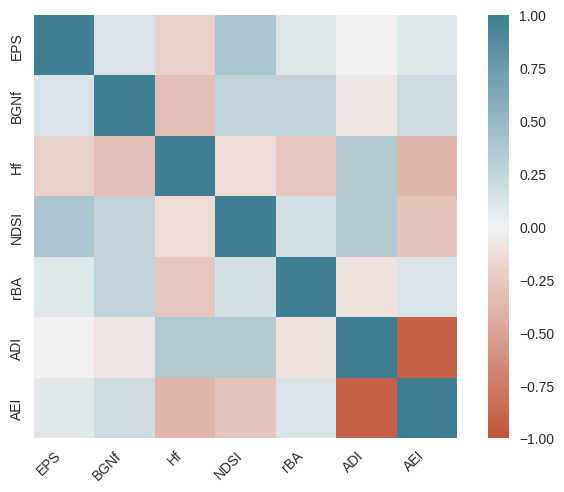

In [ ]:

corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 15)

number of recommended clusters 14


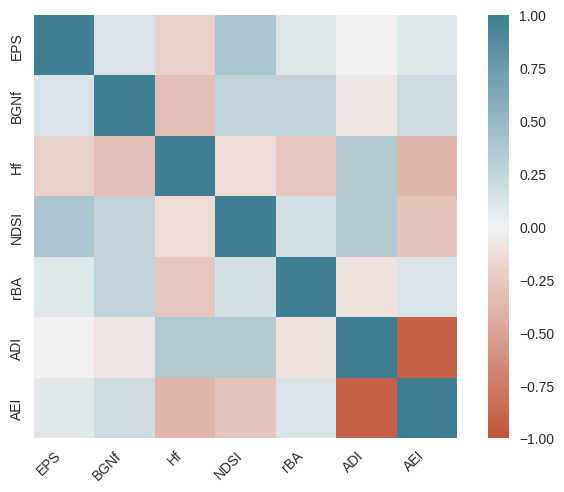

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 25)

number of recommended clusters 24


### Only With the index

In [ ]:
X_train11 = grab_17_20.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [ ]:
DFperiods=X_train11[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]


In [ ]:
DFperiods = DFperiods.reset_index(drop=True)


In [ ]:
DFperiods

EPS       BGNf        Hf      NDSI        rBA       ADI       AEI
0   0.059852 -40.981600  0.685051  0.860387  13.325362  2.078581  0.022630
1   0.029937 -50.702227  0.781285  0.355152   2.101800  2.079115  0.014463
2   0.022219 -35.134349  0.777714  0.288152   1.809588  2.077133  0.038356
3   0.050461 -33.436352  0.760843  0.774186   7.856887  2.047844  0.139374
4   0.015040 -45.102790  0.749793  0.188624   1.464947  2.076644  0.040968
..       ...        ...       ...       ...        ...       ...       ...
91  0.044738 -37.740521  0.710368  0.924978  25.658802  2.065958  0.088051
92  0.059937 -46.374092  0.712973  0.706383   5.811607  2.073579  0.057597
93  0.050190 -33.368819  0.773104  0.535485   3.305589  2.047469  0.139961
94  0.051028 -40.095325  0.716840 -0.063968   0.879756  2.065090  0.091367
95  0.014551 -50.050742  0.815904 -0.245535   0.605736  2.079083  0.014670

[96 rows x 7 columns]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from clusteval import clusteval
import matplotlib.pyplot as plt
import numpy as np

# Sample data
df = DFperiods

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to perform clustering and calculate indices
def perform_clustering_and_evaluate(data, clustering_algorithms, cluster_range):
    results = {}
    for name, algo in clustering_algorithms.items():
        print(f"Evaluating {name}...")
        sil_scores = []
        db_scores = []
        ch_scores = []

        for k in cluster_range:
            if name == 'DBSCAN':
                # DBSCAN does not require a fixed number of clusters
                labels = algo.fit_predict(data)
            else:
                if name == 'GaussianMixture':
                    algo.set_params(n_components=k)
                else:
                    algo.set_params(n_clusters=k)
                labels = algo.fit_predict(data)

            if len(set(labels)) > 1:  # Check if there is more than one cluster
                sil_scores.append(silhouette_score(data, labels))
                db_scores.append(davies_bouldin_score(data, labels))
                ch_scores.append(calinski_harabasz_score(data, labels))
            else:
                sil_scores.append(-1)
                db_scores.append(-1)
                ch_scores.append(-1)

        # Determine the best k based on the highest silhouette score, lowest DB score, and highest CH score
        best_k_sil = cluster_range[np.argmax(sil_scores)]
        best_k_db = cluster_range[np.argmin(db_scores)]
        best_k_ch = cluster_range[np.argmax(ch_scores)]

        results[name] = {
            'Silhouette Score Best k': best_k_sil,
            'Davies-Bouldin Index Best k': best_k_db,
            'Calinski-Harabasz Index Best k': best_k_ch
        }

    return results

# Define clustering algorithms
cluster_range = range(2, 11)  # Range of k for KMeans, Agglomerative Clustering, and GMM
clustering_algorithms = {
    'KMeans': KMeans(random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'GaussianMixture': GaussianMixture(random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=2)
}

# Perform clustering and evaluate
results = perform_clustering_and_evaluate(df_scaled, clustering_algorithms, cluster_range)

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Silhouette Score Best k: {result['Silhouette Score Best k']}")
    print(f"Davies-Bouldin Index Best k: {result['Davies-Bouldin Index Best k']}")
    print(f"Calinski-Harabasz Index Best k: {result['Calinski-Harabasz Index Best k']}")

# Using clusteval for automatic evaluation
ce = clusteval(cluster='kmeans')
ce.fit(df_scaled)
print("\nClusteval Results:", ce.results)


Evaluating KMeans...
Evaluating AgglomerativeClustering...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Evaluating GaussianMixture...


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.


Evaluating DBSCAN...

KMeans Results:
Silhouette Score Best k: 3
Davies-Bouldin Index Best k: 7
Calinski-Harabasz Index Best k: 8

AgglomerativeClustering Results:
Silhouette Score Best k: 4
Davies-Bouldin Index Best k: 10
Calinski-Harabasz Index Best k: 7

GaussianMixture Results:
Silhouette Score Best k: 4
Davies-Bouldin Index Best k: 8
Calinski-Harabasz Index Best k: 7

DBSCAN Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 2
Calinski-Harabasz Index Best k: 2


[clusteval] >INFO:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/


Clusteval Results: {'evaluate': 'silhouette', 'score':     cluster_threshold  clusters     score
0                   2         2  0.265295
1                   3         3  0.289821
2                   4         4  0.288471
3                   5         5  0.255037
4                   6         6  0.266675
5                   7         7  0.265027
6                   8         8  0.278156
7                   9         9  0.257771
8                  10        10  0.256246
9                  11        11  0.244893
10                 12        12  0.236976
11                 13        13  0.229501
12                 14        14  0.229619
13                 15        15  0.209002
14                 16        16  0.217744
15                 17        17  0.207332
16                 18        18  0.192553
17                 19        19  0.205544
18                 20        20  0.203476
19                 21        21  0.197320
20                 22        22  0.200992
21                 2

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,50):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

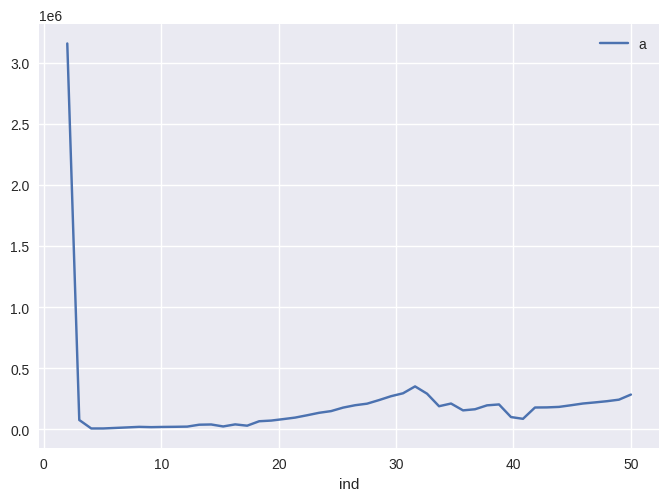

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,10):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

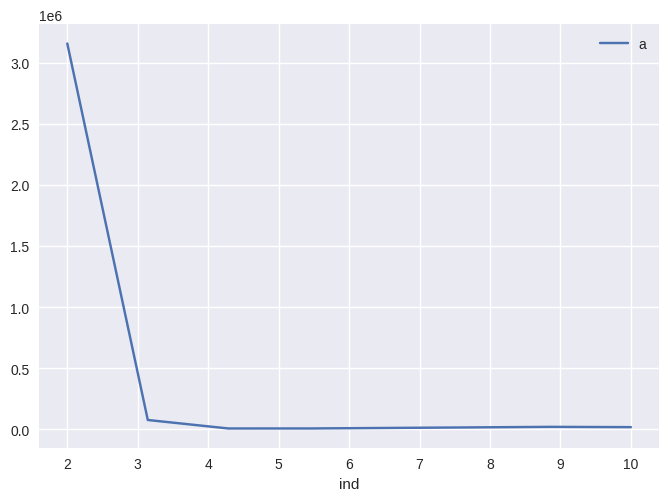

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

### Clustering With the recomended number of clusters

In [ ]:
X_train11 = grab_17_20.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [ ]:
X_train11

EPS       BGNf        Hf      NDSI        rBA       ADI  \
site                                                                    
RZUA01   0.059852 -40.981600  0.685051  0.860387  13.325362  2.078581   
RZUA02   0.029937 -50.702227  0.781285  0.355152   2.101800  2.079115   
RZUA03a  0.022219 -35.134349  0.777714  0.288152   1.809588  2.077133   
RZUA03b  0.050461 -33.436352  0.760843  0.774186   7.856887  2.047844   
RZUA04   0.015040 -45.102790  0.749793  0.188624   1.464947  2.076644   
...           ...        ...       ...       ...        ...       ...   
RZUH09   0.044738 -37.740521  0.710368  0.924978  25.658802  2.065958   
RZUH10   0.059937 -46.374092  0.712973  0.706383   5.811607  2.073579   
RZUH11   0.050190 -33.368819  0.773104  0.535485   3.305589  2.047469   
RZUH12   0.051028 -40.095325  0.716840 -0.063968   0.879756  2.065090   
RZUH13   0.014551 -50.050742  0.815904 -0.245535   0.605736  2.079083   

              AEI  
site               
RZUA01   0.022630  
RZUA02   0.014463  
RZUA03a  0.038356  
RZUA03b  0.139374  
RZUA04   0.040968  
...           ...  
RZUH09   0.088051  
RZUH10   0.057597  
RZUH11   0.139961  
RZUH12   0.091367  
RZUH13   0.014670  

[96 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train11.values)
X_train11 = pd.DataFrame(scaled_features, index=X_train11.index, columns=X_train11.columns)

In [ ]:
rand=2
GM = GaussianMixture(n_components=4, random_state=rand, covariance_type="full").fit(X_train11)
pred=GM.predict(X_train11)

In [ ]:
GM.means_

array([[0.29875073, 0.69823607, 0.48263219, 0.81800657, 0.11216492,
        0.94250661, 0.20808167],
       [0.11950578, 0.49111556, 0.73222798, 0.3957343 , 0.01665053,
        0.99191533, 0.06562938],
       [0.25607865, 0.73292498, 0.30186064, 0.97328725, 0.48661549,
        0.98262997, 0.11601087],
       [0.26700435, 0.64632629, 0.46320424, 0.40658993, 0.01849301,
        0.79313986, 0.42322054]])

In [ ]:
predproba=GM.predict_proba(X_train11)

In [ ]:
X_train11["pred"]=pred

In [ ]:
predproba.shape

(96, 4)

In [ ]:
X_train11['component1_prob'] = predproba[:, 0]
X_train11['component2_prob'] = predproba[:, 1]
X_train11['component3_prob'] = predproba[:, 2]
X_train11['component4_prob'] = predproba[:, 3]


In [ ]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.334079  0.724879  0.419177  0.919372  0.197404  0.996105  0.062496   
RZUA02   0.158715  0.423472  0.707281  0.547813  0.025471  0.998520  0.039552   
RZUA03a  0.113468  0.906184  0.696589  0.498540  0.020994  0.989545  0.106674   
RZUA03b  0.279030  0.958834  0.646080  0.855978  0.113633  0.856853  0.390459   
RZUA04   0.071381  0.597093  0.613000  0.425345  0.015715  0.987328  0.114010   
...           ...       ...       ...       ...       ...       ...       ...   
RZUH09   0.245479  0.825375  0.494971  0.966873  0.386339  0.938917  0.246280   
RZUH10   0.334580  0.557674  0.502770  0.806115  0.082301  0.973440  0.160726   
RZUH11   0.277441  0.960928  0.682788  0.680433  0.043911  0.855153  0.392108   
RZUH12   0.282353  0.752359  0.514348  0.239585  0.006750  0.934981  0.255596   
RZUH13   0.068515  0.443673  0.810921  0.106057  0.002553  0.998379  0.040134   

         pred  component1_prob  component2_prob  component3_prob  \
site                                                               
RZUA01      0     1.000000e+00     0.000000e+00     1.958996e-15   
RZUA02      1     2.170933e-15     1.000000e+00     0.000000e+00   
RZUA03a     1     1.117099e-13     9.999985e-01     0.000000e+00   
RZUA03b     0     1.000000e+00    2.659390e-287    1.129059e-174   
RZUA04      1     6.079899e-22     9.998516e-01     0.000000e+00   
...       ...              ...              ...              ...   
RZUH09      2     3.078290e-18     0.000000e+00     1.000000e+00   
RZUH10      0     1.000000e+00     2.886003e-73    8.775055e-216   
RZUH11      0     9.998547e-01    3.776818e-145     0.000000e+00   
RZUH12      3     2.493048e-47     6.177146e-16     0.000000e+00   
RZUH13      1     2.669712e-91     1.000000e+00     0.000000e+00   

         component4_prob  
site                      
RZUA01      0.000000e+00  
RZUA02      1.531876e-11  
RZUA03a     1.466973e-06  
RZUA03b    7.009073e-130  
RZUA04      1.483732e-04  
...                  ...  
RZUH09      0.000000e+00  
RZUH10      4.233716e-58  
RZUH11      1.453438e-04  
RZUH12      1.000000e+00  
RZUH13      4.737830e-17  

[96 rows x 12 columns]

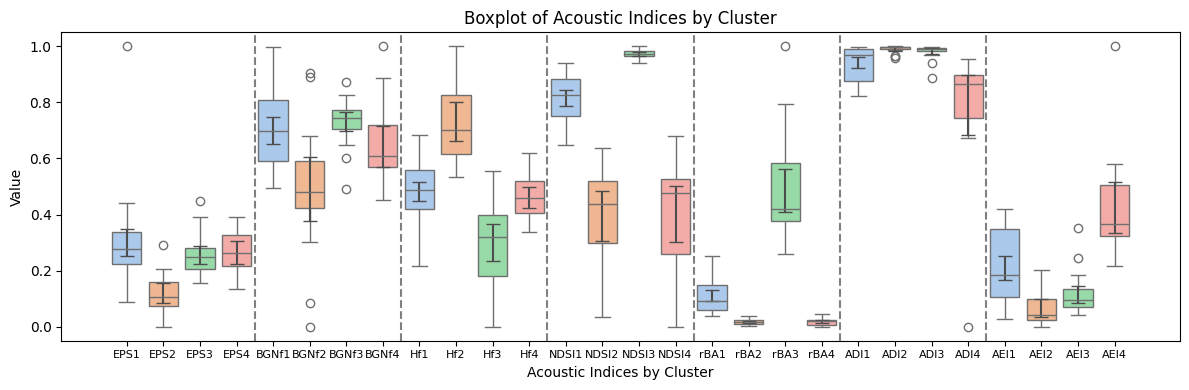

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
X_train11=X_train11.sort_values(by='pred')
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
palette = sns.color_palette("pastel", 4)

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='#4d4d4d', capsize=5)

plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [4, 8, 12, 16,20,24]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_red17-20.svg', format='svg')

# Show the plot
plt.show()


In [ ]:
2:4, 3:2, 4:3

In [ ]:
X_train111=X_train11.copy()

In [ ]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                           
RZUA01  0.334079  0.724879  0.419177  0.919372  0.197404  0.996105  0.062496   
RZUG04  0.305775  0.582802  0.362190  0.818140  0.088455  0.836036  0.409504   
RZUC03  0.274671  0.566978  0.490099  0.749339  0.060577  0.987855  0.113032   
RZUC07  0.088455  0.702478  0.418540  0.867324  0.123581  0.992184  0.089966   
RZUF02  0.256028  0.772682  0.409940  0.940381  0.253867  0.877844  0.362152   
...          ...       ...       ...       ...       ...       ...       ...   
RZUC08  0.230426  0.587167  0.480399  0.506686  0.021675  0.920256  0.290760   
RZUF08  0.233329  0.485608  0.433917  0.388827  0.013537  0.871264  0.358737   
RZUF11  0.376331  0.606536  0.519720  0.175675  0.004576  0.860880  0.378226   
RZUG12  0.328731  1.000000  0.532199  0.681303  0.044079  0.756086  0.502725   
RZUH12  0.282353  0.752359  0.514348  0.239585  0.006750  0.934981  0.255596   

        pred  component1_prob  component2_prob  component3_prob  \
site                                                              
RZUA01     0     1.000000e+00     0.000000e+00     1.958996e-15   
RZUG04     0     1.000000e+00    3.344123e-222    3.266142e-273   
RZUC03     0     1.000000e+00     5.837782e-26     0.000000e+00   
RZUC07     0     1.000000e+00    1.169958e-306     2.791974e-72   
RZUF02     0     1.000000e+00     0.000000e+00     7.927898e-18   
...      ...              ...              ...              ...   
RZUC08     3     2.165536e-11     1.577413e-23     0.000000e+00   
RZUF08     3     2.185328e-23    4.642451e-113     0.000000e+00   
RZUF11     3     6.264550e-56    5.257058e-145     0.000000e+00   
RZUG12     3     1.490572e-05     0.000000e+00     0.000000e+00   
RZUH12     3     2.493048e-47     6.177146e-16     0.000000e+00   

        component4_prob  
site                     
RZUA01     0.000000e+00  
RZUG04     4.919190e-62  
RZUC03     3.276390e-24  
RZUC07    4.663942e-189  
RZUF02     0.000000e+00  
...                 ...  
RZUC08     1.000000e+00  
RZUF08     1.000000e+00  
RZUF11     1.000000e+00  
RZUG12     9.999851e-01  
RZUH12     1.000000e+00  

[96 rows x 12 columns]

In [ ]:
X_train111["pred"] = X_train111["pred"].replace({1: 3, 2: 1, 3: 2})


In [ ]:
X_train111

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                           
RZUA01  0.334079  0.724879  0.419177  0.919372  0.197404  0.996105  0.062496   
RZUG04  0.305775  0.582802  0.362190  0.818140  0.088455  0.836036  0.409504   
RZUC03  0.274671  0.566978  0.490099  0.749339  0.060577  0.987855  0.113032   
RZUC07  0.088455  0.702478  0.418540  0.867324  0.123581  0.992184  0.089966   
RZUF02  0.256028  0.772682  0.409940  0.940381  0.253867  0.877844  0.362152   
...          ...       ...       ...       ...       ...       ...       ...   
RZUC08  0.230426  0.587167  0.480399  0.506686  0.021675  0.920256  0.290760   
RZUF08  0.233329  0.485608  0.433917  0.388827  0.013537  0.871264  0.358737   
RZUF11  0.376331  0.606536  0.519720  0.175675  0.004576  0.860880  0.378226   
RZUG12  0.328731  1.000000  0.532199  0.681303  0.044079  0.756086  0.502725   
RZUH12  0.282353  0.752359  0.514348  0.239585  0.006750  0.934981  0.255596   

        pred  component1_prob  component2_prob  component3_prob  \
site                                                              
RZUA01     0     1.000000e+00     0.000000e+00     1.958996e-15   
RZUG04     0     1.000000e+00    3.344123e-222    3.266142e-273   
RZUC03     0     1.000000e+00     5.837782e-26     0.000000e+00   
RZUC07     0     1.000000e+00    1.169958e-306     2.791974e-72   
RZUF02     0     1.000000e+00     0.000000e+00     7.927898e-18   
...      ...              ...              ...              ...   
RZUC08     2     2.165536e-11     1.577413e-23     0.000000e+00   
RZUF08     2     2.185328e-23    4.642451e-113     0.000000e+00   
RZUF11     2     6.264550e-56    5.257058e-145     0.000000e+00   
RZUG12     2     1.490572e-05     0.000000e+00     0.000000e+00   
RZUH12     2     2.493048e-47     6.177146e-16     0.000000e+00   

        component4_prob  
site                     
RZUA01     0.000000e+00  
RZUG04     4.919190e-62  
RZUC03     3.276390e-24  
RZUC07    4.663942e-189  
RZUF02     0.000000e+00  
...                 ...  
RZUC08     1.000000e+00  
RZUF08     1.000000e+00  
RZUF11     1.000000e+00  
RZUG12     9.999851e-01  
RZUH12     1.000000e+00  

[96 rows x 12 columns]

In [ ]:
X_train111["pred"] = X_train111["pred"].replace({ 2: 3,3:2})


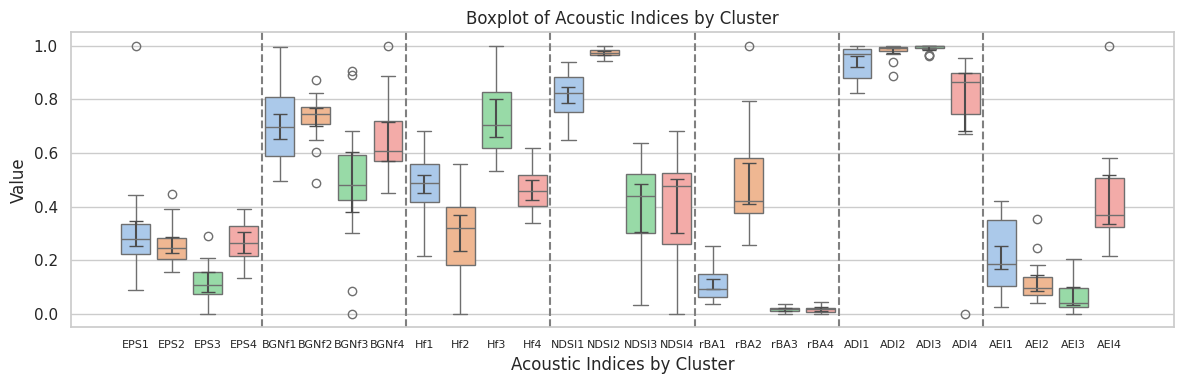

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
X_train111=X_train111.sort_values(by='pred')
df = X_train111

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']
palette = sns.color_palette("pastel", 4)

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='#4d4d4d', capsize=5)

plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [4, 8, 12, 16,20,24]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_red17-20.svg', format='svg')

# Show the plot
plt.show()


<ipython-input-18-39ee59c99752>:46: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)


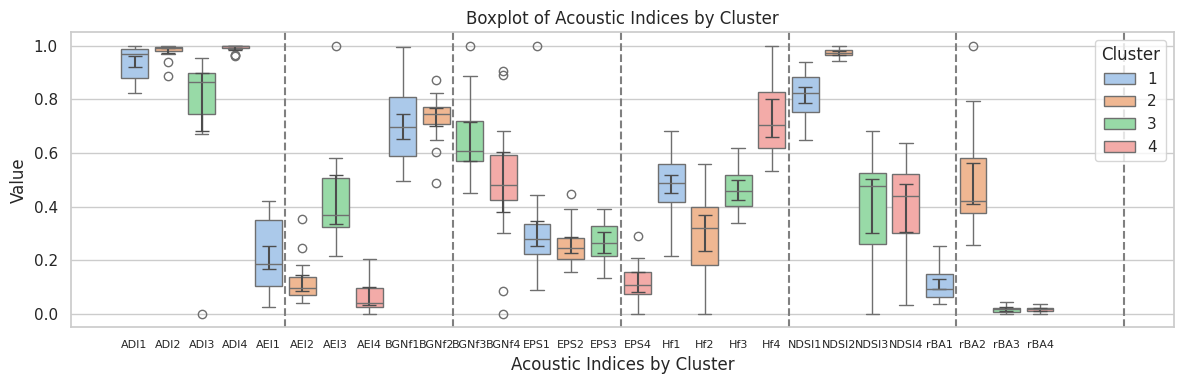

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


# Assuming X_train11 is your DataFrame
X_train111 = X_train111.sort_values(by='pred')
df = X_train111.copy()
df['pred'] = df['pred'] + 1

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 5)

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
#for idx, row in summary_df.iterrows():
 #   x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
 #   plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='#4d4d4d', capsize=5)


# Add confidence intervals with darker grey error bars, clipped between 0 and 1
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]

    # Clip the confidence intervals to the range [0, 1]
    ci_lower_clipped = max(0, row['ci_lower'])
    ci_upper_clipped = min(1, row['ci_upper'])

    # Plot the error bars with clipped intervals
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - ci_lower_clipped], [ci_upper_clipped - row['mean_value']]],
                 fmt='none', c='#4d4d4d', capsize=5)  # Darker grey color


plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
##ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_red17-20.svg', format='svg')

# Show the plot
plt.show()


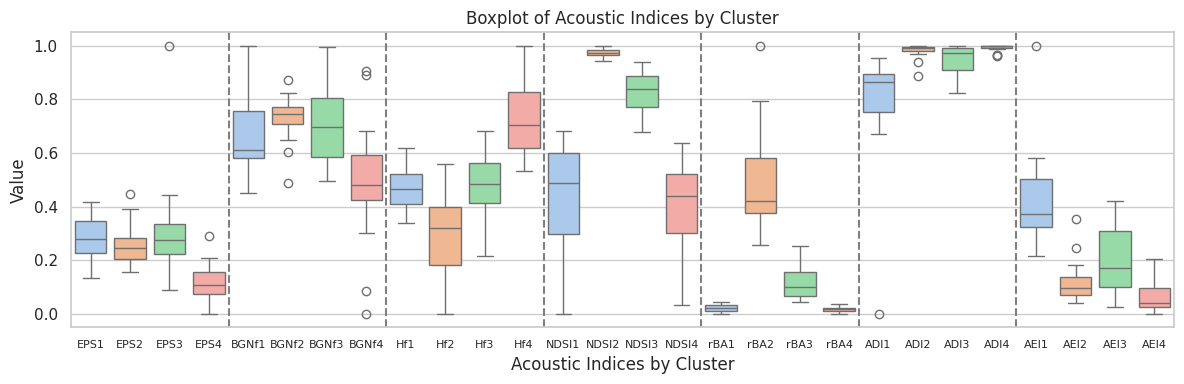

In [ ]:
X_train11=X_train11.sort_values(by='pred')
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 4)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [4, 8, 12, 16,20,24]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots17-20.svg', format='svg')

# Show the plot
plt.show()

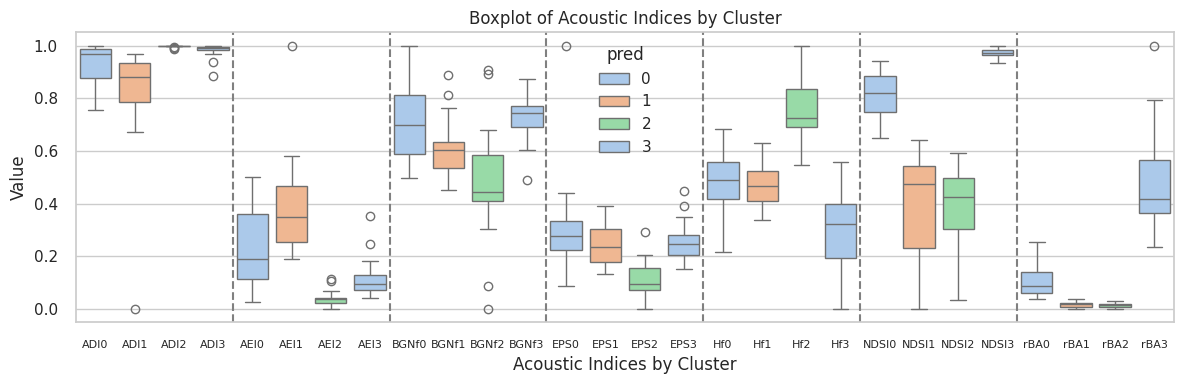

In [ ]:
# Assuming X_train11 is your DataFrame
df = X_train11.copy()
df['pred'] = df['pred']

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)


# Add vertical lines to separate groups of acoustic indices
index_positions = [4, 8, 12, 16,20,24]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
#plt.legend(title='Cluster', loc='best')
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots17-20.svg', format='svg')

# Show the plot
plt.show()


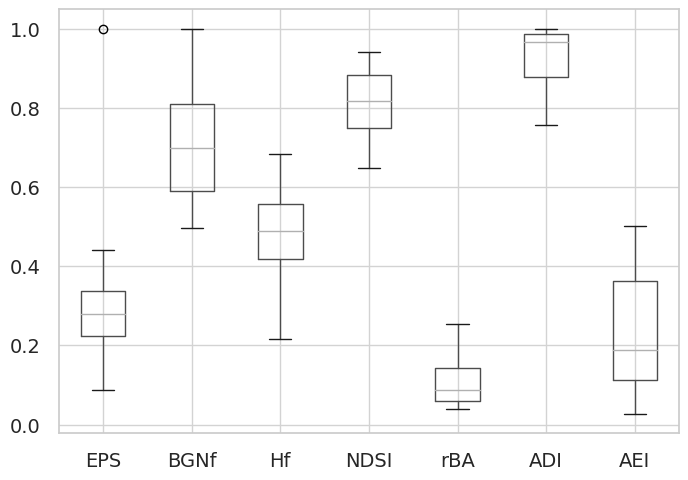

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==0].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


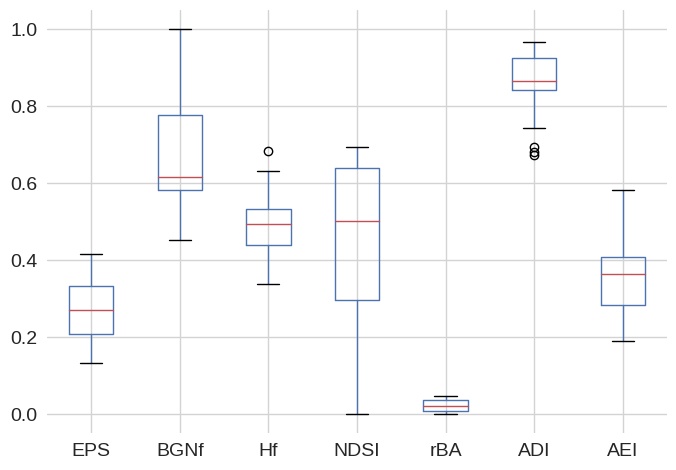

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==1].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


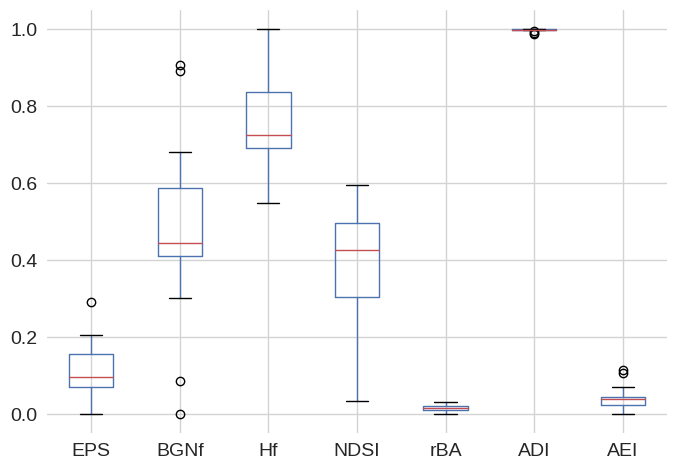

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==2].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


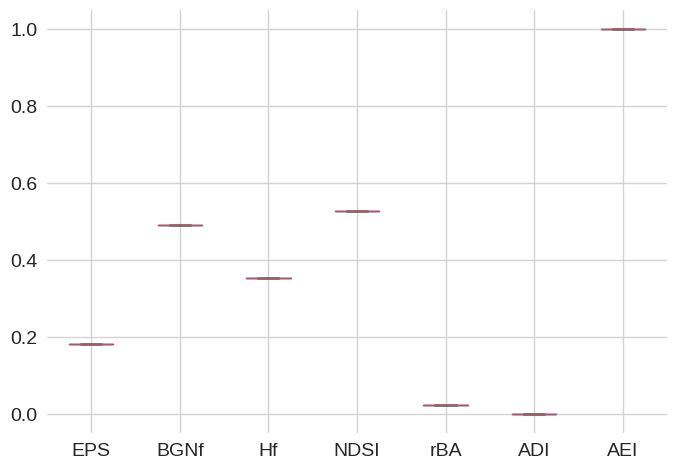

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==3].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot

In [ ]:
X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  56.000000  56.000000  56.000000  56.000000  56.000000  56.000000  56.0
mean    0.704667   0.404496   0.890941   0.270395   0.964220   0.159426   0.0
std     0.117279   0.150554   0.089314   0.219036   0.046850   0.108892   0.0
min     0.489594   0.000000   0.677672   0.043384   0.824516   0.027333   0.0
25%     0.604802   0.326654   0.823433   0.091426   0.959213   0.077053   0.0
50%     0.723302   0.418858   0.910071   0.192724   0.984231   0.128173   0.0
75%     0.773466   0.505290   0.968498   0.398785   0.994109   0.204380   0.0
max     0.997087   0.652913   1.000000   1.000000   0.999208   0.419193   0.0

<Axes: >

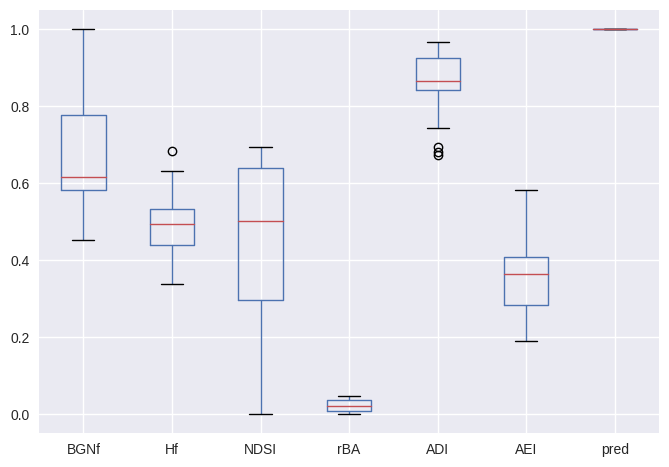

In [ ]:
X_train11.loc[X_train11["pred"]==1].iloc[:,1:8].boxplot()

In [ ]:
X_train11.loc[X_train11["pred"]==1].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  29.000000  29.000000  29.000000  29.000000  29.000000  29.000000  29.0
mean    0.711729   0.321591   0.958710   0.424553   0.984783   0.107952   1.0
std     0.086583   0.147722   0.033340   0.201470   0.022645   0.066820   0.0
min     0.489594   0.000000   0.862878   0.149260   0.885970   0.027333   1.0
25%     0.675779   0.215868   0.951007   0.295128   0.985321   0.070934   1.0
50%     0.731778   0.331835   0.968174   0.396206   0.991340   0.094663   1.0
75%     0.762858   0.419177   0.977644   0.485456   0.995129   0.122515   1.0
max     0.872871   0.557147   1.000000   1.000000   0.999208   0.352595   1.0

In [ ]:
X_train11.loc[X_train11["pred"]==2]

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                           
RZUC10  0.001724  0.086121  0.974545  0.107408  0.002589  0.999490  0.022967   
RZUH08  0.292082  0.000000  0.838884  0.034099  0.000761  0.998442  0.040476   

        pred  component1_prob  component2_prob  component3_prob  \
site                                                              
RZUC10     2    1.007818e-133              0.0              1.0   
RZUH08     2    5.545772e-146              0.0              1.0   

        component4_prob  
site                     
RZUC10     7.792469e-15  
RZUH08     2.297282e-17

<Axes: >

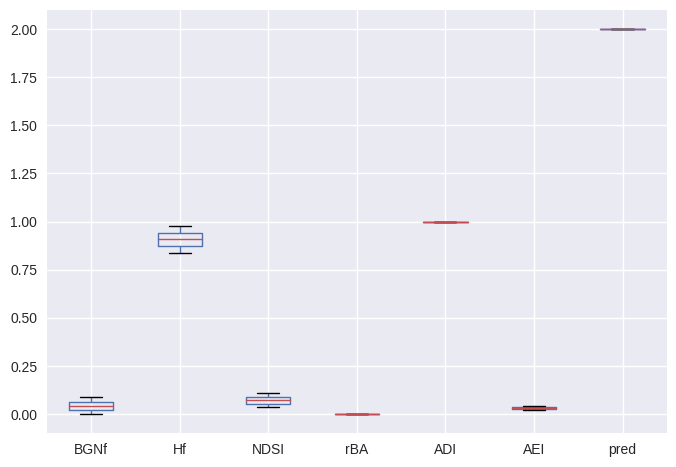

In [ ]:
X_train11.loc[X_train11["pred"]==2].iloc[:,1:8].boxplot()

In [ ]:
X_train11.loc[X_train11["pred"]==2].iloc[:,1:8].describe()

BGNf        Hf      NDSI       rBA       ADI       AEI  pred
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   2.0
mean   0.043061  0.906714  0.070753  0.001675  0.998966  0.031721   2.0
std    0.060897  0.095927  0.051837  0.001293  0.000741  0.012381   0.0
min    0.000000  0.838884  0.034099  0.000761  0.998442  0.022967   2.0
25%    0.021530  0.872799  0.052426  0.001218  0.998704  0.027344   2.0
50%    0.043061  0.906714  0.070753  0.001675  0.998966  0.031721   2.0
75%    0.064591  0.940630  0.089080  0.002132  0.999228  0.036099   2.0
max    0.086121  0.974545  0.107408  0.002589  0.999490  0.040476   2.0

<Axes: >

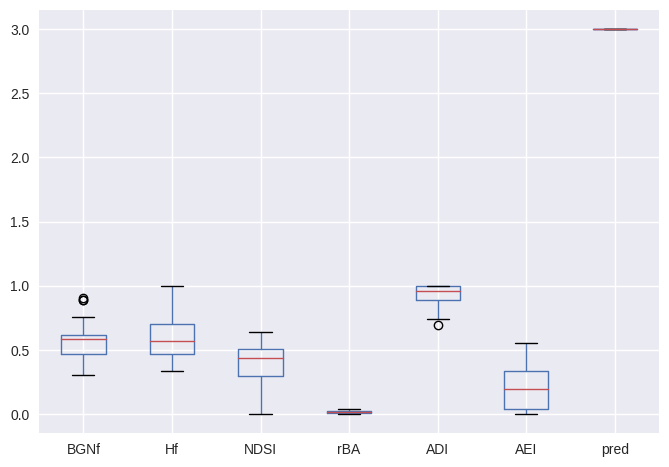

In [ ]:
X_train11.loc[X_train11["pred"]==3].iloc[:,1:8].boxplot()

In [ ]:
X_train11.loc[X_train11["pred"]==3].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000  30.0
mean    0.575530   0.598962   0.391002   0.016056   0.932793   0.203888   3.0
std     0.144223   0.161231   0.169917   0.009520   0.081034   0.166485   0.0
min     0.302346   0.337062   0.000000   0.000000   0.694470   0.000000   3.0
25%     0.466362   0.469750   0.300039   0.009163   0.891050   0.040865   3.0
50%     0.580991   0.567755   0.438000   0.016551   0.962360   0.196412   3.0
75%     0.615832   0.697777   0.504650   0.021505   0.998326   0.334697   3.0
max     0.906184   1.000000   0.636927   0.036460   1.000000   0.556630   3.0

### Multiacoustic index

In [ ]:
import pandas as pd

# Assuming X_train11 is your DataFrame
# Standarize columns from 0 to 1
X_train11_std = (X_train11 - X_train11.min()) / (X_train11.max() - X_train11.min())

# Create the 'multiacoustic' column
X_train11_std['multiacoustic'] = (X_train11_std['EPS'] + X_train11_std['BGNf'] + X_train11_std['Hf'] +
                                  X_train11_std['NDSI'] + X_train11_std['rBA'] + X_train11_std['ADI']
                                )

# Create a new DataFrame with 'pred' and 'multiacoustic' columns
new_df = X_train11_std[['pred', 'multiacoustic']]

# Group by 'pred' and calculate the sum of 'multiacoustic'
sum_multiacoustic_by_pred = new_df.groupby('pred')['multiacoustic'].sum()

# Display the sum of multiacoustic for each value of 'pred'
print(sum_multiacoustic_by_pred)


pred
0.000000     65.095317
0.333333    113.556005
0.666667     27.709185
1.000000     99.389050
Name: multiacoustic, dtype: float64


In [ ]:
X_train11.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/17_20.csv")

In [ ]:
X_train11=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/17_20.csv")

## grab_20_5

In [ ]:
grab_20_5

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42184.433333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  37504.333333   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  35730.216667   
...                                                  ...           ...   
18668  //home/vmartinezarias/Documents/Zamuro/Ultraso...  27633.883333   
18669  //home/vmartinezarias/Documents/Zamuro/Ultraso...  49143.033333   
18670  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
18671  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
18672  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   

              MEANt      VARt     SKEWt        KURTt       LEQt       BGNt  \
0      1.142055e-18  0.000277  0.182959     6.675471  57.451929 -26.156468   
1      1.970453e-18  0.004055  0.113164     7.852549  69.100988 -15.658711   
2     -1.951400e-18  0.000847  0.176509     4.174465  62.298943 -21.222775   
3     -7.835842e-19  0.001333  0.147227     3.845278  64.269777 -19.089482   
4      1.695933e-18  0.000957  0.156159     4.031604  62.829261 -20.851121   
...             ...       ...       ...          ...        ...        ...   
18668  3.268026e-19  0.006049  0.011314    19.251389  70.837145 -31.156853   
18669 -8.158019e-20  0.000084  0.572356   865.726561  52.272966 -39.258278   
18670 -3.340258e-19  0.000024  0.293895    63.263822  46.752417 -37.743231   
18671 -1.824929e-19  0.000327  0.249309     8.718704  58.170666 -29.269617   
18672  1.538507e-19  0.000184 -0.881932  1360.450964  55.657117 -34.952636   

            SNRt       MED  ...  H_pairedShannon       H_gamma  H_GiniSimpson  \
0       1.277365  0.049224  ...         5.873870  22433.577147       0.988887   
1       1.498894  0.164841  ...         5.424755  13444.077145       0.980831   
2       0.788980  0.086868  ...         5.822363  19385.732591       0.988115   
3       0.530537  0.111052  ...         5.671608  17240.157140       0.983900   
4       0.791152  0.090666  ...         5.685977  17194.258586       0.985292   
...          ...       ...  ...              ...           ...            ...   
18668  18.617222  0.027679  ...         4.176259   3130.245168       0.930496   
18669   5.168180  0.010891  ...         4.597325  13223.336267       0.949799   
18670   0.871930  0.012967  ...         5.581744  32595.486456       0.964435   
18671   4.180969  0.034397  ...         4.861547   8821.773712       0.966599   
18672   6.535912  0.017880  ...         5.368712  16719.467573       0.979979   

           RAOQ       AGI  ROItotal  ROIcover     fecha  hora    site  
0      0.324124  1.242176      1783  1.611886  20220912     4  RZUH04  
1      0.221803  1.292969      1002  2.655821  20220904     0  RZUH04  
2      0.278771  1.246790      1220  1.304390  20220910    21  RZUH04  
3      0.332952  1.255043      1371  1.349765  20220907     2  RZUH04  
4      0.314829  1.277282      1411  4.136651  20220905    22  RZUH04  
...         ...       ...       ...       ...       ...   ...     ...  
18668  0.054771  2.149579       191  8.290021  20220910     3  RZUG09  
18669  0.159263  1.283760      1288  1.533540  20220910    21  RZUG09  
18670  0.513556  1.226161       662  0.290968  20220909    20  RZUG09  
18671  0.106330  1.303232       460  7.063804  20220907     2  RZUG09  
18672  0.255939  1.346266       962  5.464904  20220909     1  RZUG09  

[18673 rows x 61 columns]

#### acoustic indices correlation vs ecological layers

In [ ]:
buffer=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/buffer.csv")
buffer

Unnamed: 0 field_numb   XCOORD.y_x   YCOORD.y_x  FM100_b100mean_100  \
0            0     RZUH04  4957101.251  1949742.623            0.566359   
1            1     RZUH13  4957101.251  1946142.623            0.374368   
2            2     RZUH07  4957101.251  1948542.623            0.860328   
3            3     RZUH03  4957101.251  1950142.623            0.000000   
4            4     RZUH05  4957101.251  1949342.623            0.000000   
..         ...        ...          ...          ...                 ...   
89          89     RZUG11  4956701.251  1946942.623            0.000000   
90          90     RZUG06  4956701.251  1948942.623            0.041330   
91          91     RZUG04  4956701.251  1949742.623            0.006452   
92          92     RZUG02  4956701.251  1950542.623            0.698113   
93          93     RZUG09  4956701.251  1947742.623            0.008590   

    FM100_b100median_100  DN100_b100mean_100  DN100_b100median_100  \
0               0.428571            0.994023              1.000000   
1               0.285714            0.989796              1.000000   
2               1.000000            1.000000              1.000000   
3               0.000000            0.962053              0.966667   
4               0.000000            0.904278              0.905719   
..                   ...                 ...                   ...   
89              0.000000            0.923325              0.952860   
90              0.000000            0.996210              1.000000   
91              0.000000            0.994832              1.000000   
92              1.000000            0.999567              1.000000   
93              0.000000            1.000000              1.000000   

    DI300_b300mean_300  DI300_b300median_300  ...  llanos200_b200mean_200  \
0             0.021562              0.017169  ...                0.633902   
1             0.048132              0.038085  ...                0.708133   
2             0.122280              0.117288  ...                0.634595   
3             0.025790              0.021935  ...                0.539273   
4             0.016334              0.011035  ...                0.473106   
..                 ...                   ...  ...                     ...   
89            0.017890              0.004604  ...                0.593373   
90            0.048203              0.045054  ...                0.368798   
91            0.051862              0.036262  ...                0.503615   
92            0.067338              0.064962  ...                0.774556   
93            0.082559              0.087151  ...                0.420991   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.674904              3.695705                2.964900   
1                   0.677419              4.064086                3.610703   
2                   0.804584              4.178706                4.112499   
3                   0.524573              3.133335                2.844066   
4                   0.470548              2.665966                2.546518   
..                       ...                   ...                     ...   
89                  0.594655              2.725623                2.543377   
90                  0.331849              2.741621                2.661483   
91                  0.440694              3.401347                2.831349   
92                  0.835862              4.935268                5.585879   
93                  0.297308              3.729539                2.966485   

    FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
0             0.406593              0.285714              3.897863   
1             0.351490              0.142857              3.963771   
2             0.537534              0.428571              4.528694   
3             0.074912              0.000000              2.915847   
4             0.006852              0.000000      

In [ ]:
buffer = buffer.rename(columns={'field_numb': 'site'})

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

In [ ]:
columns_to_correlate_with= buffer.iloc[:,4:].columns

In [ ]:
dfmerg=grab_20_5.groupby('site').median()

In [ ]:
merged_df = pd.merge(dfmerg, buffer, on="site")
merged_df

site           ZCR         MEANt      VARt     SKEWt      KURTt  \
0    RZUA01  37755.866667 -1.305861e-20  0.000179  0.176312   4.441558   
1   RZUA03b  36901.566667 -1.087093e-20  0.000218 -0.008224  16.340826   
2    RZUA04  39142.216667 -8.553150e-21  0.000358  0.182674  12.114477   
3    RZUA05  32310.916667 -9.514958e-20  0.001547  0.107066   5.210297   
4    RZUA06  34262.116667 -1.212861e-20  0.000106  0.238157   7.751450   
..      ...           ...           ...       ...       ...        ...   
82   RZUH09  35274.400000  1.369082e-19  0.000937  0.070509   4.875837   
83   RZUH10  31655.350000  1.646783e-20  0.000155  0.229089  23.807276   
84   RZUH11  26122.650000  3.088772e-20  0.000434  0.105032  13.961981   
85   RZUH12  24673.816667  2.821239e-19  0.001434  0.060212  22.931350   
86   RZUH13  34905.533333 -3.918548e-20  0.000117 -0.134892   6.673832   

         LEQt       BGNt      SNRt       MED  ...  llanos200_b200mean_200  \
0   55.548055 -29.046182  0.703515  0.035294  ...                0.795398   
1   56.402506 -30.162997  1.925297  0.031035  ...                0.755343   
2   58.554370 -33.623101  2.081554  0.020837  ...                0.749858   
3   64.914675 -20.014261  1.076922  0.099836  ...                0.809439   
4   53.281036 -31.371195  1.168010  0.027005  ...                0.796449   
..        ...        ...       ...       ...  ...                     ...   
82  62.736622 -21.061308  0.817143  0.088499  ...                0.664315   
83  54.925157 -30.953798  1.378965  0.028334  ...                0.583928   
84  59.395191 -28.704292  2.087992  0.036710  ...                0.562262   
85  64.581967 -22.793508  2.844787  0.073080  ...                0.629958   
86  53.706193 -32.889613  0.659455  0.022674  ...                0.708133   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.836820              5.325404                5.851573   
1                   0.834219              5.283113                5.843880   
2                   0.822070              5.104708                5.570202   
3                   0.840400              5.245824                5.571301   
4                   0.834217              4.790583                5.339644   
..                       ...                   ...                     ...   
82                  0.825853              4.506451                4.877590   
83                  0.539715              3.477128                2.783963   
84                  0.557710              2.815906                2.622182   
85                  0.628251              3.192513                3.180277   
86                  0.677419              4.064086                3.610703   

    FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
0             0.842404              1.000000              5.564949   
1             0.701164              1.000000              5.157266   
2             0.642006              1.000000              4.901462   
3             0.806481              1.000000              5.199437   
4             0.764833              1.000000              5.020150   
..                 ...                   ...                   ...   
82            0.610908              1.000000              4.657098   
83            0.204277              0.000000              3.176851   
84            0.013876              0.000000              2.711874   
85            0.038400              0.000000              3.234122   
86            0.351490              0.142857              3.963771   

    ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
0                 5.909173              6.024048                6.037969  
1                 5.761079              4.891465                5.130066  
2                 5.192327              4.066228                3.925823  
3                 5.586333              4.831314                4.974100  
4                 5.458830              

In [ ]:

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)


In [ ]:
correlation_df

FM100_b100mean_100  FM100_b100median_100  DN100_b100mean_100  \
EPS            -0.395871             -0.357269           -0.397604   
BGNf            0.258363              0.231167            0.039297   
Hf              0.084093              0.052993            0.119726   
NDSI            0.274915              0.277294            0.195105   
rBA             0.279575              0.280329            0.198123   
ADI             0.516078              0.503305            0.288084   
AEI            -0.520602             -0.508480           -0.288665   

      DN100_b100median_100  DI300_b300mean_300  DI300_b300median_300  \
EPS              -0.339300           -0.340946             -0.352101   
BGNf              0.113482            0.065320              0.032341   
Hf                0.123588            0.073868              0.079874   
NDSI              0.222188            0.258584              0.242401   
rBA               0.222013            0.263706              0.247486   
ADI               0.318400            0.223828              0.228805   
AEI              -0.316498           -0.223427             -0.227593   

      COB300_b300mean_300  COB300_b300median_300  DN250_b250mean_250  \
EPS             -0.315604              -0.217066           -0.327706   
BGNf             0.155128               0.213676            0.040890   
Hf              -0.020467              -0.031987            0.076494   
NDSI             0.315604               0.236042            0.251942   
rBA              0.320534               0.238883            0.256390   
ADI              0.245964               0.168658            0.247876   
AEI             -0.246183              -0.172680           -0.247512   

      DN250_b250median_250  ...  llanos200_b200mean_200  \
EPS              -0.354269  ...               -0.184825   
BGNf              0.166969  ...                0.263669   
Hf                0.118100  ...               -0.079937   
NDSI              0.219848  ...                0.260553   
rBA               0.219848  ...                0.264562   
ADI               0.208514  ...                0.233852   
AEI              -0.207046  ...               -0.237115   

      llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
EPS                  -0.216866             -0.283535               -0.305114   
BGNf                  0.288091              0.256780                0.235821   
Hf                   -0.091656             -0.018863               -0.031366   
NDSI                  0.278942              0.293413                0.279817   
rBA                   0.282952              0.298334                0.283736   
ADI                   0.264070              0.280309                0.269046   
AEI                  -0.268754             -0.283371               -0.271925   

      FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
EPS            -0.328990             -0.347296             -0.321626   
BGNf            0.213275              0.188378              0.243457   
Hf              0.004921              0.072710              0.011045   
NDSI            0.254028              0.211939              0.287198   
rBA             0.258584              0.215002              0.291700   
ADI             0.359499              0.347249              0.348236   
AEI            -0.362142             -0.350587             -0.351170   

      ICHN200_b200median_200  ICHN100_b100mean_100  ICHN100_b100median_100  
EPS                -0.321335             -0.364128               -0.346541  
BGNf                0.241835              0.284082                0.270704  
Hf                 -0.007345              0.066068                0.044962  
NDSI                0.284537              0.325709                0.315284  
rBA                 0.288201              0.329536                0.318309  
ADI                 0.336972              0.493202                0.493384  
AEI                -0.340490             -0.497849           

In [ ]:
columns_to_correlate_with=['FM100_b100mean_100',  'DN100_b100mean_100',
        'DI100_b100mean_100', 'AD100_b100mean_100',  'COB100_b100mean_100','brillo100_b100mean_100',
        'SLAVI100_b100mean_100', 'SL100_b100mean_100', 'NDMI100_b100mean_100','llanos100_b100mean_100','ICHN100_b100mean_100']

columns_to_correlate = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)
correlation_df.round(2)

FM100_b100mean_100  DN100_b100mean_100  DI100_b100mean_100  \
EPS                -0.40               -0.40               -0.37   
BGNf                0.26                0.04                0.05   
Hf                  0.08                0.12                0.12   
NDSI                0.27                0.20                0.24   
rBA                 0.28                0.20                0.24   
ADI                 0.52                0.29                0.33   
AEI                -0.52               -0.29               -0.33   

      AD100_b100mean_100  COB100_b100mean_100  brillo100_b100mean_100  \
EPS                -0.36                -0.42                    0.38   
BGNf                0.27                 0.23                   -0.20   
Hf                  0.07                 0.08                   -0.08   
NDSI                0.30                 0.30                   -0.24   
rBA                 0.30                 0.30                   -0.24   
ADI                 0.52                 0.49                   -0.41   
AEI                -0.53                -0.49                    0.41   

      SLAVI100_b100mean_100  SL100_b100mean_100  NDMI100_b100mean_100  \
EPS                   -0.24                0.27                 -0.23   
BGNf                   0.33                0.17                  0.33   
Hf                    -0.03               -0.02                 -0.04   
NDSI                   0.33               -0.02                  0.33   
rBA                    0.34               -0.02                  0.33   
ADI                    0.42               -0.11                  0.43   
AEI                   -0.42                0.11                 -0.43   

      llanos100_b100mean_100  ICHN100_b100mean_100  
EPS                    -0.25                 -0.36  
BGNf                    0.32                  0.28  
Hf                     -0.04                  0.07  
NDSI                    0.31                  0.33  
rBA                     0.32                  0.33  
ADI                     0.41                  0.49  
AEI                    -0.41                 -0.50

In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(np.abs(correlation_df) > 0.5)
row_index_names = correlation_df.index[indices]
# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": row_index_names,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})
result_df


Row_Index           Column_Name     Value
0       ADI    FM100_b100mean_100  0.516078
1       ADI  FM100_b100median_100  0.503305
2       ADI    AD100_b100mean_100  0.520454
3       AEI    FM100_b100mean_100 -0.520602
4       AEI  FM100_b100median_100 -0.508480
5       AEI    AD100_b100mean_100 -0.525408

In [ ]:
correlation_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/CorrelationAIvsEcologicallayers_5_8.csv")

In [ ]:
DFperiods=grab_17_5[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]
DFperiods

EPS       BGNf        Hf      NDSI         rBA       ADI       AEI
0   0.098853 -39.530013  0.683019  0.931742   28.300572  2.078148  0.027886
1   0.062399 -41.446052  0.731532  0.903630   19.753533  2.038872  0.154892
2   0.035896 -45.849585  0.713269  0.052656    1.111604  1.912820  0.319556
3   0.069485 -32.449641  0.678060  0.941700   33.305042  2.061745  0.096217
4   0.057404 -43.075361  0.694896  0.916140   22.849343  2.076733  0.041249
..       ...        ...       ...       ...         ...       ...       ...
87  0.057458 -33.573067  0.701057  0.981128  104.975421  2.062984  0.095516
88  0.071542 -42.790586  0.677247  0.913125   22.021616  1.990855  0.226898
89  0.115931 -39.901530  0.635327  0.943381   34.323928  2.041161  0.153127
90  0.072926 -34.720463  0.552442  0.903791   19.788099  1.899737  0.304799
91  0.041215 -46.956538  0.752164 -0.024539    0.952097  2.078853  0.018944

[92 rows x 7 columns]

In [ ]:
DFperiods=DFperiods.dropna()

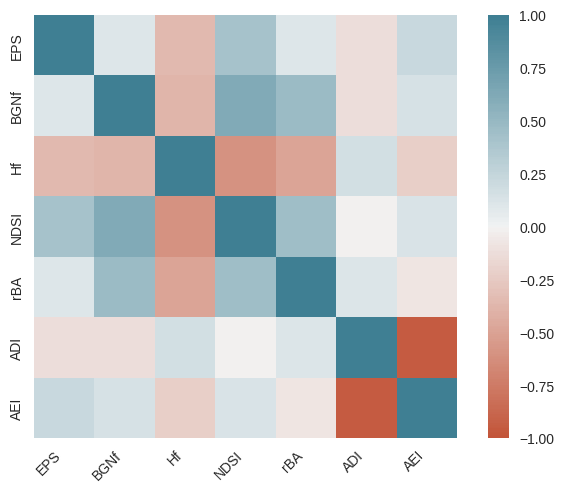

In [ ]:

corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 15)

number of recommended clusters 14


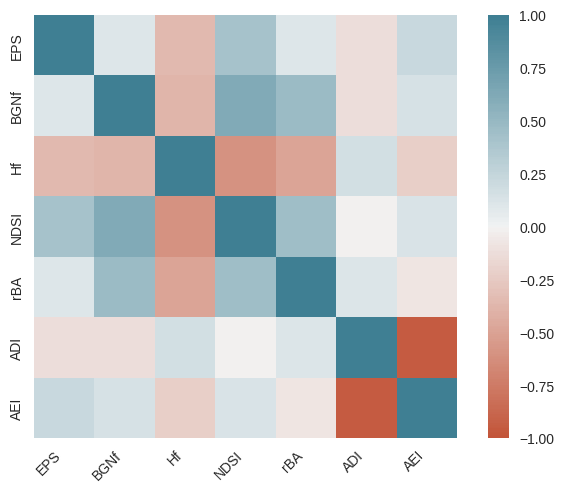

In [ ]:
corr = DFperiods.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Recomended_Clusters=UW_index(DFperiods, 25)

number of recommended clusters 24


### Only With the index

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,50):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=2).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

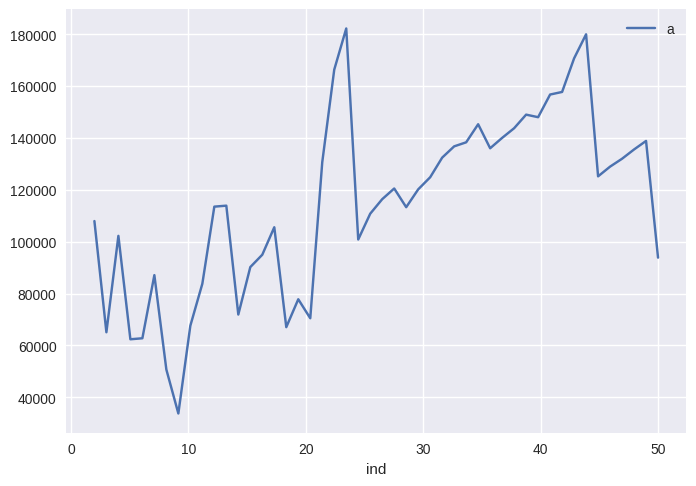

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

In [ ]:
Index=[]
liminfierior=2
limsuperior=20
for i in range(2,10):

  X_train111=DFperiods.copy()
  GM = GaussianMixture(n_components=i, covariance_type="full",random_state=1).fit(X_train111)
  X_train111["pred"]=GM.predict(X_train111)
  Means=GM.means_
  covariances=GM.covariances_
  weights=GM.weights_
  numberofdimens=X_train111.shape[1]-1
  y=X_train111["pred"]
  Index.append(uncertainity_mean(X_train111.iloc[:,:numberofdimens],X_train111["pred"],Means,covariances,weights,1,numberofdimens))


<Axes: xlabel='ind'>

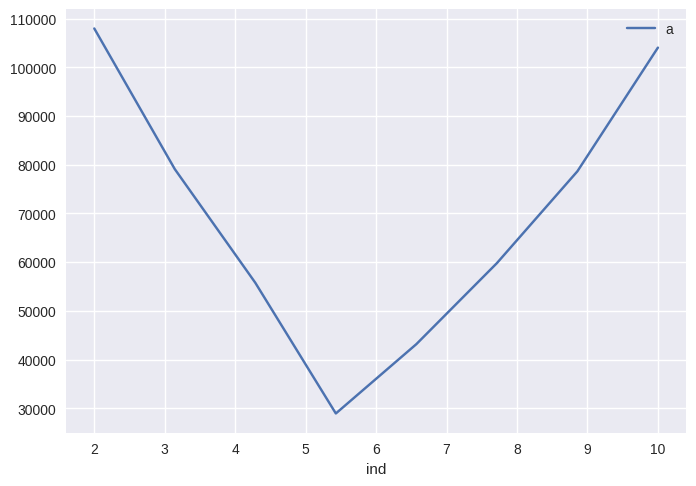

In [ ]:
change=pd.DataFrame(Index,columns=["a"])
change["ind"]=np.linspace(2,len(change)+2,len(change))

change.plot("ind",["a"])

### OTROS INDICESS

In [ ]:
ls

build-docs/              JUPYTERME.ipynb  Makefile*         setup.py
ClustersFeatures/        LICENSE          README.md
clustersfeatures-cli.py  make.bat*        requirements.txt


In [ ]:
X_train11 = grab_20_5.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [ ]:
DFperiods=X_train11[['EPS','BGNf','Hf', 'NDSI',
       'rBA', 'ADI', 'AEI']]


In [ ]:
DFperiods = DFperiods.reset_index(drop=True)


In [ ]:
DFperiods

EPS       BGNf        Hf      NDSI         rBA       ADI       AEI
0   0.107747 -40.295982  0.694444  0.910488   21.343719  2.078759  0.020185
1   0.059528 -42.986591  0.719906  0.898995   18.800928  2.054236  0.116516
2   0.032642 -46.714832  0.717077 -0.010455    0.979307  1.907490  0.325420
3   0.068681 -32.599134  0.678521  0.933578   29.111491  2.064977  0.089574
4   0.064516 -43.611572  0.716618  0.897743   18.558560  2.077533  0.033896
..       ...        ...       ...       ...         ...       ...       ...
83  0.059250 -33.446727  0.702062  0.980897  103.706660  2.062127  0.097186
84  0.071755 -43.140242  0.680412  0.905431   20.148579  2.022598  0.186834
85  0.131088 -42.143592  0.607258  0.952759   41.335786  2.033277  0.167577
86  0.052201 -34.716952  0.562353  0.201142    1.763743  1.739395  0.434854
87  0.046877 -45.931873  0.734538  0.134252    1.310347  2.078019  0.030070

[88 rows x 7 columns]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from clusteval import clusteval
import matplotlib.pyplot as plt
import numpy as np

# Sample data
df = DFperiods

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to perform clustering and calculate indices
def perform_clustering_and_evaluate(data, clustering_algorithms, cluster_range):
    results = {}
    for name, algo in clustering_algorithms.items():
        print(f"Evaluating {name}...")
        sil_scores = []
        db_scores = []
        ch_scores = []

        for k in cluster_range:
            if name == 'DBSCAN':
                # DBSCAN does not require a fixed number of clusters
                labels = algo.fit_predict(data)
            else:
                if name == 'GaussianMixture':
                    algo.set_params(n_components=k)
                else:
                    algo.set_params(n_clusters=k)
                labels = algo.fit_predict(data)

            if len(set(labels)) > 1:  # Check if there is more than one cluster
                sil_scores.append(silhouette_score(data, labels))
                db_scores.append(davies_bouldin_score(data, labels))
                ch_scores.append(calinski_harabasz_score(data, labels))
            else:
                sil_scores.append(-1)
                db_scores.append(-1)
                ch_scores.append(-1)

        # Determine the best k based on the highest silhouette score, lowest DB score, and highest CH score
        best_k_sil = cluster_range[np.argmax(sil_scores)]
        best_k_db = cluster_range[np.argmin(db_scores)]
        best_k_ch = cluster_range[np.argmax(ch_scores)]

        results[name] = {
            'Silhouette Score Best k': best_k_sil,
            'Davies-Bouldin Index Best k': best_k_db,
            'Calinski-Harabasz Index Best k': best_k_ch
        }

    return results

# Define clustering algorithms
cluster_range = range(2, 50)  # Range of k for KMeans, Agglomerative Clustering, and GMM
clustering_algorithms = {
    'KMeans': KMeans(random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'GaussianMixture': GaussianMixture(random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=2)
}

# Perform clustering and evaluate
results = perform_clustering_and_evaluate(df_scaled, clustering_algorithms, cluster_range)

# Print results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Silhouette Score Best k: {result['Silhouette Score Best k']}")
    print(f"Davies-Bouldin Index Best k: {result['Davies-Bouldin Index Best k']}")
    print(f"Calinski-Harabasz Index Best k: {result['Calinski-Harabasz Index Best k']}")

# Using clusteval for automatic evaluation
ce = clusteval(cluster='kmeans')
ce.fit(df_scaled)
print("\nClusteval Results:", ce.results)


Evaluating KMeans...
Evaluating AgglomerativeClustering...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Evaluating GaussianMixture...


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.


Evaluating DBSCAN...

KMeans Results:
Silhouette Score Best k: 3
Davies-Bouldin Index Best k: 10
Calinski-Harabasz Index Best k: 4

AgglomerativeClustering Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 2
Calinski-Harabasz Index Best k: 3

GaussianMixture Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 6
Calinski-Harabasz Index Best k: 5

DBSCAN Results:
Silhouette Score Best k: 2
Davies-Bouldin Index Best k: 2
Calinski-Harabasz Index Best k: 2


[clusteval] >INFO:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/


Clusteval Results: {'evaluate': 'silhouette', 'score':     cluster_threshold  clusters     score
0                   2         2  0.480451
1                   3         3  0.376415
2                   4         4  0.258815
3                   5         5  0.226929
4                   6         6  0.238497
5                   7         7  0.228377
6                   8         8  0.223218
7                   9         9  0.251202
8                  10        10  0.263461
9                  11        11  0.237320
10                 12        12  0.240202
11                 13        13  0.270238
12                 14        14  0.248191
13                 15        15  0.264715
14                 16        16  0.245522
15                 17        17  0.237671
16                 18        18  0.229284
17                 19        19  0.228346
18                 20        20  0.226009
19                 21        21  0.202299
20                 22        22  0.231080
21                 2

In [ ]:
!git clone https://github.com/Simon-Bertrand/Clusters-Features.git


Cloning into 'Clusters-Features'...
remote: Enumerating objects: 1150, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1150 (delta 44), reused 38 (delta 38), pack-reused 1104
Receiving objects: 100% (1150/1150), 24.47 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (720/720), done.


In [ ]:
cd Clusters-Features

/content/Clusters-Features/Clusters-Features


In [ ]:
pip  install -r requirements.txt

In [ ]:
from ClustersFeatures import *

In [ ]:
df=DFperiods.copy()

In [ ]:
df

EPS       BGNf        Hf      NDSI         rBA       ADI       AEI
0   0.098853 -39.530013  0.683019  0.931742   28.300572  2.078148  0.027886
1   0.062399 -41.446052  0.731532  0.903630   19.753533  2.038872  0.154892
2   0.035896 -45.849585  0.713269  0.052656    1.111604  1.912820  0.319556
3   0.069485 -32.449641  0.678060  0.941700   33.305042  2.061745  0.096217
4   0.057404 -43.075361  0.694896  0.916140   22.849343  2.076733  0.041249
..       ...        ...       ...       ...         ...       ...       ...
87  0.057458 -33.573067  0.701057  0.981128  104.975421  2.062984  0.095516
88  0.071542 -42.790586  0.677247  0.913125   22.021616  1.990855  0.226898
89  0.115931 -39.901530  0.635327  0.943381   34.323928  2.041161  0.153127
90  0.072926 -34.720463  0.552442  0.903791   19.788099  1.899737  0.304799
91  0.041215 -46.956538  0.752164 -0.024539    0.952097  2.078853  0.018944

[91 rows x 7 columns]

In [ ]:
DFperiods=DFperiods.iloc[:,:7]

In [ ]:
X_train11

EPS       BGNf        Hf      NDSI         rBA       ADI       AEI  \
0   0.098853 -39.530013  0.683019  0.931742   28.300572  2.078148  0.027886   
1   0.062399 -41.446052  0.731532  0.903630   19.753533  2.038872  0.154892   
2   0.035896 -45.849585  0.713269  0.052656    1.111604  1.912820  0.319556   
3   0.069485 -32.449641  0.678060  0.941700   33.305042  2.061745  0.096217   
4   0.057404 -43.075361  0.694896  0.916140   22.849343  2.076733  0.041249   
..       ...        ...       ...       ...         ...       ...       ...   
87  0.057458 -33.573067  0.701057  0.981128  104.975421  2.062984  0.095516   
88  0.071542 -42.790586  0.677247  0.913125   22.021616  1.990855  0.226898   
89  0.115931 -39.901530  0.635327  0.943381   34.323928  2.041161  0.153127   
90  0.072926 -34.720463  0.552442  0.903791   19.788099  1.899737  0.304799   
91  0.041215 -46.956538  0.752164 -0.024539    0.952097  2.078853  0.018944   

    component1_prob  component2_prob  latitude_IG  longitud_IG  
0      1.000000e+00     5.951963e-57  1949742.623  4957101.251  
1      1.000000e+00    1.013919e-151  1949742.623  4957101.251  
2      1.000000e+00     0.000000e+00  1949742.623  4957101.251  
3      1.000000e+00     1.192217e-38  1949742.623  4957101.251  
4      1.000000e+00    9.358877e-102  1949742.623  4957101.251  
..              ...              ...          ...          ...  
87     1.221595e-19     1.000000e+00  1949742.623  4957101.251  
88     1.000000e+00    1.791406e-105  1949742.623  4957101.251  
89     1.000000e+00     4.114802e-15  1949742.623  4957101.251  
90     1.000000e+00    1.019342e-268  1949742.623  4957101.251  
91     1.000000e+00     0.000000e+00  1949742.623  4957101.251  

[91 rows x 11 columns]

In [ ]:
X_train11

EPS       BGNf        Hf      NDSI         rBA       ADI       AEI  \
0   0.098853 -39.530013  0.683019  0.931742   28.300572  2.078148  0.027886   
1   0.062399 -41.446052  0.731532  0.903630   19.753533  2.038872  0.154892   
2   0.035896 -45.849585  0.713269  0.052656    1.111604  1.912820  0.319556   
3   0.069485 -32.449641  0.678060  0.941700   33.305042  2.061745  0.096217   
4   0.057404 -43.075361  0.694896  0.916140   22.849343  2.076733  0.041249   
..       ...        ...       ...       ...         ...       ...       ...   
87  0.057458 -33.573067  0.701057  0.981128  104.975421  2.062984  0.095516   
88  0.071542 -42.790586  0.677247  0.913125   22.021616  1.990855  0.226898   
89  0.115931 -39.901530  0.635327  0.943381   34.323928  2.041161  0.153127   
90  0.072926 -34.720463  0.552442  0.903791   19.788099  1.899737  0.304799   
91  0.041215 -46.956538  0.752164 -0.024539    0.952097  2.078853  0.018944   

    target  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
87       0  
88       1  
89       1  
90       1  
91       1  

[91 rows x 8 columns]

In [ ]:
cpred=[]
admis=[]

ncreal=[]
ncpred_slope=[]
ncpred_min=[]
sil=[]
silluette=[]
bh=[]
rtl=[]
sd=[]
db=[]
xb=[]
ch=[]
dnn=[]
mr=[]
pb=[]
rt=[]
wg=[]
dr=[]
c=[]
kgmm=50

varuncer=[]
separation=[]
sil=[]
g1=[]
g2=[]
g3=[]
g4=[]
g5=[]

g6=[]
g7=[]
g8=[]
g9=[]
g10=[]
g11=[]
g12=[]
g13=[]

X_train11=DFperiods.copy()
for l in range(2,kgmm):
  rand=1

  #unce, sep,pred=uncertainity_mean(X_train11,n_components=l)
  GM = GaussianMixture(n_components=l, random_state=rand, covariance_type="full").fit(X_train11)
  pred=GM.predict(X_train11)
  sil.append(metrics.silhouette_score(X_train11, pred, metric='euclidean'))
  X_train11["target"]=pred

  CC=ClustersCharacteristics(X_train11, label_target="target")
  g1.append(CC.score_index_ball_hall())
  g2.append(CC.score_index_ratkowsky_lance())
  g3.append(CC.score_index_SD())
  g5.append(CC.score_index_xie_beni())
  g6.append(CC.score_index_calinski_harabasz())
  g7.append(CC.score_index_dunn())
  g8.append(CC.score_index_mclain_rao())
  g9.append(CC.score_index_point_biserial())
  g10.append(CC.score_index_ray_turi())
  g11.append(CC.score_index_wemmert_gancarski())
  g13.append(CC.score_index_c())

  try:
      g4.append(CC.score_index_davies_bouldin())
  except:
      print("An exception occurred")
      g4.append(0)


silluette.append(np.array(sil).argmax()+2)
bh.append(np.diff(np.array(g1)).argmax()+2)
rtl.append(np.array(g2).argmax()+2)
sd.append(np.array(g3).argmin()+2)
db.append(np.array(g4).argmin()+2)
xb.append(np.array(g5).argmin()+2)
ch.append(np.array(g6).argmax()+2)
dnn.append(np.array(g7).argmax()+2)
mr.append(np.array(g8).argmin()+2)
wg.append(np.array(g11).argmax()+2)
pb.append(np.array(g9).argmax()+2)
rt.append(np.array(g10).argmin()+2)
c.append(np.array(g13).argmin()+2)

ncrecomended=[silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, rt, c]

adm=[]

print(ncrecomended)
cpred.append(ncrecomended)
print("silluette,bh,rtl,sd,db, xb,ch, dnn, mr,wg,pb, r, c")

IndexError: ignored

### Clustering With the recomended number of clusters

In [96]:
X_train11 = grab_20_5.groupby('site')[['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']].median()


In [97]:
X_train11

EPS       BGNf        Hf      NDSI         rBA       ADI  \
site                                                                     
RZUA01   0.107747 -40.295982  0.694444  0.910488   21.343719  2.078759   
RZUA03b  0.059528 -42.986591  0.719906  0.898995   18.800928  2.054236   
RZUA04   0.032642 -46.714832  0.717077 -0.010455    0.979307  1.907490   
RZUA05   0.068681 -32.599134  0.678521  0.933578   29.111491  2.064977   
RZUA06   0.064516 -43.611572  0.716618  0.897743   18.558560  2.077533   
...           ...        ...       ...       ...         ...       ...   
RZUH09   0.059250 -33.446727  0.702062  0.980897  103.706660  2.062127   
RZUH10   0.071755 -43.140242  0.680412  0.905431   20.148579  2.022598   
RZUH11   0.131088 -42.143592  0.607258  0.952759   41.335786  2.033277   
RZUH12   0.052201 -34.716952  0.562353  0.201142    1.763743  1.739395   
RZUH13   0.046877 -45.931873  0.734538  0.134252    1.310347  2.078019   

              AEI  
site               
RZUA01   0.020185  
RZUA03b  0.116516  
RZUA04   0.325420  
RZUA05   0.089574  
RZUA06   0.033896  
...           ...  
RZUH09   0.097186  
RZUH10   0.186834  
RZUH11   0.167577  
RZUH12   0.434854  
RZUH13   0.030070  

[88 rows x 7 columns]

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train11.values)
X_train11 = pd.DataFrame(scaled_features, index=X_train11.index, columns=X_train11.columns)

In [99]:
rand=3
GM = GaussianMixture(n_components=5, random_state=rand, covariance_type="full").fit(X_train11)
pred=GM.predict(X_train11)

In [100]:
GM.means_

array([[0.40290347, 0.61739978, 0.45794755, 0.90591589, 0.10801801,
        0.96915011, 0.15615753],
       [0.4381342 , 0.70870336, 0.40123354, 0.94607847, 0.19476834,
        0.70356264, 0.54188998],
       [0.33255986, 0.7330521 , 0.35382042, 0.98598413, 0.43390533,
        0.98219032, 0.11630214],
       [0.08375896, 0.25108425, 0.81927335, 0.16346325, 0.00193105,
        0.99914992, 0.01930071],
       [0.28396312, 0.62074522, 0.33612433, 0.37066245, 0.00967577,
        0.28913194, 0.84636384]])

In [ ]:
3,5,1,4,2

(3, 5, 1, 4, 2)

In [101]:
predproba=GM.predict_proba(X_train11)
X_train11["pred"]=pred
X_train11['component3_prob'] = predproba[:, 0]
X_train11['component5_prob'] = predproba[:, 1]
X_train11['component1_prob'] = predproba[:, 2]
X_train11['component4_prob'] = predproba[:, 3]
X_train11['component2_prob'] = predproba[:, 4]


In [ ]:
#X_train11["pred"] = X_train11["pred"].replace({0: 2, 1: 4, 2: 0, 3: 3, 4: 1})


In [102]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.537138  0.683221  0.513614  0.940032  0.115922  0.998491  0.040079   
RZUA03b  0.290196  0.614063  0.578937  0.931250  0.101770  0.944243  0.235300   
RZUA04   0.152509  0.518235  0.571678  0.236275  0.002581  0.619622  0.658659   
RZUA05   0.337075  0.881055  0.472762  0.957677  0.159154  0.968003  0.180700   
RZUA06   0.315740  0.597999  0.570501  0.930293  0.100421  0.995778  0.067865   
...           ...       ...       ...       ...       ...       ...       ...   
RZUH09   0.288775  0.859269  0.533156  0.993837  0.574324  0.961698  0.196126   
RZUH10   0.352814  0.610114  0.477616  0.936168  0.109270  0.874256  0.377804   
RZUH11   0.656671  0.635731  0.289940  0.972335  0.227190  0.897879  0.338780   
RZUH12   0.252676  0.826620  0.174736  0.397971  0.006947  0.247774  0.880433   
RZUH13   0.225411  0.538360  0.616473  0.346856  0.004424  0.996855  0.060112   

         pred  component3_prob  component5_prob  component1_prob  \
site                                                               
RZUA01      0     1.000000e+00     8.124550e-76    4.056554e-102   
RZUA03b     0     1.000000e+00     3.967517e-14     7.985621e-97   
RZUA04      4    2.597569e-181    1.359636e-231     0.000000e+00   
RZUA05      0     1.000000e+00     8.561872e-12     1.722293e-37   
RZUA06      0     1.000000e+00     7.063616e-63    5.273664e-124   
...       ...              ...              ...              ...   
RZUH09      2     1.133783e-46     3.597185e-10     1.000000e+00   
RZUH10      1     5.200659e-04     9.994799e-01     1.299355e-60   
RZUH11      0     9.800840e-01     1.991516e-02     8.621110e-07   
RZUH12      4     0.000000e+00    2.501876e-120     0.000000e+00   
RZUH13      3     2.043450e-40    1.672040e-222     0.000000e+00   

         component4_prob  component2_prob  
site                                       
RZUA01               0.0              0.0  
RZUA03b              0.0              0.0  
RZUA04               0.0              1.0  
RZUA05               0.0              0.0  
RZUA06               0.0              0.0  
...                  ...              ...  
RZUH09               0.0              0.0  
RZUH10               0.0              0.0  
RZUH11               0.0              0.0  
RZUH12               0.0              1.0  
RZUH13               1.0              0.0  

[88 rows x 13 columns]

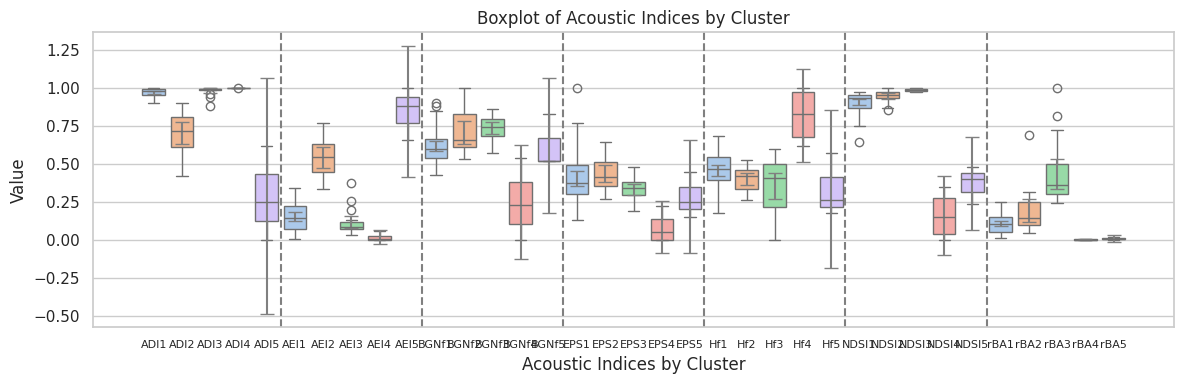

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


# Assuming X_train11 is your DataFrame
X_train11 = X_train11.sort_values(by='pred')
df = X_train11.copy()
df['pred'] = df['pred'] + 1

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 5)

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='grey', capsize=5)

plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_red20-05.svg', format='svg')

# Show the plot
plt.show()


In [104]:
X_train111=X_train11.copy()

In [105]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.537138  0.683221  0.513614  0.940032  0.115922  0.998491  0.040079   
RZUC11   0.427444  0.494216  0.214242  0.940947  0.117606  0.980435  0.148085   
RZUG05   0.273335  0.531187  0.404963  0.848107  0.044620  0.993281  0.087861   
RZUD01   1.000000  0.534943  0.238169  0.975504  0.249864  0.995856  0.066196   
RZUD01M  0.551235  0.592285  0.306096  0.963239  0.179779  0.999563  0.020734   
...           ...       ...       ...       ...       ...       ...       ...   
RZUE02   0.000000  0.329585  0.697024  0.252734  0.002821  1.000000  0.000000   
RZUH13   0.225411  0.538360  0.616473  0.346856  0.004424  0.996855  0.060112   
RZUH12   0.252676  0.826620  0.174736  0.397971  0.006947  0.247774  0.880433   
RZUA04   0.152509  0.518235  0.571678  0.236275  0.002581  0.619622  0.658659   
RZUH05   0.446705  0.517381  0.261958  0.477742  0.019499  0.000000  1.000000   

         pred  component3_prob  component5_prob  component1_prob  \
site                                                               
RZUA01      0     1.000000e+00     8.124550e-76    4.056554e-102   
RZUC11      0     1.000000e+00     6.610802e-36     4.798110e-58   
RZUG05      0     1.000000e+00     1.039801e-55     0.000000e+00   
RZUD01      0     1.000000e+00     6.935453e-78     6.270052e-23   
RZUD01M     0     1.000000e+00     8.590134e-89     6.555903e-16   
...       ...              ...              ...              ...   
RZUE02      3     6.712405e-54    3.746410e-317     0.000000e+00   
RZUH13      3     2.043450e-40    1.672040e-222     0.000000e+00   
RZUH12      4     0.000000e+00    2.501876e-120     0.000000e+00   
RZUA04      4    2.597569e-181    1.359636e-231     0.000000e+00   
RZUH05      4     0.000000e+00    4.765479e-138     0.000000e+00   

         component4_prob  component2_prob  
site                                       
RZUA01               0.0              0.0  
RZUC11               0.0              0.0  
RZUG05               0.0              0.0  
RZUD01               0.0              0.0  
RZUD01M              0.0              0.0  
...                  ...              ...  
RZUE02               1.0              0.0  
RZUH13               1.0              0.0  
RZUH12               0.0              1.0  
RZUA04               0.0              1.0  
RZUH05               0.0              1.0  

[88 rows x 13 columns]

In [106]:
X_train111["pred"] = X_train111["pred"].replace({0: 2, 1: 4, 2: 0, 3: 3, 4: 1})


In [107]:
X_train111

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.537138  0.683221  0.513614  0.940032  0.115922  0.998491  0.040079   
RZUC11   0.427444  0.494216  0.214242  0.940947  0.117606  0.980435  0.148085   
RZUG05   0.273335  0.531187  0.404963  0.848107  0.044620  0.993281  0.087861   
RZUD01   1.000000  0.534943  0.238169  0.975504  0.249864  0.995856  0.066196   
RZUD01M  0.551235  0.592285  0.306096  0.963239  0.179779  0.999563  0.020734   
...           ...       ...       ...       ...       ...       ...       ...   
RZUE02   0.000000  0.329585  0.697024  0.252734  0.002821  1.000000  0.000000   
RZUH13   0.225411  0.538360  0.616473  0.346856  0.004424  0.996855  0.060112   
RZUH12   0.252676  0.826620  0.174736  0.397971  0.006947  0.247774  0.880433   
RZUA04   0.152509  0.518235  0.571678  0.236275  0.002581  0.619622  0.658659   
RZUH05   0.446705  0.517381  0.261958  0.477742  0.019499  0.000000  1.000000   

         pred  component3_prob  component5_prob  component1_prob  \
site                                                               
RZUA01      2     1.000000e+00     8.124550e-76    4.056554e-102   
RZUC11      2     1.000000e+00     6.610802e-36     4.798110e-58   
RZUG05      2     1.000000e+00     1.039801e-55     0.000000e+00   
RZUD01      2     1.000000e+00     6.935453e-78     6.270052e-23   
RZUD01M     2     1.000000e+00     8.590134e-89     6.555903e-16   
...       ...              ...              ...              ...   
RZUE02      3     6.712405e-54    3.746410e-317     0.000000e+00   
RZUH13      3     2.043450e-40    1.672040e-222     0.000000e+00   
RZUH12      1     0.000000e+00    2.501876e-120     0.000000e+00   
RZUA04      1    2.597569e-181    1.359636e-231     0.000000e+00   
RZUH05      1     0.000000e+00    4.765479e-138     0.000000e+00   

         component4_prob  component2_prob  
site                                       
RZUA01               0.0              0.0  
RZUC11               0.0              0.0  
RZUG05               0.0              0.0  
RZUD01               0.0              0.0  
RZUD01M              0.0              0.0  
...                  ...              ...  
RZUE02               1.0              0.0  
RZUH13               1.0              0.0  
RZUH12               0.0              1.0  
RZUA04               0.0              1.0  
RZUH05               0.0              1.0  

[88 rows x 13 columns]

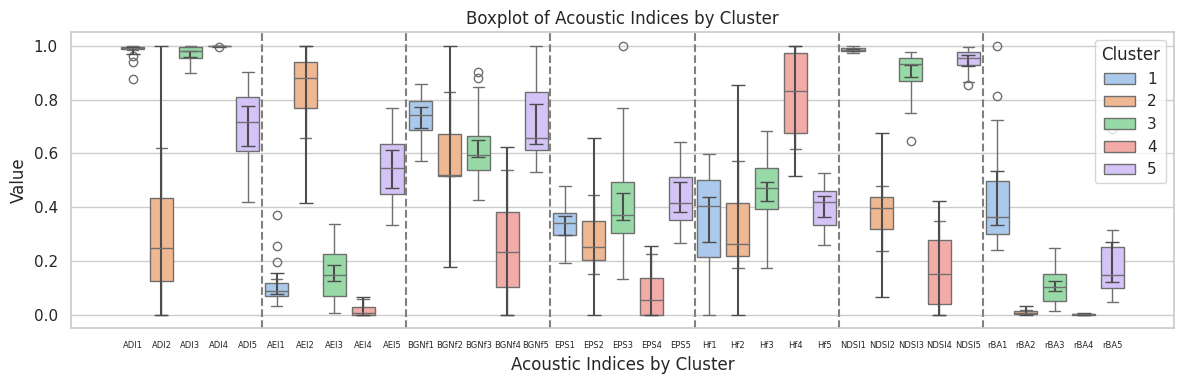

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


# Assuming X_train11 is your DataFrame
X_train111 = X_train111.sort_values(by='pred')
df = X_train111.copy()
df['pred'] = df['pred'] + 1

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 5)

# Calculate the means and confidence intervals
summary_df = df_long.groupby(['Variable', 'pred']).agg(
    mean_value=('Value', 'mean'),
    ci_lower=('Value', lambda x: mean_confidence_interval(x)[1]),
    ci_upper=('Value', lambda x: mean_confidence_interval(x)[2])
).reset_index()

# Add error bars to the plot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)

# Add confidence intervals with red error bars
#for idx, row in summary_df.iterrows():
 #   x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]
 #   plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - row['ci_lower']], [row['ci_upper'] - row['mean_value']]], fmt='none', c='#4d4d4d', capsize=5)


# Add confidence intervals with darker grey error bars, clipped between 0 and 1
for idx, row in summary_df.iterrows():
    x = df_long[(df_long['Variable'] == row['Variable']) & (df_long['pred'] == row['pred'])]['Variable_Cluster'].iloc[0]

    # Clip the confidence intervals to the range [0, 1]
    ci_lower_clipped = max(0, row['ci_lower'])
    ci_upper_clipped = min(1, row['ci_upper'])

    # Plot the error bars with clipped intervals
    plt.errorbar(x=x, y=row['mean_value'], yerr=[[row['mean_value'] - ci_lower_clipped], [ci_upper_clipped - row['mean_value']]],
                 fmt='none', c='#4d4d4d', capsize=5)  # Darker grey color



plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=6)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
##ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots_with_confidence_intervals_red20-05.svg', format='svg')

# Show the plot
plt.show()


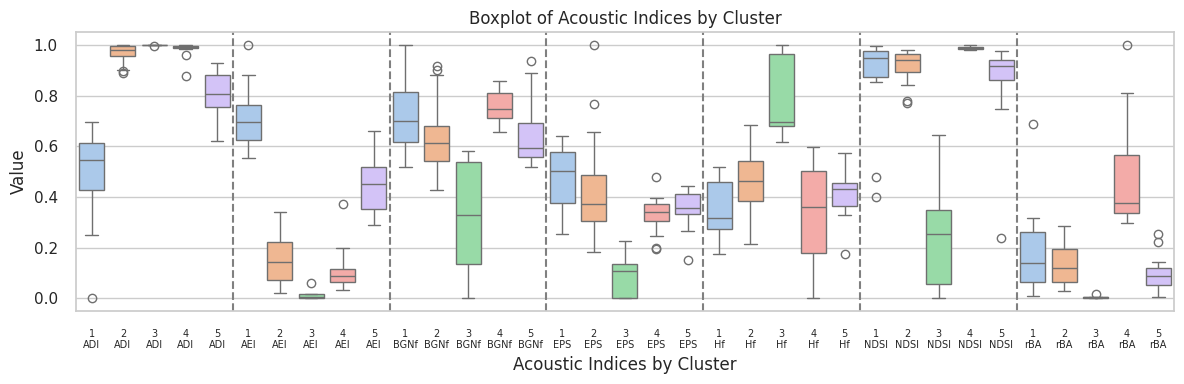

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train11 is your DataFrame
X_train11 = X_train11.sort_values(by='pred')
df = X_train11.copy()
df['pred'] = df['pred'] + 1

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 5)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Customize x-tick labels
ticks = ax.get_xticks()
tick_labels = [label.get_text() for label in ax.get_xticklabels()]
variable_labels = [label[:-1] for label in tick_labels]
cluster_labels = [label[-1] for label in tick_labels]

# Remove the legend
ax.legend_.remove()

# Create custom x-tick labels with cluster numbers and variable names below
new_tick_labels = [f"{c}\n{v}" for v, c in zip(variable_labels, cluster_labels)]
ax.set_xticks(ticks)
ax.set_xticklabels(new_tick_labels, fontsize=7)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots20-05.svg', format='svg')

# Show the plot
plt.show()


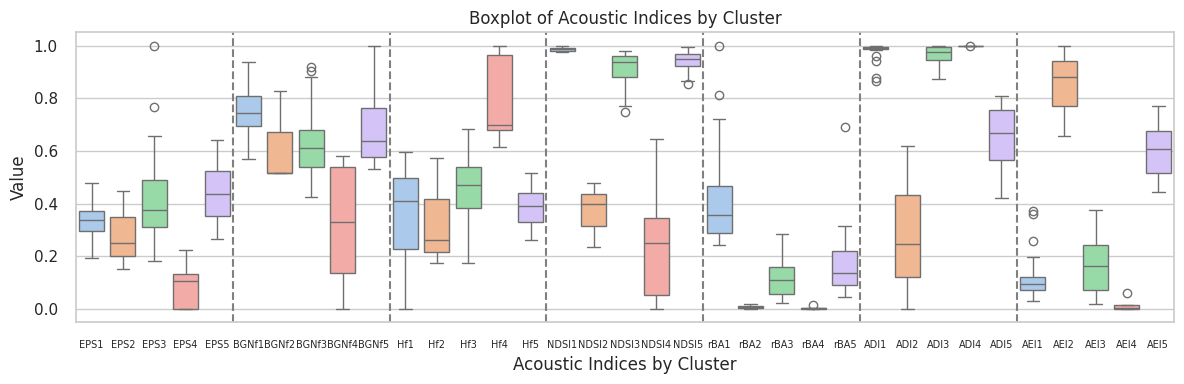

In [ ]:
X_train11=X_train11.sort_values(by='pred')
df = X_train11

# List of variables to plot
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 5)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=7)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]   # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots20-05.svg', format='svg')

# Show the plot
plt.show()

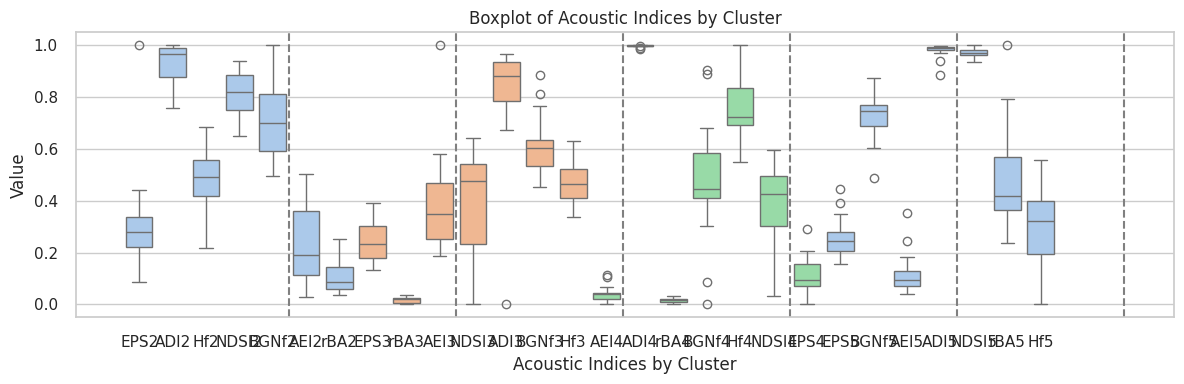

In [ ]:
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)
df_long = df_long.sort_values(by=[ 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]   # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Remove the legend
ax.legend_.remove()

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots20-05.svg', format='svg')

# Show the plot
plt.show()

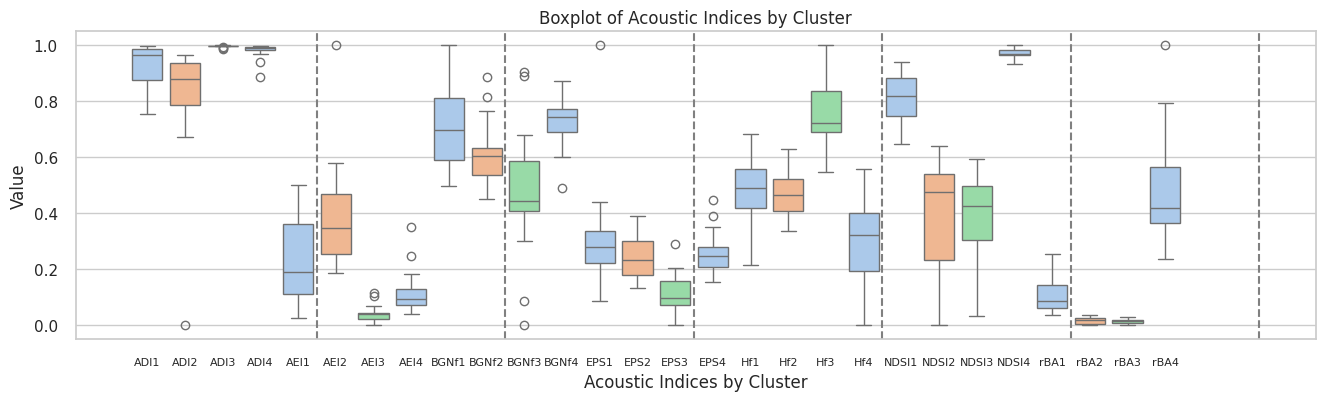

In [ ]:
# Assuming X_train11 is your DataFrame
df = X_train11.copy()
df['pred'] = df['pred']

variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred']}", axis=1)

# Sort the DataFrame by Variable and pred to ensure correct order
df_long = df_long.sort_values(by=['Variable', 'pred'])

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(16, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
#plt.legend(title='Cluster', loc='best')
ax.legend_.remove()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots20-05.svg', format='svg')

# Show the plot
plt.show()


In [ ]:
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 3)

# Create a boxplot
plt.figure(figsize=(12, 4))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')

# Add vertical lines to separate groups of acoustic indices
index_positions = [3, 6, 9, 12, 15, 18]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Remove the legend
ax.legend_.remove()

# Adjust layout
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots0817.svg', format='svg')

# Show the plot
plt.show()

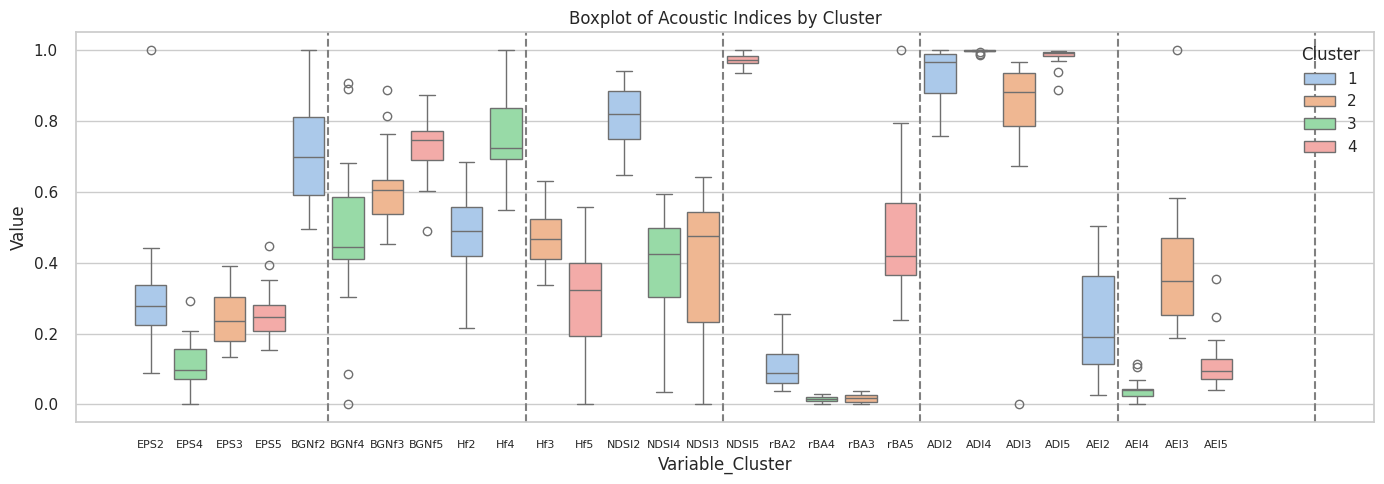

In [ ]:
df=  X_train11
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Convert the DataFrame to long format
df_long = pd.melt(df, id_vars=['pred'], value_vars=variables, var_name='Variable', value_name='Value')

# Create a new column combining variable and cluster
df_long['Variable_Cluster'] = df_long.apply(lambda row: f"{row['Variable']}{row['pred'] + 1}", axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a pastel color palette for clusters
palette = sns.color_palette("pastel", 4)

# Create a boxplot
plt.figure(figsize=(14, 5))  # Adjusted figure size for a more compact plot
ax = sns.boxplot(x='Variable_Cluster', y='Value', hue='pred', data=df_long, palette=palette)
plt.title('Boxplot of Acoustic Indices by Cluster')
#plt.xlabel('Acoustic Indices by Cluster')
plt.ylabel('Value')
plt.xticks(fontsize=8)

# Add vertical lines to separate groups of acoustic indices
index_positions = [5, 10, 15, 20,25,30]  # Positions to draw vertical lines
for pos in index_positions:
    plt.axvline(x=pos - 0.5, color='grey', linestyle='--')

# Adjust layout
plt.legend(title='Cluster', loc='best')
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots20-05.svg', format='svg')

# Show the plot
plt.show()


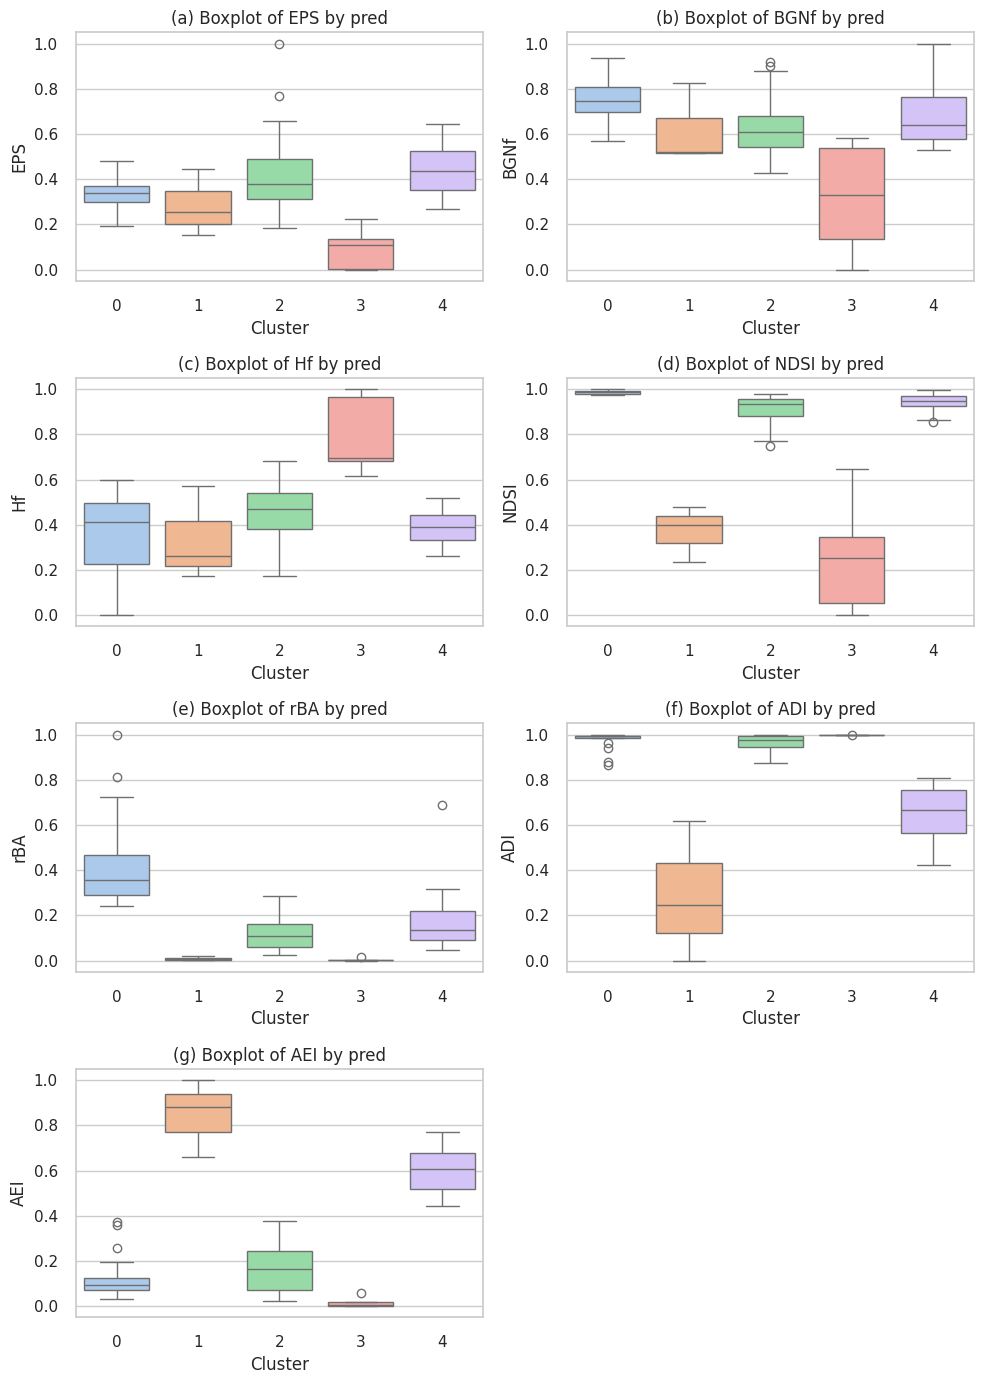

In [ ]:
# Create boxplots

df=  X_train11
variables = ['EPS', 'BGNf', 'Hf', 'NDSI', 'rBA', 'ADI', 'AEI']

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette("pastel")

# Create boxplots
plt.figure(figsize=(10, 14))
subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='pred', y=var, data=df, palette=palette)
    plt.title(f'({subplot_labels[i]}) Boxplot of {var} by pred')
    plt.xlabel('Cluster')
    plt.ylabel(var)


plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Doctorado/2024/graphsdifferencspectral/boxplots2005.svg', format='svg')

plt.show()

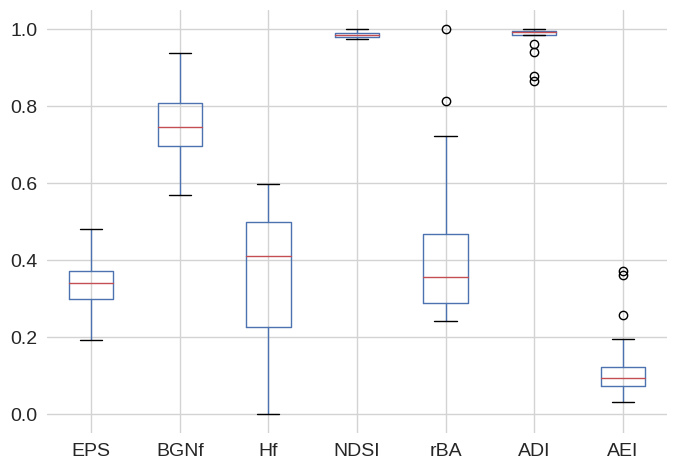

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==0].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


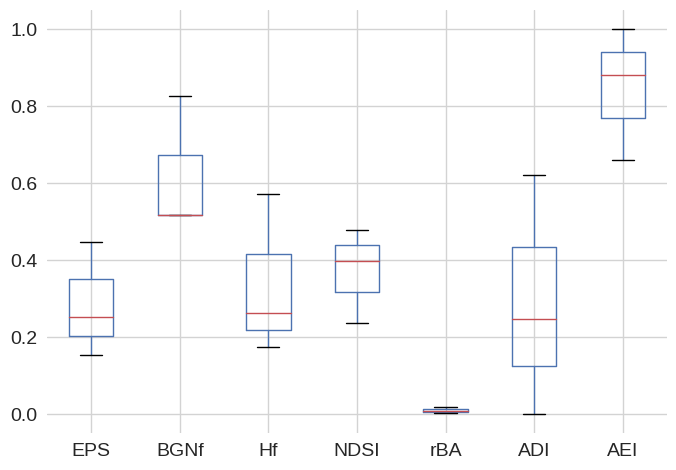

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==1].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


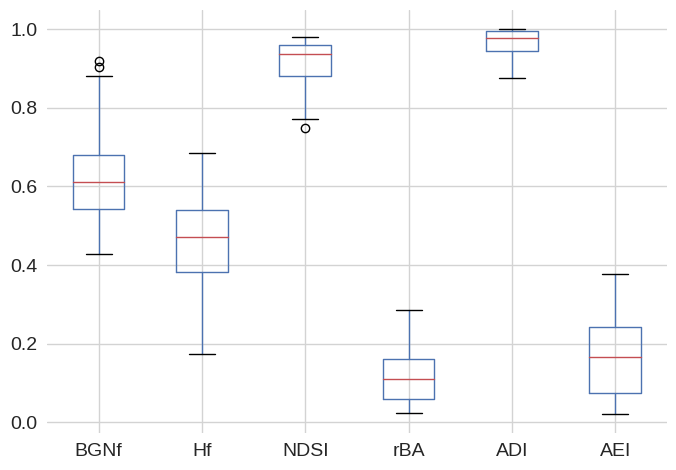

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==2].iloc[:,1:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot


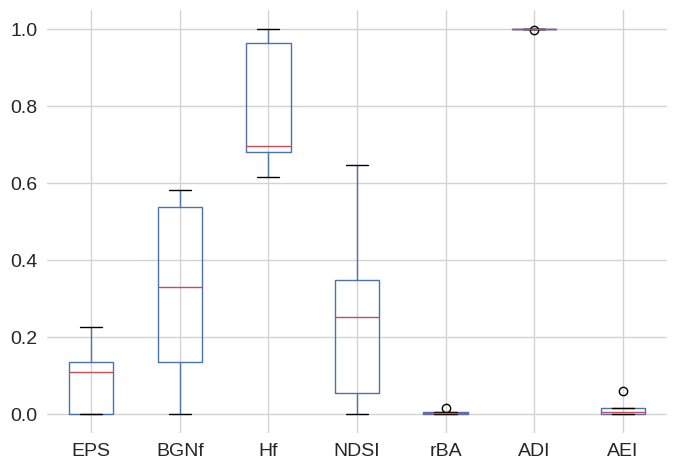

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==3].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot

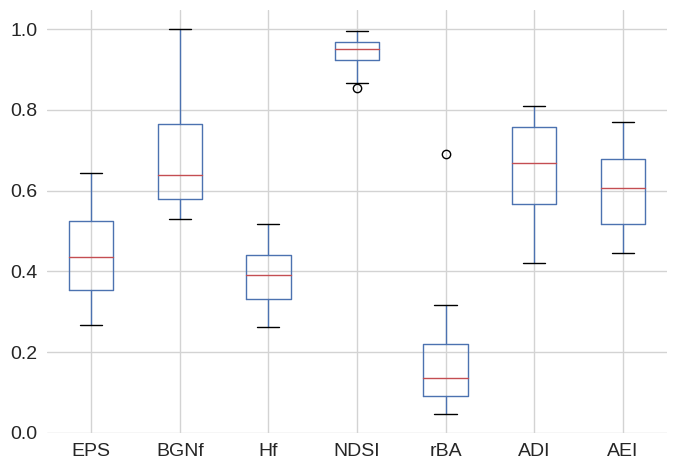

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have your X_train11 DataFrame and the plot code
# X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].boxplot()

# Create a boxplot object
boxplot = X_train11.loc[X_train11["pred"]==4].iloc[:,0:7].boxplot()

# Customize the background color to white
boxplot.set_facecolor('white')
grid_color = 'lightgray'
for line in boxplot.get_xgridlines() + boxplot.get_ygridlines():
    line.set_color(grid_color)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  # Display the modified plot

In [ ]:
X_train11.loc[X_train11["pred"]==0].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000  20.0
mean    0.743313   0.358522   0.985492   0.424967   0.976368   0.128487   0.0
std     0.091846   0.171124   0.007820   0.208090   0.038260   0.095694   0.0
min     0.570014   0.000000   0.974491   0.242163   0.865764   0.032364   0.0
25%     0.696470   0.226443   0.979813   0.289376   0.985423   0.071975   0.0
50%     0.744290   0.410157   0.985112   0.356393   0.991971   0.094513   0.0
75%     0.808973   0.497545   0.990387   0.467734   0.995146   0.122983   0.0
max     0.938085   0.596281   1.000000   1.000000   0.999007   0.372066   0.0

In [ ]:
X_train11.loc[X_train11["pred"]==1].iloc[:,1:8].describe()

BGNf        Hf      NDSI       rBA       ADI       AEI  pred
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   3.0
mean   0.620745  0.336124  0.370662  0.009676  0.289132  0.846364   1.0
std    0.178293  0.208605  0.123028  0.008783  0.311874  0.173202   0.0
min    0.517381  0.174736  0.236275  0.002581  0.000000  0.658659   1.0
25%    0.517808  0.218347  0.317123  0.004764  0.123887  0.769546   1.0
50%    0.518235  0.261958  0.397971  0.006947  0.247774  0.880433   1.0
75%    0.672428  0.416818  0.437856  0.013223  0.433698  0.940216   1.0
max    0.826620  0.571678  0.477742  0.019499  0.619622  1.000000   1.0

In [ ]:
X_train11.loc[X_train11["pred"]==2]

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI  \
site                                                                            
RZUA01   0.537138  0.683221  0.513614  0.940032  0.115922  0.998491  0.040079   
RZUA03b  0.290196  0.614063  0.578937  0.931250  0.101770  0.944243  0.235300   
RZUA05   0.337075  0.881055  0.472762  0.957677  0.159154  0.968003  0.180700   
RZUA06   0.315740  0.597999  0.570501  0.930293  0.100421  0.995778  0.067865   
RZUA07   0.487244  0.426877  0.444948  0.771011  0.027392  0.970296  0.183667   
RZUB03   0.365258  0.616308  0.429837  0.950062  0.137286  0.998350  0.041875   
RZUB04   0.268937  0.589348  0.524006  0.936533  0.109867  0.953601  0.232428   
RZUB06   0.766877  0.534665  0.449357  0.912948  0.080647  0.980108  0.145152   
RZUB07   0.512239  0.848571  0.422782  0.880748  0.058252  0.903172  0.312052   
RZUB08   0.515392  0.588785  0.410202  0.968109  0.202499  0.986700  0.122608   
RZUB11   0.505601  0.653590  0.371493  0.967281  0.198258  0.956900  0.206309   
RZUC03   0.364455  0.543754  0.496836  0.778947  0.028631  0.975510  0.164954   
RZUC06   0.239027  0.657129  0.565458  0.946440  0.128799  0.998023  0.045805   
RZUC07   0.226455  0.611464  0.542257  0.843410  0.043110  0.995046  0.073563   
RZUC11   0.427444  0.494216  0.214242  0.940947  0.117606  0.980435  0.148085   
RZUD01   1.000000  0.534943  0.238169  0.975504  0.249864  0.995856  0.066196   
RZUD01M  0.551235  0.592285  0.306096  0.963239  0.179779  0.999563  0.020734   
RZUD03   0.376547  0.838613  0.552453  0.950315  0.137925  0.918374  0.283878   
RZUD04   0.311394  0.567265  0.447990  0.925135  0.093681  0.995290  0.073021   
RZUD06   0.377603  0.620378  0.581495  0.968284  0.203420  0.991072  0.100094   
RZUD07   0.287996  0.695565  0.553818  0.884512  0.060206  0.985183  0.127881   
RZUD09   0.184084  0.714098  0.519414  0.954019  0.147882  0.995207  0.071818   
RZUD11   0.560269  0.700342  0.398223  0.958621  0.162323  0.983232  0.135506   
RZUD13   0.414379  0.562760  0.466499  0.749087  0.024363  0.927987  0.287719   
RZUE05   0.365963  0.534098  0.334842  0.943612  0.122786  0.961243  0.208042   
RZUE07   0.303388  0.575428  0.436795  0.855852  0.047542  0.903122  0.331319   
RZUE08   0.353712  0.563000  0.506280  0.934338  0.106364  0.993995  0.081632   
RZUE10   0.182334  0.701670  0.334104  0.967301  0.198372  0.998856  0.035257   
RZUE11   0.404526  0.664224  0.368108  0.979387  0.284399  0.901320  0.332036   
RZUF03   0.411418  0.740947  0.174071  0.869338  0.052719  0.911855  0.318047   
RZUF06   0.377621  0.574831  0.683741  0.856808  0.047665  0.999342  0.025804   
RZUF08   0.376748  0.491645  0.473803  0.915407  0.083002  0.946658  0.244917   
RZUF11   0.650698  0.479907  0.543474  0.845374  0.043731  0.964915  0.204289   
RZUG03   0.394676  0.626721  0.407821  0.958977  0.163552  0.996726  0.058813   
RZUG04   0.424442  0.535821  0.336985  0.938093  0.112490  0.916686  0.310548   
RZUG05   0.273335  0.531187  0.404963  0.848107  0.044620  0.993281  0.087861   
RZUG07   0.329706  0.696514  0.572780  0.912141  0.079901  0.976207  0.164477   
RZUG08   0.302574  0.540035  0.520863  0.883814  0.059822  0.956378  0.223700   
RZUG09   0.315267  0.483440  0.506525  0.869641  0.052852  0.981594  0.140903   
RZUG10   0.488719  0.918864  0.528247  0.973803  0.237185  0.890421  0.340014   
RZUH02   0.433296  0.644868  0.546933  0.952543  0.143755  0.965450  0.197999   
RZUH03   0.344478  0.626455  0.336797  0.882682  0.059214  0.967858  0.184590   
RZUH04   0.287032  0.903165  0.607440  0.863204  0.050135  0.999028  0.031304   
RZUH06   0.592508  0.531421  0.376946  0.962109  0.175181  0.913799  0.313190   
RZUH10   0.352814  0.610114  0.477616  0.936168  0.109270  0.874256  0.377804   
RZUH11   0.656671  0.635731  0.289940  0.972335  0.227190  0.897879  0.338780   

         pred  component1_prob  component2_prob  component3_prob  \
site                                                     

<Axes: >

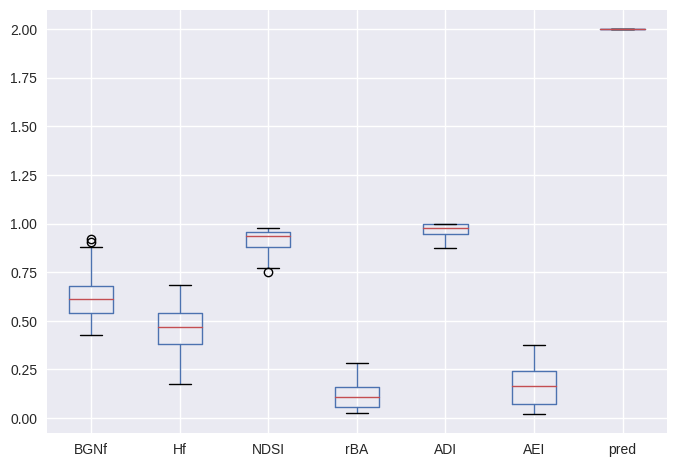

In [ ]:
X_train11.loc[X_train11["pred"]==2].iloc[:,1:8].boxplot()

In [ ]:
X_train11.loc[X_train11["pred"]==2].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  46.000000  46.000000  46.000000  46.000000  46.000000  46.000000  46.0
mean    0.625595   0.453054   0.915336   0.116757   0.963202   0.172144   2.0
std     0.113072   0.109823   0.056936   0.066257   0.036646   0.105564   0.0
min     0.426877   0.174071   0.749087   0.024363   0.874256   0.020734   2.0
25%     0.540964   0.382265   0.881231   0.058492   0.944847   0.073157   2.0
50%     0.610789   0.469630   0.936350   0.109568   0.975859   0.164716   2.0
75%     0.678472   0.538754   0.958385   0.161531   0.995166   0.242513   2.0
max     0.918864   0.683741   0.979387   0.284399   0.999563   0.377804   2.0

<Axes: >

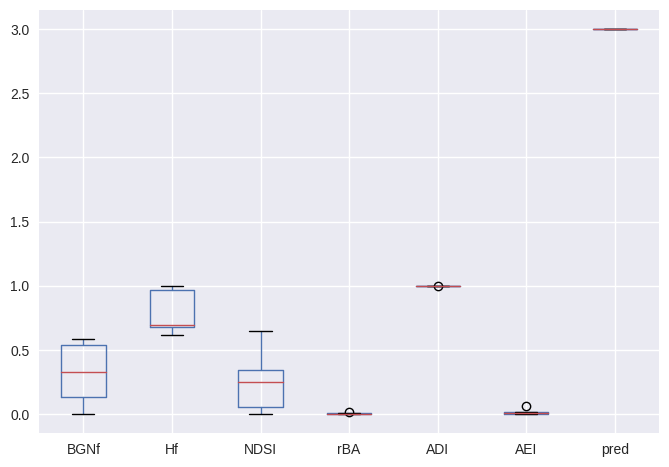

In [ ]:
X_train11.loc[X_train11["pred"]==3].iloc[:,1:8].boxplot()

In [ ]:
X_train11.loc[X_train11["pred"]==3].iloc[:,1:8].describe()

BGNf        Hf      NDSI       rBA       ADI       AEI  pred
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   5.0
mean   0.317274  0.791542  0.259881  0.004546  0.999312  0.016569   3.0
std    0.251251  0.176737  0.257960  0.006115  0.001378  0.025260   0.0
min    0.000000  0.616473  0.000000  0.000000  0.996855  0.000000   3.0
25%    0.136392  0.680619  0.054263  0.000480  0.999745  0.000375   3.0
50%    0.329585  0.697024  0.252734  0.002821  0.999960  0.005644   3.0
75%    0.538360  0.963596  0.346856  0.004424  0.999999  0.016715   3.0
max    0.582031  1.000000  0.645551  0.015005  1.000000  0.060112   3.0

<Axes: >

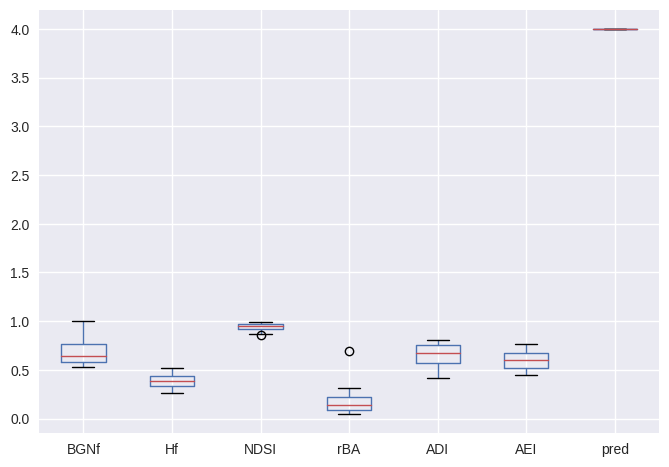

In [ ]:
X_train11.loc[X_train11["pred"]==4].iloc[:,1:8].boxplot()

In [ ]:
X_train11.loc[X_train11["pred"]==4].iloc[:,1:8].describe()

BGNf         Hf       NDSI        rBA        ADI        AEI  pred
count  14.000000  14.000000  14.000000  14.000000  14.000000  14.000000  14.0
mean    0.687619   0.385829   0.940254   0.187149   0.652026   0.596319   4.0
std     0.144472   0.076475   0.041556   0.166052   0.127340   0.104931   0.0
min     0.530011   0.261216   0.853094   0.046323   0.421065   0.444876   4.0
25%     0.578020   0.330851   0.923845   0.092198   0.566705   0.517991   4.0
50%     0.638017   0.389750   0.949338   0.135929   0.668483   0.606248   4.0
75%     0.764528   0.441404   0.967967   0.219466   0.756212   0.676952   4.0
max     1.000000   0.516425   0.996246   0.689500   0.808470   0.770215   4.0

### Multiacoustic index

In [ ]:
import pandas as pd

# Assuming X_train11 is your DataFrame
# Standarize columns from 0 to 1
X_train11_std = (X_train11 - X_train11.min()) / (X_train11.max() - X_train11.min())

# Create the 'multiacoustic' column
X_train11_std['multiacoustic'] = (X_train11_std['EPS'] + X_train11_std['BGNf'] + X_train11_std['Hf'] +
                                  X_train11_std['NDSI'] + X_train11_std['rBA'] + X_train11_std['ADI']
                                )

# Create a new DataFrame with 'pred' and 'multiacoustic' columns
new_df = X_train11_std[['pred', 'multiacoustic']]

# Group by 'pred' and calculate the sum of 'multiacoustic'
sum_multiacoustic_by_pred = new_df.groupby('pred')['multiacoustic'].sum()

# Display the sum of multiacoustic for each value of 'pred'
print(sum_multiacoustic_by_pred)


pred
0.00    175.479810
0.25     93.596791
0.50     15.644789
0.75      4.236448
1.00     12.019122
Name: multiacoustic, dtype: float64


In [ ]:
X_train111.to_csv("/content/drive/MyDrive/Doctorado/2024/Agosto/Resultados_clusteringMembership/20_5.csv")

In [ ]:
X_train11=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/20_5.csv")

In [ ]:
X_train111.to_csv("/content/drive/MyDrive/Doctorado/2024/20_5.csv")

### Proptotipes

In [ ]:
DFperiods.iloc[:,1:9]

EPS       BGNf        Hf      NDSI       rBA       ADI       AEI  \
0   0.037349 -41.294131  0.681023  0.733510  6.504961  2.079019  0.016325   
1   0.041921 -50.266909  0.743658  0.346930  2.062458  2.079167  0.013361   
2   0.029519 -27.768921  0.765016  0.242314  1.639616  2.047040  0.139949   
3   0.009434 -44.448175  0.791702  0.252978  1.677297  2.079138  0.013630   
4   0.030490 -48.426407  0.805683  0.556571  3.510309  2.079015  0.015928   
..       ...        ...       ...       ...       ...       ...       ...   
89  0.030847 -41.043499  0.740730  0.384188  2.247744  2.063734  0.097676   
90  0.036735 -48.410575  0.794041  0.234831  1.613803  2.078353  0.026114   
91  0.026938 -31.980851  0.791526 -0.288497  0.552196  2.037583  0.156149   
92  0.049309 -40.251008  0.719019 -0.071629  0.866324  2.067278  0.085463   
93  0.012559 -49.888363  0.820303 -0.296791  0.542269  2.079218  0.011791   

    component1_prob  
0      8.618341e-23  
1      0.000000e+00  
2      0.000000e+00  
3      0.000000e+00  
4     2.266455e-317  
..              ...  
89     0.000000e+00  
90     0.000000e+00  
91     0.000000e+00  
92     0.000000e+00  
93     0.000000e+00  

[94 rows x 8 columns]

In [ ]:
X_train11=DFperiods.copy().iloc[:,1:8]

X_train11

EPS       BGNf        Hf      NDSI       rBA       ADI       AEI
0   0.037349 -41.294131  0.681023  0.733510  6.504961  2.079019  0.016325
1   0.041921 -50.266909  0.743658  0.346930  2.062458  2.079167  0.013361
2   0.029519 -27.768921  0.765016  0.242314  1.639616  2.047040  0.139949
3   0.009434 -44.448175  0.791702  0.252978  1.677297  2.079138  0.013630
4   0.030490 -48.426407  0.805683  0.556571  3.510309  2.079015  0.015928
..       ...        ...       ...       ...       ...       ...       ...
89  0.030847 -41.043499  0.740730  0.384188  2.247744  2.063734  0.097676
90  0.036735 -48.410575  0.794041  0.234831  1.613803  2.078353  0.026114
91  0.026938 -31.980851  0.791526 -0.288497  0.552196  2.037583  0.156149
92  0.049309 -40.251008  0.719019 -0.071629  0.866324  2.067278  0.085463
93  0.012559 -49.888363  0.820303 -0.296791  0.542269  2.079218  0.011791

[94 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train11.values)
X_train11 = pd.DataFrame(scaled_features, index=X_train11.index, columns=X_train11.columns)



In [ ]:
rand=1
GM = GaussianMixture(n_components=3, random_state=rand, covariance_type="full").fit(X_train11)
pred=GM.predict(X_train11)

In [ ]:
X_train11

EPS      BGNf        Hf      NDSI       rBA       ADI       AEI
0   0.194328  0.623490  0.496349  0.875996  0.154405  0.998286  0.041303
1   0.220095  0.373709  0.652204  0.657621  0.047299  0.998886  0.033636
2   0.150198  1.000000  0.705350  0.598525  0.037105  0.868612  0.361077
3   0.037002  0.535689  0.771754  0.604549  0.038013  0.998769  0.034331
4   0.155668  0.424944  0.806543  0.776046  0.082206  0.998270  0.040275
..       ...       ...       ...       ...       ...       ...       ...
89  0.157683  0.630467  0.644919  0.678668  0.051767  0.936308  0.251731
90  0.190863  0.425385  0.777574  0.594298  0.036483  0.995589  0.066622
91  0.135651  0.882750  0.771316  0.298675  0.010888  0.830265  0.402980
92  0.261732  0.652528  0.590895  0.421182  0.018462  0.950676  0.220139
93  0.054611  0.384247  0.842921  0.293990  0.010649  0.999096  0.029573

[94 rows x 7 columns]

In [ ]:
DFperiods["pred"]=pred
DFperiods

Unnamed: 0       EPS       BGNf        Hf      NDSI       rBA       ADI  \
0            0  0.037349 -41.294131  0.681023  0.733510  6.504961  2.079019   
1            1  0.041921 -50.266909  0.743658  0.346930  2.062458  2.079167   
2            3  0.029519 -27.768921  0.765016  0.242314  1.639616  2.047040   
3            4  0.009434 -44.448175  0.791702  0.252978  1.677297  2.079138   
4            5  0.030490 -48.426407  0.805683  0.556571  3.510309  2.079015   
..         ...       ...        ...       ...       ...       ...       ...   
89          91  0.030847 -41.043499  0.740730  0.384188  2.247744  2.063734   
90          92  0.036735 -48.410575  0.794041  0.234831  1.613803  2.078353   
91          93  0.026938 -31.980851  0.791526 -0.288497  0.552196  2.037583   
92          94  0.049309 -40.251008  0.719019 -0.071629  0.866324  2.067278   
93          95  0.012559 -49.888363  0.820303 -0.296791  0.542269  2.079218   

         AEI  component1_prob  component2_prob  component3_prob     site  pred  
0   0.016325     8.618341e-23              1.0              0.0   RZUA01     0  
1   0.013361     0.000000e+00              1.0              0.0  RZUA03b     2  
2   0.139949     0.000000e+00              1.0              0.0   RZUA04     2  
3   0.013630     0.000000e+00              1.0              0.0   RZUA05     2  
4   0.015928    2.266455e-317              1.0              0.0   RZUA06     0  
..       ...              ...              ...              ...      ...   ...  
89  0.097676     0.000000e+00              1.0              0.0   RZUH11     2  
90  0.026114     0.000000e+00              1.0              0.0   RZUH12     2  
91  0.156149     0.000000e+00              1.0              0.0   RZUH13     2  
92  0.085463     0.000000e+00              1.0              0.0      NaN     2  
93  0.011791     0.000000e+00              1.0              0.0      NaN     2  

[94 rows x 13 columns]

In [ ]:
DFperiods["pred"].value_counts()

2    52
0    34
1     8
Name: pred, dtype: int64

<Axes: >

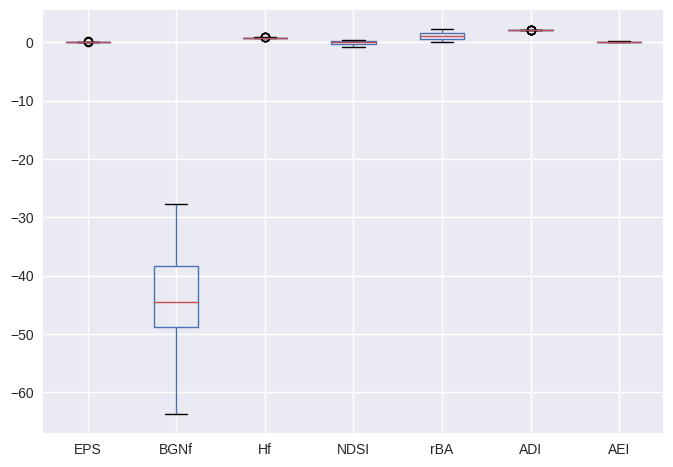

In [ ]:
DFperiods.loc[DFperiods["pred"]==2].iloc[:,1:8].boxplot()

<Axes: >

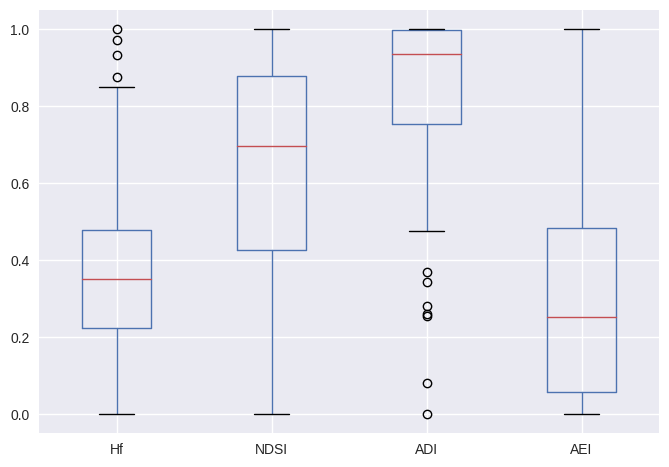

In [ ]:
dff=DFperiods.loc[DFperiods["pred"]==2].iloc[:,:14][['Hf','NDSI', 'ADI', 'AEI']]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

In [ ]:
scaled_features_df.describe()

Hf       NDSI        ADI        AEI
count  52.000000  52.000000  52.000000  52.000000
mean    0.378285   0.639255   0.803077   0.328927
std     0.243139   0.265207   0.268626   0.294697
min     0.000000   0.000000   0.000000   0.000000
25%     0.223953   0.426455   0.753450   0.058249
50%     0.350854   0.696313   0.934160   0.252786
75%     0.479050   0.877240   0.996745   0.482841
max     1.000000   1.000000   1.000000   1.000000

<Axes: >

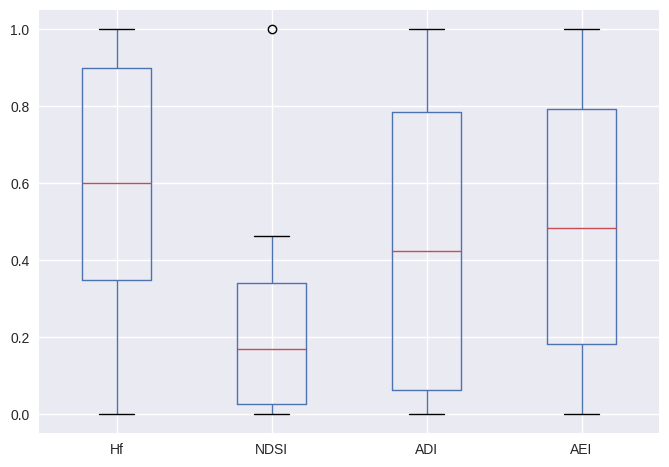

In [ ]:
dff=DFperiods.loc[DFperiods["pred"]==1].iloc[:,:14][['Hf','NDSI', 'ADI', 'AEI']]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

In [ ]:
scaled_features_df.describe()

Hf      NDSI       ADI       AEI
count  8.000000  8.000000  8.000000  8.000000
mean   0.570201  0.266897  0.446305  0.490848
std    0.373715  0.338217  0.403293  0.375847
min    0.000000  0.000000  0.000000  0.000000
25%    0.347362  0.025335  0.062607  0.180662
50%    0.600084  0.168286  0.423488  0.483802
75%    0.897846  0.339557  0.785364  0.792051
max    1.000000  1.000000  1.000000  1.000000

<Axes: >

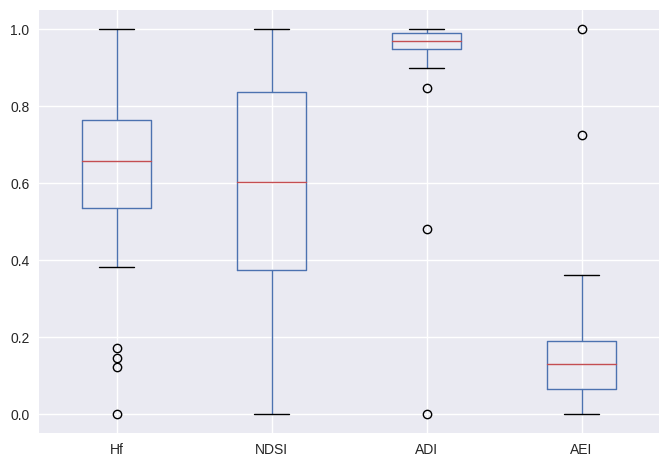

In [ ]:
dff=DFperiods.loc[DFperiods["pred"]==0].iloc[:,:14][['Hf','NDSI', 'ADI', 'AEI']]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

In [ ]:
scaled_features_df.describe()

Hf       NDSI        ADI        AEI
count  34.000000  34.000000  34.000000  34.000000
mean    0.620452   0.591826   0.923170   0.171240
std     0.237808   0.289586   0.185916   0.196786
min     0.000000   0.000000   0.000000   0.000000
25%     0.535266   0.374268   0.946921   0.065001
50%     0.657691   0.602281   0.969828   0.131226
75%     0.762809   0.835704   0.989293   0.190117
max     1.000000   1.000000   1.000000   1.000000

In [ ]:
DFperiods.loc[DFperiods["pred"]==1]

Unnamed: 0       EPS       BGNf        Hf      NDSI       rBA       ADI  \
6            7  0.032535 -48.947646  0.613760 -0.812240  0.103607  1.908338   
11          12  0.026001 -49.093114  0.708108  0.020256  1.041349  1.832833   
49          51  0.021879 -35.027197  0.691545 -0.428982  0.399610  1.915078   
51          53  0.045380 -45.224340  0.628628 -0.566794  0.276492  1.837989   
52          54  0.072525 -43.197031  0.719356 -0.618200  0.235943  1.855316   
64          66  0.016448 -49.122039  0.662708 -0.816451  0.101048  1.839319   
67          69  0.034818 -40.512508  0.709952 -0.733090  0.154010  1.931119   
76          78  0.037893 -46.162968  0.657710 -0.789591  0.117574  1.893596   

         AEI  component1_prob  component2_prob  component3_prob    site  pred  
6   0.308767              0.0              1.0              0.0  RZUA08     1  
11  0.386955              0.0              1.0              0.0  RZUB03     1  
49  0.303847              0.0              1.0              0.0  RZUE06     1  
51  0.372488              0.0              1.0              0.0  RZUE08     1  
52  0.364902              0.0              1.0              0.0  RZUE09     1  
64  0.355044              0.0              1.0              0.0  RZUF10     1  
67  0.290025              0.0              1.0              0.0  RZUF13     1  
76  0.318796              0.0              1.0              0.0  RZUG10     1

In [ ]:
dff=DFperiods.loc[DFperiods["pred"]==2].iloc[:,:14][['LFC','KURTt', 'SKEWt']]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

KeyError: ignored

<Axes: >

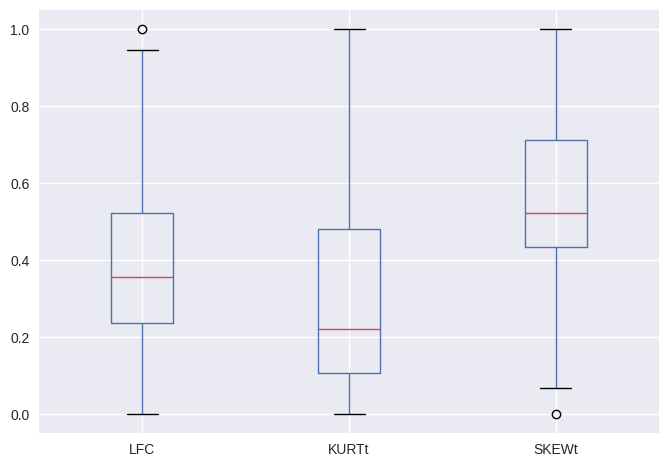

In [ ]:
dff=DFperiods.loc[DFperiods["pred"]==1].iloc[:,:14][['LFC','KURTt', 'SKEWt']]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

<Axes: >

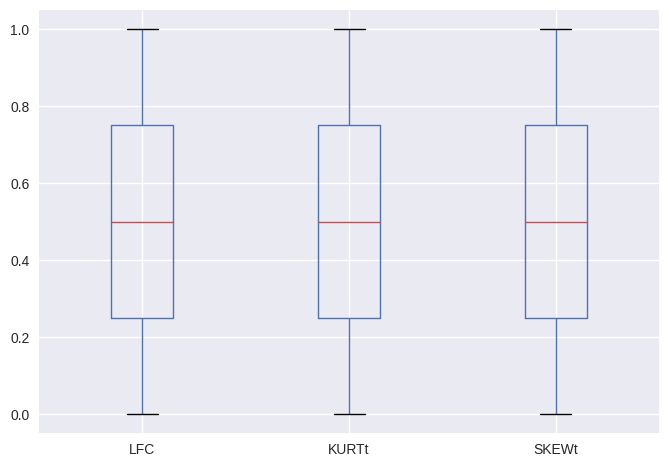

In [ ]:
dff=DFperiods.loc[DFperiods["pred"]==0].iloc[:,:14][['LFC','KURTt', 'SKEWt']]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

### combiinign all dataframes

In [ ]:
import os
import pandas as pd

# Function to read all CSV files in a folder and return a dictionary of DataFrames
def read_csv_files_in_folder(folder_path):
    dataframes_dict = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            dataframes_dict[filename] = df
    return dataframes_dict

# Function to create the combined DataFrame with common index ("site") and columns starting with "component"
def create_combined_dataframe(dataframes_dict):
    combined_df = pd.DataFrame()
    for filename, df in dataframes_dict.items():
        # Filter the columns starting with "component" and set the "site" column as index
        component_cols = [col for col in df.columns if col.startswith("component")]
        df = df.set_index("site")[component_cols]
        # Rename the columns with the filename
        df.columns = [filename[:-4] + "_" + col for col in df.columns]
        # Combine with the existing DataFrame
        combined_df = pd.concat([combined_df, df], axis=1, join="outer")
    return combined_df



In [ ]:
# Folder path containing the CSV files
folder_path = "/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/"

# Read all CSV files in the folder
dataframes_dict = read_csv_files_in_folder(folder_path)

# Create the combined DataFrame
combined_df = create_combined_dataframe(dataframes_dict)

combined_df


20_5_component1_prob  20_5_component2_prob  20_5_component3_prob  \
site                                                                        
RZUA01          5.480498e-146                   1.0                   0.0   
RZUA03b         3.658164e-228                   1.0                   0.0   
RZUA04           0.000000e+00                   1.0                   0.0   
RZUA05           2.853957e-53                   1.0                   0.0   
RZUA06          2.047282e-237                   1.0                   0.0   
...                       ...                   ...                   ...   
RZUC02                    NaN                   NaN                   NaN   
RZUD02                    NaN                   NaN                   NaN   
RZUE01                    NaN                   NaN                   NaN   
RZUF04                    NaN                   NaN                   NaN   
RZUG06                    NaN                   NaN                   NaN   

         20_5_component4_prob  20_5_component5_prob  17_20_component1_prob  \
site                                                                         
RZUA01                    0.0                   0.0           7.465868e-11   
RZUA03b                   0.0                   0.0          6.495266e-181   
RZUA04                    0.0                   0.0           0.000000e+00   
RZUA05                    0.0                   0.0           2.116084e-27   
RZUA06                    0.0                   0.0           6.971128e-52   
...                       ...                   ...                    ...   
RZUC02                    NaN                   NaN           0.000000e+00   
RZUD02                    NaN                   NaN           0.000000e+00   
RZUE01                    NaN                   NaN           9.084967e-32   
RZUF04                    NaN                   NaN           0.000000e+00   
RZUG06                    NaN                   NaN           0.000000e+00   

         17_20_component2_prob  17_20_component3_prob  17_20_component4_prob  \
site                                                                           
RZUA01            1.000000e+00                    0.0           0.000000e+00   
RZUA03b           1.000000e+00                    0.0          2.053149e-136   
RZUA04            3.442954e-28                    0.0           1.000000e+00   
RZUA05            1.000000e+00                    0.0           0.000000e+00   
RZUA06            1.000000e+00                    0.0          3.378401e-297   
...                        ...                    ...                    ...   
RZUC02            1.530445e-44                    0.0           1.000000e+00   
RZUD02            2.884759e-77                    0.0           1.000000e+00   
RZUE01            7.703041e-97                    1.0           0.000000e+00   
RZUF04            1.193582e-45                    0.0           1.000000e+00   
RZUG06            1.236069e-26                    0.0           1.000000e+00   

         8_17_component1_prob  8_17_component2_prob  8_17_component3_prob  \
site                                                                        
RZUA01           0.000000e+00                   0.0          1.000000e+00   
RZUA03b          1.000000e+00                   0.0          9.668182e-18   
RZUA04           6.678233e-09                   0.0          1.000000e+00   
RZUA05           1.611224e-73                   0.0          1.000000e+00   
RZUA06          7.284527e-133                   0.0          1.000000e+00   
...                       ...                   ...                   ...   
RZUC02           2.898981e-05                   0.0          9.999710e-01   
RZUD02           9.999179e-01                   0.0          8.214720e-05   
RZUE01           0.000000e+00                   1.0          1.175775e-28   
RZUF04           3.871807e-06                   0.0          9.999961e-01   
RZUG06           2.420044e-

In [ ]:
combined_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/combineedallthe_MD.csv")

Correlating the clusters with the ecological layers

In [ ]:
combined_df=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/Resultados_clusteringMembership/combineedallthe_MD.csv")


In [ ]:
buffer=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/buffer.csv")
buffer

Unnamed: 0 field_numb   XCOORD.y_x   YCOORD.y_x  FM100_b100mean_100  \
0            0     RZUH04  4957101.251  1949742.623            0.566359   
1            1     RZUH13  4957101.251  1946142.623            0.374368   
2            2     RZUH07  4957101.251  1948542.623            0.860328   
3            3     RZUH03  4957101.251  1950142.623            0.000000   
4            4     RZUH05  4957101.251  1949342.623            0.000000   
..         ...        ...          ...          ...                 ...   
89          89     RZUG11  4956701.251  1946942.623            0.000000   
90          90     RZUG06  4956701.251  1948942.623            0.041330   
91          91     RZUG04  4956701.251  1949742.623            0.006452   
92          92     RZUG02  4956701.251  1950542.623            0.698113   
93          93     RZUG09  4956701.251  1947742.623            0.008590   

    FM100_b100median_100  DN100_b100mean_100  DN100_b100median_100  \
0               0.428571            0.994023              1.000000   
1               0.285714            0.989796              1.000000   
2               1.000000            1.000000              1.000000   
3               0.000000            0.962053              0.966667   
4               0.000000            0.904278              0.905719   
..                   ...                 ...                   ...   
89              0.000000            0.923325              0.952860   
90              0.000000            0.996210              1.000000   
91              0.000000            0.994832              1.000000   
92              1.000000            0.999567              1.000000   
93              0.000000            1.000000              1.000000   

    DI300_b300mean_300  DI300_b300median_300  ...  llanos200_b200mean_200  \
0             0.021562              0.017169  ...                0.633902   
1             0.048132              0.038085  ...                0.708133   
2             0.122280              0.117288  ...                0.634595   
3             0.025790              0.021935  ...                0.539273   
4             0.016334              0.011035  ...                0.473106   
..                 ...                   ...  ...                     ...   
89            0.017890              0.004604  ...                0.593373   
90            0.048203              0.045054  ...                0.368798   
91            0.051862              0.036262  ...                0.503615   
92            0.067338              0.064962  ...                0.774556   
93            0.082559              0.087151  ...                0.420991   

    llanos200_b200median_200  ICHN250_b250mean_250  ICHN250_b250median_250  \
0                   0.674904              3.695705                2.964900   
1                   0.677419              4.064086                3.610703   
2                   0.804584              4.178706                4.112499   
3                   0.524573              3.133335                2.844066   
4                   0.470548              2.665966                2.546518   
..                       ...                   ...                     ...   
89                  0.594655              2.725623                2.543377   
90                  0.331849              2.741621                2.661483   
91                  0.440694              3.401347                2.831349   
92                  0.835862              4.935268                5.585879   
93                  0.297308              3.729539                2.966485   

    FM200_b200mean_200  FM200_b200median_200  ICHN200_b200mean_200  \
0             0.406593              0.285714              3.897863   
1             0.351490              0.142857              3.963771   
2             0.537534              0.428571              4.528694   
3             0.074912              0.000000              2.915847   
4             0.006852              0.000000      

In [ ]:
buffer = buffer.rename(columns={'field_numb': 'site'})

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

In [ ]:
columns_to_correlate_with= buffer.iloc[:,4:].columns

In [ ]:
dfmerg=combined_df

In [ ]:
merged_df = pd.merge(dfmerg, buffer, on="site")
merged_df

site  20_5_component1_prob  20_5_component2_prob  20_5_component3_prob  \
0    RZUA01         5.480498e-146                   1.0                   0.0   
1   RZUA03b         3.658164e-228                   1.0                   0.0   
2    RZUA04          0.000000e+00                   1.0                   0.0   
3    RZUA05          2.853957e-53                   1.0                   0.0   
4    RZUA06         2.047282e-237                   1.0                   0.0   
..      ...                   ...                   ...                   ...   
89   RZUC02                   NaN                   NaN                   NaN   
90   RZUD02                   NaN                   NaN                   NaN   
91   RZUE01                   NaN                   NaN                   NaN   
92   RZUF04                   NaN                   NaN                   NaN   
93   RZUG06                   NaN                   NaN                   NaN   

    20_5_component4_prob  20_5_component5_prob  17_20_component1_prob  \
0                    0.0                   0.0           7.465868e-11   
1                    0.0                   0.0          6.495266e-181   
2                    0.0                   0.0           0.000000e+00   
3                    0.0                   0.0           2.116084e-27   
4                    0.0                   0.0           6.971128e-52   
..                   ...                   ...                    ...   
89                   NaN                   NaN           0.000000e+00   
90                   NaN                   NaN           0.000000e+00   
91                   NaN                   NaN           9.084967e-32   
92                   NaN                   NaN           0.000000e+00   
93                   NaN                   NaN           0.000000e+00   

    17_20_component2_prob  17_20_component3_prob  17_20_component4_prob  ...  \
0            1.000000e+00                    0.0           0.000000e+00  ...   
1            1.000000e+00                    0.0          2.053149e-136  ...   
2            3.442954e-28                    0.0           1.000000e+00  ...   
3            1.000000e+00                    0.0           0.000000e+00  ...   
4            1.000000e+00                    0.0          3.378401e-297  ...   
..                    ...                    ...                    ...  ...   
89           1.530445e-44                    0.0           1.000000e+00  ...   
90           2.884759e-77                    0.0           1.000000e+00  ...   
91           7.703041e-97                    1.0           0.000000e+00  ...   
92           1.193582e-45                    0.0           1.000000e+00  ...   
93           1.236069e-26                    0.0           1.000000e+00  ...   

    llanos200_b200mean_200  llanos200_b200median_200  ICHN250_b250mean_250  \
0                 0.795398                  0.836820              5.325404   
1                 0.755343                  0.834219              5.283113   
2                 0.749858                  0.822070              5.104708   
3                 0.809439                  0.840400              5.245824   
4                 0.796449                  0.834217              4.790583   
..                     ...                       ...                   ...   
89                0.606142                  0.560573              3.131379   
90                0.528459                  0.503304              2.431716   
91                0.843166                  0.851601              5.806830   
92                0.710128                  0.825550              4.714585   
93                0.368798                  0.331849              2.741621   

    ICHN250_b250median_250  FM200_b200mean_200  FM200_b200median_200  \
0                 5.851573            0.842404              1.000000   
1                 5.843880            0.701164              1.000000   
2                 5.570202            0.642

In [ ]:
merged_df=merged_df.dropna()

In [ ]:

columns_to_correlate = combined_df.iloc[:,1:].columns


correlation_df, h_value_df, p_value_df=calculate_correlation_kruskal(merged_df,merged_df, columns_to_correlate, columns_to_correlate_with)


In [ ]:
correlation_df

FM100_b100mean_100  FM100_b100median_100  \
20_5_component1_prob             0.217949              0.229251   
20_5_component2_prob            -0.194011             -0.178772   
20_5_component3_prob             0.247210              0.217796   
20_5_component4_prob             0.172702              0.133487   
20_5_component5_prob             0.172702              0.133487   
17_20_component1_prob            0.579085              0.601807   
17_20_component2_prob           -0.085006             -0.067040   
17_20_component3_prob            0.451121              0.448224   
17_20_component4_prob           -0.561256             -0.585262   
8_17_component1_prob            -0.728361             -0.711111   
8_17_component2_prob             0.260431              0.260804   
8_17_component3_prob             0.632771              0.613125   
5_8_component1_prob             -0.200886             -0.253902   
5_8_component2_prob              0.215102              0.266088   
5_8_component3_prob              0.190842              0.237276   

                       DN100_b100mean_100  DN100_b100median_100  \
20_5_component1_prob             0.155341              0.287272   
20_5_component2_prob            -0.199915             -0.161127   
20_5_component3_prob             0.246574              0.104860   
20_5_component4_prob             0.121130              0.051513   
20_5_component5_prob             0.121130              0.051513   
17_20_component1_prob            0.277570              0.310422   
17_20_component2_prob           -0.111176              0.056270   
17_20_component3_prob            0.286302              0.266552   
17_20_component4_prob           -0.315865             -0.354958   
8_17_component1_prob            -0.335410             -0.435371   
8_17_component2_prob             0.170446              0.162045   
8_17_component3_prob             0.270576              0.404279   
5_8_component1_prob             -0.168651             -0.210420   
5_8_component2_prob              0.163468              0.163943   
5_8_component3_prob              0.155954              0.204855   

                       DI300_b300mean_300  DI300_b300median_300  \
20_5_component1_prob             0.218599              0.207893   
20_5_component2_prob            -0.196271             -0.204279   
20_5_component3_prob             0.138118              0.151305   
20_5_component4_prob             0.115787              0.133264   
20_5_component5_prob             0.115787              0.133264   
17_20_component1_prob            0.313064              0.310813   
17_20_component2_prob           -0.146930             -0.145472   
17_20_component3_prob            0.329242              0.330257   
17_20_component4_prob           -0.362992             -0.361096   
8_17_component1_prob            -0.359372             -0.347916   
8_17_component2_prob             0.216522              0.214463   
8_17_component3_prob             0.277020              0.250356   
5_8_component1_prob             -0.147076             -0.157812   
5_8_component2_prob              0.203610              0.200254   
5_8_component3_prob              0.139365              0.148655   

                       COB300_b300mean_300  COB300_b300median_300  \
20_5_component1_prob              0.252231               0.238575   
20_5_component2_prob             -0.184991              -0.091715   
20_5_component3_prob              0.229078               0.109370   
20_5_component4_prob              0.168219               0.102357   
20_5_component5_prob              0.168219               0.102357   
17_20_component1_prob             0.473541               0.423329   
17_20_component2_prob            -0.034825               0.057778   
17_20_component3_prob             0.356734               0.244794   
17_20_component4_prob            -0.506278              -0.403873   
8_17_component1_prob             -0.522103              -0.521021   
8_17_component2_prob              0.155897   

In [ ]:
import pandas as pd
import numpy as np

# Find the indices and columns where values are higher than 0.5
indices, columns = np.where(np.abs(correlation_df) > 0.65)
row_index_names = correlation_df.index[indices]
# Create a DataFrame to show the results
result_df = pd.DataFrame({
    "Row_Index": row_index_names,
    "Column_Name": correlation_df.columns[columns],
    "Value": correlation_df.values[indices, columns]
})

result_df.sort_values("Value")


Row_Index               Column_Name     Value
3   8_17_component1_prob        AD100_b100mean_100 -0.753142
0   8_17_component1_prob        FM100_b100mean_100 -0.728361
14  8_17_component1_prob      ICHN100_b100mean_100 -0.716995
1   8_17_component1_prob      FM100_b100median_100 -0.711111
5   8_17_component1_prob       COB100_b100mean_100 -0.703229
15  8_17_component1_prob    ICHN100_b100median_100 -0.702623
8   8_17_component1_prob     SLAVI100_b100mean_100 -0.700081
4   8_17_component1_prob      AD100_b100median_100 -0.698849
10  8_17_component1_prob      NDMI100_b100mean_100 -0.696966
12  8_17_component1_prob    llanos100_b100mean_100 -0.690774
9   8_17_component1_prob   SLAVI100_b100median_100 -0.681428
13  8_17_component1_prob  llanos100_b100median_100 -0.676841
11  8_17_component1_prob    NDMI100_b100median_100 -0.674337
6   8_17_component1_prob     COB100_b100median_100 -0.673359
2   8_17_component1_prob        AD200_b200mean_200 -0.662310
16  8_17_component3_prob        AD100_b100mean_100  0.661774
7   8_17_component1_prob  brillo100_b100median_100  0.668470

In [ ]:
correlation_df.to_csv("/content/drive/MyDrive/Doctorado/2023/Agosto/CorrelationAIvsEcologicallayers_5_8.csv")

## Etapas estudio

In [ ]:
AD=pd.read_excel('/content/drive/MyDrive/Doctorado/2023/Junio/ReyZamuro_ch.xlsx')

In [ ]:
AD

file           ZCR  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  31372.933333   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  40403.816667   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  34628.383333   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  36570.916667   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  42908.716667   
...                                                  ...           ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  39856.200000   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  29230.333333   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso...  36202.666667   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso...  31054.866667   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  52060.383333   

              MEANt      VARt     SKEWt        KURTt       LEQt       BGNt  \
0     -6.887912e-19  0.000193  0.177502     5.834632  55.877214 -28.298142   
1     -5.919069e-19  0.000172  0.221258    14.253758  55.379005 -28.342884   
2      1.142055e-18  0.000277  0.182959     6.675471  57.451929 -26.156468   
3      5.251972e-19  0.000259  0.217033    11.059525  57.146265 -26.752327   
4      1.970453e-18  0.004055  0.113164     7.852549  69.100988 -15.658711   
...             ...       ...       ...          ...        ...        ...   
52086 -3.340258e-19  0.000024  0.293895    63.263822  46.752417 -37.743231   
52087 -1.824929e-19  0.000327  0.249309     8.718704  58.170666 -29.269617   
52088  1.538507e-19  0.000184 -0.881932  1360.450964  55.657117 -34.952636   
52089  7.735421e-20  0.003032 -0.172413    25.499336  67.837515 -26.358539   
52090  2.541731e-19  0.000014  0.248200   472.819549  44.604796 -39.605826   

            SNRt       MED  ...      TFSD  H_Havrda   H_Renyi  \
0       1.478258  0.038467  ...  0.514598  0.332701  3.133724   
1       2.038076  0.038270  ...  0.372154  0.333292  4.492470   
2       1.277365  0.049224  ...  0.450293  0.333273  4.306934   
3       2.233526  0.045960  ...  0.445050  0.333270  4.281840   
4       1.498894  0.164841  ...  0.473060  0.333142  3.732607   
...          ...       ...  ...       ...       ...       ...   
52086   0.871930  0.012967  ...  0.536660  0.332189  2.837357   
52087   4.180969  0.034397  ...  0.315189  0.332793  3.212102   
52088   6.535912  0.017880  ...  0.270505  0.333140  3.725704   
52089  11.335550  0.048092  ...  0.237120  0.332979  3.423975   
52090   3.405888  0.010464  ...  0.389669  0.333302  4.639932   

       H_pairedShannon       H_gamma  H_GiniSimpson      RAOQ       AGI  \
0             5.518148  21751.811409       0.972104  0.309954  1.254270   
1             6.050323  27827.025409       0.990705  0.346173  1.249948   
2             5.873870  22433.577147       0.988887  0.324124  1.242176   
3             6.068535  26735.547136       0.990190  0.407788  1.291630   
4             5.424755  13444.077145       0.980831  0.221803  1.292969   
...                ...           ...            ...       ...       ...   
52086         5.581744  32595.486456       0.964435  0.513556  1.226161   
52087         4.861547   8821.773712       0.966599  0.106330  1.303232   
52088         5.368712  16719.467573       0.979979  0.255939  1.346266   
52089         4.997917   6687.242207       0.972817  0.116949  1.877558   
52090         6.390634  47047.529927       0.992592  0.501516  1.243373   

       ROItotal   ROIcover  
0          2203   2.307533  
1          2024   1.740025  
2          1783   1.611886  
3          2505   3.563665  
4          1002   2.655821  
...         ...        ...  
52086       662   0.290968  
52087       460   7.063804  
52088       962   5.464904  
52089       217  16.169182  
52090      1010   0.654612  

[52091 rows x 58 columns]

### Etapas file

In [ ]:
AD.file[1]

'//home/vmartinezarias/Documents/Zamuro/Ultrasonido/paquete3//RZUH04/20220912_130000.WAV'

In [ ]:
df=AD.copy()
df['fecha'] = df['file'].str.extract('(\d{8})').astype(int)

df['hora'] = df['file'].str.extract('_(\d{2})').astype(int)



In [ ]:
dfp=df.dropna()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=3, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

ValueError: ignored

In [ ]:
dfp

file     SKEWt     KURTt  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.070549 -0.211764   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.100172 -0.194916   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.074244 -0.210081   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.097311 -0.201308   
4      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.026994 -0.207726   
...                                                  ...       ...       ...   
52086  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.149347 -0.096841   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.119162 -0.205993   
52088  //home/vmartinezarias/Documents/Zamuro/Ultraso... -0.646677  2.498988   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso... -0.166340 -0.172413   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.118411  0.722730   

       ACTtFraction  ACTtCount     SKEWf  EPS_SKEW       ACI       rBA  \
0         -0.064844  -0.064844 -0.271830 -0.395867  0.533129 -0.153738   
1          0.058415   0.058415 -0.986871 -0.706752  0.533088 -0.172235   
2         -0.373443  -0.373443 -0.902187 -0.333524  0.325901 -0.168358   
3          0.284241   0.284241 -0.994661 -0.137181  0.807133 -0.169657   
4         -0.359948  -0.359948 -0.594237  0.085817 -0.078225 -0.144862   
...             ...        ...       ...       ...       ...       ...   
52086     -0.989742  -0.989742  0.267450 -0.357945 -0.153559 -0.143489   
52087      2.117841   2.117841 -0.178947  0.076378 -0.352250 -0.118488   
52088      2.041366   2.041366 -0.503996 -0.175929  0.674497 -0.173467   
52089      2.251897   2.251897 -0.375586 -0.890147  0.257029 -0.135499   
52090     -0.438672  -0.438672 -0.921763 -0.339255  0.246799 -0.167278   

       AnthroEnergy  BioEnergy        BI       ADI       AEI       LFC  \
0         -0.092716  -0.029981 -0.078429  0.432765 -0.572304  1.808989   
1         -0.028375  -0.062458 -0.755410  0.437488 -0.693327  1.407235   
2          0.008055  -0.038026  0.205239  0.437333 -0.685713  1.423638   
3          0.019508  -0.043108 -0.143523  0.435799 -0.628553  2.537205   
4          0.056639   0.139538  1.282420  0.405304 -0.377744  3.047846   
...             ...        ...       ...       ...       ...       ...   
52086     -0.149721  -0.069150  0.039089 -0.272662  0.971227 -0.765160   
52087     -0.150128  -0.066343  0.079444  0.419653 -0.442917 -0.662598   
52088      0.060244  -0.063466 -0.863735 -2.766426  2.452114 -0.099984   
52089     -0.149492  -0.067702 -0.148099 -0.250605  0.981936 -0.621098   
52090     -0.149420  -0.072480 -0.687009  0.433350 -0.581121 -0.718918   

       ACTspMean  hora    site  cluster  
0      -0.429312    15  RZUH04        0  
1      -0.539970    13  RZUH04        0  
2      -0.594588     4  RZUH04        0  
3      -0.048898    12  RZUH04        0  
4      -0.206897     0  RZUH04        2  
...          ...   ...     ...      ...  
52086  -0.150504    20  RZUG09        2  
52087  -0.107443     2  RZUG09        0  
52088   1.316124     1  RZUG09        1  
52089   2.035873    19  RZUG09        0  
52090  -0.528768     6  RZUG09        0  

[52088 rows x 19 columns]

In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]

In [ ]:
df_cluster1

file     SKEWt     KURTt  \
0      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.070549 -0.211764   
1      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.100172 -0.194916   
2      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.074244 -0.210081   
3      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.097311 -0.201308   
5      //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.105213 -0.200060   
...                                                  ...       ...       ...   
52083  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.073139 -0.212383   
52085  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.149981 -0.213632   
52087  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.119162 -0.205993   
52089  //home/vmartinezarias/Documents/Zamuro/Ultraso... -0.166340 -0.172413   
52090  //home/vmartinezarias/Documents/Zamuro/Ultraso...  0.118411  0.722730   

       ACTtFraction  ACTtCount     SKEWf  EPS_SKEW       ACI       rBA  \
0         -0.064844  -0.064844 -0.271830 -0.395867  0.533129 -0.153738   
1          0.058415   0.058415 -0.986871 -0.706752  0.533088 -0.172235   
2         -0.373443  -0.373443 -0.902187 -0.333524  0.325901 -0.168358   
3          0.284241   0.284241 -0.994661 -0.137181  0.807133 -0.169657   
5          0.437641   0.437641 -0.885135 -0.001195  1.010282 -0.160978   
...             ...        ...       ...       ...       ...       ...   
52083      1.203291   1.203291 -0.787652 -0.327535 -0.106989 -0.171029   
52085     -0.328908  -0.328908 -0.739676  0.478470 -0.150465 -0.169645   
52087      2.117841   2.117841 -0.178947  0.076378 -0.352250 -0.118488   
52089      2.251897   2.251897 -0.375586 -0.890147  0.257029 -0.135499   
52090     -0.438672  -0.438672 -0.921763 -0.339255  0.246799 -0.167278   

       AnthroEnergy  BioEnergy        BI       ADI       AEI       LFC  \
0         -0.092716  -0.029981 -0.078429  0.432765 -0.572304  1.808989   
1         -0.028375  -0.062458 -0.755410  0.437488 -0.693327  1.407235   
2          0.008055  -0.038026  0.205239  0.437333 -0.685713  1.423638   
3          0.019508  -0.043108 -0.143523  0.435799 -0.628553  2.537205   
5         -0.068736  -0.033696  0.067046  0.390054 -0.265426  1.955621   
...             ...        ...       ...       ...       ...       ...   
52083     -0.149324  -0.073043 -1.050865  0.437289 -0.679912 -0.409056   
52085     -0.148324  -0.072649 -0.742282  0.435036 -0.613301 -0.474467   
52087     -0.150128  -0.066343  0.079444  0.419653 -0.442917 -0.662598   
52089     -0.149492  -0.067702 -0.148099 -0.250605  0.981936 -0.621098   
52090     -0.149420  -0.072480 -0.687009  0.433350 -0.581121 -0.718918   

       ACTspMean  hora    site  cluster  
0      -0.429312    15  RZUH04        0  
1      -0.539970    13  RZUH04        0  
2      -0.594588     4  RZUH04        0  
3      -0.048898    12  RZUH04        0  
5       0.676260     5  RZUH04        0  
...          ...   ...     ...      ...  
52083  -0.405093    14  RZUG09        0  
52085  -0.640294     8  RZUG09        0  
52087  -0.107443     2  RZUG09        0  
52089   2.035873    19  RZUG09        0  
52090  -0.528768     6  RZUG09        0  

[21928 rows x 19 columns]

In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')

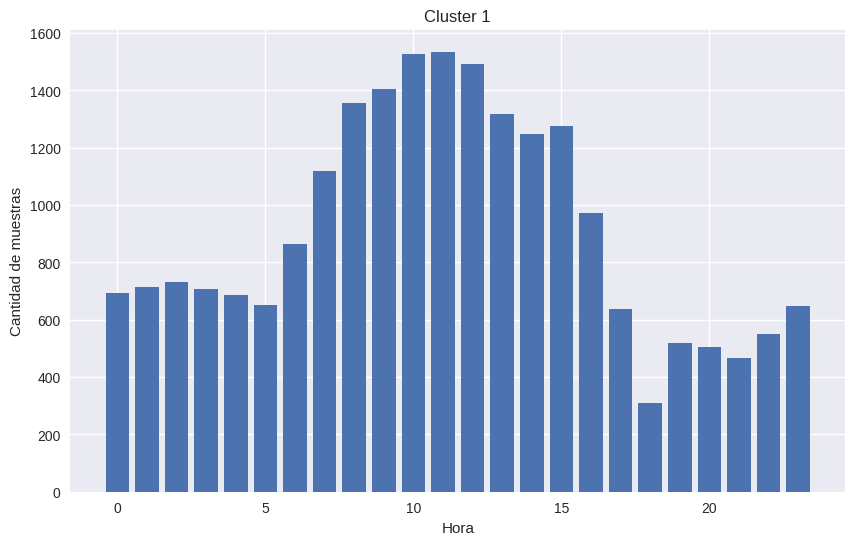

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

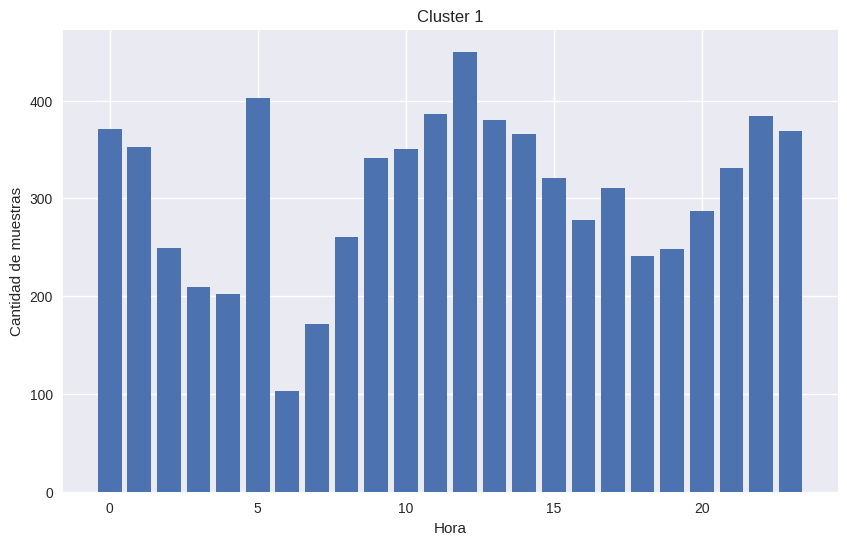

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

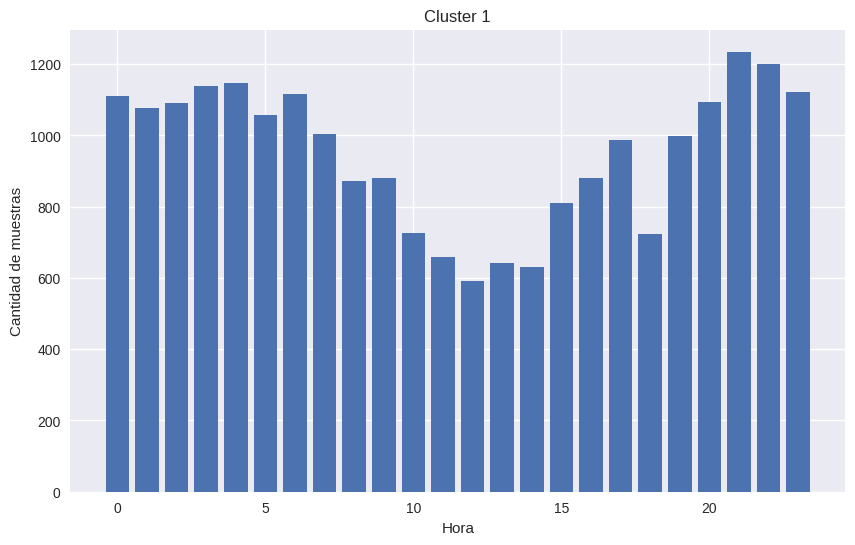

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()